# Task 1 - Artificial Neural Networks with one hidden layer using only numpy

In [1]:
# Read Fashion MNIST dataset
import util_mnist_reader
import numpy as np
import os
from pathlib import Path
dirpath = os.getcwd($)
dirpath = Path(dirpath).parents[0]
X_train, y_train = util_mnist_reader.load_mnist(str(dirpath)+"/data/fashion", kind='train')
X_test, y_test = util_mnist_reader.load_mnist(str(dirpath)+"/data/fashion", kind='t10k')

print("Input Training set dimensions: "+str(X_train.shape))
print("Input Testing set dimensions: "+str(X_test.shape))
print("Output Training set dimensions: "+str(y_train.shape))
print("Output Testing set dimensions: "+str(y_test.shape))

Input Training set dimensions: (60000, 784)
Input Testing set dimensions: (10000, 784)
Output Training set dimensions: (60000,)
Output Testing set dimensions: (10000,)


In [2]:
# data processing
num_classes = 10
x_train = X_train / 255 #normalization
x_test = X_test / 255 #normalization
y_train = np.eye(num_classes)[y_train] #convert label to one-hot encoder

In [3]:
# activation function
def sigmoid(inputs):
    s = 1./(1. + np.exp(-inputs))
    return s

#Sigmoid Derivative
def sigmoid_d(sigmoid_inputs):
    return sigmoid_inputs * (1-sigmoid_inputs)

# output probability distribution function
def softmax(inputs):
    exp = np.exp(inputs)
    return exp/np.sum(exp, axis = 1, keepdims = True)

# loss
def cross_entropy(y_predicted, y_actual):
    indices = np.argmax(y_actual, axis = 1).astype(int)
    probability = y_predicted[np.arange(len(y_predicted)), indices] 
    log = np.log(probability)
    loss = -1.0 * np.sum(log) / len(log)
    return loss

# L2 regularization
def L2_regularization(la, weight1, weight2):
    weight1_loss = 0.5 * la * np.sum(weight1 * weight1)
    weight2_loss = 0.5 * la * np.sum(weight2 * weight2)
    return weight1_loss + weight2_loss


In [13]:
#Creating the Network
class Network:

    def __init__(self, 
                 num_nodes_in_layers, 
                 batch_size,
                 num_epochs,
                 learning_rate
                 ):
        #Hyper Parameters
        self.num_nodes_in_layers = num_nodes_in_layers
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate

        #Initializing the weights
        self.weight1 = np.random.normal(0, 1, [self.num_nodes_in_layers[0], self.num_nodes_in_layers[1]])
        self.bias1 = np.zeros((1, self.num_nodes_in_layers[1]))
        self.weight2 = np.random.normal(0, 1, [self.num_nodes_in_layers[1], self.num_nodes_in_layers[2]])
        self.bias2 = np.zeros((1, self.num_nodes_in_layers[2]))
        self.loss = []
        self.loss_per_epoch = []

    def train(self, inputs, labels):
        for epoch in range(self.num_epochs): # training begin
            iteration = 0
            while iteration < len(inputs):

                # batch input
                inputs_batch = inputs[iteration:iteration+self.batch_size]
                labels_batch = labels[iteration:iteration+self.batch_size]

                # forward pass
                z1 = np.dot(inputs_batch, self.weight1) + self.bias1
                a1 = sigmoid(z1)
                z2 = np.dot(a1, self.weight2) + self.bias2
                y = softmax(z2)
                
                # calculate loss
                loss = cross_entropy(y, labels_batch)
                loss += L2_regularization(0.01, self.weight1, self.weight2)
                self.loss.append(loss)

                # backward pass
                delta_y = (y - labels_batch) / y.shape[0]
                delta_hidden_layer = np.dot(delta_y, self.weight2.T) * sigmoid_d(a1)

                # backpropagation - Gradient Calculation
                weight2_gradient = np.dot(a1.T, delta_y) 
                bias2_gradient = np.sum(delta_y, axis = 0, keepdims = True)
            
                weight1_gradient = np.dot(inputs_batch.T, delta_hidden_layer)
                bias1_gradient = np.sum(delta_hidden_layer, axis = 0, keepdims = True)

                # L2 regularization
                weight2_gradient += 0.01 * self.weight2
                weight1_gradient += 0.01 * self.weight1

                # update weight and bias
                self.weight1 -= self.learning_rate * weight1_gradient 
                self.bias1 -= self.learning_rate * bias1_gradient
                self.weight2 -= self.learning_rate * weight2_gradient
                self.bias2 -= self.learning_rate * bias2_gradient
                
                print("-> Epoch:"+str((epoch+1))+" Iteration:"+str((iteration+1))+" Loss:"+str(loss))
                iteration += self.batch_size
            self.loss_per_epoch.append(loss)

    def test(self, inputs, labels):
        input_layer = np.dot(inputs, self.weight1)
        hidden_layer = sigmoid(input_layer + self.bias1)
        scores = np.dot(hidden_layer, self.weight2) + self.bias2
        probs = softmax(scores)
        acc = float(np.sum(np.argmax(probs, 1) == labels)) / float(len(labels))
        print('Test accuracy:' + str(acc*100))
        return str(acc*100)
        
    def predict(self, inputs):
        z1 = np.dot(inputs, self.weight1) + self.bias1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, self.weight2) + self.bias2
        y = softmax(z2)
        return y

In [14]:
#Creating an object of class Network
net = Network(
                 num_nodes_in_layers = [784, 500, 10], 
                 batch_size = 2048,
                 num_epochs = 3000,
                 learning_rate = 0.01
             )

print("....Training...")
net.train(x_train, y_train)

....Training...
-> Epoch:1 Iteration:1 Loss:2001.3717630824333
-> Epoch:1 Iteration:2049 Loss:2000.678064439386
-> Epoch:1 Iteration:4097 Loss:2000.2214005695964
-> Epoch:1 Iteration:6145 Loss:1999.4522876859203
-> Epoch:1 Iteration:8193 Loss:1998.8441226697664
-> Epoch:1 Iteration:10241 Loss:1998.7238543768203
-> Epoch:1 Iteration:12289 Loss:1997.6369382782084
-> Epoch:1 Iteration:14337 Loss:1996.560421067399
-> Epoch:1 Iteration:16385 Loss:1997.2745100463792
-> Epoch:1 Iteration:18433 Loss:1996.012748662457
-> Epoch:1 Iteration:20481 Loss:1995.5922208269938
-> Epoch:1 Iteration:22529 Loss:1994.5572137747033
-> Epoch:1 Iteration:24577 Loss:1994.942789682999
-> Epoch:1 Iteration:26625 Loss:1993.3962760658098
-> Epoch:1 Iteration:28673 Loss:1993.4139907160152
-> Epoch:1 Iteration:30721 Loss:1992.735865249939
-> Epoch:1 Iteration:32769 Loss:1992.3223043813832
-> Epoch:1 Iteration:34817 Loss:1991.8693349774212
-> Epoch:1 Iteration:36865 Loss:1990.693297593216
-> Epoch:1 Iteration:38913 Lo

-> Epoch:6 Iteration:30721 Loss:1926.7742524722912
-> Epoch:6 Iteration:32769 Loss:1926.2952056039694
-> Epoch:6 Iteration:34817 Loss:1925.933701584179
-> Epoch:6 Iteration:36865 Loss:1925.2286819086994
-> Epoch:6 Iteration:38913 Loss:1925.0213832708762
-> Epoch:6 Iteration:40961 Loss:1924.7191662534801
-> Epoch:6 Iteration:43009 Loss:1924.0784942362698
-> Epoch:6 Iteration:45057 Loss:1924.0911421293665
-> Epoch:6 Iteration:47105 Loss:1923.164813458216
-> Epoch:6 Iteration:49153 Loss:1922.903129950322
-> Epoch:6 Iteration:51201 Loss:1922.7397387209135
-> Epoch:6 Iteration:53249 Loss:1922.2665276960481
-> Epoch:6 Iteration:55297 Loss:1922.0797267806092
-> Epoch:6 Iteration:57345 Loss:1921.4207399328975
-> Epoch:6 Iteration:59393 Loss:1920.9898962241914
-> Epoch:7 Iteration:1 Loss:1920.5852004319602
-> Epoch:7 Iteration:2049 Loss:1920.161552950127
-> Epoch:7 Iteration:4097 Loss:1919.8758296297253
-> Epoch:7 Iteration:6145 Loss:1919.4788073760888
-> Epoch:7 Iteration:8193 Loss:1919.045962

-> Epoch:11 Iteration:59393 Loss:1862.704951960887
-> Epoch:12 Iteration:1 Loss:1862.4422434866683
-> Epoch:12 Iteration:2049 Loss:1862.0036905808365
-> Epoch:12 Iteration:4097 Loss:1861.6914024826867
-> Epoch:12 Iteration:6145 Loss:1861.3556694332106
-> Epoch:12 Iteration:8193 Loss:1860.9241466510168
-> Epoch:12 Iteration:10241 Loss:1860.64009289914
-> Epoch:12 Iteration:12289 Loss:1860.235885522809
-> Epoch:12 Iteration:14337 Loss:1859.5974189657418
-> Epoch:12 Iteration:16385 Loss:1859.5953983856234
-> Epoch:12 Iteration:18433 Loss:1859.1255938323989
-> Epoch:12 Iteration:20481 Loss:1858.6143314009187
-> Epoch:12 Iteration:22529 Loss:1858.4227057729727
-> Epoch:12 Iteration:24577 Loss:1858.0093110944915
-> Epoch:12 Iteration:26625 Loss:1857.4545238956
-> Epoch:12 Iteration:28673 Loss:1857.2408622627752
-> Epoch:12 Iteration:30721 Loss:1856.8092255333124
-> Epoch:12 Iteration:32769 Loss:1856.4144435132632
-> Epoch:12 Iteration:34817 Loss:1856.07534719401
-> Epoch:12 Iteration:36865 L

-> Epoch:17 Iteration:24577 Loss:1802.4820719541515
-> Epoch:17 Iteration:26625 Loss:1801.9966671659865
-> Epoch:17 Iteration:28673 Loss:1801.7523181930192
-> Epoch:17 Iteration:30721 Loss:1801.3410622143074
-> Epoch:17 Iteration:32769 Loss:1800.9859071558737
-> Epoch:17 Iteration:34817 Loss:1800.6580398493786
-> Epoch:17 Iteration:36865 Loss:1800.0480102146207
-> Epoch:17 Iteration:38913 Loss:1799.8374053245648
-> Epoch:17 Iteration:40961 Loss:1799.5674721602936
-> Epoch:17 Iteration:43009 Loss:1798.9910725002915
-> Epoch:17 Iteration:45057 Loss:1799.0553350248988
-> Epoch:17 Iteration:47105 Loss:1798.2202807187066
-> Epoch:17 Iteration:49153 Loss:1798.0294974555102
-> Epoch:17 Iteration:51201 Loss:1797.7525524948908
-> Epoch:17 Iteration:53249 Loss:1797.417535450651
-> Epoch:17 Iteration:55297 Loss:1797.1360583957965
-> Epoch:17 Iteration:57345 Loss:1796.557164548862
-> Epoch:17 Iteration:59393 Loss:1796.120659664035
-> Epoch:18 Iteration:1 Loss:1795.9264192568924
-> Epoch:18 Iterati

-> Epoch:22 Iteration:47105 Loss:1744.7833044842282
-> Epoch:22 Iteration:49153 Loss:1744.5933596278214
-> Epoch:22 Iteration:51201 Loss:1744.3030746307618
-> Epoch:22 Iteration:53249 Loss:1743.9933410248268
-> Epoch:22 Iteration:55297 Loss:1743.7114703845546
-> Epoch:22 Iteration:57345 Loss:1743.1496697312414
-> Epoch:22 Iteration:59393 Loss:1742.7203848933236
-> Epoch:23 Iteration:1 Loss:1742.5424105493337
-> Epoch:23 Iteration:2049 Loss:1742.1372274653543
-> Epoch:23 Iteration:4097 Loss:1741.7904978633387
-> Epoch:23 Iteration:6145 Loss:1741.5023070375678
-> Epoch:23 Iteration:8193 Loss:1741.1132850601787
-> Epoch:23 Iteration:10241 Loss:1740.8525072295724
-> Epoch:23 Iteration:12289 Loss:1740.4554424212877
-> Epoch:23 Iteration:14337 Loss:1739.9664755155454
-> Epoch:23 Iteration:16385 Loss:1739.8428982038113
-> Epoch:23 Iteration:18433 Loss:1739.4489706413394
-> Epoch:23 Iteration:20481 Loss:1738.9655585572932
-> Epoch:23 Iteration:22529 Loss:1738.7813642577134
-> Epoch:23 Iteratio

-> Epoch:28 Iteration:6145 Loss:1689.8182661379833
-> Epoch:28 Iteration:8193 Loss:1689.451244458183
-> Epoch:28 Iteration:10241 Loss:1689.194998206836
-> Epoch:28 Iteration:12289 Loss:1688.81179685306
-> Epoch:28 Iteration:14337 Loss:1688.3554038019547
-> Epoch:28 Iteration:16385 Loss:1688.2119977776956
-> Epoch:28 Iteration:18433 Loss:1687.8351905779696
-> Epoch:28 Iteration:20481 Loss:1687.3683059130847
-> Epoch:28 Iteration:22529 Loss:1687.1891906007631
-> Epoch:28 Iteration:24577 Loss:1686.764890965728
-> Epoch:28 Iteration:26625 Loss:1686.3583592075931
-> Epoch:28 Iteration:28673 Loss:1686.0963166428778
-> Epoch:28 Iteration:30721 Loss:1685.7163668272387
-> Epoch:28 Iteration:32769 Loss:1685.403275296466
-> Epoch:28 Iteration:34817 Loss:1685.0847487957597
-> Epoch:28 Iteration:36865 Loss:1684.529688100951
-> Epoch:28 Iteration:38913 Loss:1684.3391931199355
-> Epoch:28 Iteration:40961 Loss:1684.0739860822812
-> Epoch:28 Iteration:43009 Loss:1683.5634218417454
-> Epoch:28 Iteration

-> Epoch:33 Iteration:30721 Loss:1635.7443690306034
-> Epoch:33 Iteration:32769 Loss:1635.4461158804927
-> Epoch:33 Iteration:34817 Loss:1635.1351149241991
-> Epoch:33 Iteration:36865 Loss:1634.6028874796827
-> Epoch:33 Iteration:38913 Loss:1634.4180959694656
-> Epoch:33 Iteration:40961 Loss:1634.1535316268482
-> Epoch:33 Iteration:43009 Loss:1633.6665798505414
-> Epoch:33 Iteration:45057 Loss:1633.6780314376263
-> Epoch:33 Iteration:47105 Loss:1632.993961784283
-> Epoch:33 Iteration:49153 Loss:1632.7966372928774
-> Epoch:33 Iteration:51201 Loss:1632.514232545788
-> Epoch:33 Iteration:53249 Loss:1632.2359962205842
-> Epoch:33 Iteration:55297 Loss:1631.966446714734
-> Epoch:33 Iteration:57345 Loss:1631.4365871904936
-> Epoch:33 Iteration:59393 Loss:1631.033653796011
-> Epoch:34 Iteration:1 Loss:1630.856180312642
-> Epoch:34 Iteration:2049 Loss:1630.5046774171767
-> Epoch:34 Iteration:4097 Loss:1630.1521004323176
-> Epoch:34 Iteration:6145 Loss:1629.8816440663393
-> Epoch:34 Iteration:81

-> Epoch:38 Iteration:59393 Loss:1582.716810479851
-> Epoch:39 Iteration:1 Loss:1582.5371257023744
-> Epoch:39 Iteration:2049 Loss:1582.2087859678415
-> Epoch:39 Iteration:4097 Loss:1581.8571502425916
-> Epoch:39 Iteration:6145 Loss:1581.5934708331854
-> Epoch:39 Iteration:8193 Loss:1581.2652551779015
-> Epoch:39 Iteration:10241 Loss:1581.0222637709492
-> Epoch:39 Iteration:12289 Loss:1580.6761579816684
-> Epoch:39 Iteration:14337 Loss:1580.2581204217795
-> Epoch:39 Iteration:16385 Loss:1580.1036488725495
-> Epoch:39 Iteration:18433 Loss:1579.746949115538
-> Epoch:39 Iteration:20481 Loss:1579.3235531414866
-> Epoch:39 Iteration:22529 Loss:1579.148816490069
-> Epoch:39 Iteration:24577 Loss:1578.753883858118
-> Epoch:39 Iteration:26625 Loss:1578.3936590136266
-> Epoch:39 Iteration:28673 Loss:1578.1254821397283
-> Epoch:39 Iteration:30721 Loss:1577.7650994033793
-> Epoch:39 Iteration:32769 Loss:1577.4840413580396
-> Epoch:39 Iteration:34817 Loss:1577.1850758599096
-> Epoch:39 Iteration:36

-> Epoch:44 Iteration:20481 Loss:1532.560642593074
-> Epoch:44 Iteration:22529 Loss:1532.3872343840474
-> Epoch:44 Iteration:24577 Loss:1532.006060870343
-> Epoch:44 Iteration:26625 Loss:1531.663292410148
-> Epoch:44 Iteration:28673 Loss:1531.3942062222754
-> Epoch:44 Iteration:30721 Loss:1531.0409296432126
-> Epoch:44 Iteration:32769 Loss:1530.7737063039165
-> Epoch:44 Iteration:34817 Loss:1530.4862198639298
-> Epoch:44 Iteration:36865 Loss:1529.9991808014213
-> Epoch:44 Iteration:38913 Loss:1529.8201831994343
-> Epoch:44 Iteration:40961 Loss:1529.5574318499346
-> Epoch:44 Iteration:43009 Loss:1529.1157164552335
-> Epoch:44 Iteration:45057 Loss:1529.1072833809283
-> Epoch:44 Iteration:47105 Loss:1528.4937915566331
-> Epoch:44 Iteration:49153 Loss:1528.302103487628
-> Epoch:44 Iteration:51201 Loss:1528.0287410334497
-> Epoch:44 Iteration:53249 Loss:1527.771742489268
-> Epoch:44 Iteration:55297 Loss:1527.5206499076394
-> Epoch:44 Iteration:57345 Loss:1527.0229612940523
-> Epoch:44 Itera

-> Epoch:49 Iteration:40961 Loss:1484.275270584343
-> Epoch:49 Iteration:43009 Loss:1483.852062945595
-> Epoch:49 Iteration:45057 Loss:1483.8366939546995
-> Epoch:49 Iteration:47105 Loss:1483.2504806674071
-> Epoch:49 Iteration:49153 Loss:1483.0643919366612
-> Epoch:49 Iteration:51201 Loss:1482.7936802048173
-> Epoch:49 Iteration:53249 Loss:1482.5456873908863
-> Epoch:49 Iteration:55297 Loss:1482.3027966883283
-> Epoch:49 Iteration:57345 Loss:1481.8191075368363
-> Epoch:49 Iteration:59393 Loss:1481.4524321573924
-> Epoch:50 Iteration:1 Loss:1481.2727524229517
-> Epoch:50 Iteration:2049 Loss:1480.9867844323592
-> Epoch:50 Iteration:4097 Loss:1480.641332198653
-> Epoch:50 Iteration:6145 Loss:1480.3925627027504
-> Epoch:50 Iteration:8193 Loss:1480.0963948582917
-> Epoch:50 Iteration:10241 Loss:1479.86403471744
-> Epoch:50 Iteration:12289 Loss:1479.5519708869804
-> Epoch:50 Iteration:14337 Loss:1479.1595488996093
-> Epoch:50 Iteration:16385 Loss:1479.0091982800122
-> Epoch:50 Iteration:184

-> Epoch:55 Iteration:6145 Loss:1436.5748826973343
-> Epoch:55 Iteration:8193 Loss:1436.2916685034343
-> Epoch:55 Iteration:10241 Loss:1436.063692160824
-> Epoch:55 Iteration:12289 Loss:1435.7653630205145
-> Epoch:55 Iteration:14337 Loss:1435.3831544362395
-> Epoch:55 Iteration:16385 Loss:1435.236521474179
-> Epoch:55 Iteration:18433 Loss:1434.8985674939033
-> Epoch:55 Iteration:20481 Loss:1434.5353453585626
-> Epoch:55 Iteration:22529 Loss:1434.3657383382417
-> Epoch:55 Iteration:24577 Loss:1434.012809312297
-> Epoch:55 Iteration:26625 Loss:1433.7037626853025
-> Epoch:55 Iteration:28673 Loss:1433.4365774521418
-> Epoch:55 Iteration:30721 Loss:1433.0979828286395
-> Epoch:55 Iteration:32769 Loss:1432.8579113421933
-> Epoch:55 Iteration:34817 Loss:1432.5976878935055
-> Epoch:55 Iteration:36865 Loss:1432.148876229767
-> Epoch:55 Iteration:38913 Loss:1431.9710033860667
-> Epoch:55 Iteration:40961 Loss:1431.7143055850763
-> Epoch:55 Iteration:43009 Loss:1431.3121447857748
-> Epoch:55 Iterat

-> Epoch:60 Iteration:30721 Loss:1390.6866130613712
-> Epoch:60 Iteration:32769 Loss:1390.4572216813374
-> Epoch:60 Iteration:34817 Loss:1390.2092549908514
-> Epoch:60 Iteration:36865 Loss:1389.7757400398255
-> Epoch:60 Iteration:38913 Loss:1389.598068279961
-> Epoch:60 Iteration:40961 Loss:1389.3456034493274
-> Epoch:60 Iteration:43009 Loss:1388.9601212560797
-> Epoch:60 Iteration:45057 Loss:1388.9326412345374
-> Epoch:60 Iteration:47105 Loss:1388.3977567065106
-> Epoch:60 Iteration:49153 Loss:1388.226342451759
-> Epoch:60 Iteration:51201 Loss:1387.9610259293022
-> Epoch:60 Iteration:53249 Loss:1387.7323129947008
-> Epoch:60 Iteration:55297 Loss:1387.5061576613018
-> Epoch:60 Iteration:57345 Loss:1387.051357522937
-> Epoch:60 Iteration:59393 Loss:1386.708888175995
-> Epoch:61 Iteration:1 Loss:1386.5348655231357
-> Epoch:61 Iteration:2049 Loss:1386.2819458074534
-> Epoch:61 Iteration:4097 Loss:1385.945477215844
-> Epoch:61 Iteration:6145 Loss:1385.711304548351
-> Epoch:61 Iteration:819

-> Epoch:65 Iteration:59393 Loss:1345.6793034663249
-> Epoch:66 Iteration:1 Loss:1345.5090640366209
-> Epoch:66 Iteration:2049 Loss:1345.268885095707
-> Epoch:66 Iteration:4097 Loss:1344.9370607099186
-> Epoch:66 Iteration:6145 Loss:1344.7093353290875
-> Epoch:66 Iteration:8193 Loss:1344.4514530526305
-> Epoch:66 Iteration:10241 Loss:1344.2333515835182
-> Epoch:66 Iteration:12289 Loss:1343.961546211951
-> Epoch:66 Iteration:14337 Loss:1343.600617671586
-> Epoch:66 Iteration:16385 Loss:1343.464280514237
-> Epoch:66 Iteration:18433 Loss:1343.1384889897565
-> Epoch:66 Iteration:20481 Loss:1342.8109144054058
-> Epoch:66 Iteration:22529 Loss:1342.6453685089007
-> Epoch:66 Iteration:24577 Loss:1342.3180486081046
-> Epoch:66 Iteration:26625 Loss:1342.0377767644313
-> Epoch:66 Iteration:28673 Loss:1341.7762325680485
-> Epoch:66 Iteration:30721 Loss:1341.4538957782436
-> Epoch:66 Iteration:32769 Loss:1341.2362380529107
-> Epoch:66 Iteration:34817 Loss:1341.0022231206208
-> Epoch:66 Iteration:36

-> Epoch:71 Iteration:20481 Loss:1303.0869859970503
-> Epoch:71 Iteration:22529 Loss:1302.9232596614356
-> Epoch:71 Iteration:24577 Loss:1302.6066520223715
-> Epoch:71 Iteration:26625 Loss:1302.338187068131
-> Epoch:71 Iteration:28673 Loss:1302.0800831468641
-> Epoch:71 Iteration:30721 Loss:1301.765745813355
-> Epoch:71 Iteration:32769 Loss:1301.5571391154433
-> Epoch:71 Iteration:34817 Loss:1301.3339749661684
-> Epoch:71 Iteration:36865 Loss:1300.9304479419684
-> Epoch:71 Iteration:38913 Loss:1300.753739831446
-> Epoch:71 Iteration:40961 Loss:1300.5127709611543
-> Epoch:71 Iteration:43009 Loss:1300.1613691221883
-> Epoch:71 Iteration:45057 Loss:1300.125546469451
-> Epoch:71 Iteration:47105 Loss:1299.6326003488603
-> Epoch:71 Iteration:49153 Loss:1299.4761761237773
-> Epoch:71 Iteration:51201 Loss:1299.2179675527027
-> Epoch:71 Iteration:53249 Loss:1299.0071118510566
-> Epoch:71 Iteration:55297 Loss:1298.7960734472226
-> Epoch:71 Iteration:57345 Loss:1298.3681544362785
-> Epoch:71 Iter

-> Epoch:76 Iteration:45057 Loss:1261.6647064167707
-> Epoch:76 Iteration:47105 Loss:1261.1885730600827
-> Epoch:76 Iteration:49153 Loss:1261.038727888262
-> Epoch:76 Iteration:51201 Loss:1260.7841988940536
-> Epoch:76 Iteration:53249 Loss:1260.5808875091357
-> Epoch:76 Iteration:55297 Loss:1260.3763449013975
-> Epoch:76 Iteration:57345 Loss:1259.9603054266652
-> Epoch:76 Iteration:59393 Loss:1259.649324771009
-> Epoch:77 Iteration:1 Loss:1259.4898979727861
-> Epoch:77 Iteration:2049 Loss:1259.2735977348352
-> Epoch:77 Iteration:4097 Loss:1258.952941882302
-> Epoch:77 Iteration:6145 Loss:1258.7392301121238
-> Epoch:77 Iteration:8193 Loss:1258.5028225475096
-> Epoch:77 Iteration:10241 Loss:1258.2947484626475
-> Epoch:77 Iteration:12289 Loss:1258.0453498583922
-> Epoch:77 Iteration:14337 Loss:1257.7046500320073
-> Epoch:77 Iteration:16385 Loss:1257.5811575533198
-> Epoch:77 Iteration:18433 Loss:1257.2663148057325
-> Epoch:77 Iteration:20481 Loss:1256.9708189354965
-> Epoch:77 Iteration:2

-> Epoch:82 Iteration:6145 Loss:1221.50584254373
-> Epoch:82 Iteration:8193 Loss:1221.278042049713
-> Epoch:82 Iteration:10241 Loss:1221.074625549614
-> Epoch:82 Iteration:12289 Loss:1220.834221918338
-> Epoch:82 Iteration:14337 Loss:1220.502327682661
-> Epoch:82 Iteration:16385 Loss:1220.3852304614072
-> Epoch:82 Iteration:18433 Loss:1220.07503989717
-> Epoch:82 Iteration:20481 Loss:1219.7929187417926
-> Epoch:82 Iteration:22529 Loss:1219.633810454557
-> Epoch:82 Iteration:24577 Loss:1219.3387955677267
-> Epoch:82 Iteration:26625 Loss:1219.0939661323353
-> Epoch:82 Iteration:28673 Loss:1218.844187383962
-> Epoch:82 Iteration:30721 Loss:1218.5485201705837
-> Epoch:82 Iteration:32769 Loss:1218.3579053071373
-> Epoch:82 Iteration:34817 Loss:1218.1563045832927
-> Epoch:82 Iteration:36865 Loss:1217.779179136273
-> Epoch:82 Iteration:38913 Loss:1217.6046075283534
-> Epoch:82 Iteration:40961 Loss:1217.3763696236083
-> Epoch:82 Iteration:43009 Loss:1217.0549968884611
-> Epoch:82 Iteration:450

-> Epoch:87 Iteration:30721 Loss:1182.5066145606718
-> Epoch:87 Iteration:32769 Loss:1182.3234371959793
-> Epoch:87 Iteration:34817 Loss:1182.1308135000133
-> Epoch:87 Iteration:36865 Loss:1181.7647227287716
-> Epoch:87 Iteration:38913 Loss:1181.591686087554
-> Epoch:87 Iteration:40961 Loss:1181.3691245781636
-> Epoch:87 Iteration:43009 Loss:1181.0599163726981
-> Epoch:87 Iteration:45057 Loss:1181.0190515628751
-> Epoch:87 Iteration:47105 Loss:1180.576854311987
-> Epoch:87 Iteration:49153 Loss:1180.4403619713287
-> Epoch:87 Iteration:51201 Loss:1180.1944226448525
-> Epoch:87 Iteration:53249 Loss:1180.0064618816966
-> Epoch:87 Iteration:55297 Loss:1179.8156365008097
-> Epoch:87 Iteration:57345 Loss:1179.425389386858
-> Epoch:87 Iteration:59393 Loss:1179.1312560863796
-> Epoch:88 Iteration:1 Loss:1178.9852750888763
-> Epoch:88 Iteration:2049 Loss:1178.7882892529774
-> Epoch:88 Iteration:4097 Loss:1178.4802691043267
-> Epoch:88 Iteration:6145 Loss:1178.2803677504564
-> Epoch:88 Iteration:

-> Epoch:92 Iteration:53249 Loss:1145.1082234954558
-> Epoch:92 Iteration:55297 Loss:1144.9233436279615
-> Epoch:92 Iteration:57345 Loss:1144.5444702751568
-> Epoch:92 Iteration:59393 Loss:1144.2570025429873
-> Epoch:93 Iteration:1 Loss:1144.1174730605405
-> Epoch:93 Iteration:2049 Loss:1143.928146770816
-> Epoch:93 Iteration:4097 Loss:1143.6262641488343
-> Epoch:93 Iteration:6145 Loss:1143.432566194256
-> Epoch:93 Iteration:8193 Loss:1143.2214561974083
-> Epoch:93 Iteration:10241 Loss:1143.0288633241148
-> Epoch:93 Iteration:12289 Loss:1142.8060759772225
-> Epoch:93 Iteration:14337 Loss:1142.4928632616275
-> Epoch:93 Iteration:16385 Loss:1142.38936903346
-> Epoch:93 Iteration:18433 Loss:1142.089499890465
-> Epoch:93 Iteration:20481 Loss:1141.8340515605175
-> Epoch:93 Iteration:22529 Loss:1141.6811571127694
-> Epoch:93 Iteration:24577 Loss:1141.4055572074185
-> Epoch:93 Iteration:26625 Loss:1141.1816738950045
-> Epoch:93 Iteration:28673 Loss:1140.9401614592787
-> Epoch:93 Iteration:307

-> Epoch:98 Iteration:12289 Loss:1109.0100983233303
-> Epoch:98 Iteration:14337 Loss:1108.7051474920486
-> Epoch:98 Iteration:16385 Loss:1108.6073057612819
-> Epoch:98 Iteration:18433 Loss:1108.3123306405623
-> Epoch:98 Iteration:20481 Loss:1108.0677959941745
-> Epoch:98 Iteration:22529 Loss:1107.9182079805669
-> Epoch:98 Iteration:24577 Loss:1107.6507945340434
-> Epoch:98 Iteration:26625 Loss:1107.4357307264697
-> Epoch:98 Iteration:28673 Loss:1107.197910450247
-> Epoch:98 Iteration:30721 Loss:1106.9300877689943
-> Epoch:98 Iteration:32769 Loss:1106.7621268661546
-> Epoch:98 Iteration:34817 Loss:1106.5876160722655
-> Epoch:98 Iteration:36865 Loss:1106.2438732652151
-> Epoch:98 Iteration:38913 Loss:1106.0755419896277
-> Epoch:98 Iteration:40961 Loss:1105.8648927006648
-> Epoch:98 Iteration:43009 Loss:1105.5795971242148
-> Epoch:98 Iteration:45057 Loss:1105.5393202346233
-> Epoch:98 Iteration:47105 Loss:1105.1281043863855
-> Epoch:98 Iteration:49153 Loss:1105.0031391094776
-> Epoch:98 I

-> Epoch:103 Iteration:30721 Loss:1074.1957905773386
-> Epoch:103 Iteration:32769 Loss:1074.0343621962065
-> Epoch:103 Iteration:34817 Loss:1073.8673144172622
-> Epoch:103 Iteration:36865 Loss:1073.5330144792981
-> Epoch:103 Iteration:38913 Loss:1073.3673252126605
-> Epoch:103 Iteration:40961 Loss:1073.1618349531827
-> Epoch:103 Iteration:43009 Loss:1072.8863766784766
-> Epoch:103 Iteration:45057 Loss:1072.8469921683486
-> Epoch:103 Iteration:47105 Loss:1072.449037685684
-> Epoch:103 Iteration:49153 Loss:1072.3287599913863
-> Epoch:103 Iteration:51201 Loss:1072.0964784498456
-> Epoch:103 Iteration:53249 Loss:1071.928900571138
-> Epoch:103 Iteration:55297 Loss:1071.756253920654
-> Epoch:103 Iteration:57345 Loss:1071.4010146843991
-> Epoch:103 Iteration:59393 Loss:1071.1271333058999
-> Epoch:104 Iteration:1 Loss:1071.0017896282945
-> Epoch:104 Iteration:2049 Loss:1070.8275692957957
-> Epoch:104 Iteration:4097 Loss:1070.539404035057
-> Epoch:104 Iteration:6145 Loss:1070.3590687423546
-> E

-> Epoch:108 Iteration:49153 Loss:1040.6219263258538
-> Epoch:108 Iteration:51201 Loss:1040.3941865155475
-> Epoch:108 Iteration:53249 Loss:1040.2326701839681
-> Epoch:108 Iteration:55297 Loss:1040.06517992065
-> Epoch:108 Iteration:57345 Loss:1039.7199806828833
-> Epoch:108 Iteration:59393 Loss:1039.4520469208007
-> Epoch:109 Iteration:1 Loss:1039.332992021368
-> Epoch:109 Iteration:2049 Loss:1039.1650342804821
-> Epoch:109 Iteration:4097 Loss:1038.8830069817411
-> Epoch:109 Iteration:6145 Loss:1038.7085826518326
-> Epoch:109 Iteration:8193 Loss:1038.518097808823
-> Epoch:109 Iteration:10241 Loss:1038.3417967477976
-> Epoch:109 Iteration:12289 Loss:1038.1408975063277
-> Epoch:109 Iteration:14337 Loss:1037.8536399714062
-> Epoch:109 Iteration:16385 Loss:1037.7670466891004
-> Epoch:109 Iteration:18433 Loss:1037.4834203835514
-> Epoch:109 Iteration:20481 Loss:1037.2604227606091
-> Epoch:109 Iteration:22529 Loss:1037.1187440479623
-> Epoch:109 Iteration:24577 Loss:1036.8680555321175
-> Ep

-> Epoch:114 Iteration:10241 Loss:1007.6394432222827
-> Epoch:114 Iteration:12289 Loss:1007.4447474338647
-> Epoch:114 Iteration:14337 Loss:1007.1652768435741
-> Epoch:114 Iteration:16385 Loss:1007.0833405298749
-> Epoch:114 Iteration:18433 Loss:1006.805137774865
-> Epoch:114 Iteration:20481 Loss:1006.5908749036407
-> Epoch:114 Iteration:22529 Loss:1006.452940609921
-> Epoch:114 Iteration:24577 Loss:1006.2093456873212
-> Epoch:114 Iteration:26625 Loss:1006.0202000896492
-> Epoch:114 Iteration:28673 Loss:1005.7943168636778
-> Epoch:114 Iteration:30721 Loss:1005.552571450752
-> Epoch:114 Iteration:32769 Loss:1005.4047826346166
-> Epoch:114 Iteration:34817 Loss:1005.2525744325301
-> Epoch:114 Iteration:36865 Loss:1004.9378583510928
-> Epoch:114 Iteration:38913 Loss:1004.7787863252954
-> Epoch:114 Iteration:40961 Loss:1004.5841130136859
-> Epoch:114 Iteration:43009 Loss:1004.3286587340782
-> Epoch:114 Iteration:45057 Loss:1004.2918108403135
-> Epoch:114 Iteration:47105 Loss:1003.9214701994

-> Epoch:119 Iteration:26625 Loss:976.2766819708422
-> Epoch:119 Iteration:28673 Loss:976.0546544216662
-> Epoch:119 Iteration:30721 Loss:975.8204722676803
-> Epoch:119 Iteration:32769 Loss:975.6785369788207
-> Epoch:119 Iteration:34817 Loss:975.5324423066006
-> Epoch:119 Iteration:36865 Loss:975.2261755580878
-> Epoch:119 Iteration:38913 Loss:975.0703893812503
-> Epoch:119 Iteration:40961 Loss:974.8804017953521
-> Epoch:119 Iteration:43009 Loss:974.6334411552215
-> Epoch:119 Iteration:45057 Loss:974.5978166764241
-> Epoch:119 Iteration:47105 Loss:974.2393905950528
-> Epoch:119 Iteration:49153 Loss:974.1320533933606
-> Epoch:119 Iteration:51201 Loss:973.91477608741
-> Epoch:119 Iteration:53249 Loss:973.765954824269
-> Epoch:119 Iteration:55297 Loss:973.6089960783422
-> Epoch:119 Iteration:57345 Loss:973.2844340437862
-> Epoch:119 Iteration:59393 Loss:973.0295093869493
-> Epoch:120 Iteration:1 Loss:972.9235673421347
-> Epoch:120 Iteration:2049 Loss:972.7684188382897
-> Epoch:120 Iterati

-> Epoch:124 Iteration:49153 Loss:945.3321727606983
-> Epoch:124 Iteration:51201 Loss:945.1198400487399
-> Epoch:124 Iteration:53249 Loss:944.9764584079625
-> Epoch:124 Iteration:55297 Loss:944.8239504879248
-> Epoch:124 Iteration:57345 Loss:944.5081881051995
-> Epoch:124 Iteration:59393 Loss:944.25920602215
-> Epoch:125 Iteration:1 Loss:944.158801613205
-> Epoch:125 Iteration:2049 Loss:944.0091102817745
-> Epoch:125 Iteration:4097 Loss:943.7458201549358
-> Epoch:125 Iteration:6145 Loss:943.5894955159845
-> Epoch:125 Iteration:8193 Loss:943.4171671316849
-> Epoch:125 Iteration:10241 Loss:943.2562196313132
-> Epoch:125 Iteration:12289 Loss:943.0743994618892
-> Epoch:125 Iteration:14337 Loss:942.8114175147376
-> Epoch:125 Iteration:16385 Loss:942.7389233748241
-> Epoch:125 Iteration:18433 Loss:942.4731351214938
-> Epoch:125 Iteration:20481 Loss:942.2759997857994
-> Epoch:125 Iteration:22529 Loss:942.1463465383663
-> Epoch:125 Iteration:24577 Loss:941.9174771964886
-> Epoch:125 Iteration:

-> Epoch:130 Iteration:6145 Loss:915.6924230002402
-> Epoch:130 Iteration:8193 Loss:915.5253905396268
-> Epoch:130 Iteration:10241 Loss:915.3689273882051
-> Epoch:130 Iteration:12289 Loss:915.1926649858789
-> Epoch:130 Iteration:14337 Loss:914.9368780301255
-> Epoch:130 Iteration:16385 Loss:914.8683628401706
-> Epoch:130 Iteration:18433 Loss:914.6083687557423
-> Epoch:130 Iteration:20481 Loss:914.4181713151887
-> Epoch:130 Iteration:22529 Loss:914.2922380333537
-> Epoch:130 Iteration:24577 Loss:914.0697293829464
-> Epoch:130 Iteration:26625 Loss:913.9034541685537
-> Epoch:130 Iteration:28673 Loss:913.6902210083791
-> Epoch:130 Iteration:30721 Loss:913.4715905614349
-> Epoch:130 Iteration:32769 Loss:913.3417228884911
-> Epoch:130 Iteration:34817 Loss:913.2079427196564
-> Epoch:130 Iteration:36865 Loss:912.9194232978076
-> Epoch:130 Iteration:38913 Loss:912.7712633840786
-> Epoch:130 Iteration:40961 Loss:912.5911353012126
-> Epoch:130 Iteration:43009 Loss:912.3617830300564
-> Epoch:130 I

-> Epoch:135 Iteration:26625 Loss:886.886526081811
-> Epoch:135 Iteration:28673 Loss:886.6774364235115
-> Epoch:135 Iteration:30721 Loss:886.4653809153815
-> Epoch:135 Iteration:32769 Loss:886.3406294959407
-> Epoch:135 Iteration:34817 Loss:886.212007584879
-> Epoch:135 Iteration:36865 Loss:885.9312020674946
-> Epoch:135 Iteration:38913 Loss:885.7866226109652
-> Epoch:135 Iteration:40961 Loss:885.6108006850461
-> Epoch:135 Iteration:43009 Loss:885.3890106776634
-> Epoch:135 Iteration:45057 Loss:885.357008325693
-> Epoch:135 Iteration:47105 Loss:885.0342555651474
-> Epoch:135 Iteration:49153 Loss:884.9373209074059
-> Epoch:135 Iteration:51201 Loss:884.7361364719255
-> Epoch:135 Iteration:53249 Loss:884.6039698656781
-> Epoch:135 Iteration:55297 Loss:884.4606007130778
-> Epoch:135 Iteration:57345 Loss:884.1631317162562
-> Epoch:135 Iteration:59393 Loss:883.9272884690831
-> Epoch:136 Iteration:1 Loss:883.8380361406374
-> Epoch:136 Iteration:2049 Loss:883.6996630308116
-> Epoch:136 Iterati

-> Epoch:140 Iteration:53249 Loss:858.4537172749813
-> Epoch:140 Iteration:55297 Loss:858.3142361698558
-> Epoch:140 Iteration:57345 Loss:858.0246534759334
-> Epoch:140 Iteration:59393 Loss:857.7947761153083
-> Epoch:141 Iteration:1 Loss:857.7101360064675
-> Epoch:141 Iteration:2049 Loss:857.5766186013733
-> Epoch:141 Iteration:4097 Loss:857.3308023742172
-> Epoch:141 Iteration:6145 Loss:857.1910785805277
-> Epoch:141 Iteration:8193 Loss:857.0351491040669
-> Epoch:141 Iteration:10241 Loss:856.8880040846523
-> Epoch:141 Iteration:12289 Loss:856.723405369299
-> Epoch:141 Iteration:14337 Loss:856.4828060771134
-> Epoch:141 Iteration:16385 Loss:856.4224700895795
-> Epoch:141 Iteration:18433 Loss:856.1753280235407
-> Epoch:141 Iteration:20481 Loss:855.9988440588827
-> Epoch:141 Iteration:22529 Loss:855.8808957443106
-> Epoch:141 Iteration:24577 Loss:855.6717638620177
-> Epoch:141 Iteration:26625 Loss:855.519511024803
-> Epoch:141 Iteration:28673 Loss:855.3155035193572
-> Epoch:141 Iteration

-> Epoch:146 Iteration:16385 Loss:831.1065828734249
-> Epoch:146 Iteration:18433 Loss:830.8652563498536
-> Epoch:146 Iteration:20481 Loss:830.6944062493999
-> Epoch:146 Iteration:22529 Loss:830.5799796698625
-> Epoch:146 Iteration:24577 Loss:830.3766679856101
-> Epoch:146 Iteration:26625 Loss:830.2303440147373
-> Epoch:146 Iteration:28673 Loss:830.0306503982983
-> Epoch:146 Iteration:30721 Loss:829.8320180477104
-> Epoch:146 Iteration:32769 Loss:829.717759714645
-> Epoch:146 Iteration:34817 Loss:829.599683511075
-> Epoch:146 Iteration:36865 Loss:829.3351137346808
-> Epoch:146 Iteration:38913 Loss:829.1985010952563
-> Epoch:146 Iteration:40961 Loss:829.0318474531482
-> Epoch:146 Iteration:43009 Loss:828.8258105468452
-> Epoch:146 Iteration:45057 Loss:828.7959105223083
-> Epoch:146 Iteration:47105 Loss:828.4955593551975
-> Epoch:146 Iteration:49153 Loss:828.4047988909928
-> Epoch:146 Iteration:51201 Loss:828.2149029664234
-> Epoch:146 Iteration:53249 Loss:828.0929741875985
-> Epoch:146 I

-> Epoch:151 Iteration:43009 Loss:804.3254100347515
-> Epoch:151 Iteration:45057 Loss:804.2963653360123
-> Epoch:151 Iteration:47105 Loss:804.0056319476212
-> Epoch:151 Iteration:49153 Loss:803.9174980924345
-> Epoch:151 Iteration:51201 Loss:803.7327127370643
-> Epoch:151 Iteration:53249 Loss:803.6151415863721
-> Epoch:151 Iteration:55297 Loss:803.4837122639856
-> Epoch:151 Iteration:57345 Loss:803.2106421184001
-> Epoch:151 Iteration:59393 Loss:802.9937474878195
-> Epoch:152 Iteration:1 Loss:802.9183456155928
-> Epoch:152 Iteration:2049 Loss:802.794926311895
-> Epoch:152 Iteration:4097 Loss:802.5605603879126
-> Epoch:152 Iteration:6145 Loss:802.4312712174764
-> Epoch:152 Iteration:8193 Loss:802.285744978699
-> Epoch:152 Iteration:10241 Loss:802.1472217079946
-> Epoch:152 Iteration:12289 Loss:801.9935563426403
-> Epoch:152 Iteration:14337 Loss:801.7673082145957
-> Epoch:152 Iteration:16385 Loss:801.7144750372001
-> Epoch:152 Iteration:18433 Loss:801.4800539122637
-> Epoch:152 Iteration

-> Epoch:157 Iteration:1 Loss:779.1850923936089
-> Epoch:157 Iteration:2049 Loss:779.066013740613
-> Epoch:157 Iteration:4097 Loss:778.8367163685789
-> Epoch:157 Iteration:6145 Loss:778.71190847042
-> Epoch:157 Iteration:8193 Loss:778.5708912084438
-> Epoch:157 Iteration:10241 Loss:778.4360817607384
-> Epoch:157 Iteration:12289 Loss:778.2871517089972
-> Epoch:157 Iteration:14337 Loss:778.0671642774677
-> Epoch:157 Iteration:16385 Loss:778.0175448955972
-> Epoch:157 Iteration:18433 Loss:777.7887940389343
-> Epoch:157 Iteration:20481 Loss:777.6292702129066
-> Epoch:157 Iteration:22529 Loss:777.5223339276616
-> Epoch:157 Iteration:24577 Loss:777.3312815830868
-> Epoch:157 Iteration:26625 Loss:777.1970783824564
-> Epoch:157 Iteration:28673 Loss:777.0070549754887
-> Epoch:157 Iteration:30721 Loss:776.8205177472438
-> Epoch:157 Iteration:32769 Loss:776.7158154784694
-> Epoch:157 Iteration:34817 Loss:776.60733151535
-> Epoch:157 Iteration:36865 Loss:776.3580204679484
-> Epoch:157 Iteration:38

-> Epoch:162 Iteration:18433 Loss:754.7986548271491
-> Epoch:162 Iteration:20481 Loss:754.6438643666444
-> Epoch:162 Iteration:22529 Loss:754.5402140943002
-> Epoch:162 Iteration:24577 Loss:754.3544912981548
-> Epoch:162 Iteration:26625 Loss:754.2254037702565
-> Epoch:162 Iteration:28673 Loss:754.0398234949186
-> Epoch:162 Iteration:30721 Loss:753.8583853267553
-> Epoch:162 Iteration:32769 Loss:753.7577557853537
-> Epoch:162 Iteration:34817 Loss:753.6533514419119
-> Epoch:162 Iteration:36865 Loss:753.4106643724643
-> Epoch:162 Iteration:38913 Loss:753.2855063474548
-> Epoch:162 Iteration:40961 Loss:753.1316097937589
-> Epoch:162 Iteration:43009 Loss:752.9464982488248
-> Epoch:162 Iteration:45057 Loss:752.9191431056952
-> Epoch:162 Iteration:47105 Loss:752.6483608119472
-> Epoch:162 Iteration:49153 Loss:752.5657134241576
-> Epoch:162 Iteration:51201 Loss:752.3920188851447
-> Epoch:162 Iteration:53249 Loss:752.2834417155159
-> Epoch:162 Iteration:55297 Loss:752.1594699281128
-> Epoch:162

-> Epoch:167 Iteration:40961 Loss:730.8705482849946
-> Epoch:167 Iteration:43009 Loss:730.6915316816824
-> Epoch:167 Iteration:45057 Loss:730.664865801083
-> Epoch:167 Iteration:47105 Loss:730.4026217451815
-> Epoch:167 Iteration:49153 Loss:730.3223603424732
-> Epoch:167 Iteration:51201 Loss:730.1536110979083
-> Epoch:167 Iteration:53249 Loss:730.048870561465
-> Epoch:167 Iteration:55297 Loss:729.9281178073837
-> Epoch:167 Iteration:57345 Loss:729.6772019122735
-> Epoch:167 Iteration:59393 Loss:729.4785190186634
-> Epoch:168 Iteration:1 Loss:729.4146637399335
-> Epoch:168 Iteration:2049 Loss:729.3046286198511
-> Epoch:168 Iteration:4097 Loss:729.0861833541785
-> Epoch:168 Iteration:6145 Loss:728.9706916139598
-> Epoch:168 Iteration:8193 Loss:728.8391281831546
-> Epoch:168 Iteration:10241 Loss:728.7120914385321
-> Epoch:168 Iteration:12289 Loss:728.5730758957852
-> Epoch:168 Iteration:14337 Loss:728.3663103317338
-> Epoch:168 Iteration:16385 Loss:728.323366944742
-> Epoch:168 Iteration:

-> Epoch:173 Iteration:1 Loss:707.8563039526897
-> Epoch:173 Iteration:2049 Loss:707.750163414481
-> Epoch:173 Iteration:4097 Loss:707.5365120238367
-> Epoch:173 Iteration:6145 Loss:707.425023584327
-> Epoch:173 Iteration:8193 Loss:707.2975509550677
-> Epoch:173 Iteration:10241 Loss:707.1738827976162
-> Epoch:173 Iteration:12289 Loss:707.039150264025
-> Epoch:173 Iteration:14337 Loss:706.8381524516014
-> Epoch:173 Iteration:16385 Loss:706.798073578121
-> Epoch:173 Iteration:18433 Loss:706.5867953617039
-> Epoch:173 Iteration:20481 Loss:706.4416605523261
-> Epoch:173 Iteration:22529 Loss:706.3449812132415
-> Epoch:173 Iteration:24577 Loss:706.1704591778724
-> Epoch:173 Iteration:26625 Loss:706.0518390383261
-> Epoch:173 Iteration:28673 Loss:705.8760450703948
-> Epoch:173 Iteration:30721 Loss:705.7050398308194
-> Epoch:173 Iteration:32769 Loss:705.6128505708565
-> Epoch:173 Iteration:34817 Loss:705.5168569433088
-> Epoch:173 Iteration:36865 Loss:705.2880863115303
-> Epoch:173 Iteration:3

-> Epoch:178 Iteration:26625 Loss:685.1850872024211
-> Epoch:178 Iteration:28673 Loss:685.013717346269
-> Epoch:178 Iteration:30721 Loss:684.84712878802
-> Epoch:178 Iteration:32769 Loss:684.7585625887743
-> Epoch:178 Iteration:34817 Loss:684.666150298677
-> Epoch:178 Iteration:36865 Loss:684.4434186910174
-> Epoch:178 Iteration:38913 Loss:684.3291805958504
-> Epoch:178 Iteration:40961 Loss:684.1874988890976
-> Epoch:178 Iteration:43009 Loss:684.0212059861562
-> Epoch:178 Iteration:45057 Loss:683.995901740105
-> Epoch:178 Iteration:47105 Loss:683.751340055523
-> Epoch:178 Iteration:49153 Loss:683.6761361791597
-> Epoch:178 Iteration:51201 Loss:683.5180038512552
-> Epoch:178 Iteration:53249 Loss:683.4211940008079
-> Epoch:178 Iteration:55297 Loss:683.3071902587005
-> Epoch:178 Iteration:57345 Loss:683.0703348913256
-> Epoch:178 Iteration:59393 Loss:682.8835291629987
-> Epoch:179 Iteration:1 Loss:682.8265627334938
-> Epoch:179 Iteration:2049 Loss:682.72492839251
-> Epoch:179 Iteration:40

-> Epoch:183 Iteration:47105 Loss:663.5439487584969
-> Epoch:183 Iteration:49153 Loss:663.4709663355335
-> Epoch:183 Iteration:51201 Loss:663.3175284292877
-> Epoch:183 Iteration:53249 Loss:663.224105081636
-> Epoch:183 Iteration:55297 Loss:663.1130296778886
-> Epoch:183 Iteration:57345 Loss:662.8822703385658
-> Epoch:183 Iteration:59393 Loss:662.700666898648
-> Epoch:184 Iteration:1 Loss:662.6465952953922
-> Epoch:184 Iteration:2049 Loss:662.5485828375162
-> Epoch:184 Iteration:4097 Loss:662.3451608487495
-> Epoch:184 Iteration:6145 Loss:662.2420164156837
-> Epoch:184 Iteration:8193 Loss:662.1231042516596
-> Epoch:184 Iteration:10241 Loss:662.0065233903331
-> Epoch:184 Iteration:12289 Loss:661.8807379602986
-> Epoch:184 Iteration:14337 Loss:661.6919209781088
-> Epoch:184 Iteration:16385 Loss:661.6577891161395
-> Epoch:184 Iteration:18433 Loss:661.4578367495005
-> Epoch:184 Iteration:20481 Loss:661.3214728619654
-> Epoch:184 Iteration:22529 Loss:661.231417763927
-> Epoch:184 Iteration:

-> Epoch:189 Iteration:10241 Loss:642.4419869171509
-> Epoch:189 Iteration:12289 Loss:642.3200583620804
-> Epoch:189 Iteration:14337 Loss:642.1365561474495
-> Epoch:189 Iteration:16385 Loss:642.1049715605357
-> Epoch:189 Iteration:18433 Loss:641.909970279776
-> Epoch:189 Iteration:20481 Loss:641.7773414254741
-> Epoch:189 Iteration:22529 Loss:641.690185640835
-> Epoch:189 Iteration:24577 Loss:641.5306995761613
-> Epoch:189 Iteration:26625 Loss:641.4256002840564
-> Epoch:189 Iteration:28673 Loss:641.2638402957305
-> Epoch:189 Iteration:30721 Loss:641.1063334793831
-> Epoch:189 Iteration:32769 Loss:641.0253212445899
-> Epoch:189 Iteration:34817 Loss:640.9402930883692
-> Epoch:189 Iteration:36865 Loss:640.7302511397025
-> Epoch:189 Iteration:38913 Loss:640.6230893814823
-> Epoch:189 Iteration:40961 Loss:640.4895190333809
-> Epoch:189 Iteration:43009 Loss:640.3350687262465
-> Epoch:189 Iteration:45057 Loss:640.3109328422065
-> Epoch:189 Iteration:47105 Loss:640.0826381927079
-> Epoch:189 I

-> Epoch:194 Iteration:34817 Loss:622.0000524723538
-> Epoch:194 Iteration:36865 Loss:621.7955196711492
-> Epoch:194 Iteration:38913 Loss:621.6914461164638
-> Epoch:194 Iteration:40961 Loss:621.5614865797683
-> Epoch:194 Iteration:43009 Loss:621.4121460442237
-> Epoch:194 Iteration:45057 Loss:621.3884833496819
-> Epoch:194 Iteration:47105 Loss:621.1671483514666
-> Epoch:194 Iteration:49153 Loss:621.0988978865125
-> Epoch:194 Iteration:51201 Loss:620.9554763427848
-> Epoch:194 Iteration:53249 Loss:620.8690572757796
-> Epoch:194 Iteration:55297 Loss:620.7641441843618
-> Epoch:194 Iteration:57345 Loss:620.546180308107
-> Epoch:194 Iteration:59393 Loss:620.3755722390224
-> Epoch:195 Iteration:1 Loss:620.3274147674733
-> Epoch:195 Iteration:2049 Loss:620.2369691890987
-> Epoch:195 Iteration:4097 Loss:620.0433260688922
-> Epoch:195 Iteration:6145 Loss:619.9479478279866
-> Epoch:195 Iteration:8193 Loss:619.8370128720744
-> Epoch:195 Iteration:10241 Loss:619.7271159916743
-> Epoch:195 Iteratio

-> Epoch:199 Iteration:53249 Loss:602.5226403685953
-> Epoch:199 Iteration:55297 Loss:602.420408437119
-> Epoch:199 Iteration:57345 Loss:602.2079921591292
-> Epoch:199 Iteration:59393 Loss:602.0421758862562
-> Epoch:200 Iteration:1 Loss:601.9965188878963
-> Epoch:200 Iteration:2049 Loss:601.9093408081428
-> Epoch:200 Iteration:4097 Loss:601.7199899512135
-> Epoch:200 Iteration:6145 Loss:601.6279683713384
-> Epoch:200 Iteration:8193 Loss:601.5204737909207
-> Epoch:200 Iteration:10241 Loss:601.4134930548842
-> Epoch:200 Iteration:12289 Loss:601.2996055303419
-> Epoch:200 Iteration:14337 Loss:601.1273336740454
-> Epoch:200 Iteration:16385 Loss:601.1010238609091
-> Epoch:200 Iteration:18433 Loss:600.9164761594394
-> Epoch:200 Iteration:20481 Loss:600.7915796326068
-> Epoch:200 Iteration:22529 Loss:600.7105616593572
-> Epoch:200 Iteration:24577 Loss:600.5605810432058
-> Epoch:200 Iteration:26625 Loss:600.4637758655383
-> Epoch:200 Iteration:28673 Loss:600.311381516022
-> Epoch:200 Iteration

-> Epoch:205 Iteration:10241 Loss:583.6417053998441
-> Epoch:205 Iteration:12289 Loss:583.5312774829024
-> Epoch:205 Iteration:14337 Loss:583.3639095114416
-> Epoch:205 Iteration:16385 Loss:583.3398524073073
-> Epoch:205 Iteration:18433 Loss:583.1598577139804
-> Epoch:205 Iteration:20481 Loss:583.0382757735757
-> Epoch:205 Iteration:22529 Loss:582.9599395293019
-> Epoch:205 Iteration:24577 Loss:582.8140645450719
-> Epoch:205 Iteration:26625 Loss:582.7207939217044
-> Epoch:205 Iteration:28673 Loss:582.5725564099636
-> Epoch:205 Iteration:30721 Loss:582.4269052909285
-> Epoch:205 Iteration:32769 Loss:582.3559721752266
-> Epoch:205 Iteration:34817 Loss:582.2805696559442
-> Epoch:205 Iteration:36865 Loss:582.0876205422732
-> Epoch:205 Iteration:38913 Loss:581.9900485471451
-> Epoch:205 Iteration:40961 Loss:581.8678638530829
-> Epoch:205 Iteration:43009 Loss:581.7291984166654
-> Epoch:205 Iteration:45057 Loss:581.7064633670929
-> Epoch:205 Iteration:47105 Loss:581.499555094664
-> Epoch:205 

-> Epoch:210 Iteration:34817 Loss:565.075711825072
-> Epoch:210 Iteration:36865 Loss:564.8877952649922
-> Epoch:210 Iteration:38913 Loss:564.7930441673734
-> Epoch:210 Iteration:40961 Loss:564.6743156967921
-> Epoch:210 Iteration:43009 Loss:564.5402561745465
-> Epoch:210 Iteration:45057 Loss:564.5178966377424
-> Epoch:210 Iteration:47105 Loss:564.3171678942582
-> Epoch:210 Iteration:49153 Loss:564.255432970764
-> Epoch:210 Iteration:51201 Loss:564.1257818177066
-> Epoch:210 Iteration:53249 Loss:564.0485481400556
-> Epoch:210 Iteration:55297 Loss:563.9519673216197
-> Epoch:210 Iteration:57345 Loss:563.7511967368698
-> Epoch:210 Iteration:59393 Loss:563.5954721286331
-> Epoch:211 Iteration:1 Loss:563.5549465113783
-> Epoch:211 Iteration:2049 Loss:563.474606754015
-> Epoch:211 Iteration:4097 Loss:563.2943576966113
-> Epoch:211 Iteration:6145 Loss:563.2093721707555
-> Epoch:211 Iteration:8193 Loss:563.1090549685377
-> Epoch:211 Iteration:10241 Loss:563.0082408450243
-> Epoch:211 Iteration:

-> Epoch:215 Iteration:57345 Loss:547.0933377070584
-> Epoch:215 Iteration:59393 Loss:546.9419983495154
-> Epoch:216 Iteration:1 Loss:546.9036498409486
-> Epoch:216 Iteration:2049 Loss:546.8262688806772
-> Epoch:216 Iteration:4097 Loss:546.6500008388479
-> Epoch:216 Iteration:6145 Loss:546.5680650853857
-> Epoch:216 Iteration:8193 Loss:546.4708387709776
-> Epoch:216 Iteration:10241 Loss:546.3727201286811
-> Epoch:216 Iteration:12289 Loss:546.2694921507787
-> Epoch:216 Iteration:14337 Loss:546.1124959664738
-> Epoch:216 Iteration:16385 Loss:546.0930898352924
-> Epoch:216 Iteration:18433 Loss:545.9226823018215
-> Epoch:216 Iteration:20481 Loss:545.8080009669196
-> Epoch:216 Iteration:22529 Loss:545.7353284656991
-> Epoch:216 Iteration:24577 Loss:545.5980327241425
-> Epoch:216 Iteration:26625 Loss:545.5120752947297
-> Epoch:216 Iteration:28673 Loss:545.3727305393242
-> Epoch:216 Iteration:30721 Loss:545.2344412192597
-> Epoch:216 Iteration:32769 Loss:545.1698817854932
-> Epoch:216 Iterati

-> Epoch:221 Iteration:22529 Loss:529.6112020775591
-> Epoch:221 Iteration:24577 Loss:529.4776076856004
-> Epoch:221 Iteration:26625 Loss:529.3947814961855
-> Epoch:221 Iteration:28673 Loss:529.2593557471026
-> Epoch:221 Iteration:30721 Loss:529.1242273511257
-> Epoch:221 Iteration:32769 Loss:529.0624268016586
-> Epoch:221 Iteration:34817 Loss:528.9954821153786
-> Epoch:221 Iteration:36865 Loss:528.8181541640552
-> Epoch:221 Iteration:38913 Loss:528.7293142871522
-> Epoch:221 Iteration:40961 Loss:528.6180140324938
-> Epoch:221 Iteration:43009 Loss:528.4935740170278
-> Epoch:221 Iteration:45057 Loss:528.4719554820587
-> Epoch:221 Iteration:47105 Loss:528.284053698295
-> Epoch:221 Iteration:49153 Loss:528.2265436417828
-> Epoch:221 Iteration:51201 Loss:528.1057967054669
-> Epoch:221 Iteration:53249 Loss:528.0342613437986
-> Epoch:221 Iteration:55297 Loss:527.9430077103341
-> Epoch:221 Iteration:57345 Loss:527.7531575958047
-> Epoch:221 Iteration:59393 Loss:527.606917060091
-> Epoch:222 I

-> Epoch:226 Iteration:43009 Loss:512.8796941560847
-> Epoch:226 Iteration:45057 Loss:512.8583798018233
-> Epoch:226 Iteration:47105 Loss:512.6759804274235
-> Epoch:226 Iteration:49153 Loss:512.6203203900113
-> Epoch:226 Iteration:51201 Loss:512.5034680658745
-> Epoch:226 Iteration:53249 Loss:512.4343730336586
-> Epoch:226 Iteration:55297 Loss:512.3454377884769
-> Epoch:226 Iteration:57345 Loss:512.1603261181858
-> Epoch:226 Iteration:59393 Loss:512.0182004196528
-> Epoch:227 Iteration:1 Loss:511.98433040589805
-> Epoch:227 Iteration:2049 Loss:511.9131560048062
-> Epoch:227 Iteration:4097 Loss:511.74530155500236
-> Epoch:227 Iteration:6145 Loss:511.6697731221944
-> Epoch:227 Iteration:8193 Loss:511.57898844063413
-> Epoch:227 Iteration:10241 Loss:511.48657622569755
-> Epoch:227 Iteration:12289 Loss:511.39000934111806
-> Epoch:227 Iteration:14337 Loss:511.2428431415123
-> Epoch:227 Iteration:16385 Loss:511.22768919349716
-> Epoch:227 Iteration:18433 Loss:511.0662942483332
-> Epoch:227 I

-> Epoch:232 Iteration:4097 Loss:496.6260549054278
-> Epoch:232 Iteration:6145 Loss:496.55330897274706
-> Epoch:232 Iteration:8193 Loss:496.4652965128633
-> Epoch:232 Iteration:10241 Loss:496.37538021040393
-> Epoch:232 Iteration:12289 Loss:496.28167199109964
-> Epoch:232 Iteration:14337 Loss:496.13880398131727
-> Epoch:232 Iteration:16385 Loss:496.12545840706343
-> Epoch:232 Iteration:18433 Loss:495.96797641639984
-> Epoch:232 Iteration:20481 Loss:495.86248861431835
-> Epoch:232 Iteration:22529 Loss:495.79747752416483
-> Epoch:232 Iteration:24577 Loss:495.67161251892134
-> Epoch:232 Iteration:26625 Loss:495.5952941929349
-> Epoch:232 Iteration:28673 Loss:495.4682016612538
-> Epoch:232 Iteration:30721 Loss:495.33966200754014
-> Epoch:232 Iteration:32769 Loss:495.2836430900646
-> Epoch:232 Iteration:34817 Loss:495.2219212313682
-> Epoch:232 Iteration:36865 Loss:495.0545534220255
-> Epoch:232 Iteration:38913 Loss:494.9712274451798
-> Epoch:232 Iteration:40961 Loss:494.8671055380633
-> Ep

-> Epoch:237 Iteration:24577 Loss:481.02826820358257
-> Epoch:237 Iteration:26625 Loss:480.95474833251143
-> Epoch:237 Iteration:28673 Loss:480.83130814710415
-> Epoch:237 Iteration:30721 Loss:480.70561050408725
-> Epoch:237 Iteration:32769 Loss:480.6520937209601
-> Epoch:237 Iteration:34817 Loss:480.5926024089831
-> Epoch:237 Iteration:36865 Loss:480.4295646904467
-> Epoch:237 Iteration:38913 Loss:480.34861805701973
-> Epoch:237 Iteration:40961 Loss:480.247672891203
-> Epoch:237 Iteration:43009 Loss:480.13603953711214
-> Epoch:237 Iteration:45057 Loss:480.11533983155465
-> Epoch:237 Iteration:47105 Loss:479.9443794887044
-> Epoch:237 Iteration:49153 Loss:479.8926316112198
-> Epoch:237 Iteration:51201 Loss:479.7840111698326
-> Epoch:237 Iteration:53249 Loss:479.7199850245823
-> Epoch:237 Iteration:55297 Loss:479.6359297523523
-> Epoch:237 Iteration:57345 Loss:479.46077796797977
-> Epoch:237 Iteration:59393 Loss:479.3272849337978
-> Epoch:238 Iteration:1 Loss:479.29750166151086
-> Epoch

-> Epoch:242 Iteration:40961 Loss:466.0607892434828
-> Epoch:242 Iteration:43009 Loss:465.95288672928234
-> Epoch:242 Iteration:45057 Loss:465.9324475701336
-> Epoch:242 Iteration:47105 Loss:465.76640201501
-> Epoch:242 Iteration:49153 Loss:465.7163601459207
-> Epoch:242 Iteration:51201 Loss:465.61132882901626
-> Epoch:242 Iteration:53249 Loss:465.54948062832625
-> Epoch:242 Iteration:55297 Loss:465.46754505843535
-> Epoch:242 Iteration:57345 Loss:465.29672003946325
-> Epoch:242 Iteration:59393 Loss:465.1669642555627
-> Epoch:243 Iteration:1 Loss:465.13891980214896
-> Epoch:243 Iteration:2049 Loss:465.0760996604751
-> Epoch:243 Iteration:4097 Loss:464.9196417876153
-> Epoch:243 Iteration:6145 Loss:464.85274994401004
-> Epoch:243 Iteration:8193 Loss:464.7705142654288
-> Epoch:243 Iteration:10241 Loss:464.6858823563681
-> Epoch:243 Iteration:12289 Loss:464.59811164489236
-> Epoch:243 Iteration:14337 Loss:464.464342187413
-> Epoch:243 Iteration:16385 Loss:464.454719255793
-> Epoch:243 Ite

-> Epoch:247 Iteration:57345 Loss:451.5517229613774
-> Epoch:247 Iteration:59393 Loss:451.4255904850095
-> Epoch:248 Iteration:1 Loss:451.39921532046645
-> Epoch:248 Iteration:2049 Loss:451.3388573456877
-> Epoch:248 Iteration:4097 Loss:451.18575920820393
-> Epoch:248 Iteration:6145 Loss:451.1214125475639
-> Epoch:248 Iteration:8193 Loss:451.04166366799666
-> Epoch:248 Iteration:10241 Loss:450.95934248245607
-> Epoch:248 Iteration:12289 Loss:450.8741182293495
-> Epoch:248 Iteration:14337 Loss:450.744326767026
-> Epoch:248 Iteration:16385 Loss:450.7362864973128
-> Epoch:248 Iteration:18433 Loss:450.59058930949766
-> Epoch:248 Iteration:20481 Loss:450.49344780784793
-> Epoch:248 Iteration:22529 Loss:450.43542177238817
-> Epoch:248 Iteration:24577 Loss:450.3198504421772
-> Epoch:248 Iteration:26625 Loss:450.2521686642579
-> Epoch:248 Iteration:28673 Loss:450.1364582393376
-> Epoch:248 Iteration:30721 Loss:450.0167091365942
-> Epoch:248 Iteration:32769 Loss:449.9684333269136
-> Epoch:248 I

-> Epoch:253 Iteration:16385 Loss:437.4237231194883
-> Epoch:253 Iteration:18433 Loss:437.2814876377528
-> Epoch:253 Iteration:20481 Loss:437.18680232875045
-> Epoch:253 Iteration:22529 Loss:437.130823465386
-> Epoch:253 Iteration:24577 Loss:437.0182536165686
-> Epoch:253 Iteration:26625 Loss:436.9530905475205
-> Epoch:253 Iteration:28673 Loss:436.84075378308825
-> Epoch:253 Iteration:30721 Loss:436.72358028814807
-> Epoch:253 Iteration:32769 Loss:436.67757150322075
-> Epoch:253 Iteration:34817 Loss:436.62467473080994
-> Epoch:253 Iteration:36865 Loss:436.47470895968064
-> Epoch:253 Iteration:38913 Loss:436.40087477393155
-> Epoch:253 Iteration:40961 Loss:436.3097126786647
-> Epoch:253 Iteration:43009 Loss:436.2095893252725
-> Epoch:253 Iteration:45057 Loss:436.1896977849338
-> Epoch:253 Iteration:47105 Loss:436.0338850053543
-> Epoch:253 Iteration:49153 Loss:435.9874386417091
-> Epoch:253 Iteration:51201 Loss:435.88996879087034
-> Epoch:253 Iteration:53249 Loss:435.8326618326753
-> Ep

-> Epoch:258 Iteration:34817 Loss:423.72894369202436
-> Epoch:258 Iteration:36865 Loss:423.5828274862775
-> Epoch:258 Iteration:38913 Loss:423.5110689760007
-> Epoch:258 Iteration:40961 Loss:423.4228392216308
-> Epoch:258 Iteration:43009 Loss:423.32606425290214
-> Epoch:258 Iteration:45057 Loss:423.30641511035515
-> Epoch:258 Iteration:47105 Loss:423.1550049997288
-> Epoch:258 Iteration:49153 Loss:423.11012275026366
-> Epoch:258 Iteration:51201 Loss:423.0159385060549
-> Epoch:258 Iteration:53249 Loss:422.96059079820577
-> Epoch:258 Iteration:55297 Loss:422.88503528321297
-> Epoch:258 Iteration:57345 Loss:422.72727925665873
-> Epoch:258 Iteration:59393 Loss:422.6087272909679
-> Epoch:259 Iteration:1 Loss:422.58579482417764
-> Epoch:259 Iteration:2049 Loss:422.5306259556555
-> Epoch:259 Iteration:4097 Loss:422.3845892562004
-> Epoch:259 Iteration:6145 Loss:422.32560219256925
-> Epoch:259 Iteration:8193 Loss:422.25103933275085
-> Epoch:259 Iteration:10241 Loss:422.17360740338455
-> Epoch:

-> Epoch:264 Iteration:1 Loss:410.10502492615905
-> Epoch:264 Iteration:2049 Loss:410.0521165498364
-> Epoch:264 Iteration:4097 Loss:409.909142847141
-> Epoch:264 Iteration:6145 Loss:409.8524878346308
-> Epoch:264 Iteration:8193 Loss:409.78016002197467
-> Epoch:264 Iteration:10241 Loss:409.704864129636
-> Epoch:264 Iteration:12289 Loss:409.6271963002125
-> Epoch:264 Iteration:14337 Loss:409.509496051407
-> Epoch:264 Iteration:16385 Loss:409.5061061377596
-> Epoch:264 Iteration:18433 Loss:409.3711349916131
-> Epoch:264 Iteration:20481 Loss:409.28162293956683
-> Epoch:264 Iteration:22529 Loss:409.22992878014014
-> Epoch:264 Iteration:24577 Loss:409.12362495163825
-> Epoch:264 Iteration:26625 Loss:409.0637292992033
-> Epoch:264 Iteration:28673 Loss:408.95850783004033
-> Epoch:264 Iteration:30721 Loss:408.84674206271984
-> Epoch:264 Iteration:32769 Loss:408.8054808379773
-> Epoch:264 Iteration:34817 Loss:408.75668251564093
-> Epoch:264 Iteration:36865 Loss:408.61504352549855
-> Epoch:264 I

-> Epoch:269 Iteration:22529 Loss:397.1444590153755
-> Epoch:269 Iteration:24577 Loss:397.04085651223147
-> Epoch:269 Iteration:26625 Loss:396.9832374834142
-> Epoch:269 Iteration:28673 Loss:396.8811123697868
-> Epoch:269 Iteration:30721 Loss:396.77169404630956
-> Epoch:269 Iteration:32769 Loss:396.7324868360135
-> Epoch:269 Iteration:34817 Loss:396.6854444493919
-> Epoch:269 Iteration:36865 Loss:396.54742055894536
-> Epoch:269 Iteration:38913 Loss:396.48000412412586
-> Epoch:269 Iteration:40961 Loss:396.3980064125396
-> Epoch:269 Iteration:43009 Loss:396.30820486349006
-> Epoch:269 Iteration:45057 Loss:396.28908727675497
-> Epoch:269 Iteration:47105 Loss:396.14685386960724
-> Epoch:269 Iteration:49153 Loss:396.1052653023375
-> Epoch:269 Iteration:51201 Loss:396.01797912270183
-> Epoch:269 Iteration:53249 Loss:395.9667328585999
-> Epoch:269 Iteration:55297 Loss:395.895218582409
-> Epoch:269 Iteration:57345 Loss:395.7458132417629
-> Epoch:269 Iteration:59393 Loss:395.6343242268797
-> Ep

-> Epoch:274 Iteration:38913 Loss:384.77129777679966
-> Epoch:274 Iteration:40961 Loss:384.6920309602282
-> Epoch:274 Iteration:43009 Loss:384.60522726516297
-> Epoch:274 Iteration:45057 Loss:384.5863542347921
-> Epoch:274 Iteration:47105 Loss:384.4480724234538
-> Epoch:274 Iteration:49153 Loss:384.40791737346115
-> Epoch:274 Iteration:51201 Loss:384.32361801430005
-> Epoch:274 Iteration:53249 Loss:384.27414773428876
-> Epoch:274 Iteration:55297 Loss:384.20438128413764
-> Epoch:274 Iteration:57345 Loss:384.05861340222447
-> Epoch:274 Iteration:59393 Loss:383.9501707544163
-> Epoch:275 Iteration:1 Loss:383.9317317660087
-> Epoch:275 Iteration:2049 Loss:383.88359301585
-> Epoch:275 Iteration:4097 Loss:383.7470459345169
-> Epoch:275 Iteration:6145 Loss:383.6953053451823
-> Epoch:275 Iteration:8193 Loss:383.62764583323144
-> Epoch:275 Iteration:10241 Loss:383.5568640673628
-> Epoch:275 Iteration:12289 Loss:383.48390989564365
-> Epoch:275 Iteration:14337 Loss:383.37397483947484
-> Epoch:275

-> Epoch:280 Iteration:1 Loss:372.594567882067
-> Epoch:280 Iteration:2049 Loss:372.54850836493273
-> Epoch:280 Iteration:4097 Loss:372.41474498692725
-> Epoch:280 Iteration:6145 Loss:372.36514437430407
-> Epoch:280 Iteration:8193 Loss:372.2995006116897
-> Epoch:280 Iteration:10241 Loss:372.23068800141544
-> Epoch:280 Iteration:12289 Loss:372.1597578201843
-> Epoch:280 Iteration:14337 Loss:372.0532089811278
-> Epoch:280 Iteration:16385 Loss:372.05391742677114
-> Epoch:280 Iteration:18433 Loss:371.9286972369387
-> Epoch:280 Iteration:20481 Loss:371.84618809167273
-> Epoch:280 Iteration:22529 Loss:371.8002188687917
-> Epoch:280 Iteration:24577 Loss:371.7022529690878
-> Epoch:280 Iteration:26625 Loss:371.6493994592353
-> Epoch:280 Iteration:28673 Loss:371.5537903390612
-> Epoch:280 Iteration:30721 Loss:371.44930917585555
-> Epoch:280 Iteration:32769 Loss:371.4144071125712
-> Epoch:280 Iteration:34817 Loss:371.37100779121175
-> Epoch:280 Iteration:36865 Loss:371.2405776068137
-> Epoch:280 

-> Epoch:285 Iteration:16385 Loss:361.06929428552843
-> Epoch:285 Iteration:18433 Loss:360.9469346629583
-> Epoch:285 Iteration:20481 Loss:360.86649488157406
-> Epoch:285 Iteration:22529 Loss:360.82220027328225
-> Epoch:285 Iteration:24577 Loss:360.7266627691355
-> Epoch:285 Iteration:26625 Loss:360.6758695319004
-> Epoch:285 Iteration:28673 Loss:360.583091099514
-> Epoch:285 Iteration:30721 Loss:360.48075548819037
-> Epoch:285 Iteration:32769 Loss:360.4477186548045
-> Epoch:285 Iteration:34817 Loss:360.40587993550787
-> Epoch:285 Iteration:36865 Loss:360.2787429964178
-> Epoch:285 Iteration:38913 Loss:360.21714532852195
-> Epoch:285 Iteration:40961 Loss:360.1436582097546
-> Epoch:285 Iteration:43009 Loss:360.063090551165
-> Epoch:285 Iteration:45057 Loss:360.0447702490841
-> Epoch:285 Iteration:47105 Loss:359.91472823088446
-> Epoch:285 Iteration:49153 Loss:359.87759817942253
-> Epoch:285 Iteration:51201 Loss:359.79954849355164
-> Epoch:285 Iteration:53249 Loss:359.7538066806309
-> Ep

-> Epoch:290 Iteration:36865 Loss:349.6412392971611
-> Epoch:290 Iteration:38913 Loss:349.5813513896789
-> Epoch:290 Iteration:40961 Loss:349.51038699745624
-> Epoch:290 Iteration:43009 Loss:349.43249726652823
-> Epoch:290 Iteration:45057 Loss:349.4144369747254
-> Epoch:290 Iteration:47105 Loss:349.28794330114596
-> Epoch:290 Iteration:49153 Loss:349.25213399316175
-> Epoch:290 Iteration:51201 Loss:349.1767816657642
-> Epoch:290 Iteration:53249 Loss:349.13265782597944
-> Epoch:290 Iteration:55297 Loss:349.06813164732046
-> Epoch:290 Iteration:57345 Loss:348.9333823522936
-> Epoch:290 Iteration:59393 Loss:348.83403651649024
-> Epoch:291 Iteration:1 Loss:348.8195505225603
-> Epoch:291 Iteration:2049 Loss:348.77787880415934
-> Epoch:291 Iteration:4097 Loss:348.64995016661715
-> Epoch:291 Iteration:6145 Loss:348.6048628339329
-> Epoch:291 Iteration:8193 Loss:348.5434387187595
-> Epoch:291 Iteration:10241 Loss:348.4787797189208
-> Epoch:291 Iteration:12289 Loss:348.4120609936932
-> Epoch:29

-> Epoch:295 Iteration:53249 Loss:338.82576422481634
-> Epoch:295 Iteration:55297 Loss:338.76277169924776
-> Epoch:295 Iteration:57345 Loss:338.6312809914873
-> Epoch:295 Iteration:59393 Loss:338.5345840515179
-> Epoch:296 Iteration:1 Loss:338.5212334179038
-> Epoch:296 Iteration:2049 Loss:338.481474038677
-> Epoch:296 Iteration:4097 Loss:338.3560707820886
-> Epoch:296 Iteration:6145 Loss:338.31295043142615
-> Epoch:296 Iteration:8193 Loss:338.2533528351182
-> Epoch:296 Iteration:10241 Loss:338.19050175995903
-> Epoch:296 Iteration:12289 Loss:338.12559418043185
-> Epoch:296 Iteration:14337 Loss:338.0292965327126
-> Epoch:296 Iteration:16385 Loss:338.03364339992834
-> Epoch:296 Iteration:18433 Loss:337.9172837427365
-> Epoch:296 Iteration:20481 Loss:337.84120553108426
-> Epoch:296 Iteration:22529 Loss:337.8004200017322
-> Epoch:296 Iteration:24577 Loss:337.70994569041113
-> Epoch:296 Iteration:26625 Loss:337.6634630714895
-> Epoch:296 Iteration:28673 Loss:337.5766349573749
-> Epoch:296 

-> Epoch:301 Iteration:10241 Loss:328.2066422484913
-> Epoch:301 Iteration:12289 Loss:328.14348521034805
-> Epoch:301 Iteration:14337 Loss:328.0502133225071
-> Epoch:301 Iteration:16385 Loss:328.0556148972763
-> Epoch:301 Iteration:18433 Loss:327.9418549736536
-> Epoch:301 Iteration:20481 Loss:327.8676741666286
-> Epoch:301 Iteration:22529 Loss:327.82840922763677
-> Epoch:301 Iteration:24577 Loss:327.74011448570917
-> Epoch:301 Iteration:26625 Loss:327.695493650777
-> Epoch:301 Iteration:28673 Loss:327.61124858619064
-> Epoch:301 Iteration:30721 Loss:327.51538899066657
-> Epoch:301 Iteration:32769 Loss:327.4879708104225
-> Epoch:301 Iteration:34817 Loss:327.45075142856064
-> Epoch:301 Iteration:36865 Loss:327.33352013574284
-> Epoch:301 Iteration:38913 Loss:327.27722940138705
-> Epoch:301 Iteration:40961 Loss:327.2115858114146
-> Epoch:301 Iteration:43009 Loss:327.13926173534327
-> Epoch:301 Iteration:45057 Loss:327.1217964295157
-> Epoch:301 Iteration:47105 Loss:327.00269908361315
-> 

-> Epoch:306 Iteration:26625 Loss:318.0224584376345
-> Epoch:306 Iteration:28673 Loss:317.9407232087345
-> Epoch:306 Iteration:30721 Loss:317.8467708941275
-> Epoch:306 Iteration:32769 Loss:317.82100761439267
-> Epoch:306 Iteration:34817 Loss:317.7851206760305
-> Epoch:306 Iteration:36865 Loss:317.6707956795681
-> Epoch:306 Iteration:38913 Loss:317.61606984801546
-> Epoch:306 Iteration:40961 Loss:317.552741575672
-> Epoch:306 Iteration:43009 Loss:317.48280586693926
-> Epoch:306 Iteration:45057 Loss:317.46562202992334
-> Epoch:306 Iteration:47105 Loss:317.3497078302276
-> Epoch:306 Iteration:49153 Loss:317.31792395321366
-> Epoch:306 Iteration:51201 Loss:317.25062257677877
-> Epoch:306 Iteration:53249 Loss:317.2113758288778
-> Epoch:306 Iteration:55297 Loss:317.1515970331766
-> Epoch:306 Iteration:57345 Loss:317.02698235935753
-> Epoch:306 Iteration:59393 Loss:316.93580785326463
-> Epoch:307 Iteration:1 Loss:316.9248024316992
-> Epoch:307 Iteration:2049 Loss:316.88907629745336
-> Epoch:

-> Epoch:311 Iteration:43009 Loss:308.1120664958279
-> Epoch:311 Iteration:45057 Loss:308.09517107047
-> Epoch:311 Iteration:47105 Loss:307.98233271906105
-> Epoch:311 Iteration:49153 Loss:307.9517502932653
-> Epoch:311 Iteration:51201 Loss:307.8867899399503
-> Epoch:311 Iteration:53249 Loss:307.848977862087
-> Epoch:311 Iteration:55297 Loss:307.79059110212313
-> Epoch:311 Iteration:57345 Loss:307.6689732333381
-> Epoch:311 Iteration:59393 Loss:307.5801758416709
-> Epoch:312 Iteration:1 Loss:307.5701714753598
-> Epoch:312 Iteration:2049 Loss:307.536201832437
-> Epoch:312 Iteration:4097 Loss:307.41837782506843
-> Epoch:312 Iteration:6145 Loss:307.38122074409426
-> Epoch:312 Iteration:8193 Loss:307.32711996284803
-> Epoch:312 Iteration:10241 Loss:307.26972467219787
-> Epoch:312 Iteration:12289 Loss:307.21021805893565
-> Epoch:312 Iteration:14337 Loss:307.12331645571317
-> Epoch:312 Iteration:16385 Loss:307.13091416435077
-> Epoch:312 Iteration:18433 Loss:307.0226091730269
-> Epoch:312 It

-> Epoch:317 Iteration:2049 Loss:298.4600677934945
-> Epoch:317 Iteration:4097 Loss:298.3444629576639
-> Epoch:317 Iteration:6145 Loss:298.30907155746024
-> Epoch:317 Iteration:8193 Loss:298.25658789108525
-> Epoch:317 Iteration:10241 Loss:298.20079648680075
-> Epoch:317 Iteration:12289 Loss:298.14286320787886
-> Epoch:317 Iteration:14337 Loss:298.05873078616
-> Epoch:317 Iteration:16385 Loss:298.0672735900555
-> Epoch:317 Iteration:18433 Loss:297.961333414305
-> Epoch:317 Iteration:20481 Loss:297.89287503599553
-> Epoch:317 Iteration:22529 Loss:297.85819489727425
-> Epoch:317 Iteration:24577 Loss:297.7763945497505
-> Epoch:317 Iteration:26625 Loss:297.73734015000576
-> Epoch:317 Iteration:28673 Loss:297.6608787734037
-> Epoch:317 Iteration:30721 Loss:297.5709374801712
-> Epoch:317 Iteration:32769 Loss:297.5486617398583
-> Epoch:317 Iteration:34817 Loss:297.5155318791145
-> Epoch:317 Iteration:36865 Loss:297.4073012354869
-> Epoch:317 Iteration:38913 Loss:297.3558746897475
-> Epoch:317

-> Epoch:322 Iteration:18433 Loss:289.16818241398096
-> Epoch:322 Iteration:20481 Loss:289.1014050658983
-> Epoch:322 Iteration:22529 Loss:289.06807719181677
-> Epoch:322 Iteration:24577 Loss:288.98816421873045
-> Epoch:322 Iteration:26625 Loss:288.95073138145506
-> Epoch:322 Iteration:28673 Loss:288.8765590028631
-> Epoch:322 Iteration:30721 Loss:288.78835985179194
-> Epoch:322 Iteration:32769 Loss:288.76760383575515
-> Epoch:322 Iteration:34817 Loss:288.7356515753398
-> Epoch:322 Iteration:36865 Loss:288.63006014214983
-> Epoch:322 Iteration:38913 Loss:288.5800712953897
-> Epoch:322 Iteration:40961 Loss:288.52372952385025
-> Epoch:322 Iteration:43009 Loss:288.46088372840046
-> Epoch:322 Iteration:45057 Loss:288.4446463792726
-> Epoch:322 Iteration:47105 Loss:288.3382121835175
-> Epoch:322 Iteration:49153 Loss:288.31018948486394
-> Epoch:322 Iteration:51201 Loss:288.250101161161
-> Epoch:322 Iteration:53249 Loss:288.2153035037703
-> Epoch:322 Iteration:55297 Loss:288.1598387477566
-> 

-> Epoch:327 Iteration:43009 Loss:279.94886644437486
-> Epoch:327 Iteration:45057 Loss:279.93293825502445
-> Epoch:327 Iteration:47105 Loss:279.82925681052103
-> Epoch:327 Iteration:49153 Loss:279.8023624350144
-> Epoch:327 Iteration:51201 Loss:279.74436689115475
-> Epoch:327 Iteration:53249 Loss:279.7108772711955
-> Epoch:327 Iteration:55297 Loss:279.6566801889922
-> Epoch:327 Iteration:57345 Loss:279.54413869219496
-> Epoch:327 Iteration:59393 Loss:279.46242205604943
-> Epoch:328 Iteration:1 Loss:279.4553762483072
-> Epoch:328 Iteration:2049 Loss:279.4267191360302
-> Epoch:328 Iteration:4097 Loss:279.3157609685077
-> Epoch:328 Iteration:6145 Loss:279.2841006871213
-> Epoch:328 Iteration:8193 Loss:279.235020233596
-> Epoch:328 Iteration:10241 Loss:279.18259298307953
-> Epoch:328 Iteration:12289 Loss:279.1279455804603
-> Epoch:328 Iteration:14337 Loss:279.0496384576217
-> Epoch:328 Iteration:16385 Loss:279.0601513808936
-> Epoch:328 Iteration:18433 Loss:278.95917650083805
-> Epoch:328 

-> Epoch:333 Iteration:2049 Loss:271.1823311885155
-> Epoch:333 Iteration:4097 Loss:271.0733822941924
-> Epoch:333 Iteration:6145 Loss:271.0433511307036
-> Epoch:333 Iteration:8193 Loss:270.9957508801095
-> Epoch:333 Iteration:10241 Loss:270.94477990614786
-> Epoch:333 Iteration:12289 Loss:270.89155068410497
-> Epoch:333 Iteration:14337 Loss:270.8157741350817
-> Epoch:333 Iteration:16385 Loss:270.82713531230235
-> Epoch:333 Iteration:18433 Loss:270.72831462577767
-> Epoch:333 Iteration:20481 Loss:270.66506023756097
-> Epoch:333 Iteration:22529 Loss:270.63458572433285
-> Epoch:333 Iteration:24577 Loss:270.5586030141553
-> Epoch:333 Iteration:26625 Loss:270.5245484839466
-> Epoch:333 Iteration:28673 Loss:270.4551858138595
-> Epoch:333 Iteration:30721 Loss:270.37064997201264
-> Epoch:333 Iteration:32769 Loss:270.3531031156671
-> Epoch:333 Iteration:34817 Loss:270.3235857876219
-> Epoch:333 Iteration:36865 Loss:270.22352671740106
-> Epoch:333 Iteration:38913 Loss:270.17657220393426
-> Epoc

-> Epoch:338 Iteration:20481 Loss:262.6792846272379
-> Epoch:338 Iteration:22529 Loss:262.65005515625336
-> Epoch:338 Iteration:24577 Loss:262.5757628412591
-> Epoch:338 Iteration:26625 Loss:262.54316047966097
-> Epoch:338 Iteration:28673 Loss:262.47588526708995
-> Epoch:338 Iteration:30721 Loss:262.392940848227
-> Epoch:338 Iteration:32769 Loss:262.37679454032366
-> Epoch:338 Iteration:34817 Loss:262.3483170534422
-> Epoch:338 Iteration:36865 Loss:262.25065299695694
-> Epoch:338 Iteration:38913 Loss:262.20502156801035
-> Epoch:338 Iteration:40961 Loss:262.1550510906424
-> Epoch:338 Iteration:43009 Loss:262.0985215120673
-> Epoch:338 Iteration:45057 Loss:262.08329298750283
-> Epoch:338 Iteration:47105 Loss:261.9853379133815
-> Epoch:338 Iteration:49153 Loss:261.96085473035225
-> Epoch:338 Iteration:51201 Loss:261.9072086745443
-> Epoch:338 Iteration:53249 Loss:261.8764669554783
-> Epoch:338 Iteration:55297 Loss:261.82493348060933
-> Epoch:338 Iteration:57345 Loss:261.71820179800915
-> 

-> Epoch:343 Iteration:40961 Loss:254.42126186456173
-> Epoch:343 Iteration:43009 Loss:254.36656054400387
-> Epoch:343 Iteration:45057 Loss:254.35165789711692
-> Epoch:343 Iteration:47105 Loss:254.25616228960507
-> Epoch:343 Iteration:49153 Loss:254.2327445093396
-> Epoch:343 Iteration:51201 Loss:254.18096436203044
-> Epoch:343 Iteration:53249 Loss:254.15141536568623
-> Epoch:343 Iteration:55297 Loss:254.10103787366637
-> Epoch:343 Iteration:57345 Loss:253.99683758805918
-> Epoch:343 Iteration:59393 Loss:253.9214505561428
-> Epoch:344 Iteration:1 Loss:253.91703800500332
-> Epoch:344 Iteration:2049 Loss:253.8932503185356
-> Epoch:344 Iteration:4097 Loss:253.78850697823367
-> Epoch:344 Iteration:6145 Loss:253.76192022793956
-> Epoch:344 Iteration:8193 Loss:253.71743778382628
-> Epoch:344 Iteration:10241 Loss:253.66951634961436
-> Epoch:344 Iteration:12289 Loss:253.61925238805352
-> Epoch:344 Iteration:14337 Loss:253.54879633654204
-> Epoch:344 Iteration:16385 Loss:253.56192541079105
-> E

-> Epoch:348 Iteration:55297 Loss:246.6057020021499
-> Epoch:348 Iteration:57345 Loss:246.50396739538144
-> Epoch:348 Iteration:59393 Loss:246.43041341680805
-> Epoch:349 Iteration:1 Loss:246.4267662783729
-> Epoch:349 Iteration:2049 Loss:246.40441518475544
-> Epoch:349 Iteration:4097 Loss:246.30148971221212
-> Epoch:349 Iteration:6145 Loss:246.2764075077958
-> Epoch:349 Iteration:8193 Loss:246.23328156128787
-> Epoch:349 Iteration:10241 Loss:246.18667856536314
-> Epoch:349 Iteration:12289 Loss:246.13769569078877
-> Epoch:349 Iteration:14337 Loss:246.06954973767668
-> Epoch:349 Iteration:16385 Loss:246.08343952524342
-> Epoch:349 Iteration:18433 Loss:245.99111187671772
-> Epoch:349 Iteration:20481 Loss:245.9325653021548
-> Epoch:349 Iteration:22529 Loss:245.9059686044704
-> Epoch:349 Iteration:24577 Loss:245.83519716289817
-> Epoch:349 Iteration:26625 Loss:245.80561336630834
-> Epoch:349 Iteration:28673 Loss:245.74272381451556
-> Epoch:349 Iteration:30721 Loss:245.66312796141187
-> Epo

-> Epoch:354 Iteration:14337 Loss:238.81163350517235
-> Epoch:354 Iteration:16385 Loss:238.82625824861674
-> Epoch:354 Iteration:18433 Loss:238.73584215984837
-> Epoch:354 Iteration:20481 Loss:238.67866947884337
-> Epoch:354 Iteration:22529 Loss:238.6532234862635
-> Epoch:354 Iteration:24577 Loss:238.58396708996867
-> Epoch:354 Iteration:26625 Loss:238.55567794649352
-> Epoch:354 Iteration:28673 Loss:238.49469136973337
-> Epoch:354 Iteration:30721 Loss:238.41655170912256
-> Epoch:354 Iteration:32769 Loss:238.4046566532992
-> Epoch:354 Iteration:34817 Loss:238.37925079157515
-> Epoch:354 Iteration:36865 Loss:238.28877710866917
-> Epoch:354 Iteration:38913 Loss:238.2471558332574
-> Epoch:354 Iteration:40961 Loss:238.20298792681652
-> Epoch:354 Iteration:43009 Loss:238.15208194142866
-> Epoch:354 Iteration:45057 Loss:238.137910568237
-> Epoch:354 Iteration:47105 Loss:238.04752820537468
-> Epoch:354 Iteration:49153 Loss:238.02639064676495
-> Epoch:354 Iteration:51201 Loss:237.9784836167742

-> Epoch:359 Iteration:28673 Loss:231.46114060730412
-> Epoch:359 Iteration:30721 Loss:231.3844181290525
-> Epoch:359 Iteration:32769 Loss:231.37378207058632
-> Epoch:359 Iteration:34817 Loss:231.34926255026693
-> Epoch:359 Iteration:36865 Loss:231.26089481515405
-> Epoch:359 Iteration:38913 Loss:231.2204593774418
-> Epoch:359 Iteration:40961 Loss:231.17799642680117
-> Epoch:359 Iteration:43009 Loss:231.1287171795187
-> Epoch:359 Iteration:45057 Loss:231.11488374385635
-> Epoch:359 Iteration:47105 Loss:231.02669657657714
-> Epoch:359 Iteration:49153 Loss:231.00656743283034
-> Epoch:359 Iteration:51201 Loss:230.96031980580406
-> Epoch:359 Iteration:53249 Loss:230.93436961374593
-> Epoch:359 Iteration:55297 Loss:230.88747164722244
-> Epoch:359 Iteration:57345 Loss:230.79093954298204
-> Epoch:359 Iteration:59393 Loss:230.72118705207677
-> Epoch:360 Iteration:1 Loss:230.71913945034373
-> Epoch:360 Iteration:2049 Loss:230.69981494280836
-> Epoch:360 Iteration:4097 Loss:230.60069335050878
->

-> Epoch:364 Iteration:49153 Loss:224.19448599176306
-> Epoch:364 Iteration:51201 Loss:224.14983718794448
-> Epoch:364 Iteration:53249 Loss:224.12494854512764
-> Epoch:364 Iteration:55297 Loss:224.079071190143
-> Epoch:364 Iteration:57345 Loss:223.98480710293492
-> Epoch:364 Iteration:59393 Loss:223.91668079617926
-> Epoch:365 Iteration:1 Loss:223.91532506944966
-> Epoch:365 Iteration:2049 Loss:223.89731803243208
-> Epoch:365 Iteration:4097 Loss:223.7998404087472
-> Epoch:365 Iteration:6145 Loss:223.77932972964314
-> Epoch:365 Iteration:8193 Loss:223.74030150036955
-> Epoch:365 Iteration:10241 Loss:223.69764965283633
-> Epoch:365 Iteration:12289 Loss:223.6525066027212
-> Epoch:365 Iteration:14337 Loss:223.59132126674118
-> Epoch:365 Iteration:16385 Loss:223.60747569639764
-> Epoch:365 Iteration:18433 Loss:223.52108320824038
-> Epoch:365 Iteration:20481 Loss:223.46677744183307
-> Epoch:365 Iteration:22529 Loss:223.44376713245353
-> Epoch:365 Iteration:24577 Loss:223.37766887666137
-> Ep

-> Epoch:370 Iteration:6145 Loss:217.18108632526713
-> Epoch:370 Iteration:8193 Loss:217.14326509504616
-> Epoch:370 Iteration:10241 Loss:217.1017685852214
-> Epoch:370 Iteration:12289 Loss:217.05774916330446
-> Epoch:370 Iteration:14337 Loss:216.99860958119004
-> Epoch:370 Iteration:16385 Loss:217.01542120208447
-> Epoch:370 Iteration:18433 Loss:216.93077934676262
-> Epoch:370 Iteration:20481 Loss:216.87770830601906
-> Epoch:370 Iteration:22529 Loss:216.85576308661518
-> Epoch:370 Iteration:24577 Loss:216.7910252172862
-> Epoch:370 Iteration:26625 Loss:216.7665716772425
-> Epoch:370 Iteration:28673 Loss:216.7113147867702
-> Epoch:370 Iteration:30721 Loss:216.63758027198395
-> Epoch:370 Iteration:32769 Loss:216.62960115737
-> Epoch:370 Iteration:34817 Loss:216.60692112282638
-> Epoch:370 Iteration:36865 Loss:216.52296375957118
-> Epoch:370 Iteration:38913 Loss:216.48502888417732
-> Epoch:370 Iteration:40961 Loss:216.44614769951602
-> Epoch:370 Iteration:43009 Loss:216.40024307442988
->

-> Epoch:375 Iteration:20481 Loss:210.4836331241613
-> Epoch:375 Iteration:22529 Loss:210.46272753694845
-> Epoch:375 Iteration:24577 Loss:210.3993057663353
-> Epoch:375 Iteration:26625 Loss:210.37595958721647
-> Epoch:375 Iteration:28673 Loss:210.3223854650406
-> Epoch:375 Iteration:30721 Loss:210.2499533867599
-> Epoch:375 Iteration:32769 Loss:210.24313148069427
-> Epoch:375 Iteration:34817 Loss:210.22124094824434
-> Epoch:375 Iteration:36865 Loss:210.13919098671983
-> Epoch:375 Iteration:38913 Loss:210.10234473854186
-> Epoch:375 Iteration:40961 Loss:210.06501844248535
-> Epoch:375 Iteration:43009 Loss:210.02055896070974
-> Epoch:375 Iteration:45057 Loss:210.00782474223763
-> Epoch:375 Iteration:47105 Loss:209.92615945097927
-> Epoch:375 Iteration:49153 Loss:209.90914262893128
-> Epoch:375 Iteration:51201 Loss:209.86780693304482
-> Epoch:375 Iteration:53249 Loss:209.8451584740315
-> Epoch:375 Iteration:55297 Loss:209.80141759846174
-> Epoch:375 Iteration:57345 Loss:209.7119414424092

-> Epoch:380 Iteration:34817 Loss:204.02453753002854
-> Epoch:380 Iteration:36865 Loss:203.9443365431671
-> Epoch:380 Iteration:38913 Loss:203.9085496603847
-> Epoch:380 Iteration:40961 Loss:203.87273476784446
-> Epoch:380 Iteration:43009 Loss:203.82966733101003
-> Epoch:380 Iteration:45057 Loss:203.81728105430795
-> Epoch:380 Iteration:47105 Loss:203.73750633607648
-> Epoch:380 Iteration:49153 Loss:203.72142658993675
-> Epoch:380 Iteration:51201 Loss:203.6815079823926
-> Epoch:380 Iteration:53249 Loss:203.65983755335768
-> Epoch:380 Iteration:55297 Loss:203.61701910646752
-> Epoch:380 Iteration:57345 Loss:203.52963126563372
-> Epoch:380 Iteration:59393 Loss:203.46630280943003
-> Epoch:381 Iteration:1 Loss:203.46703064802747
-> Epoch:381 Iteration:2049 Loss:203.45301128503948
-> Epoch:381 Iteration:4097 Loss:203.36046078668465
-> Epoch:381 Iteration:6145 Loss:203.34417201165576
-> Epoch:381 Iteration:8193 Loss:203.30888719699237
-> Epoch:381 Iteration:10241 Loss:203.26980804875154
-> E

-> Epoch:385 Iteration:55297 Loss:197.61564096089035
-> Epoch:385 Iteration:57345 Loss:197.53028854710115
-> Epoch:385 Iteration:59393 Loss:197.46833822684275
-> Epoch:386 Iteration:1 Loss:197.46968007994008
-> Epoch:386 Iteration:2049 Loss:197.4568395480446
-> Epoch:386 Iteration:4097 Loss:197.36573043388915
-> Epoch:386 Iteration:6145 Loss:197.35069307942422
-> Epoch:386 Iteration:8193 Loss:197.3165082643138
-> Epoch:386 Iteration:10241 Loss:197.2784738405037
-> Epoch:386 Iteration:12289 Loss:197.23782604640056
-> Epoch:386 Iteration:14337 Loss:197.18484147475922
-> Epoch:386 Iteration:16385 Loss:197.20360556083878
-> Epoch:386 Iteration:18433 Loss:197.12426401050803
-> Epoch:386 Iteration:20481 Loss:197.07487165857665
-> Epoch:386 Iteration:22529 Loss:197.0561660431428
-> Epoch:386 Iteration:24577 Loss:196.99549283338868
-> Epoch:386 Iteration:26625 Loss:196.9744401415567
-> Epoch:386 Iteration:28673 Loss:196.92439626641465
-> Epoch:386 Iteration:30721 Loss:196.85471568646886
-> Epo

-> Epoch:391 Iteration:10241 Loss:191.4644531118204
-> Epoch:391 Iteration:12289 Loss:191.42479307639923
-> Epoch:391 Iteration:14337 Loss:191.37361426423575
-> Epoch:391 Iteration:16385 Loss:191.39294386018295
-> Epoch:391 Iteration:18433 Loss:191.31517095205467
-> Epoch:391 Iteration:20481 Loss:191.26684672246142
-> Epoch:391 Iteration:22529 Loss:191.2491024058026
-> Epoch:391 Iteration:24577 Loss:191.18961575635362
-> Epoch:391 Iteration:26625 Loss:191.169543868479
-> Epoch:391 Iteration:28673 Loss:191.1210289198233
-> Epoch:391 Iteration:30721 Loss:191.05255010491487
-> Epoch:391 Iteration:32769 Loss:191.0492236957582
-> Epoch:391 Iteration:34817 Loss:191.0296844458349
-> Epoch:391 Iteration:36865 Loss:190.95335377056347
-> Epoch:391 Iteration:38913 Loss:190.9197970101803
-> Epoch:391 Iteration:40961 Loss:190.88716174100026
-> Epoch:391 Iteration:43009 Loss:190.8469777575605
-> Epoch:391 Iteration:45057 Loss:190.83536259884076
-> Epoch:391 Iteration:47105 Loss:190.75951881378947
->

-> Epoch:396 Iteration:30721 Loss:185.42210106470958
-> Epoch:396 Iteration:32769 Loss:185.4198033353696
-> Epoch:396 Iteration:34817 Loss:185.4009487286978
-> Epoch:396 Iteration:36865 Loss:185.32629122913488
-> Epoch:396 Iteration:38913 Loss:185.2937036322734
-> Epoch:396 Iteration:40961 Loss:185.26245082526918
-> Epoch:396 Iteration:43009 Loss:185.22349951454868
-> Epoch:396 Iteration:45057 Loss:185.21223704628693
-> Epoch:396 Iteration:47105 Loss:185.13808160585364
-> Epoch:396 Iteration:49153 Loss:185.1248861956942
-> Epoch:396 Iteration:51201 Loss:185.08915415628607
-> Epoch:396 Iteration:53249 Loss:185.07046245259843
-> Epoch:396 Iteration:55297 Loss:185.03039666051308
-> Epoch:396 Iteration:57345 Loss:184.94934268620662
-> Epoch:396 Iteration:59393 Loss:184.89023354282276
-> Epoch:397 Iteration:1 Loss:184.8928701271705
-> Epoch:397 Iteration:2049 Loss:184.8825180100267
-> Epoch:397 Iteration:4097 Loss:184.79442688184108
-> Epoch:397 Iteration:6145 Loss:184.78203368993368
-> Epo

-> Epoch:401 Iteration:51201 Loss:179.636153477499
-> Epoch:401 Iteration:53249 Loss:179.6183495022089
-> Epoch:401 Iteration:55297 Loss:179.57908332162918
-> Epoch:401 Iteration:57345 Loss:179.49990431852427
-> Epoch:401 Iteration:59393 Loss:179.44200388681014
-> Epoch:402 Iteration:1 Loss:179.44520490108687
-> Epoch:402 Iteration:2049 Loss:179.4359383407079
-> Epoch:402 Iteration:4097 Loss:179.34915280171734
-> Epoch:402 Iteration:6145 Loss:179.33791334042945
-> Epoch:402 Iteration:8193 Loss:179.30703367219667
-> Epoch:402 Iteration:10241 Loss:179.2721297958133
-> Epoch:402 Iteration:12289 Loss:179.2345403480689
-> Epoch:402 Iteration:14337 Loss:179.18714606631954
-> Epoch:402 Iteration:16385 Loss:179.20764992341722
-> Epoch:402 Iteration:18433 Loss:179.13319387697814
-> Epoch:402 Iteration:20481 Loss:179.08709011109912
-> Epoch:402 Iteration:22529 Loss:179.0713779190866
-> Epoch:402 Iteration:24577 Loss:179.014374294087
-> Epoch:402 Iteration:26625 Loss:178.9963335973898
-> Epoch:40

-> Epoch:407 Iteration:8193 Loss:174.02500824689315
-> Epoch:407 Iteration:10241 Loss:173.99101962258615
-> Epoch:407 Iteration:12289 Loss:173.95432695752868
-> Epoch:407 Iteration:14337 Loss:173.9085700471162
-> Epoch:407 Iteration:16385 Loss:173.9295773722586
-> Epoch:407 Iteration:18433 Loss:173.8565715857472
-> Epoch:407 Iteration:20481 Loss:173.81142029703932
-> Epoch:407 Iteration:22529 Loss:173.7965949559283
-> Epoch:407 Iteration:24577 Loss:173.74066567519418
-> Epoch:407 Iteration:26625 Loss:173.72349395048872
-> Epoch:407 Iteration:28673 Loss:173.67956753106986
-> Epoch:407 Iteration:30721 Loss:173.614744873969
-> Epoch:407 Iteration:32769 Loss:173.61460653711438
-> Epoch:407 Iteration:34817 Loss:173.59718208961
-> Epoch:407 Iteration:36865 Loss:173.5260265210972
-> Epoch:407 Iteration:38913 Loss:173.49547639806323
-> Epoch:407 Iteration:40961 Loss:173.46713552257964
-> Epoch:407 Iteration:43009 Loss:173.43073357707553
-> Epoch:407 Iteration:45057 Loss:173.42025103888292
-> E

-> Epoch:412 Iteration:22529 Loss:168.67792886090174
-> Epoch:412 Iteration:24577 Loss:168.62304214828626
-> Epoch:412 Iteration:26625 Loss:168.60670745871636
-> Epoch:412 Iteration:28673 Loss:168.56412329897532
-> Epoch:412 Iteration:30721 Loss:168.50038742378248
-> Epoch:412 Iteration:32769 Loss:168.50118461273232
-> Epoch:412 Iteration:34817 Loss:168.48437759380982
-> Epoch:412 Iteration:36865 Loss:168.41473600846243
-> Epoch:412 Iteration:38913 Loss:168.38507014784332
-> Epoch:412 Iteration:40961 Loss:168.35799687775267
-> Epoch:412 Iteration:43009 Loss:168.32268289295484
-> Epoch:412 Iteration:45057 Loss:168.31255649232864
-> Epoch:412 Iteration:47105 Loss:168.24342218658882
-> Epoch:412 Iteration:49153 Loss:168.2329339292822
-> Epoch:412 Iteration:51201 Loss:168.2009014365792
-> Epoch:412 Iteration:53249 Loss:168.1849852811096
-> Epoch:412 Iteration:55297 Loss:168.14738078929003
-> Epoch:412 Iteration:57345 Loss:168.07215991823816
-> Epoch:412 Iteration:59393 Loss:168.01674844282

-> Epoch:417 Iteration:45057 Loss:163.3560377620875
-> Epoch:417 Iteration:47105 Loss:163.28836078206393
-> Epoch:417 Iteration:49153 Loss:163.27868149945465
-> Epoch:417 Iteration:51201 Loss:163.2477139580556
-> Epoch:417 Iteration:53249 Loss:163.2326279996356
-> Epoch:417 Iteration:55297 Loss:163.19573598569104
-> Epoch:417 Iteration:57345 Loss:163.12224049022362
-> Epoch:417 Iteration:59393 Loss:163.06788734130063
-> Epoch:418 Iteration:1 Loss:163.07280033230916
-> Epoch:418 Iteration:2049 Loss:163.06682943594316
-> Epoch:418 Iteration:4097 Loss:162.98396364867298
-> Epoch:418 Iteration:6145 Loss:162.97622220298354
-> Epoch:418 Iteration:8193 Loss:162.94833413698402
-> Epoch:418 Iteration:10241 Loss:162.9162598291513
-> Epoch:418 Iteration:12289 Loss:162.8814481202796
-> Epoch:418 Iteration:14337 Loss:162.8391185737075
-> Epoch:418 Iteration:16385 Loss:162.86117098216408
-> Epoch:418 Iteration:18433 Loss:162.79123882903684
-> Epoch:418 Iteration:20481 Loss:162.74806332782111
-> Epoc

-> Epoch:422 Iteration:59393 Loss:158.26549133527675
-> Epoch:423 Iteration:1 Loss:158.27091121740884
-> Epoch:423 Iteration:2049 Loss:158.26591768229204
-> Epoch:423 Iteration:4097 Loss:158.18420080697874
-> Epoch:423 Iteration:6145 Loss:158.1774939374764
-> Epoch:423 Iteration:8193 Loss:158.15047953884437
-> Epoch:423 Iteration:10241 Loss:158.11923206517602
-> Epoch:423 Iteration:12289 Loss:158.0852353610575
-> Epoch:423 Iteration:14337 Loss:158.04438687997273
-> Epoch:423 Iteration:16385 Loss:158.06688730253856
-> Epoch:423 Iteration:18433 Loss:157.99830211625002
-> Epoch:423 Iteration:20481 Loss:157.9559721218957
-> Epoch:423 Iteration:22529 Loss:157.94383451331763
-> Epoch:423 Iteration:24577 Loss:157.89113680471115
-> Epoch:423 Iteration:26625 Loss:157.87653796950215
-> Epoch:423 Iteration:28673 Loss:157.83675988597923
-> Epoch:423 Iteration:30721 Loss:157.77532732527337
-> Epoch:423 Iteration:32769 Loss:157.7780852297843
-> Epoch:423 Iteration:34817 Loss:157.76256914992712
-> Ep

-> Epoch:428 Iteration:12289 Loss:153.43097952442957
-> Epoch:428 Iteration:14337 Loss:153.3915657626155
-> Epoch:428 Iteration:16385 Loss:153.4144981619165
-> Epoch:428 Iteration:18433 Loss:153.34723033362272
-> Epoch:428 Iteration:20481 Loss:153.30571409431903
-> Epoch:428 Iteration:22529 Loss:153.29437057123317
-> Epoch:428 Iteration:24577 Loss:153.242623418007
-> Epoch:428 Iteration:26625 Loss:153.22876855384123
-> Epoch:428 Iteration:28673 Loss:153.19020120261712
-> Epoch:428 Iteration:30721 Loss:153.12977718733592
-> Epoch:428 Iteration:32769 Loss:153.13338358727165
-> Epoch:428 Iteration:34817 Loss:153.11842488969876
-> Epoch:428 Iteration:36865 Loss:153.05332390550942
-> Epoch:428 Iteration:38913 Loss:153.02631951247506
-> Epoch:428 Iteration:40961 Loss:153.0030839956288
-> Epoch:428 Iteration:43009 Loss:152.97097220528283
-> Epoch:428 Iteration:45057 Loss:152.96199132812666
-> Epoch:428 Iteration:47105 Loss:152.89734710017294
-> Epoch:428 Iteration:49153 Loss:152.8893848128186

-> Epoch:433 Iteration:30721 Loss:148.6217280881426
-> Epoch:433 Iteration:32769 Loss:148.62615733511262
-> Epoch:433 Iteration:34817 Loss:148.61173826545024
-> Epoch:433 Iteration:36865 Loss:148.54796682829397
-> Epoch:433 Iteration:38913 Loss:148.52174355093936
-> Epoch:433 Iteration:40961 Loss:148.4996428335652
-> Epoch:433 Iteration:43009 Loss:148.4684488338772
-> Epoch:433 Iteration:45057 Loss:148.45982756567008
-> Epoch:433 Iteration:47105 Loss:148.39648681327907
-> Epoch:433 Iteration:49153 Loss:148.3892763691481
-> Epoch:433 Iteration:51201 Loss:148.36145182478313
-> Epoch:433 Iteration:53249 Loss:148.3489139619451
-> Epoch:433 Iteration:55297 Loss:148.31413266648573
-> Epoch:433 Iteration:57345 Loss:148.24585969940517
-> Epoch:433 Iteration:59393 Loss:148.19461517625814
-> Epoch:434 Iteration:1 Loss:148.20110522602212
-> Epoch:434 Iteration:2049 Loss:148.19817986351202
-> Epoch:434 Iteration:4097 Loss:148.11887185805116
-> Epoch:434 Iteration:6145 Loss:148.11434701446066
-> Ep

-> Epoch:438 Iteration:45057 Loss:144.09092588218348
-> Epoch:438 Iteration:47105 Loss:144.02884386551318
-> Epoch:438 Iteration:49153 Loss:144.02236739914434
-> Epoch:438 Iteration:51201 Loss:143.9954479445142
-> Epoch:438 Iteration:53249 Loss:143.98367409286132
-> Epoch:438 Iteration:55297 Loss:143.94950248954547
-> Epoch:438 Iteration:57345 Loss:143.88277070797827
-> Epoch:438 Iteration:59393 Loss:143.83241809915108
-> Epoch:439 Iteration:1 Loss:143.83937463012444
-> Epoch:439 Iteration:2049 Loss:143.83735373942017
-> Epoch:439 Iteration:4097 Loss:143.75908901490916
-> Epoch:439 Iteration:6145 Loss:143.75551445040207
-> Epoch:439 Iteration:8193 Loss:143.73111099432543
-> Epoch:439 Iteration:10241 Loss:143.70233859699934
-> Epoch:439 Iteration:12289 Loss:143.67079224797826
-> Epoch:439 Iteration:14337 Loss:143.6343776697549
-> Epoch:439 Iteration:16385 Loss:143.65820682471653
-> Epoch:439 Iteration:18433 Loss:143.59373835706205
-> Epoch:439 Iteration:20481 Loss:143.55390448535186
-> 

-> Epoch:444 Iteration:6145 Loss:139.5257030651739
-> Epoch:444 Iteration:8193 Loss:139.50206039863883
-> Epoch:444 Iteration:10241 Loss:139.47401087070918
-> Epoch:444 Iteration:12289 Loss:139.44318322346973
-> Epoch:444 Iteration:14337 Loss:139.40806317180312
-> Epoch:444 Iteration:16385 Loss:139.4322768215131
-> Epoch:444 Iteration:18433 Loss:139.36903807088606
-> Epoch:444 Iteration:20481 Loss:139.32992163984557
-> Epoch:444 Iteration:22529 Loss:139.32097745641067
-> Epoch:444 Iteration:24577 Loss:139.27210387633218
-> Epoch:444 Iteration:26625 Loss:139.26045791201332
-> Epoch:444 Iteration:28673 Loss:139.22550616307868
-> Epoch:444 Iteration:30721 Loss:139.1681552854408
-> Epoch:444 Iteration:32769 Loss:139.174308565435
-> Epoch:444 Iteration:34817 Loss:139.16101589044976
-> Epoch:444 Iteration:36865 Loss:139.1000310295998
-> Epoch:444 Iteration:38913 Loss:139.07544546840657
-> Epoch:444 Iteration:40961 Loss:139.055740258772
-> Epoch:444 Iteration:43009 Loss:139.0264350332065
-> E

-> Epoch:449 Iteration:20481 Loss:135.23096494910604
-> Epoch:449 Iteration:22529 Loss:135.22272735185902
-> Epoch:449 Iteration:24577 Loss:135.17470348462044
-> Epoch:449 Iteration:26625 Loss:135.1636981150291
-> Epoch:449 Iteration:28673 Loss:135.12979886045125
-> Epoch:449 Iteration:30721 Loss:135.07336158327982
-> Epoch:449 Iteration:32769 Loss:135.08026123348756
-> Epoch:449 Iteration:34817 Loss:135.0674535684371
-> Epoch:449 Iteration:36865 Loss:135.007675711273
-> Epoch:449 Iteration:38913 Loss:134.98379908406727
-> Epoch:449 Iteration:40961 Loss:134.96513869175138
-> Epoch:449 Iteration:43009 Loss:134.9366351886833
-> Epoch:449 Iteration:45057 Loss:134.92916882216971
-> Epoch:449 Iteration:47105 Loss:134.8697054225342
-> Epoch:449 Iteration:49153 Loss:134.86478120045174
-> Epoch:449 Iteration:51201 Loss:134.83973494272942
-> Epoch:449 Iteration:53249 Loss:134.8295902566166
-> Epoch:449 Iteration:55297 Loss:134.7966827310397
-> Epoch:449 Iteration:57345 Loss:134.73319393962817
-

-> Epoch:454 Iteration:34817 Loss:131.09506010326592
-> Epoch:454 Iteration:36865 Loss:131.03645398785315
-> Epoch:454 Iteration:38913 Loss:131.0132648806642
-> Epoch:454 Iteration:40961 Loss:130.99562286020907
-> Epoch:454 Iteration:43009 Loss:130.96788706076893
-> Epoch:454 Iteration:45057 Loss:130.96078258582202
-> Epoch:454 Iteration:47105 Loss:130.90244389147682
-> Epoch:454 Iteration:49153 Loss:130.89819711633416
-> Epoch:454 Iteration:51201 Loss:130.8739518806593
-> Epoch:454 Iteration:53249 Loss:130.86452472207623
-> Epoch:454 Iteration:55297 Loss:130.83215859486873
-> Epoch:454 Iteration:57345 Loss:130.7700781200661
-> Epoch:454 Iteration:59393 Loss:130.7223581559293
-> Epoch:455 Iteration:1 Loss:130.73072620907502
-> Epoch:455 Iteration:2049 Loss:130.7314600035361
-> Epoch:455 Iteration:4097 Loss:130.6563300061373
-> Epoch:455 Iteration:6145 Loss:130.65562932247875
-> Epoch:455 Iteration:8193 Loss:130.63357362554282
-> Epoch:455 Iteration:10241 Loss:130.60703535569593
-> Epoc

-> Epoch:459 Iteration:57345 Loss:126.92427301844641
-> Epoch:459 Iteration:59393 Loss:126.8773135504797
-> Epoch:460 Iteration:1 Loss:126.88609789192138
-> Epoch:460 Iteration:2049 Loss:126.88765120788783
-> Epoch:460 Iteration:4097 Loss:126.8134401333606
-> Epoch:460 Iteration:6145 Loss:126.81358722127537
-> Epoch:460 Iteration:8193 Loss:126.7922151580868
-> Epoch:460 Iteration:10241 Loss:126.76632961370771
-> Epoch:460 Iteration:12289 Loss:126.73765977710501
-> Epoch:460 Iteration:14337 Loss:126.70641092595355
-> Epoch:460 Iteration:16385 Loss:126.73176518615531
-> Epoch:460 Iteration:18433 Loss:126.6722940110592
-> Epoch:460 Iteration:20481 Loss:126.63528643207958
-> Epoch:460 Iteration:22529 Loss:126.62853318717933
-> Epoch:460 Iteration:24577 Loss:126.58230570484825
-> Epoch:460 Iteration:26625 Loss:126.57263377114985
-> Epoch:460 Iteration:28673 Loss:126.54092767897467
-> Epoch:460 Iteration:30721 Loss:126.48642436634518
-> Epoch:460 Iteration:32769 Loss:126.4948895296736
-> Epo

-> Epoch:465 Iteration:14337 Loss:122.98115562227287
-> Epoch:465 Iteration:16385 Loss:123.00683997703526
-> Epoch:465 Iteration:18433 Loss:122.94849632383335
-> Epoch:465 Iteration:20481 Loss:122.91209236300487
-> Epoch:465 Iteration:22529 Loss:122.90598264881402
-> Epoch:465 Iteration:24577 Loss:122.86054061657495
-> Epoch:465 Iteration:26625 Loss:122.85144228610807
-> Epoch:465 Iteration:28673 Loss:122.82067972652463
-> Epoch:465 Iteration:30721 Loss:122.76702157838285
-> Epoch:465 Iteration:32769 Loss:122.7761655002446
-> Epoch:465 Iteration:34817 Loss:122.76479989101894
-> Epoch:465 Iteration:36865 Loss:122.70865420550308
-> Epoch:465 Iteration:38913 Loss:122.68690495891546
-> Epoch:465 Iteration:40961 Loss:122.67141373365497
-> Epoch:465 Iteration:43009 Loss:122.64525223656491
-> Epoch:465 Iteration:45057 Loss:122.63894471166832
-> Epoch:465 Iteration:47105 Loss:122.58294349584835
-> Epoch:465 Iteration:49153 Loss:122.58012646608653
-> Epoch:465 Iteration:51201 Loss:122.557541238

-> Epoch:470 Iteration:30721 Loss:119.15772061937625
-> Epoch:470 Iteration:32769 Loss:119.16752395351278
-> Epoch:470 Iteration:34817 Loss:119.15657539516653
-> Epoch:470 Iteration:36865 Loss:119.10149763253212
-> Epoch:470 Iteration:38913 Loss:119.08037105667103
-> Epoch:470 Iteration:40961 Loss:119.06581818895627
-> Epoch:470 Iteration:43009 Loss:119.04032245302041
-> Epoch:470 Iteration:45057 Loss:119.03437720245854
-> Epoch:470 Iteration:47105 Loss:118.97937865356725
-> Epoch:470 Iteration:49153 Loss:118.97718449856434
-> Epoch:470 Iteration:51201 Loss:118.95531029679071
-> Epoch:470 Iteration:53249 Loss:118.94808445834482
-> Epoch:470 Iteration:55297 Loss:118.91732342136358
-> Epoch:470 Iteration:57345 Loss:118.85948186515317
-> Epoch:470 Iteration:59393 Loss:118.81410498189034
-> Epoch:471 Iteration:1 Loss:118.82376461741322
-> Epoch:471 Iteration:2049 Loss:118.82705599231194
-> Epoch:471 Iteration:4097 Loss:118.75477043160336
-> Epoch:471 Iteration:6145 Loss:118.75670210514996


-> Epoch:475 Iteration:45057 Loss:115.53651750665888
-> Epoch:475 Iteration:47105 Loss:115.48248564213893
-> Epoch:475 Iteration:49153 Loss:115.4808978753519
-> Epoch:475 Iteration:51201 Loss:115.4597092748313
-> Epoch:475 Iteration:53249 Loss:115.4531419577009
-> Epoch:475 Iteration:55297 Loss:115.42284558162784
-> Epoch:475 Iteration:57345 Loss:115.36624727195897
-> Epoch:475 Iteration:59393 Loss:115.32155245036171
-> Epoch:476 Iteration:1 Loss:115.33159181265763
-> Epoch:476 Iteration:2049 Loss:115.33564490859222
-> Epoch:476 Iteration:4097 Loss:115.26419241532
-> Epoch:476 Iteration:6145 Loss:115.2668998022303
-> Epoch:476 Iteration:8193 Loss:115.24756800027127
-> Epoch:476 Iteration:10241 Loss:115.22363849327648
-> Epoch:476 Iteration:12289 Loss:115.1969203009463
-> Epoch:476 Iteration:14337 Loss:115.16915981073936
-> Epoch:476 Iteration:16385 Loss:115.19552941439572
-> Epoch:476 Iteration:18433 Loss:115.13958696719703
-> Epoch:476 Iteration:20481 Loss:115.10442452947314
-> Epoch:

-> Epoch:480 Iteration:59393 Loss:111.93238654145395
-> Epoch:481 Iteration:1 Loss:111.94279447935347
-> Epoch:481 Iteration:2049 Loss:111.94759230285392
-> Epoch:481 Iteration:4097 Loss:111.8769474232052
-> Epoch:481 Iteration:6145 Loss:111.88040906693493
-> Epoch:481 Iteration:8193 Loss:111.86167155699383
-> Epoch:481 Iteration:10241 Loss:111.83831458832806
-> Epoch:481 Iteration:12289 Loss:111.81216579734472
-> Epoch:481 Iteration:14337 Loss:111.78542312780998
-> Epoch:481 Iteration:16385 Loss:111.81208645112079
-> Epoch:481 Iteration:18433 Loss:111.75720039982751
-> Epoch:481 Iteration:20481 Loss:111.72256495959607
-> Epoch:481 Iteration:22529 Loss:111.71838832669978
-> Epoch:481 Iteration:24577 Loss:111.67534062360237
-> Epoch:481 Iteration:26625 Loss:111.66795284046067
-> Epoch:481 Iteration:28673 Loss:111.63999986586447
-> Epoch:481 Iteration:30721 Loss:111.58890749458206
-> Epoch:481 Iteration:32769 Loss:111.6000973586557
-> Epoch:481 Iteration:34817 Loss:111.59001164513977
-> 

-> Epoch:486 Iteration:16385 Loss:108.52880041746343
-> Epoch:486 Iteration:18433 Loss:108.47494938142165
-> Epoch:486 Iteration:20481 Loss:108.44081884166137
-> Epoch:486 Iteration:22529 Loss:108.43720810773192
-> Epoch:486 Iteration:24577 Loss:108.39487383835477
-> Epoch:486 Iteration:26625 Loss:108.38798423711948
-> Epoch:486 Iteration:28673 Loss:108.36084733952268
-> Epoch:486 Iteration:30721 Loss:108.31051434395623
-> Epoch:486 Iteration:32769 Loss:108.32230695139631
-> Epoch:486 Iteration:34817 Loss:108.31258913039701
-> Epoch:486 Iteration:36865 Loss:108.26073390087208
-> Epoch:486 Iteration:38913 Loss:108.24147408350568
-> Epoch:486 Iteration:40961 Loss:108.22976754973591
-> Epoch:486 Iteration:43009 Loss:108.20620731778492
-> Epoch:486 Iteration:45057 Loss:108.2014187607074
-> Epoch:486 Iteration:47105 Loss:108.14939162594771
-> Epoch:486 Iteration:49153 Loss:108.14908141260582
-> Epoch:486 Iteration:51201 Loss:108.12931759823421
-> Epoch:486 Iteration:53249 Loss:108.124149877

-> Epoch:491 Iteration:36865 Loss:105.08128547046412
-> Epoch:491 Iteration:38913 Loss:105.0625716629026
-> Epoch:491 Iteration:40961 Loss:105.05170776947553
-> Epoch:491 Iteration:43009 Loss:105.02869506731581
-> Epoch:491 Iteration:45057 Loss:105.02426634701892
-> Epoch:491 Iteration:47105 Loss:104.97309707803485
-> Epoch:491 Iteration:49153 Loss:104.97334261129724
-> Epoch:491 Iteration:51201 Loss:104.9541910498184
-> Epoch:491 Iteration:53249 Loss:104.94963713966418
-> Epoch:491 Iteration:55297 Loss:104.92072147497139
-> Epoch:491 Iteration:57345 Loss:104.86785183037072
-> Epoch:491 Iteration:59393 Loss:104.82520550437253
-> Epoch:492 Iteration:1 Loss:104.83638573843676
-> Epoch:492 Iteration:2049 Loss:104.8427644214376
-> Epoch:492 Iteration:4097 Loss:104.77380967353223
-> Epoch:492 Iteration:6145 Loss:104.77885763740521
-> Epoch:492 Iteration:8193 Loss:104.7613605499717
-> Epoch:492 Iteration:10241 Loss:104.73920367146606
-> Epoch:492 Iteration:12289 Loss:104.71424195273984
-> Ep

-> Epoch:496 Iteration:53249 Loss:101.86910580067834
-> Epoch:496 Iteration:55297 Loss:101.8405907804157
-> Epoch:496 Iteration:57345 Loss:101.7888108295076
-> Epoch:496 Iteration:59393 Loss:101.74676787319058
-> Epoch:497 Iteration:1 Loss:101.75828196123933
-> Epoch:497 Iteration:2049 Loss:101.76535403439915
-> Epoch:497 Iteration:4097 Loss:101.69712945290124
-> Epoch:497 Iteration:6145 Loss:101.70286639327233
-> Epoch:497 Iteration:8193 Loss:101.6859042656572
-> Epoch:497 Iteration:10241 Loss:101.66426734582026
-> Epoch:497 Iteration:12289 Loss:101.63981601152409
-> Epoch:497 Iteration:14337 Loss:101.61611878666004
-> Epoch:497 Iteration:16385 Loss:101.64365235435697
-> Epoch:497 Iteration:18433 Loss:101.59200462748781
-> Epoch:497 Iteration:20481 Loss:101.5589114410235
-> Epoch:497 Iteration:22529 Loss:101.5564843746413
-> Epoch:497 Iteration:24577 Loss:101.51566538318728
-> Epoch:497 Iteration:26625 Loss:101.50981600893128
-> Epoch:497 Iteration:28673 Loss:101.48437800712702
-> Epo

-> Epoch:502 Iteration:14337 Loss:98.63360186378183
-> Epoch:502 Iteration:16385 Loss:98.66138672149133
-> Epoch:502 Iteration:18433 Loss:98.61070758752635
-> Epoch:502 Iteration:20481 Loss:98.57805451282304
-> Epoch:502 Iteration:22529 Loss:98.57613844590156
-> Epoch:502 Iteration:24577 Loss:98.53598448362857
-> Epoch:502 Iteration:26625 Loss:98.5305840391577
-> Epoch:502 Iteration:28673 Loss:98.50587653215884
-> Epoch:502 Iteration:30721 Loss:98.45784227749559
-> Epoch:502 Iteration:32769 Loss:98.47145769687788
-> Epoch:502 Iteration:34817 Loss:98.46281900406261
-> Epoch:502 Iteration:36865 Loss:98.41391557911906
-> Epoch:502 Iteration:38913 Loss:98.39634429117292
-> Epoch:502 Iteration:40961 Loss:98.38725980333561
-> Epoch:502 Iteration:43009 Loss:98.36536294120631
-> Epoch:502 Iteration:45057 Loss:98.36172116501011
-> Epoch:502 Iteration:47105 Loss:98.31232754220552
-> Epoch:502 Iteration:49153 Loss:98.31374284988172
-> Epoch:502 Iteration:51201 Loss:98.29586733358946
-> Epoch:502 

-> Epoch:507 Iteration:40961 Loss:95.50060598962233
-> Epoch:507 Iteration:43009 Loss:95.47917815993614
-> Epoch:507 Iteration:45057 Loss:95.47589129614462
-> Epoch:507 Iteration:47105 Loss:95.42725607669928
-> Epoch:507 Iteration:49153 Loss:95.42917976157828
-> Epoch:507 Iteration:51201 Loss:95.41185432348189
-> Epoch:507 Iteration:53249 Loss:95.40917037857122
-> Epoch:507 Iteration:55297 Loss:95.38148951075945
-> Epoch:507 Iteration:57345 Loss:95.33198578240709
-> Epoch:507 Iteration:59393 Loss:95.29121775253171
-> Epoch:508 Iteration:1 Loss:95.30342964602013
-> Epoch:508 Iteration:2049 Loss:95.31197431667242
-> Epoch:508 Iteration:4097 Loss:95.24527584818621
-> Epoch:508 Iteration:6145 Loss:95.25246111569612
-> Epoch:508 Iteration:8193 Loss:95.2366167454877
-> Epoch:508 Iteration:10241 Loss:95.21607145188221
-> Epoch:508 Iteration:12289 Loss:95.19268047897313
-> Epoch:508 Iteration:14337 Loss:95.17090500418173
-> Epoch:508 Iteration:16385 Loss:95.19897907086278
-> Epoch:508 Iteratio

-> Epoch:513 Iteration:6145 Loss:92.45851933091276
-> Epoch:513 Iteration:8193 Loss:92.44315762911475
-> Epoch:513 Iteration:10241 Loss:92.42308599505687
-> Epoch:513 Iteration:12289 Loss:92.40014922133611
-> Epoch:513 Iteration:14337 Loss:92.37920496524983
-> Epoch:513 Iteration:16385 Loss:92.40751004409971
-> Epoch:513 Iteration:18433 Loss:92.35889086464184
-> Epoch:513 Iteration:20481 Loss:92.32714236284563
-> Epoch:513 Iteration:22529 Loss:92.32629345283652
-> Epoch:513 Iteration:24577 Loss:92.28755241609447
-> Epoch:513 Iteration:26625 Loss:92.28309092747803
-> Epoch:513 Iteration:28673 Loss:92.25990452314915
-> Epoch:513 Iteration:30721 Loss:92.21333847336238
-> Epoch:513 Iteration:32769 Loss:92.22812043325034
-> Epoch:513 Iteration:34817 Loss:92.2201410595663
-> Epoch:513 Iteration:36865 Loss:92.1731247871691
-> Epoch:513 Iteration:38913 Loss:92.15661956207711
-> Epoch:513 Iteration:40961 Loss:92.14921700609034
-> Epoch:513 Iteration:43009 Loss:92.12832237281104
-> Epoch:513 Ite

-> Epoch:518 Iteration:32769 Loss:89.52387279117063
-> Epoch:518 Iteration:34817 Loss:89.51617214956154
-> Epoch:518 Iteration:36865 Loss:89.46997780589489
-> Epoch:518 Iteration:38913 Loss:89.45393319840073
-> Epoch:518 Iteration:40961 Loss:89.44726457680832
-> Epoch:518 Iteration:43009 Loss:89.42679067429562
-> Epoch:518 Iteration:45057 Loss:89.42427650967394
-> Epoch:518 Iteration:47105 Loss:89.37720850477805
-> Epoch:518 Iteration:49153 Loss:89.38020107700001
-> Epoch:518 Iteration:51201 Loss:89.36402594994142
-> Epoch:518 Iteration:53249 Loss:89.36254421864876
-> Epoch:518 Iteration:55297 Loss:89.33563710103058
-> Epoch:518 Iteration:57345 Loss:89.28824972700885
-> Epoch:518 Iteration:59393 Loss:89.24869308337901
-> Epoch:519 Iteration:1 Loss:89.2615543163896
-> Epoch:519 Iteration:2049 Loss:89.27150202732416
-> Epoch:519 Iteration:4097 Loss:89.20622400760776
-> Epoch:519 Iteration:6145 Loss:89.21476913854055
-> Epoch:519 Iteration:8193 Loss:89.19996692502906
-> Epoch:519 Iteratio

-> Epoch:523 Iteration:53249 Loss:86.7434979865304
-> Epoch:523 Iteration:55297 Loss:86.71692402413102
-> Epoch:523 Iteration:57345 Loss:86.67044803459547
-> Epoch:523 Iteration:59393 Loss:86.63142336676711
-> Epoch:524 Iteration:1 Loss:86.64456450206346
-> Epoch:524 Iteration:2049 Loss:86.65512788224011
-> Epoch:524 Iteration:4097 Loss:86.59046213629816
-> Epoch:524 Iteration:6145 Loss:86.59959750267095
-> Epoch:524 Iteration:8193 Loss:86.58524583102613
-> Epoch:524 Iteration:10241 Loss:86.56616969950882
-> Epoch:524 Iteration:12289 Loss:86.54417284603326
-> Epoch:524 Iteration:14337 Loss:86.5249715433246
-> Epoch:524 Iteration:16385 Loss:86.55375402962206
-> Epoch:524 Iteration:18433 Loss:86.507099045784
-> Epoch:524 Iteration:20481 Loss:86.47617471473443
-> Epoch:524 Iteration:22529 Loss:86.47631792583886
-> Epoch:524 Iteration:24577 Loss:86.43892295150256
-> Epoch:524 Iteration:26625 Loss:86.43533846686097
-> Epoch:524 Iteration:28673 Loss:86.41356260469138
-> Epoch:524 Iteration:3

-> Epoch:529 Iteration:16385 Loss:84.01824750885523
-> Epoch:529 Iteration:18433 Loss:83.97245427389453
-> Epoch:529 Iteration:20481 Loss:83.94188022704219
-> Epoch:529 Iteration:22529 Loss:83.94245072342102
-> Epoch:529 Iteration:24577 Loss:83.905646017755
-> Epoch:529 Iteration:26625 Loss:83.90244123818195
-> Epoch:529 Iteration:28673 Loss:83.88127241000767
-> Epoch:529 Iteration:30721 Loss:83.83668719212247
-> Epoch:529 Iteration:32769 Loss:83.85305029849505
-> Epoch:529 Iteration:34817 Loss:83.84591953115331
-> Epoch:529 Iteration:36865 Loss:83.80145828583944
-> Epoch:529 Iteration:38913 Loss:83.78637697038293
-> Epoch:529 Iteration:40961 Loss:83.78125946148491
-> Epoch:529 Iteration:43009 Loss:83.7616404221326
-> Epoch:529 Iteration:45057 Loss:83.75988498999897
-> Epoch:529 Iteration:47105 Loss:83.7142532547129
-> Epoch:529 Iteration:49153 Loss:83.7182487546522
-> Epoch:529 Iteration:51201 Loss:83.70314911162207
-> Epoch:529 Iteration:53249 Loss:83.7028018740841
-> Epoch:529 Itera

-> Epoch:534 Iteration:38913 Loss:81.33153020250987
-> Epoch:534 Iteration:40961 Loss:81.32709019863955
-> Epoch:534 Iteration:43009 Loss:81.30782961516405
-> Epoch:534 Iteration:45057 Loss:81.3064135097816
-> Epoch:534 Iteration:47105 Loss:81.2613941323248
-> Epoch:534 Iteration:49153 Loss:81.26582432903702
-> Epoch:534 Iteration:51201 Loss:81.25119105991679
-> Epoch:534 Iteration:53249 Loss:81.25133725789337
-> Epoch:534 Iteration:55297 Loss:81.22545836827616
-> Epoch:534 Iteration:57345 Loss:81.18088118043407
-> Epoch:534 Iteration:59393 Loss:81.14298974519059
-> Epoch:535 Iteration:1 Loss:81.15671510364628
-> Epoch:535 Iteration:2049 Loss:81.16858605412976
-> Epoch:535 Iteration:4097 Loss:81.10519737682408
-> Epoch:535 Iteration:6145 Loss:81.11557275145978
-> Epoch:535 Iteration:8193 Loss:81.10216514095566
-> Epoch:535 Iteration:10241 Loss:81.08402392183115
-> Epoch:535 Iteration:12289 Loss:81.06288806759727
-> Epoch:535 Iteration:14337 Loss:81.04532158930294
-> Epoch:535 Iteration

-> Epoch:539 Iteration:57345 Loss:78.80312212726214
-> Epoch:539 Iteration:59393 Loss:78.76572998315332
-> Epoch:540 Iteration:1 Loss:78.77970732283046
-> Epoch:540 Iteration:2049 Loss:78.79215177278583
-> Epoch:540 Iteration:4097 Loss:78.7293131060923
-> Epoch:540 Iteration:6145 Loss:78.7402264696456
-> Epoch:540 Iteration:8193 Loss:78.72722785312618
-> Epoch:540 Iteration:10241 Loss:78.70949249606623
-> Epoch:540 Iteration:12289 Loss:78.68872285027257
-> Epoch:540 Iteration:14337 Loss:78.6718667946668
-> Epoch:540 Iteration:16385 Loss:78.70127186916565
-> Epoch:540 Iteration:18433 Loss:78.65730752996593
-> Epoch:540 Iteration:20481 Loss:78.62745510655309
-> Epoch:540 Iteration:22529 Loss:78.62891597903403
-> Epoch:540 Iteration:24577 Loss:78.59336328785042
-> Epoch:540 Iteration:26625 Loss:78.59095532206798
-> Epoch:540 Iteration:28673 Loss:78.57105190517034
-> Epoch:540 Iteration:30721 Loss:78.52772784327698
-> Epoch:540 Iteration:32769 Loss:78.54510242316455
-> Epoch:540 Iteration:

-> Epoch:545 Iteration:16385 Loss:76.39827776634729
-> Epoch:545 Iteration:18433 Loss:76.35511486220406
-> Epoch:545 Iteration:20481 Loss:76.32556965613132
-> Epoch:545 Iteration:22529 Loss:76.32741351223146
-> Epoch:545 Iteration:24577 Loss:76.29240903464935
-> Epoch:545 Iteration:26625 Loss:76.29034675491634
-> Epoch:545 Iteration:28673 Loss:76.27098832714519
-> Epoch:545 Iteration:30721 Loss:76.2282117855634
-> Epoch:545 Iteration:32769 Loss:76.24602625322832
-> Epoch:545 Iteration:34817 Loss:76.23962727188568
-> Epoch:545 Iteration:36865 Loss:76.19751171811437
-> Epoch:545 Iteration:38913 Loss:76.1837154470215
-> Epoch:545 Iteration:40961 Loss:76.18070908194422
-> Epoch:545 Iteration:43009 Loss:76.16217650739537
-> Epoch:545 Iteration:45057 Loss:76.16149271564402
-> Epoch:545 Iteration:47105 Loss:76.11773764223928
-> Epoch:545 Iteration:49153 Loss:76.12307875995361
-> Epoch:545 Iteration:51201 Loss:76.10942645358449
-> Epoch:545 Iteration:53249 Loss:76.11060975806494
-> Epoch:545 I

-> Epoch:550 Iteration:36865 Loss:73.96741983064746
-> Epoch:550 Iteration:38913 Loss:73.9539983881052
-> Epoch:550 Iteration:40961 Loss:73.95161908751096
-> Epoch:550 Iteration:43009 Loss:73.93339185777603
-> Epoch:550 Iteration:45057 Loss:73.93303381520388
-> Epoch:550 Iteration:47105 Loss:73.88981792174677
-> Epoch:550 Iteration:49153 Loss:73.89555283395268
-> Epoch:550 Iteration:51201 Loss:73.88232733794439
-> Epoch:550 Iteration:53249 Loss:73.88396024566885
-> Epoch:550 Iteration:55297 Loss:73.85900763078311
-> Epoch:550 Iteration:57345 Loss:73.8169464864822
-> Epoch:550 Iteration:59393 Loss:73.78062019431843
-> Epoch:551 Iteration:1 Loss:73.79512429308976
-> Epoch:551 Iteration:2049 Loss:73.80878552532305
-> Epoch:551 Iteration:4097 Loss:73.74709384281415
-> Epoch:551 Iteration:6145 Loss:73.75913683836083
-> Epoch:551 Iteration:8193 Loss:73.74699723404349
-> Epoch:551 Iteration:10241 Loss:73.73011435193547
-> Epoch:551 Iteration:12289 Loss:73.71009727891459
-> Epoch:551 Iteration

-> Epoch:556 Iteration:1 Loss:71.63611140411811
-> Epoch:556 Iteration:2049 Loss:71.6503055085653
-> Epoch:556 Iteration:4097 Loss:71.58910806555652
-> Epoch:556 Iteration:6145 Loss:71.60164082881529
-> Epoch:556 Iteration:8193 Loss:71.58987432174098
-> Epoch:556 Iteration:10241 Loss:71.5733610050366
-> Epoch:556 Iteration:12289 Loss:71.5536627449908
-> Epoch:556 Iteration:14337 Loss:71.53895649931654
-> Epoch:556 Iteration:16385 Loss:71.56890490063535
-> Epoch:556 Iteration:18433 Loss:71.5274411874825
-> Epoch:556 Iteration:20481 Loss:71.4985299407744
-> Epoch:556 Iteration:22529 Loss:71.50117077988138
-> Epoch:556 Iteration:24577 Loss:71.4673272904412
-> Epoch:556 Iteration:26625 Loss:71.46599185338147
-> Epoch:556 Iteration:28673 Loss:71.4477702310994
-> Epoch:556 Iteration:30721 Loss:71.40614428714998
-> Epoch:556 Iteration:32769 Loss:71.42488304219694
-> Epoch:556 Iteration:34817 Loss:71.41892887213292
-> Epoch:556 Iteration:36865 Loss:71.37831216062847
-> Epoch:556 Iteration:3891

-> Epoch:561 Iteration:26625 Loss:69.37638830209298
-> Epoch:561 Iteration:28673 Loss:69.3586564986541
-> Epoch:561 Iteration:30721 Loss:69.31752998076789
-> Epoch:561 Iteration:32769 Loss:69.33666908609185
-> Epoch:561 Iteration:34817 Loss:69.33090349814552
-> Epoch:561 Iteration:36865 Loss:69.29093878481679
-> Epoch:561 Iteration:38913 Loss:69.27829928170073
-> Epoch:561 Iteration:40961 Loss:69.2772487058838
-> Epoch:561 Iteration:43009 Loss:69.25964250720847
-> Epoch:561 Iteration:45057 Loss:69.25998374228314
-> Epoch:561 Iteration:47105 Loss:69.21788189660002
-> Epoch:561 Iteration:49153 Loss:69.2244396316046
-> Epoch:561 Iteration:51201 Loss:69.21211469018772
-> Epoch:561 Iteration:53249 Loss:69.21468946022604
-> Epoch:561 Iteration:55297 Loss:69.19032191764626
-> Epoch:561 Iteration:57345 Loss:69.14983379402551
-> Epoch:561 Iteration:59393 Loss:69.1145305941044
-> Epoch:562 Iteration:1 Loss:69.12952652977785
-> Epoch:562 Iteration:2049 Loss:69.14434349608585
-> Epoch:562 Iteratio

-> Epoch:566 Iteration:45057 Loss:67.23591899056724
-> Epoch:566 Iteration:47105 Loss:67.19429274335667
-> Epoch:566 Iteration:49153 Loss:67.20120508814293
-> Epoch:566 Iteration:51201 Loss:67.18927314301808
-> Epoch:566 Iteration:53249 Loss:67.19225483773974
-> Epoch:566 Iteration:55297 Loss:67.16814073111246
-> Epoch:566 Iteration:57345 Loss:67.12832817675772
-> Epoch:566 Iteration:59393 Loss:67.09347637047003
-> Epoch:567 Iteration:1 Loss:67.1086852347456
-> Epoch:567 Iteration:2049 Loss:67.1240074397417
-> Epoch:567 Iteration:4097 Loss:67.06384236018287
-> Epoch:567 Iteration:6145 Loss:67.0774026493965
-> Epoch:567 Iteration:8193 Loss:67.06642186379962
-> Epoch:567 Iteration:10241 Loss:67.05068317915428
-> Epoch:567 Iteration:12289 Loss:67.03163776829352
-> Epoch:567 Iteration:14337 Loss:67.0183106023684
-> Epoch:567 Iteration:16385 Loss:67.04859012530093
-> Epoch:567 Iteration:18433 Loss:67.00874046238805
-> Epoch:567 Iteration:20481 Loss:66.98041025033334
-> Epoch:567 Iteration:2

-> Epoch:572 Iteration:2049 Loss:65.16350914988709
-> Epoch:572 Iteration:4097 Loss:65.10379010597633
-> Epoch:572 Iteration:6145 Loss:65.11779548556085
-> Epoch:572 Iteration:8193 Loss:65.10715691451455
-> Epoch:572 Iteration:10241 Loss:65.09175316435196
-> Epoch:572 Iteration:12289 Loss:65.07298344477763
-> Epoch:572 Iteration:14337 Loss:65.06025877174666
-> Epoch:572 Iteration:16385 Loss:65.09067816573014
-> Epoch:572 Iteration:18433 Loss:65.05153504522184
-> Epoch:572 Iteration:20481 Loss:65.02345287060155
-> Epoch:572 Iteration:22529 Loss:65.02714677701063
-> Epoch:572 Iteration:24577 Loss:64.99488453383637
-> Epoch:572 Iteration:26625 Loss:64.99453055589015
-> Epoch:572 Iteration:28673 Loss:64.9778204696471
-> Epoch:572 Iteration:30721 Loss:64.93774347844072
-> Epoch:572 Iteration:32769 Loss:64.95771965067131
-> Epoch:572 Iteration:34817 Loss:64.9523430572315
-> Epoch:572 Iteration:36865 Loss:64.91375073187122
-> Epoch:572 Iteration:38913 Loss:64.90183661196482
-> Epoch:572 Itera

-> Epoch:577 Iteration:22529 Loss:63.128455909192674
-> Epoch:577 Iteration:24577 Loss:63.09666267770479
-> Epoch:577 Iteration:26625 Loss:63.09659851811942
-> Epoch:577 Iteration:28673 Loss:63.08032843998501
-> Epoch:577 Iteration:30721 Loss:63.040707048121064
-> Epoch:577 Iteration:32769 Loss:63.061043799986166
-> Epoch:577 Iteration:34817 Loss:63.05583366400232
-> Epoch:577 Iteration:36865 Loss:63.01783783755821
-> Epoch:577 Iteration:38913 Loss:63.006235349180926
-> Epoch:577 Iteration:40961 Loss:63.00700073020307
-> Epoch:577 Iteration:43009 Loss:62.99018917046973
-> Epoch:577 Iteration:45057 Loss:62.99150085845117
-> Epoch:577 Iteration:47105 Loss:62.9508584931021
-> Epoch:577 Iteration:49153 Loss:62.95850949265742
-> Epoch:577 Iteration:51201 Loss:62.94740898425721
-> Epoch:577 Iteration:53249 Loss:62.951240219177606
-> Epoch:577 Iteration:55297 Loss:62.92765867540389
-> Epoch:577 Iteration:57345 Loss:62.88925075804723
-> Epoch:577 Iteration:59393 Loss:62.85536275731839
-> Epoch

-> Epoch:582 Iteration:43009 Loss:61.15149816156127
-> Epoch:582 Iteration:45057 Loss:61.15310102771169
-> Epoch:582 Iteration:47105 Loss:61.11287921706917
-> Epoch:582 Iteration:49153 Loss:61.12084759046057
-> Epoch:582 Iteration:51201 Loss:61.11011080371875
-> Epoch:582 Iteration:53249 Loss:61.11430780051933
-> Epoch:582 Iteration:55297 Loss:61.09095780536866
-> Epoch:582 Iteration:57345 Loss:61.05315307424761
-> Epoch:582 Iteration:59393 Loss:61.01969009282938
-> Epoch:583 Iteration:1 Loss:61.03553915309926
-> Epoch:583 Iteration:2049 Loss:61.052393454664276
-> Epoch:583 Iteration:4097 Loss:60.99360975554111
-> Epoch:583 Iteration:6145 Loss:61.008548119823246
-> Epoch:583 Iteration:8193 Loss:60.99863222192698
-> Epoch:583 Iteration:10241 Loss:60.98392821631996
-> Epoch:583 Iteration:12289 Loss:60.965721716575075
-> Epoch:583 Iteration:14337 Loss:60.95427207909052
-> Epoch:583 Iteration:16385 Loss:60.98497739176105
-> Epoch:583 Iteration:18433 Loss:60.94733147878864
-> Epoch:583 Iter

-> Epoch:588 Iteration:1 Loss:59.25442652842127
-> Epoch:588 Iteration:2049 Loss:59.27173302090768
-> Epoch:588 Iteration:4097 Loss:59.21335542362409
-> Epoch:588 Iteration:6145 Loss:59.228697642977096
-> Epoch:588 Iteration:8193 Loss:59.21909736085598
-> Epoch:588 Iteration:10241 Loss:59.2046947448885
-> Epoch:588 Iteration:12289 Loss:59.186725701160015
-> Epoch:588 Iteration:14337 Loss:59.175833539202
-> Epoch:588 Iteration:16385 Loss:59.20665950816959
-> Epoch:588 Iteration:18433 Loss:59.16966906218504
-> Epoch:588 Iteration:20481 Loss:59.14231954343445
-> Epoch:588 Iteration:22529 Loss:59.146947858728915
-> Epoch:588 Iteration:24577 Loss:59.116146482547634
-> Epoch:588 Iteration:26625 Loss:59.11669394177207
-> Epoch:588 Iteration:28673 Loss:59.101340497391114
-> Epoch:588 Iteration:30721 Loss:59.06267667740262
-> Epoch:588 Iteration:32769 Loss:59.08376309234106
-> Epoch:588 Iteration:34817 Loss:59.07890010241255
-> Epoch:588 Iteration:36865 Loss:59.042159058840305
-> Epoch:588 Iter

-> Epoch:593 Iteration:16385 Loss:57.481016442006464
-> Epoch:593 Iteration:18433 Loss:57.44466636261702
-> Epoch:593 Iteration:20481 Loss:57.41752824732346
-> Epoch:593 Iteration:22529 Loss:57.422425133649
-> Epoch:593 Iteration:24577 Loss:57.39205719474012
-> Epoch:593 Iteration:26625 Loss:57.39287148963886
-> Epoch:593 Iteration:28673 Loss:57.3779120021939
-> Epoch:593 Iteration:30721 Loss:57.33966392540354
-> Epoch:593 Iteration:32769 Loss:57.361071492626266
-> Epoch:593 Iteration:34817 Loss:57.35635880149699
-> Epoch:593 Iteration:36865 Loss:57.32016294107906
-> Epoch:593 Iteration:38913 Loss:57.309483986927916
-> Epoch:593 Iteration:40961 Loss:57.31193669620663
-> Epoch:593 Iteration:43009 Loss:57.295815473232025
-> Epoch:593 Iteration:45057 Loss:57.29803795578214
-> Epoch:593 Iteration:47105 Loss:57.25868707743186
-> Epoch:593 Iteration:49153 Loss:57.26731479700914
-> Epoch:593 Iteration:51201 Loss:57.25734903887033
-> Epoch:593 Iteration:53249 Loss:57.262307069489
-> Epoch:593 

-> Epoch:598 Iteration:34817 Loss:55.68484205044031
-> Epoch:598 Iteration:36865 Loss:55.649176283745156
-> Epoch:598 Iteration:38913 Loss:55.63876331253934
-> Epoch:598 Iteration:40961 Loss:55.64171818435514
-> Epoch:598 Iteration:43009 Loss:55.62579539591113
-> Epoch:598 Iteration:45057 Loss:55.628289917036014
-> Epoch:598 Iteration:47105 Loss:55.589311621700745
-> Epoch:598 Iteration:49153 Loss:55.59822199778062
-> Epoch:598 Iteration:51201 Loss:55.588594063414796
-> Epoch:598 Iteration:53249 Loss:55.59387867113404
-> Epoch:598 Iteration:55297 Loss:55.57123028681523
-> Epoch:598 Iteration:57345 Loss:55.535219042527345
-> Epoch:598 Iteration:59393 Loss:55.50306258674147
-> Epoch:599 Iteration:1 Loss:55.519492444205035
-> Epoch:599 Iteration:2049 Loss:55.53774899013576
-> Epoch:599 Iteration:4097 Loss:55.48022785347316
-> Epoch:599 Iteration:6145 Loss:55.49641640510826
-> Epoch:599 Iteration:8193 Loss:55.487484359356486
-> Epoch:599 Iteration:10241 Loss:55.47370856913848
-> Epoch:599 

-> Epoch:603 Iteration:53249 Loss:53.97487199676611
-> Epoch:603 Iteration:55297 Loss:53.95243167059793
-> Epoch:603 Iteration:57345 Loss:53.91694104216756
-> Epoch:603 Iteration:59393 Loss:53.88517651097148
-> Epoch:604 Iteration:1 Loss:53.90177583907012
-> Epoch:604 Iteration:2049 Loss:53.92044388631933
-> Epoch:604 Iteration:4097 Loss:53.86329686626756
-> Epoch:604 Iteration:6145 Loss:53.879851852712065
-> Epoch:604 Iteration:8193 Loss:53.87121238852805
-> Epoch:604 Iteration:10241 Loss:53.857705189439294
-> Epoch:604 Iteration:12289 Loss:53.84042567328211
-> Epoch:604 Iteration:14337 Loss:53.83122846357345
-> Epoch:604 Iteration:16385 Loss:53.86240539576688
-> Epoch:604 Iteration:18433 Loss:53.827412958946596
-> Epoch:604 Iteration:20481 Loss:53.80071354145062
-> Epoch:604 Iteration:22529 Loss:53.806162855887884
-> Epoch:604 Iteration:24577 Loss:53.776712580926315
-> Epoch:604 Iteration:26625 Loss:53.77809098320224
-> Epoch:604 Iteration:28673 Loss:53.76394979922726
-> Epoch:604 It

-> Epoch:609 Iteration:10241 Loss:52.289576557544756
-> Epoch:609 Iteration:12289 Loss:52.272492540425226
-> Epoch:609 Iteration:14337 Loss:52.263797855051905
-> Epoch:609 Iteration:16385 Loss:52.29507446759492
-> Epoch:609 Iteration:18433 Loss:52.260676752168244
-> Epoch:609 Iteration:20481 Loss:52.23416562632078
-> Epoch:609 Iteration:22529 Loss:52.23984876724905
-> Epoch:609 Iteration:24577 Loss:52.210800201175104
-> Epoch:609 Iteration:26625 Loss:52.212425113431294
-> Epoch:609 Iteration:28673 Loss:52.19863434250297
-> Epoch:609 Iteration:30721 Loss:52.161639558218795
-> Epoch:609 Iteration:32769 Loss:52.18399529460299
-> Epoch:609 Iteration:34817 Loss:52.17973803462776
-> Epoch:609 Iteration:36865 Loss:52.14518778274133
-> Epoch:609 Iteration:38913 Loss:52.135322578159425
-> Epoch:609 Iteration:40961 Loss:52.139341469049334
-> Epoch:609 Iteration:43009 Loss:52.12383161933012
-> Epoch:609 Iteration:45057 Loss:52.126903607658775
-> Epoch:609 Iteration:47105 Loss:52.0886972439838
-> 

-> Epoch:614 Iteration:30721 Loss:50.64306665379479
-> Epoch:614 Iteration:32769 Loss:50.66569490585017
-> Epoch:614 Iteration:34817 Loss:50.66157307369175
-> Epoch:614 Iteration:36865 Loss:50.62750797919144
-> Epoch:614 Iteration:38913 Loss:50.61787485973599
-> Epoch:614 Iteration:40961 Loss:50.622359245427255
-> Epoch:614 Iteration:43009 Loss:50.60702778356153
-> Epoch:614 Iteration:45057 Loss:50.610352834128435
-> Epoch:614 Iteration:47105 Loss:50.57247676613115
-> Epoch:614 Iteration:49153 Loss:50.582224531175186
-> Epoch:614 Iteration:51201 Loss:50.57362752434955
-> Epoch:614 Iteration:53249 Loss:50.579879463136685
-> Epoch:614 Iteration:55297 Loss:50.55788009716074
-> Epoch:614 Iteration:57345 Loss:50.52347381319457
-> Epoch:614 Iteration:59393 Loss:50.49254491353596
-> Epoch:615 Iteration:1 Loss:50.50949637658036
-> Epoch:615 Iteration:2049 Loss:50.52902523967535
-> Epoch:615 Iteration:4097 Loss:50.472671893179495
-> Epoch:615 Iteration:6145 Loss:50.48999556331546
-> Epoch:615 I

-> Epoch:619 Iteration:47105 Loss:49.10117624440184
-> Epoch:619 Iteration:49153 Loss:49.111165944506325
-> Epoch:619 Iteration:51201 Loss:49.10287600178
-> Epoch:619 Iteration:53249 Loss:49.10940693017128
-> Epoch:619 Iteration:55297 Loss:49.08760089931939
-> Epoch:619 Iteration:57345 Loss:49.053661432450625
-> Epoch:619 Iteration:59393 Loss:49.02310054642721
-> Epoch:620 Iteration:1 Loss:49.040202387581104
-> Epoch:620 Iteration:2049 Loss:49.06010249637824
-> Epoch:620 Iteration:4097 Loss:49.004097742955224
-> Epoch:620 Iteration:6145 Loss:49.021754777456444
-> Epoch:620 Iteration:8193 Loss:49.01400883419293
-> Epoch:620 Iteration:10241 Loss:49.001293398156754
-> Epoch:620 Iteration:12289 Loss:48.984610205391334
-> Epoch:620 Iteration:14337 Loss:48.97697653187322
-> Epoch:620 Iteration:16385 Loss:49.008457559471715
-> Epoch:620 Iteration:18433 Loss:48.97532123164662
-> Epoch:620 Iteration:20481 Loss:48.949202330084816
-> Epoch:620 Iteration:22529 Loss:48.95536241254857
-> Epoch:620 I

-> Epoch:625 Iteration:6145 Loss:47.59701683779356
-> Epoch:625 Iteration:8193 Loss:47.58953773254946
-> Epoch:625 Iteration:10241 Loss:47.5770488065173
-> Epoch:625 Iteration:12289 Loss:47.5605357586085
-> Epoch:625 Iteration:14337 Loss:47.553364347884035
-> Epoch:625 Iteration:16385 Loss:47.584932009001086
-> Epoch:625 Iteration:18433 Loss:47.55234838453266
-> Epoch:625 Iteration:20481 Loss:47.52639860192237
-> Epoch:625 Iteration:22529 Loss:47.53275867405549
-> Epoch:625 Iteration:24577 Loss:47.50493679926172
-> Epoch:625 Iteration:26625 Loss:47.5073117372815
-> Epoch:625 Iteration:28673 Loss:47.4945545523887
-> Epoch:625 Iteration:30721 Loss:47.45870335763649
-> Epoch:625 Iteration:32769 Loss:47.481894019538025
-> Epoch:625 Iteration:34817 Loss:47.47805996903403
-> Epoch:625 Iteration:36865 Loss:47.445017358771715
-> Epoch:625 Iteration:38913 Loss:47.435857955782815
-> Epoch:625 Iteration:40961 Loss:47.44132751323807
-> Epoch:625 Iteration:43009 Loss:47.426371517974495
-> Epoch:625

-> Epoch:630 Iteration:26625 Loss:46.12744675363899
-> Epoch:630 Iteration:28673 Loss:46.11498588437606
-> Epoch:630 Iteration:30721 Loss:46.07947101648356
-> Epoch:630 Iteration:32769 Loss:46.102901366928656
-> Epoch:630 Iteration:34817 Loss:46.099193722576295
-> Epoch:630 Iteration:36865 Loss:46.06659663340472
-> Epoch:630 Iteration:38913 Loss:46.057635973208974
-> Epoch:630 Iteration:40961 Loss:46.06353600425753
-> Epoch:630 Iteration:43009 Loss:46.04874399039825
-> Epoch:630 Iteration:45057 Loss:46.05284049197102
-> Epoch:630 Iteration:47105 Loss:46.015941611647094
-> Epoch:630 Iteration:49153 Loss:46.02643303798895
-> Epoch:630 Iteration:51201 Loss:46.01879418016862
-> Epoch:630 Iteration:53249 Loss:46.025901971798476
-> Epoch:630 Iteration:55297 Loss:46.00450695490828
-> Epoch:630 Iteration:57345 Loss:45.97154164863381
-> Epoch:630 Iteration:59393 Loss:45.94176523411717
-> Epoch:631 Iteration:1 Loss:45.95917573529108
-> Epoch:631 Iteration:2049 Loss:45.97984930041066
-> Epoch:631

-> Epoch:635 Iteration:51201 Loss:44.682997947529415
-> Epoch:635 Iteration:53249 Loss:44.69035182523525
-> Epoch:635 Iteration:55297 Loss:44.669137520594845
-> Epoch:635 Iteration:57345 Loss:44.636592507554965
-> Epoch:635 Iteration:59393 Loss:44.60716156016862
-> Epoch:636 Iteration:1 Loss:44.624701992632225
-> Epoch:636 Iteration:2049 Loss:44.64570782027718
-> Epoch:636 Iteration:4097 Loss:44.5907731730809
-> Epoch:636 Iteration:6145 Loss:44.60943602895631
-> Epoch:636 Iteration:8193 Loss:44.60252505505368
-> Epoch:636 Iteration:10241 Loss:44.59050009300523
-> Epoch:636 Iteration:12289 Loss:44.57433831728153
-> Epoch:636 Iteration:14337 Loss:44.56814050054759
-> Epoch:636 Iteration:16385 Loss:44.599886049438055
-> Epoch:636 Iteration:18433 Loss:44.56847464958003
-> Epoch:636 Iteration:20481 Loss:44.54287907469206
-> Epoch:636 Iteration:22529 Loss:44.54964308793705
-> Epoch:636 Iteration:24577 Loss:44.52261770271864
-> Epoch:636 Iteration:26625 Loss:44.525475834649406
-> Epoch:636 It

-> Epoch:641 Iteration:6145 Loss:43.315442745933105
-> Epoch:641 Iteration:8193 Loss:43.30878192402514
-> Epoch:641 Iteration:10241 Loss:43.29695253605608
-> Epoch:641 Iteration:12289 Loss:43.28094110530292
-> Epoch:641 Iteration:14337 Loss:43.275166368374805
-> Epoch:641 Iteration:16385 Loss:43.30698729907962
-> Epoch:641 Iteration:18433 Loss:43.27608935795415
-> Epoch:641 Iteration:20481 Loss:43.250647450696896
-> Epoch:641 Iteration:22529 Loss:43.25757915162244
-> Epoch:641 Iteration:24577 Loss:43.23090444556361
-> Epoch:641 Iteration:26625 Loss:43.2339738375469
-> Epoch:641 Iteration:28673 Loss:43.22212190118464
-> Epoch:641 Iteration:30721 Loss:43.187313581471706
-> Epoch:641 Iteration:32769 Loss:43.21123883164626
-> Epoch:641 Iteration:34817 Loss:43.207799887267285
-> Epoch:641 Iteration:36865 Loss:43.17614363614883
-> Epoch:641 Iteration:38913 Loss:43.16758459005547
-> Epoch:641 Iteration:40961 Loss:43.17439453488074
-> Epoch:641 Iteration:43009 Loss:43.15995092266505
-> Epoch:6

-> Epoch:646 Iteration:22529 Loss:42.003801744722956
-> Epoch:646 Iteration:24577 Loss:41.9774710635766
-> Epoch:646 Iteration:26625 Loss:41.980746589501564
-> Epoch:646 Iteration:28673 Loss:41.96915253083101
-> Epoch:646 Iteration:30721 Loss:41.93465072942477
-> Epoch:646 Iteration:32769 Loss:41.95878713213136
-> Epoch:646 Iteration:34817 Loss:41.95546609943358
-> Epoch:646 Iteration:36865 Loss:41.92422058886994
-> Epoch:646 Iteration:38913 Loss:41.91582837242401
-> Epoch:646 Iteration:40961 Loss:41.92303538127513
-> Epoch:646 Iteration:43009 Loss:41.9087451486639
-> Epoch:646 Iteration:45057 Loss:41.913557011323725
-> Epoch:646 Iteration:47105 Loss:41.87752518126148
-> Epoch:646 Iteration:49153 Loss:41.88867743971823
-> Epoch:646 Iteration:51201 Loss:41.88192732205018
-> Epoch:646 Iteration:53249 Loss:41.88978895888307
-> Epoch:646 Iteration:55297 Loss:41.868959714448515
-> Epoch:646 Iteration:57345 Loss:41.83729382793056
-> Epoch:646 Iteration:59393 Loss:41.80859946737425
-> Epoch:6

-> Epoch:651 Iteration:47105 Loss:40.66386132784094
-> Epoch:651 Iteration:49153 Loss:40.67520466262123
-> Epoch:651 Iteration:51201 Loss:40.6687185703074
-> Epoch:651 Iteration:53249 Loss:40.67679636070207
-> Epoch:651 Iteration:55297 Loss:40.65613671872872
-> Epoch:651 Iteration:57345 Loss:40.62485105531513
-> Epoch:651 Iteration:59393 Loss:40.59648123834668
-> Epoch:652 Iteration:1 Loss:40.61439254439191
-> Epoch:652 Iteration:2049 Loss:40.636383438298836
-> Epoch:652 Iteration:4097 Loss:40.58245556014921
-> Epoch:652 Iteration:6145 Loss:40.602042096352776
-> Epoch:652 Iteration:8193 Loss:40.595915119301715
-> Epoch:652 Iteration:10241 Loss:40.584483436667284
-> Epoch:652 Iteration:12289 Loss:40.568785176099595
-> Epoch:652 Iteration:14337 Loss:40.56389927510584
-> Epoch:652 Iteration:16385 Loss:40.59587458166382
-> Epoch:652 Iteration:18433 Loss:40.566064785477955
-> Epoch:652 Iteration:20481 Loss:40.54094687045347
-> Epoch:652 Iteration:22529 Loss:40.54821418886685
-> Epoch:652 It

-> Epoch:657 Iteration:10241 Loss:39.40965391981156
-> Epoch:657 Iteration:12289 Loss:39.39409089386677
-> Epoch:657 Iteration:14337 Loss:39.38959032630142
-> Epoch:657 Iteration:16385 Loss:39.421630717047364
-> Epoch:657 Iteration:18433 Loss:39.39229700981861
-> Epoch:657 Iteration:20481 Loss:39.36732063070226
-> Epoch:657 Iteration:22529 Loss:39.37472614019873
-> Epoch:657 Iteration:24577 Loss:39.34913017419645
-> Epoch:657 Iteration:26625 Loss:39.3528414597361
-> Epoch:657 Iteration:28673 Loss:39.341775114112494
-> Epoch:657 Iteration:30721 Loss:39.307916859967406
-> Epoch:657 Iteration:32769 Loss:39.332489942478524
-> Epoch:657 Iteration:34817 Loss:39.32941911632259
-> Epoch:657 Iteration:36865 Loss:39.299042313429126
-> Epoch:657 Iteration:38913 Loss:39.29098435667544
-> Epoch:657 Iteration:40961 Loss:39.299029455576395
-> Epoch:657 Iteration:43009 Loss:39.28506696543799
-> Epoch:657 Iteration:45057 Loss:39.29033944837645
-> Epoch:657 Iteration:47105 Loss:39.25484749989505
-> Epoc

-> Epoch:662 Iteration:26625 Loss:38.214645490339876
-> Epoch:662 Iteration:28673 Loss:38.203801780581216
-> Epoch:662 Iteration:30721 Loss:38.17022252739296
-> Epoch:662 Iteration:32769 Loss:38.19498226848533
-> Epoch:662 Iteration:34817 Loss:38.192021038778634
-> Epoch:662 Iteration:36865 Loss:38.16202388671593
-> Epoch:662 Iteration:38913 Loss:38.15410377758356
-> Epoch:662 Iteration:40961 Loss:38.16251402099955
-> Epoch:662 Iteration:43009 Loss:38.148696386720324
-> Epoch:662 Iteration:45057 Loss:38.154170052380735
-> Epoch:662 Iteration:47105 Loss:38.118909869496406
-> Epoch:662 Iteration:49153 Loss:38.13064962231799
-> Epoch:662 Iteration:51201 Loss:38.12472240345474
-> Epoch:662 Iteration:53249 Loss:38.13324527523186
-> Epoch:662 Iteration:55297 Loss:38.112947334388366
-> Epoch:662 Iteration:57345 Loss:38.08245893920278
-> Epoch:662 Iteration:59393 Loss:38.05478170723704
-> Epoch:663 Iteration:1 Loss:38.0729078403496
-> Epoch:663 Iteration:2049 Loss:38.09550999428455
-> Epoch:66

-> Epoch:667 Iteration:45057 Loss:37.05167595260636
-> Epoch:667 Iteration:47105 Loss:37.01663959563985
-> Epoch:667 Iteration:49153 Loss:37.02854915184138
-> Epoch:667 Iteration:51201 Loss:37.0228663412459
-> Epoch:667 Iteration:53249 Loss:37.03157828603219
-> Epoch:667 Iteration:55297 Loss:37.01143966028176
-> Epoch:667 Iteration:57345 Loss:36.981296937448086
-> Epoch:667 Iteration:59393 Loss:36.95392522674702
-> Epoch:668 Iteration:1 Loss:36.97213826494375
-> Epoch:668 Iteration:2049 Loss:36.995001449225995
-> Epoch:668 Iteration:4097 Loss:36.942019404448175
-> Epoch:668 Iteration:6145 Loss:36.96245980275088
-> Epoch:668 Iteration:8193 Loss:36.9570720875517
-> Epoch:668 Iteration:10241 Loss:36.94614360714694
-> Epoch:668 Iteration:12289 Loss:36.930864406223506
-> Epoch:668 Iteration:14337 Loss:36.92717177710495
-> Epoch:668 Iteration:16385 Loss:36.95934433969567
-> Epoch:668 Iteration:18433 Loss:36.93101803604574
-> Epoch:668 Iteration:20481 Loss:36.906342075563174
-> Epoch:668 Iter

-> Epoch:673 Iteration:2049 Loss:35.927108890502126
-> Epoch:673 Iteration:4097 Loss:35.874409699190245
-> Epoch:673 Iteration:6145 Loss:35.89510426221188
-> Epoch:673 Iteration:8193 Loss:35.88993917156336
-> Epoch:673 Iteration:10241 Loss:35.87915103597924
-> Epoch:673 Iteration:12289 Loss:35.86399512064783
-> Epoch:673 Iteration:14337 Loss:35.86065219474134
-> Epoch:673 Iteration:16385 Loss:35.8928798519463
-> Epoch:673 Iteration:18433 Loss:35.864993517023656
-> Epoch:673 Iteration:20481 Loss:35.84044961786227
-> Epoch:673 Iteration:22529 Loss:35.84824301707953
-> Epoch:673 Iteration:24577 Loss:35.82366472735573
-> Epoch:673 Iteration:26625 Loss:35.82796748359876
-> Epoch:673 Iteration:28673 Loss:35.8175779944721
-> Epoch:673 Iteration:30721 Loss:35.784584094123424
-> Epoch:673 Iteration:32769 Loss:35.80973063093214
-> Epoch:673 Iteration:34817 Loss:35.80700162561123
-> Epoch:673 Iteration:36865 Loss:35.77780769948265
-> Epoch:673 Iteration:38913 Loss:35.770162473452494
-> Epoch:673 

-> Epoch:678 Iteration:20481 Loss:34.80615430401593
-> Epoch:678 Iteration:22529 Loss:34.81405367779292
-> Epoch:678 Iteration:24577 Loss:34.78978146332097
-> Epoch:678 Iteration:26625 Loss:34.7942591020197
-> Epoch:678 Iteration:28673 Loss:34.784060759134185
-> Epoch:678 Iteration:30721 Loss:34.75132044248458
-> Epoch:678 Iteration:32769 Loss:34.77663266618789
-> Epoch:678 Iteration:34817 Loss:34.7740052735483
-> Epoch:678 Iteration:36865 Loss:34.74516230935184
-> Epoch:678 Iteration:38913 Loss:34.73763012679994
-> Epoch:678 Iteration:40961 Loss:34.747144344875075
-> Epoch:678 Iteration:43009 Loss:34.73377379748447
-> Epoch:678 Iteration:45057 Loss:34.73985773058764
-> Epoch:678 Iteration:47105 Loss:34.70528769372788
-> Epoch:678 Iteration:49153 Loss:34.717549244079066
-> Epoch:678 Iteration:51201 Loss:34.71238414635636
-> Epoch:678 Iteration:53249 Loss:34.72148461070043
-> Epoch:678 Iteration:55297 Loss:34.70168532735553
-> Epoch:678 Iteration:57345 Loss:34.67226915956052
-> Epoch:67

-> Epoch:683 Iteration:38913 Loss:33.73570269012164
-> Epoch:683 Iteration:40961 Loss:33.7455422247625
-> Epoch:683 Iteration:43009 Loss:33.73230625818063
-> Epoch:683 Iteration:45057 Loss:33.738570715237564
-> Epoch:683 Iteration:47105 Loss:33.70420152785104
-> Epoch:683 Iteration:49153 Loss:33.7166136872983
-> Epoch:683 Iteration:51201 Loss:33.71167528568698
-> Epoch:683 Iteration:53249 Loss:33.720940462085515
-> Epoch:683 Iteration:55297 Loss:33.70129030935216
-> Epoch:683 Iteration:57345 Loss:33.672189901069046
-> Epoch:683 Iteration:59393 Loss:33.64575972227233
-> Epoch:684 Iteration:1 Loss:33.66420703100956
-> Epoch:684 Iteration:2049 Loss:33.68783938340262
-> Epoch:684 Iteration:4097 Loss:33.63574043121501
-> Epoch:684 Iteration:6145 Loss:33.65697493091712
-> Epoch:684 Iteration:8193 Loss:33.65228638800864
-> Epoch:684 Iteration:10241 Loss:33.64178141437729
-> Epoch:684 Iteration:12289 Loss:33.62688500631025
-> Epoch:684 Iteration:14337 Loss:33.62427461220054
-> Epoch:684 Iterat

-> Epoch:688 Iteration:55297 Loss:32.730550728738
-> Epoch:688 Iteration:57345 Loss:32.70175756215821
-> Epoch:688 Iteration:59393 Loss:32.675611020144345
-> Epoch:689 Iteration:1 Loss:32.69411834063646
-> Epoch:689 Iteration:2049 Loss:32.71797158864661
-> Epoch:689 Iteration:4097 Loss:32.66613523168964
-> Epoch:689 Iteration:6145 Loss:32.68760693301693
-> Epoch:689 Iteration:8193 Loss:32.683129181564624
-> Epoch:689 Iteration:10241 Loss:32.67274216270038
-> Epoch:689 Iteration:12289 Loss:32.657958531043256
-> Epoch:689 Iteration:14337 Loss:32.655665070085725
-> Epoch:689 Iteration:16385 Loss:32.68804816094222
-> Epoch:689 Iteration:18433 Loss:32.66149591147186
-> Epoch:689 Iteration:20481 Loss:32.6373580632923
-> Epoch:689 Iteration:22529 Loss:32.64546886017429
-> Epoch:689 Iteration:24577 Loss:32.621850090252494
-> Epoch:689 Iteration:26625 Loss:32.6266965488912
-> Epoch:689 Iteration:28673 Loss:32.61688745019348
-> Epoch:689 Iteration:30721 Loss:32.58467879593996
-> Epoch:689 Iterat

-> Epoch:694 Iteration:14337 Loss:31.715771767916692
-> Epoch:694 Iteration:16385 Loss:31.748196947599546
-> Epoch:694 Iteration:18433 Loss:31.722038983706494
-> Epoch:694 Iteration:20481 Loss:31.69802323115211
-> Epoch:694 Iteration:22529 Loss:31.706221414823226
-> Epoch:694 Iteration:24577 Loss:31.682890518550412
-> Epoch:694 Iteration:26625 Loss:31.687897657890947
-> Epoch:694 Iteration:28673 Loss:31.678252109837096
-> Epoch:694 Iteration:30721 Loss:31.646273644012467
-> Epoch:694 Iteration:32769 Loss:31.67207767577036
-> Epoch:694 Iteration:34817 Loss:31.66975958286034
-> Epoch:694 Iteration:36865 Loss:31.641982381261695
-> Epoch:694 Iteration:38913 Loss:31.634768444289826
-> Epoch:694 Iteration:40961 Loss:31.645291698946544
-> Epoch:694 Iteration:43009 Loss:31.632342904241703
-> Epoch:694 Iteration:45057 Loss:31.638988284829086
-> Epoch:694 Iteration:47105 Loss:31.60503827791783
-> Epoch:694 Iteration:49153 Loss:31.61776224919237
-> Epoch:694 Iteration:51201 Loss:31.61330490949105

-> Epoch:699 Iteration:32769 Loss:30.76163628541708
-> Epoch:699 Iteration:34817 Loss:30.759410074561856
-> Epoch:699 Iteration:36865 Loss:30.731948469599057
-> Epoch:699 Iteration:38913 Loss:30.724821996526764
-> Epoch:699 Iteration:40961 Loss:30.735641806774304
-> Epoch:699 Iteration:43009 Loss:30.72281934256234
-> Epoch:699 Iteration:45057 Loss:30.72963083036563
-> Epoch:699 Iteration:47105 Loss:30.69586155029832
-> Epoch:699 Iteration:49153 Loss:30.70871876347932
-> Epoch:699 Iteration:51201 Loss:30.70447250326878
-> Epoch:699 Iteration:53249 Loss:30.71421855786807
-> Epoch:699 Iteration:55297 Loss:30.695023499104455
-> Epoch:699 Iteration:57345 Loss:30.66687802871948
-> Epoch:699 Iteration:59393 Loss:30.641338995602517
-> Epoch:700 Iteration:1 Loss:30.659957529495216
-> Epoch:700 Iteration:2049 Loss:30.684266601056407
-> Epoch:700 Iteration:4097 Loss:30.632984933106187
-> Epoch:700 Iteration:6145 Loss:30.6549616408615
-> Epoch:700 Iteration:8193 Loss:30.650935239879203
-> Epoch:70

-> Epoch:704 Iteration:47105 Loss:29.813640895671497
-> Epoch:704 Iteration:49153 Loss:29.82662628011686
-> Epoch:704 Iteration:51201 Loss:29.822586618735897
-> Epoch:704 Iteration:53249 Loss:29.83246945556096
-> Epoch:704 Iteration:55297 Loss:29.813409498286223
-> Epoch:704 Iteration:57345 Loss:29.785546343217362
-> Epoch:704 Iteration:59393 Loss:29.760276249968793
-> Epoch:705 Iteration:1 Loss:29.778936332478228
-> Epoch:705 Iteration:2049 Loss:29.803439617606752
-> Epoch:705 Iteration:4097 Loss:29.75239952644522
-> Epoch:705 Iteration:6145 Loss:29.774598502137685
-> Epoch:705 Iteration:8193 Loss:29.77077174209743
-> Epoch:705 Iteration:10241 Loss:29.760722659952584
-> Epoch:705 Iteration:12289 Loss:29.746278239674748
-> Epoch:705 Iteration:14337 Loss:29.74493644591175
-> Epoch:705 Iteration:16385 Loss:29.777443552401003
-> Epoch:705 Iteration:18433 Loss:29.752116243607936
-> Epoch:705 Iteration:20481 Loss:29.72836141910871
-> Epoch:705 Iteration:22529 Loss:29.7367358424524
-> Epoch:

-> Epoch:710 Iteration:4097 Loss:28.89792250187489
-> Epoch:710 Iteration:6145 Loss:28.920339391892906
-> Epoch:710 Iteration:8193 Loss:28.916708884316105
-> Epoch:710 Iteration:10241 Loss:28.906754426853436
-> Epoch:710 Iteration:12289 Loss:28.89240913577844
-> Epoch:710 Iteration:14337 Loss:28.891346474889286
-> Epoch:710 Iteration:16385 Loss:28.923886080357477
-> Epoch:710 Iteration:18433 Loss:28.89892003497008
-> Epoch:710 Iteration:20481 Loss:28.875280323473756
-> Epoch:710 Iteration:22529 Loss:28.88372861639553
-> Epoch:710 Iteration:24577 Loss:28.861279552177262
-> Epoch:710 Iteration:26625 Loss:28.866773499433062
-> Epoch:710 Iteration:28673 Loss:28.857600245434465
-> Epoch:710 Iteration:30721 Loss:28.826313079424853
-> Epoch:710 Iteration:32769 Loss:28.85255670124796
-> Epoch:710 Iteration:34817 Loss:28.850524985549136
-> Epoch:710 Iteration:36865 Loss:28.82372935829094
-> Epoch:710 Iteration:38913 Loss:28.816778301065792
-> Epoch:710 Iteration:40961 Loss:28.82822013304983
-> 

-> Epoch:715 Iteration:22529 Loss:28.05601493179631
-> Epoch:715 Iteration:24577 Loss:28.033828895664058
-> Epoch:715 Iteration:26625 Loss:28.039466887134115
-> Epoch:715 Iteration:28673 Loss:28.03042649548342
-> Epoch:715 Iteration:30721 Loss:27.99934196010343
-> Epoch:715 Iteration:32769 Loss:28.025713317183612
-> Epoch:715 Iteration:34817 Loss:28.023766631554057
-> Epoch:715 Iteration:36865 Loss:27.99726113224158
-> Epoch:715 Iteration:38913 Loss:27.99038291736626
-> Epoch:715 Iteration:40961 Loss:28.00209399477961
-> Epoch:715 Iteration:43009 Loss:27.989656983662513
-> Epoch:715 Iteration:45057 Loss:27.99697306901145
-> Epoch:715 Iteration:47105 Loss:27.963743441258465
-> Epoch:715 Iteration:49153 Loss:27.976993758704648
-> Epoch:715 Iteration:51201 Loss:27.973393648308637
-> Epoch:715 Iteration:53249 Loss:27.983556724565265
-> Epoch:715 Iteration:55297 Loss:27.96478166753314
-> Epoch:715 Iteration:57345 Loss:27.937514936535937
-> Epoch:715 Iteration:59393 Loss:27.91282127643246
->

-> Epoch:720 Iteration:36865 Loss:27.195301597307996
-> Epoch:720 Iteration:38913 Loss:27.188492399380632
-> Epoch:720 Iteration:40961 Loss:27.200464500181802
-> Epoch:720 Iteration:43009 Loss:27.18814177485178
-> Epoch:720 Iteration:45057 Loss:27.19560786103682
-> Epoch:720 Iteration:47105 Loss:27.162535317347476
-> Epoch:720 Iteration:49153 Loss:27.17589866449693
-> Epoch:720 Iteration:51201 Loss:27.172491869678968
-> Epoch:720 Iteration:53249 Loss:27.18277348960749
-> Epoch:720 Iteration:55297 Loss:27.164122239872725
-> Epoch:720 Iteration:57345 Loss:27.13711602536929
-> Epoch:720 Iteration:59393 Loss:27.112677593450847
-> Epoch:721 Iteration:1 Loss:27.131436025083136
-> Epoch:721 Iteration:2049 Loss:27.156510643264756
-> Epoch:721 Iteration:4097 Loss:27.106199468660897
-> Epoch:721 Iteration:6145 Loss:27.1290809843268
-> Epoch:721 Iteration:8193 Loss:27.125870498892834
-> Epoch:721 Iteration:10241 Loss:27.116108364205093
-> Epoch:721 Iteration:12289 Loss:27.101969366259002
-> Epoch

-> Epoch:725 Iteration:55297 Loss:26.38720561641835
-> Epoch:725 Iteration:57345 Loss:26.36045366854169
-> Epoch:725 Iteration:59393 Loss:26.336266277725965
-> Epoch:726 Iteration:1 Loss:26.355045483783183
-> Epoch:726 Iteration:2049 Loss:26.380283988566255
-> Epoch:726 Iteration:4097 Loss:26.33018706214026
-> Epoch:726 Iteration:6145 Loss:26.353273242810026
-> Epoch:726 Iteration:8193 Loss:26.35024843320913
-> Epoch:726 Iteration:10241 Loss:26.340567173440352
-> Epoch:726 Iteration:12289 Loss:26.32651652688564
-> Epoch:726 Iteration:14337 Loss:26.326294385870785
-> Epoch:726 Iteration:16385 Loss:26.358919114570263
-> Epoch:726 Iteration:18433 Loss:26.33504362165352
-> Epoch:726 Iteration:20481 Loss:26.311757195618053
-> Epoch:726 Iteration:22529 Loss:26.320421466071547
-> Epoch:726 Iteration:24577 Loss:26.298792723939666
-> Epoch:726 Iteration:26625 Loss:26.304734927421382
-> Epoch:726 Iteration:28673 Loss:26.295964538421387
-> Epoch:726 Iteration:30721 Loss:26.265304924150204
-> Epoc

-> Epoch:731 Iteration:14337 Loss:25.57408714949306
-> Epoch:731 Iteration:16385 Loss:25.606732921814892
-> Epoch:731 Iteration:18433 Loss:25.583178593967972
-> Epoch:731 Iteration:20481 Loss:25.559997699685393
-> Epoch:731 Iteration:22529 Loss:25.568724314976425
-> Epoch:731 Iteration:24577 Loss:25.547339147166735
-> Epoch:731 Iteration:26625 Loss:25.553414074902943
-> Epoch:731 Iteration:28673 Loss:25.54475695729993
-> Epoch:731 Iteration:30721 Loss:25.514281483618976
-> Epoch:731 Iteration:32769 Loss:25.541033243695068
-> Epoch:731 Iteration:34817 Loss:25.539345050616973
-> Epoch:731 Iteration:36865 Loss:25.51371712190872
-> Epoch:731 Iteration:38913 Loss:25.50704781126259
-> Epoch:731 Iteration:40961 Loss:25.5195659977946
-> Epoch:731 Iteration:43009 Loss:25.50748384383427
-> Epoch:731 Iteration:45057 Loss:25.515268561800376
-> Epoch:731 Iteration:47105 Loss:25.48252323299361
-> Epoch:731 Iteration:49153 Loss:25.49611991756218
-> Epoch:731 Iteration:51201 Loss:25.493124933647135
->

-> Epoch:736 Iteration:34817 Loss:24.810783150091623
-> Epoch:736 Iteration:36865 Loss:24.78541413698626
-> Epoch:736 Iteration:38913 Loss:24.778803602425185
-> Epoch:736 Iteration:40961 Loss:24.791557576817798
-> Epoch:736 Iteration:43009 Loss:24.77957972180611
-> Epoch:736 Iteration:45057 Loss:24.787504519718556
-> Epoch:736 Iteration:47105 Loss:24.75489987729396
-> Epoch:736 Iteration:49153 Loss:24.768595965566433
-> Epoch:736 Iteration:51201 Loss:24.765782272692036
-> Epoch:736 Iteration:53249 Loss:24.77640952453129
-> Epoch:736 Iteration:55297 Loss:24.75813023005208
-> Epoch:736 Iteration:57345 Loss:24.731916847435166
-> Epoch:736 Iteration:59393 Loss:24.708267111008016
-> Epoch:737 Iteration:1 Loss:24.727077106993057
-> Epoch:737 Iteration:2049 Loss:24.752653485708908
-> Epoch:737 Iteration:4097 Loss:24.703006091359715
-> Epoch:737 Iteration:6145 Loss:24.726528558636584
-> Epoch:737 Iteration:8193 Loss:24.723900981545928
-> Epoch:737 Iteration:10241 Loss:24.714384855306783
-> Epo

-> Epoch:741 Iteration:53249 Loss:24.07073887847678
-> Epoch:741 Iteration:55297 Loss:24.05256824117674
-> Epoch:741 Iteration:57345 Loss:24.02659069340313
-> Epoch:741 Iteration:59393 Loss:24.003178723690144
-> Epoch:742 Iteration:1 Loss:24.021996457097888
-> Epoch:742 Iteration:2049 Loss:24.047716607626256
-> Epoch:742 Iteration:4097 Loss:23.998263974766417
-> Epoch:742 Iteration:6145 Loss:24.021978493206035
-> Epoch:742 Iteration:8193 Loss:24.01952647316396
-> Epoch:742 Iteration:10241 Loss:24.010080074162545
-> Epoch:742 Iteration:12289 Loss:23.9962893308322
-> Epoch:742 Iteration:14337 Loss:23.996835461203286
-> Epoch:742 Iteration:16385 Loss:24.029519036032433
-> Epoch:742 Iteration:18433 Loss:24.006640156659554
-> Epoch:742 Iteration:20481 Loss:23.98368294143344
-> Epoch:742 Iteration:22529 Loss:23.992540113804953
-> Epoch:742 Iteration:24577 Loss:23.97166949468955
-> Epoch:742 Iteration:26625 Loss:23.97802467914009
-> Epoch:742 Iteration:28673 Loss:23.96959778339597
-> Epoch:74

-> Epoch:747 Iteration:14337 Loss:23.31372407182836
-> Epoch:747 Iteration:16385 Loss:23.34642123679335
-> Epoch:747 Iteration:18433 Loss:23.323835776197765
-> Epoch:747 Iteration:20481 Loss:23.300976295585414
-> Epoch:747 Iteration:22529 Loss:23.309890278143836
-> Epoch:747 Iteration:24577 Loss:23.289243960112685
-> Epoch:747 Iteration:26625 Loss:23.29572133363466
-> Epoch:747 Iteration:28673 Loss:23.2873910761502
-> Epoch:747 Iteration:30721 Loss:23.257470040714626
-> Epoch:747 Iteration:32769 Loss:23.28456153705823
-> Epoch:747 Iteration:34817 Loss:23.283112012712806
-> Epoch:747 Iteration:36865 Loss:23.25828815503696
-> Epoch:747 Iteration:38913 Loss:23.251797890565502
-> Epoch:747 Iteration:40961 Loss:23.26504436097747
-> Epoch:747 Iteration:43009 Loss:23.25328462731391
-> Epoch:747 Iteration:45057 Loss:23.26150816476603
-> Epoch:747 Iteration:47105 Loss:23.22919623729071
-> Epoch:747 Iteration:49153 Loss:23.24309716665316
-> Epoch:747 Iteration:51201 Loss:23.240669923656014
-> Ep

-> Epoch:752 Iteration:34817 Loss:22.62147414850966
-> Epoch:752 Iteration:36865 Loss:22.59688734943972
-> Epoch:752 Iteration:38913 Loss:22.590448118651313
-> Epoch:752 Iteration:40961 Loss:22.603906945168532
-> Epoch:752 Iteration:43009 Loss:22.592241163028792
-> Epoch:752 Iteration:45057 Loss:22.60059649870155
-> Epoch:752 Iteration:47105 Loss:22.568410333229977
-> Epoch:752 Iteration:49153 Loss:22.58239833798536
-> Epoch:752 Iteration:51201 Loss:22.58014130898324
-> Epoch:752 Iteration:53249 Loss:22.591068205127563
-> Epoch:752 Iteration:55297 Loss:22.573124038990503
-> Epoch:752 Iteration:57345 Loss:22.54764687530053
-> Epoch:752 Iteration:59393 Loss:22.524743510859636
-> Epoch:753 Iteration:1 Loss:22.543565916031636
-> Epoch:753 Iteration:2049 Loss:22.569582062401178
-> Epoch:753 Iteration:4097 Loss:22.52053794428435
-> Epoch:753 Iteration:6145 Loss:22.54466137575837
-> Epoch:753 Iteration:8193 Loss:22.542584929591666
-> Epoch:753 Iteration:10241 Loss:22.533281344604767
-> Epoch:

-> Epoch:757 Iteration:55297 Loss:21.93237329650732
-> Epoch:757 Iteration:57345 Loss:21.907115600617193
-> Epoch:757 Iteration:59393 Loss:21.88443688081108
-> Epoch:758 Iteration:1 Loss:21.903256271093767
-> Epoch:758 Iteration:2049 Loss:21.929398138951004
-> Epoch:758 Iteration:4097 Loss:21.880531047782757
-> Epoch:758 Iteration:6145 Loss:21.904834210345747
-> Epoch:758 Iteration:8193 Loss:21.9029237742503
-> Epoch:758 Iteration:10241 Loss:21.893680636281506
-> Epoch:758 Iteration:12289 Loss:21.88011567611752
-> Epoch:758 Iteration:14337 Loss:21.881366906158895
-> Epoch:758 Iteration:16385 Loss:21.91408684398004
-> Epoch:758 Iteration:18433 Loss:21.892118479537032
-> Epoch:758 Iteration:20481 Loss:21.86946520759601
-> Epoch:758 Iteration:22529 Loss:21.878499638559248
-> Epoch:758 Iteration:24577 Loss:21.858326130680783
-> Epoch:758 Iteration:26625 Loss:21.865061189439547
-> Epoch:758 Iteration:28673 Loss:21.85692757096507
-> Epoch:758 Iteration:30721 Loss:21.827359472786696
-> Epoch:

-> Epoch:763 Iteration:14337 Loss:21.26101509972184
-> Epoch:763 Iteration:16385 Loss:21.29374242499727
-> Epoch:763 Iteration:18433 Loss:21.272042153917617
-> Epoch:763 Iteration:20481 Loss:21.249478587911312
-> Epoch:763 Iteration:22529 Loss:21.258565994028647
-> Epoch:763 Iteration:24577 Loss:21.238598202716013
-> Epoch:763 Iteration:26625 Loss:21.24544542692802
-> Epoch:763 Iteration:28673 Loss:21.237394480907653
-> Epoch:763 Iteration:30721 Loss:21.20797984115377
-> Epoch:763 Iteration:32769 Loss:21.235372673326818
-> Epoch:763 Iteration:34817 Loss:21.23414297814513
-> Epoch:763 Iteration:36865 Loss:21.21005515382287
-> Epoch:763 Iteration:38913 Loss:21.20372135726914
-> Epoch:763 Iteration:40961 Loss:21.21762331208942
-> Epoch:763 Iteration:43009 Loss:21.20615277331583
-> Epoch:763 Iteration:45057 Loss:21.214789938684536
-> Epoch:763 Iteration:47105 Loss:21.18286543625913
-> Epoch:763 Iteration:49153 Loss:21.197032408605047
-> Epoch:763 Iteration:51201 Loss:21.195138372862054
-> 

-> Epoch:768 Iteration:34817 Loss:20.63329182440123
-> Epoch:768 Iteration:36865 Loss:20.60942092835823
-> Epoch:768 Iteration:38913 Loss:20.603132298386498
-> Epoch:768 Iteration:40961 Loss:20.617225205347935
-> Epoch:768 Iteration:43009 Loss:20.60583823187725
-> Epoch:768 Iteration:45057 Loss:20.614599980668622
-> Epoch:768 Iteration:47105 Loss:20.582787965886574
-> Epoch:768 Iteration:49153 Loss:20.597030782742376
-> Epoch:768 Iteration:51201 Loss:20.595296699077462
-> Epoch:768 Iteration:53249 Loss:20.606483149708886
-> Epoch:768 Iteration:55297 Loss:20.588838247070893
-> Epoch:768 Iteration:57345 Loss:20.564046866712584
-> Epoch:768 Iteration:59393 Loss:20.5418481567588
-> Epoch:769 Iteration:1 Loss:20.56065087334402
-> Epoch:769 Iteration:2049 Loss:20.587050966303345
-> Epoch:769 Iteration:4097 Loss:20.53855545697668
-> Epoch:769 Iteration:6145 Loss:20.56324062532259
-> Epoch:769 Iteration:8193 Loss:20.56168546252401
-> Epoch:769 Iteration:10241 Loss:20.55256631205584
-> Epoch:76

-> Epoch:773 Iteration:57345 Loss:19.982368398057776
-> Epoch:773 Iteration:59393 Loss:19.960381500782745
-> Epoch:774 Iteration:1 Loss:19.979172491558508
-> Epoch:774 Iteration:2049 Loss:20.005681953845862
-> Epoch:774 Iteration:4097 Loss:19.957347628513958
-> Epoch:774 Iteration:6145 Loss:19.982200380452035
-> Epoch:774 Iteration:8193 Loss:19.980802327406657
-> Epoch:774 Iteration:10241 Loss:19.97173570316107
-> Epoch:774 Iteration:12289 Loss:19.95836412928638
-> Epoch:774 Iteration:14337 Loss:19.960264584361934
-> Epoch:774 Iteration:16385 Loss:19.993002398647274
-> Epoch:774 Iteration:18433 Loss:19.971866043578217
-> Epoch:774 Iteration:20481 Loss:19.949490992458614
-> Epoch:774 Iteration:22529 Loss:19.95869167688132
-> Epoch:774 Iteration:24577 Loss:19.939156833160087
-> Epoch:774 Iteration:26625 Loss:19.94624015926711
-> Epoch:774 Iteration:28673 Loss:19.93835777007126
-> Epoch:774 Iteration:30721 Loss:19.909266485124963
-> Epoch:774 Iteration:32769 Loss:19.936845153614055
-> Epo

-> Epoch:779 Iteration:14337 Loss:19.39691657201147
-> Epoch:779 Iteration:16385 Loss:19.429656790176477
-> Epoch:779 Iteration:18433 Loss:19.408765465481263
-> Epoch:779 Iteration:20481 Loss:19.386472117233733
-> Epoch:779 Iteration:22529 Loss:19.395722983682646
-> Epoch:779 Iteration:24577 Loss:19.376376240848177
-> Epoch:779 Iteration:26625 Loss:19.383562134583517
-> Epoch:779 Iteration:28673 Loss:19.375750772447272
-> Epoch:779 Iteration:30721 Loss:19.346800336483803
-> Epoch:779 Iteration:32769 Loss:19.374457925459467
-> Epoch:779 Iteration:34817 Loss:19.37342995789831
-> Epoch:779 Iteration:36865 Loss:19.350015595795902
-> Epoch:779 Iteration:38913 Loss:19.343821115897818
-> Epoch:779 Iteration:40961 Loss:19.358312431716868
-> Epoch:779 Iteration:43009 Loss:19.347098044157903
-> Epoch:779 Iteration:45057 Loss:19.35612647754772
-> Epoch:779 Iteration:47105 Loss:19.32454881030746
-> Epoch:779 Iteration:49153 Loss:19.338946965941485
-> Epoch:779 Iteration:51201 Loss:19.3375541578210

-> Epoch:784 Iteration:34817 Loss:18.82779045272519
-> Epoch:784 Iteration:36865 Loss:18.804574540514622
-> Epoch:784 Iteration:38913 Loss:18.798420742251878
-> Epoch:784 Iteration:40961 Loss:18.813083776688735
-> Epoch:784 Iteration:43009 Loss:18.801942795438045
-> Epoch:784 Iteration:45057 Loss:18.811089167923086
-> Epoch:784 Iteration:47105 Loss:18.779612427360593
-> Epoch:784 Iteration:49153 Loss:18.794076153973435
-> Epoch:784 Iteration:51201 Loss:18.792833811623794
-> Epoch:784 Iteration:53249 Loss:18.804244359553188
-> Epoch:784 Iteration:55297 Loss:18.786864635351762
-> Epoch:784 Iteration:57345 Loss:18.76271363209607
-> Epoch:784 Iteration:59393 Loss:18.741178993685203
-> Epoch:785 Iteration:1 Loss:18.75993616277686
-> Epoch:785 Iteration:2049 Loss:18.78666952755663
-> Epoch:785 Iteration:4097 Loss:18.738673938705016
-> Epoch:785 Iteration:6145 Loss:18.763882176560887
-> Epoch:785 Iteration:8193 Loss:18.76282053160849
-> Epoch:785 Iteration:10241 Loss:18.75386168391894
-> Epoc

-> Epoch:789 Iteration:51201 Loss:18.26427942990051
-> Epoch:789 Iteration:53249 Loss:18.275753327451103
-> Epoch:789 Iteration:55297 Loss:18.25844984420431
-> Epoch:789 Iteration:57345 Loss:18.234490314571666
-> Epoch:789 Iteration:59393 Loss:18.21315512612183
-> Epoch:790 Iteration:1 Loss:18.231893634346953
-> Epoch:790 Iteration:2049 Loss:18.258721480585432
-> Epoch:790 Iteration:4097 Loss:18.210873019026465
-> Epoch:790 Iteration:6145 Loss:18.236236897047036
-> Epoch:790 Iteration:8193 Loss:18.235324101844533
-> Epoch:790 Iteration:10241 Loss:18.226410914302573
-> Epoch:790 Iteration:12289 Loss:18.21320266183596
-> Epoch:790 Iteration:14337 Loss:18.215702243148584
-> Epoch:790 Iteration:16385 Loss:18.24844322934598
-> Epoch:790 Iteration:18433 Loss:18.228067391382297
-> Epoch:790 Iteration:20481 Loss:18.205945172872124
-> Epoch:790 Iteration:22529 Loss:18.215303962569447
-> Epoch:790 Iteration:24577 Loss:18.196352585795992
-> Epoch:790 Iteration:26625 Loss:18.203753967772936
-> Epo

-> Epoch:795 Iteration:8193 Loss:17.72348474970319
-> Epoch:795 Iteration:10241 Loss:17.714615262839033
-> Epoch:795 Iteration:12289 Loss:17.701452280761362
-> Epoch:795 Iteration:14337 Loss:17.704129575416786
-> Epoch:795 Iteration:16385 Loss:17.736869078654802
-> Epoch:795 Iteration:18433 Loss:17.716717258482284
-> Epoch:795 Iteration:20481 Loss:17.694668982810256
-> Epoch:795 Iteration:22529 Loss:17.70407581687264
-> Epoch:795 Iteration:24577 Loss:17.685296004228228
-> Epoch:795 Iteration:26625 Loss:17.692790830788198
-> Epoch:795 Iteration:28673 Loss:17.68518594720976
-> Epoch:795 Iteration:30721 Loss:17.656662474820163
-> Epoch:795 Iteration:32769 Loss:17.68455024045631
-> Epoch:795 Iteration:34817 Loss:17.683706453935123
-> Epoch:795 Iteration:36865 Loss:17.660908121130326
-> Epoch:795 Iteration:38913 Loss:17.654839794188906
-> Epoch:795 Iteration:40961 Loss:17.669861328582655
-> Epoch:795 Iteration:43009 Loss:17.658871027882196
-> Epoch:795 Iteration:45057 Loss:17.66826979415812

-> Epoch:800 Iteration:22529 Loss:17.208022056049042
-> Epoch:800 Iteration:24577 Loss:17.189408867349908
-> Epoch:800 Iteration:26625 Loss:17.196994399617353
-> Epoch:800 Iteration:28673 Loss:17.18944813894118
-> Epoch:800 Iteration:30721 Loss:17.16105111795467
-> Epoch:800 Iteration:32769 Loss:17.18900409144423
-> Epoch:800 Iteration:34817 Loss:17.188214342104814
-> Epoch:800 Iteration:36865 Loss:17.16559748911733
-> Epoch:800 Iteration:38913 Loss:17.159566369268724
-> Epoch:800 Iteration:40961 Loss:17.174742558308576
-> Epoch:800 Iteration:43009 Loss:17.1638159538728
-> Epoch:800 Iteration:45057 Loss:17.173326259672802
-> Epoch:800 Iteration:47105 Loss:17.142151260501393
-> Epoch:800 Iteration:49153 Loss:17.156804871924027
-> Epoch:800 Iteration:51201 Loss:17.156025497976337
-> Epoch:800 Iteration:53249 Loss:17.167628275088216
-> Epoch:800 Iteration:55297 Loss:17.150482018359707
-> Epoch:800 Iteration:57345 Loss:17.126930072545417
-> Epoch:800 Iteration:59393 Loss:17.10602056598629


-> Epoch:805 Iteration:36865 Loss:16.684988866022426
-> Epoch:805 Iteration:38913 Loss:16.67899402893857
-> Epoch:805 Iteration:40961 Loss:16.694319966074723
-> Epoch:805 Iteration:43009 Loss:16.683454146466783
-> Epoch:805 Iteration:45057 Loss:16.693074012225672
-> Epoch:805 Iteration:47105 Loss:16.661987217345544
-> Epoch:805 Iteration:49153 Loss:16.67669423406487
-> Epoch:805 Iteration:51201 Loss:16.67605400695507
-> Epoch:805 Iteration:53249 Loss:16.68771078220852
-> Epoch:805 Iteration:55297 Loss:16.670631411496483
-> Epoch:805 Iteration:57345 Loss:16.64725874522129
-> Epoch:805 Iteration:59393 Loss:16.62653690521075
-> Epoch:806 Iteration:1 Loss:16.645204000494836
-> Epoch:806 Iteration:2049 Loss:16.6723054225296
-> Epoch:806 Iteration:4097 Loss:16.624901186110815
-> Epoch:806 Iteration:6145 Loss:16.650738601566395
-> Epoch:806 Iteration:8193 Loss:16.650285838792424
-> Epoch:806 Iteration:10241 Loss:16.641505993803058
-> Epoch:806 Iteration:12289 Loss:16.62843351608051
-> Epoch:8

-> Epoch:810 Iteration:51201 Loss:16.210330738711207
-> Epoch:810 Iteration:53249 Loss:16.222038753209173
-> Epoch:810 Iteration:55297 Loss:16.205023530972507
-> Epoch:810 Iteration:57345 Loss:16.181826532804983
-> Epoch:810 Iteration:59393 Loss:16.16128880282382
-> Epoch:811 Iteration:1 Loss:16.179930412674036
-> Epoch:811 Iteration:2049 Loss:16.20710879846667
-> Epoch:811 Iteration:4097 Loss:16.159835570972003
-> Epoch:811 Iteration:6145 Loss:16.185813452667205
-> Epoch:811 Iteration:8193 Loss:16.18549953306473
-> Epoch:811 Iteration:10241 Loss:16.17675765214137
-> Epoch:811 Iteration:12289 Loss:16.163722348902237
-> Epoch:811 Iteration:14337 Loss:16.166939969805522
-> Epoch:811 Iteration:16385 Loss:16.199668314196344
-> Epoch:811 Iteration:18433 Loss:16.180192641298017
-> Epoch:811 Iteration:20481 Loss:16.158365434156455
-> Epoch:811 Iteration:22529 Loss:16.16792234130523
-> Epoch:811 Iteration:24577 Loss:16.149658875243027
-> Epoch:811 Iteration:26625 Loss:16.15743460916889
-> Epoc

-> Epoch:816 Iteration:10241 Loss:15.725807065814546
-> Epoch:816 Iteration:12289 Loss:15.712806562411343
-> Epoch:816 Iteration:14337 Loss:15.716184588399498
-> Epoch:816 Iteration:16385 Loss:15.748907728848707
-> Epoch:816 Iteration:18433 Loss:15.729631224508173
-> Epoch:816 Iteration:20481 Loss:15.707868421870684
-> Epoch:816 Iteration:22529 Loss:15.717471195686155
-> Epoch:816 Iteration:24577 Loss:15.69935928172942
-> Epoch:816 Iteration:26625 Loss:15.707217358300113
-> Epoch:816 Iteration:28673 Loss:15.699842185931168
-> Epoch:816 Iteration:30721 Loss:15.671829247503249
-> Epoch:816 Iteration:32769 Loss:15.699970726637622
-> Epoch:816 Iteration:34817 Loss:15.699342915109186
-> Epoch:816 Iteration:36865 Loss:15.677273679575222
-> Epoch:816 Iteration:38913 Loss:15.671355718755215
-> Epoch:816 Iteration:40961 Loss:15.68699476854538
-> Epoch:816 Iteration:43009 Loss:15.676252767645682
-> Epoch:816 Iteration:45057 Loss:15.686106716166101
-> Epoch:816 Iteration:47105 Loss:15.65520479679

-> Epoch:821 Iteration:26625 Loss:15.270367199856635
-> Epoch:821 Iteration:28673 Loss:15.263040789856785
-> Epoch:821 Iteration:30721 Loss:15.235141779763175
-> Epoch:821 Iteration:32769 Loss:15.263336186762027
-> Epoch:821 Iteration:34817 Loss:15.262755622709687
-> Epoch:821 Iteration:36865 Loss:15.240847609082754
-> Epoch:821 Iteration:38913 Loss:15.234963375420186
-> Epoch:821 Iteration:40961 Loss:15.250737729687843
-> Epoch:821 Iteration:43009 Loss:15.240047673831297
-> Epoch:821 Iteration:45057 Loss:15.250004870075752
-> Epoch:821 Iteration:47105 Loss:15.219183096510935
-> Epoch:821 Iteration:49153 Loss:15.234043341173665
-> Epoch:821 Iteration:51201 Loss:15.233831792284745
-> Epoch:821 Iteration:53249 Loss:15.24564316048084
-> Epoch:821 Iteration:55297 Loss:15.228759882307356
-> Epoch:821 Iteration:57345 Loss:15.205937064485695
-> Epoch:821 Iteration:59393 Loss:15.18579215459895
-> Epoch:822 Iteration:1 Loss:15.204373290167302
-> Epoch:822 Iteration:2049 Loss:15.231707633772356


-> Epoch:826 Iteration:47105 Loss:14.796107173079488
-> Epoch:826 Iteration:49153 Loss:14.811010062192695
-> Epoch:826 Iteration:51201 Loss:14.810927515387762
-> Epoch:826 Iteration:53249 Loss:14.822781746384159
-> Epoch:826 Iteration:55297 Loss:14.80595447762064
-> Epoch:826 Iteration:57345 Loss:14.783296337350844
-> Epoch:826 Iteration:59393 Loss:14.763324560801635
-> Epoch:827 Iteration:1 Loss:14.781876445830749
-> Epoch:827 Iteration:2049 Loss:14.80927588018958
-> Epoch:827 Iteration:4097 Loss:14.762398867440147
-> Epoch:827 Iteration:6145 Loss:14.788803025432104
-> Epoch:827 Iteration:8193 Loss:14.788918307915408
-> Epoch:827 Iteration:10241 Loss:14.780287263951696
-> Epoch:827 Iteration:12289 Loss:14.767355312247927
-> Epoch:827 Iteration:14337 Loss:14.771072867017702
-> Epoch:827 Iteration:16385 Loss:14.803782195679103
-> Epoch:827 Iteration:18433 Loss:14.784924664150457
-> Epoch:827 Iteration:20481 Loss:14.7632961321391
-> Epoch:827 Iteration:22529 Loss:14.772998264391008
-> Ep

-> Epoch:832 Iteration:4097 Loss:14.352625885263631
-> Epoch:832 Iteration:6145 Loss:14.379156219597057
-> Epoch:832 Iteration:8193 Loss:14.37940101615697
-> Epoch:832 Iteration:10241 Loss:14.370801530612836
-> Epoch:832 Iteration:12289 Loss:14.357897254268869
-> Epoch:832 Iteration:14337 Loss:14.361763290062422
-> Epoch:832 Iteration:16385 Loss:14.394465397365897
-> Epoch:832 Iteration:18433 Loss:14.3757898907909
-> Epoch:832 Iteration:20481 Loss:14.354219159891114
-> Epoch:832 Iteration:22529 Loss:14.363965788741343
-> Epoch:832 Iteration:24577 Loss:14.346309295267432
-> Epoch:832 Iteration:26625 Loss:14.354414509311919
-> Epoch:832 Iteration:28673 Loss:14.347188333511093
-> Epoch:832 Iteration:30721 Loss:14.319530328087469
-> Epoch:832 Iteration:32769 Loss:14.347831838113889
-> Epoch:832 Iteration:34817 Loss:14.347349770774798
-> Epoch:832 Iteration:36865 Loss:14.325780684471582
-> Epoch:832 Iteration:38913 Loss:14.3199682670391
-> Epoch:832 Iteration:40961 Loss:14.336025912133167
-

-> Epoch:837 Iteration:18433 Loss:13.97880425867039
-> Epoch:837 Iteration:20481 Loss:13.95728940379566
-> Epoch:837 Iteration:22529 Loss:13.967080129145657
-> Epoch:837 Iteration:24577 Loss:13.949557126740977
-> Epoch:837 Iteration:26625 Loss:13.957734693575512
-> Epoch:837 Iteration:28673 Loss:13.950551103768836
-> Epoch:837 Iteration:30721 Loss:13.922998413748342
-> Epoch:837 Iteration:32769 Loss:13.951344570982997
-> Epoch:837 Iteration:34817 Loss:13.950904862368033
-> Epoch:837 Iteration:36865 Loss:13.929482905997087
-> Epoch:837 Iteration:38913 Loss:13.9237021361276
-> Epoch:837 Iteration:40961 Loss:13.939882360472831
-> Epoch:837 Iteration:43009 Loss:13.929341478325275
-> Epoch:837 Iteration:45057 Loss:13.939615854636715
-> Epoch:837 Iteration:47105 Loss:13.90903584627083
-> Epoch:837 Iteration:49153 Loss:13.924024340645698
-> Epoch:837 Iteration:51201 Loss:13.924217710030675
-> Epoch:837 Iteration:53249 Loss:13.936157565476531
-> Epoch:837 Iteration:55297 Loss:13.91944538711854

-> Epoch:842 Iteration:38913 Loss:13.539203713285346
-> Epoch:842 Iteration:40961 Loss:13.555502850316705
-> Epoch:842 Iteration:43009 Loss:13.545003567154895
-> Epoch:842 Iteration:45057 Loss:13.55537294697009
-> Epoch:842 Iteration:47105 Loss:13.52486426879952
-> Epoch:842 Iteration:49153 Loss:13.539888107436257
-> Epoch:842 Iteration:51201 Loss:13.540203421883612
-> Epoch:842 Iteration:53249 Loss:13.552178383441504
-> Epoch:842 Iteration:55297 Loss:13.535515031938845
-> Epoch:842 Iteration:57345 Loss:13.51336224562035
-> Epoch:842 Iteration:59393 Loss:13.493922574220376
-> Epoch:843 Iteration:1 Loss:13.512374809853487
-> Epoch:843 Iteration:2049 Loss:13.539959912554167
-> Epoch:843 Iteration:4097 Loss:13.493446579156101
-> Epoch:843 Iteration:6145 Loss:13.520243230647276
-> Epoch:843 Iteration:8193 Loss:13.520765385394066
-> Epoch:843 Iteration:10241 Loss:13.512230656830022
-> Epoch:843 Iteration:12289 Loss:13.49938002708883
-> Epoch:843 Iteration:14337 Loss:13.503560456929817
-> Ep

-> Epoch:847 Iteration:57345 Loss:13.140984096478165
-> Epoch:847 Iteration:59393 Loss:13.12170406954979
-> Epoch:848 Iteration:1 Loss:13.140123572449774
-> Epoch:848 Iteration:2049 Loss:13.167760060031084
-> Epoch:848 Iteration:4097 Loss:13.121354153661743
-> Epoch:848 Iteration:6145 Loss:13.148266909986623
-> Epoch:848 Iteration:8193 Loss:13.148911724102044
-> Epoch:848 Iteration:10241 Loss:13.140404444734227
-> Epoch:848 Iteration:12289 Loss:13.127575055956319
-> Epoch:848 Iteration:14337 Loss:13.131893024311578
-> Epoch:848 Iteration:16385 Loss:13.164568764888527
-> Epoch:848 Iteration:18433 Loss:13.146442196634824
-> Epoch:848 Iteration:20481 Loss:13.125043847115501
-> Epoch:848 Iteration:22529 Loss:13.134930203922186
-> Epoch:848 Iteration:24577 Loss:13.117686924197779
-> Epoch:848 Iteration:26625 Loss:13.12601596666441
-> Epoch:848 Iteration:28673 Loss:13.118920116046219
-> Epoch:848 Iteration:30721 Loss:13.09159017575905
-> Epoch:848 Iteration:32769 Loss:13.120026269374941
-> E

-> Epoch:853 Iteration:12289 Loss:12.766812370679983
-> Epoch:853 Iteration:14337 Loss:12.771264648658496
-> Epoch:853 Iteration:16385 Loss:12.803931278566122
-> Epoch:853 Iteration:18433 Loss:12.785966192436621
-> Epoch:853 Iteration:20481 Loss:12.764618048861053
-> Epoch:853 Iteration:22529 Loss:12.77454724852286
-> Epoch:853 Iteration:24577 Loss:12.757425021617832
-> Epoch:853 Iteration:26625 Loss:12.765819552594646
-> Epoch:853 Iteration:28673 Loss:12.758761076308259
-> Epoch:853 Iteration:30721 Loss:12.731528433310446
-> Epoch:853 Iteration:32769 Loss:12.760001847858074
-> Epoch:853 Iteration:34817 Loss:12.759688024898896
-> Epoch:853 Iteration:36865 Loss:12.73870920402448
-> Epoch:853 Iteration:38913 Loss:12.733025981493626
-> Epoch:853 Iteration:40961 Loss:12.749574468149186
-> Epoch:853 Iteration:43009 Loss:12.739158945960229
-> Epoch:853 Iteration:45057 Loss:12.749730484326655
-> Epoch:853 Iteration:47105 Loss:12.719372348031152
-> Epoch:853 Iteration:49153 Loss:12.73446655326

-> Epoch:858 Iteration:28673 Loss:12.409299752662541
-> Epoch:858 Iteration:30721 Loss:12.382161999858926
-> Epoch:858 Iteration:32769 Loss:12.410670639246687
-> Epoch:858 Iteration:34817 Loss:12.410393269900888
-> Epoch:858 Iteration:36865 Loss:12.389544617423299
-> Epoch:858 Iteration:38913 Loss:12.383890810287383
-> Epoch:858 Iteration:40961 Loss:12.400547338645199
-> Epoch:858 Iteration:43009 Loss:12.39016655810737
-> Epoch:858 Iteration:45057 Loss:12.400826895631536
-> Epoch:858 Iteration:47105 Loss:12.370534470713583
-> Epoch:858 Iteration:49153 Loss:12.38565745818503
-> Epoch:858 Iteration:51201 Loss:12.386349064214262
-> Epoch:858 Iteration:53249 Loss:12.398421142904763
-> Epoch:858 Iteration:55297 Loss:12.381900703993011
-> Epoch:858 Iteration:57345 Loss:12.360222100446594
-> Epoch:858 Iteration:59393 Loss:12.341282594324547
-> Epoch:859 Iteration:1 Loss:12.359627940888286
-> Epoch:859 Iteration:2049 Loss:12.387367223406681
-> Epoch:859 Iteration:4097 Loss:12.341187778807761
-

-> Epoch:863 Iteration:45057 Loss:12.062286907947064
-> Epoch:863 Iteration:47105 Loss:12.032058604106249
-> Epoch:863 Iteration:49153 Loss:12.047208467535159
-> Epoch:863 Iteration:51201 Loss:12.048013454099335
-> Epoch:863 Iteration:53249 Loss:12.060111324849242
-> Epoch:863 Iteration:55297 Loss:12.043631703988929
-> Epoch:863 Iteration:57345 Loss:12.022095229641826
-> Epoch:863 Iteration:59393 Loss:12.003305768961088
-> Epoch:864 Iteration:1 Loss:12.021616565639347
-> Epoch:864 Iteration:2049 Loss:12.049398165440547
-> Epoch:864 Iteration:4097 Loss:12.003317314510475
-> Epoch:864 Iteration:6145 Loss:12.030582049203915
-> Epoch:864 Iteration:8193 Loss:12.03160513608179
-> Epoch:864 Iteration:10241 Loss:12.023178179568756
-> Epoch:864 Iteration:12289 Loss:12.01040447025526
-> Epoch:864 Iteration:14337 Loss:12.015141295517319
-> Epoch:864 Iteration:16385 Loss:12.047786667241185
-> Epoch:864 Iteration:18433 Loss:12.03016077517156
-> Epoch:864 Iteration:20481 Loss:12.008917525542971
-> E

-> Epoch:869 Iteration:1 Loss:11.693646334868271
-> Epoch:869 Iteration:2049 Loss:11.721467650545474
-> Epoch:869 Iteration:4097 Loss:11.675482763362382
-> Epoch:869 Iteration:6145 Loss:11.702851714262128
-> Epoch:869 Iteration:8193 Loss:11.703988566981078
-> Epoch:869 Iteration:10241 Loss:11.69558455738679
-> Epoch:869 Iteration:12289 Loss:11.682824632839635
-> Epoch:869 Iteration:14337 Loss:11.687686020275912
-> Epoch:869 Iteration:16385 Loss:11.720321234489191
-> Epoch:869 Iteration:18433 Loss:11.70284243905036
-> Epoch:869 Iteration:20481 Loss:11.681644519719923
-> Epoch:869 Iteration:22529 Loss:11.691708105451543
-> Epoch:869 Iteration:24577 Loss:11.674949248369687
-> Epoch:869 Iteration:26625 Loss:11.683540028780165
-> Epoch:869 Iteration:28673 Loss:11.67659181029327
-> Epoch:869 Iteration:30721 Loss:11.649654538920963
-> Epoch:869 Iteration:32769 Loss:11.678233738516358
-> Epoch:869 Iteration:34817 Loss:11.678032029762385
-> Epoch:869 Iteration:36865 Loss:11.657456477279421
-> E

-> Epoch:874 Iteration:20481 Loss:11.364093786500458
-> Epoch:874 Iteration:22529 Loss:11.374198478852643
-> Epoch:874 Iteration:24577 Loss:11.35754607564285
-> Epoch:874 Iteration:26625 Loss:11.366194213200261
-> Epoch:874 Iteration:28673 Loss:11.35927781805244
-> Epoch:874 Iteration:30721 Loss:11.332427993302112
-> Epoch:874 Iteration:32769 Loss:11.36103631191216
-> Epoch:874 Iteration:34817 Loss:11.360867026074072
-> Epoch:874 Iteration:36865 Loss:11.340409765447177
-> Epoch:874 Iteration:38913 Loss:11.334847026386992
-> Epoch:874 Iteration:40961 Loss:11.351828598411142
-> Epoch:874 Iteration:43009 Loss:11.341546202232955
-> Epoch:874 Iteration:45057 Loss:11.352477910155816
-> Epoch:874 Iteration:47105 Loss:11.32238542225248
-> Epoch:874 Iteration:49153 Loss:11.337588025016109
-> Epoch:874 Iteration:51201 Loss:11.33863564640953
-> Epoch:874 Iteration:53249 Loss:11.350783036644621
-> Epoch:874 Iteration:55297 Loss:11.334387422829534
-> Epoch:874 Iteration:57345 Loss:11.31315394548270

-> Epoch:879 Iteration:38913 Loss:11.027246571784309
-> Epoch:879 Iteration:40961 Loss:11.04432361067596
-> Epoch:879 Iteration:43009 Loss:11.034068252780692
-> Epoch:879 Iteration:45057 Loss:11.045080831404931
-> Epoch:879 Iteration:47105 Loss:11.015047839029318
-> Epoch:879 Iteration:49153 Loss:11.03027165187914
-> Epoch:879 Iteration:51201 Loss:11.03142653524596
-> Epoch:879 Iteration:53249 Loss:11.043593277311368
-> Epoch:879 Iteration:55297 Loss:11.027233401369182
-> Epoch:879 Iteration:57345 Loss:11.006133375985044
-> Epoch:879 Iteration:59393 Loss:10.987804943200343
-> Epoch:880 Iteration:1 Loss:11.006002357897357
-> Epoch:880 Iteration:2049 Loss:11.033902410763789
-> Epoch:880 Iteration:4097 Loss:10.988119660924145
-> Epoch:880 Iteration:6145 Loss:11.015708929000375
-> Epoch:880 Iteration:8193 Loss:11.01708859903949
-> Epoch:880 Iteration:10241 Loss:11.008731828103084
-> Epoch:880 Iteration:12289 Loss:10.995996627213211
-> Epoch:880 Iteration:14337 Loss:11.001122072967771
-> Ep

-> Epoch:884 Iteration:57345 Loss:10.708234801626396
-> Epoch:884 Iteration:59393 Loss:10.690044653830208
-> Epoch:885 Iteration:1 Loss:10.708205909072852
-> Epoch:885 Iteration:2049 Loss:10.736138053039248
-> Epoch:885 Iteration:4097 Loss:10.69044321828645
-> Epoch:885 Iteration:6145 Loss:10.718128780974688
-> Epoch:885 Iteration:8193 Loss:10.719615418321673
-> Epoch:885 Iteration:10241 Loss:10.711278742651997
-> Epoch:885 Iteration:12289 Loss:10.698552366763474
-> Epoch:885 Iteration:14337 Loss:10.703793487198354
-> Epoch:885 Iteration:16385 Loss:10.736394398400348
-> Epoch:885 Iteration:18433 Loss:10.719357897669402
-> Epoch:885 Iteration:20481 Loss:10.698296309145572
-> Epoch:885 Iteration:22529 Loss:10.70848982469716
-> Epoch:885 Iteration:24577 Loss:10.6920605320108
-> Epoch:885 Iteration:26625 Loss:10.700828551245694
-> Epoch:885 Iteration:28673 Loss:10.693978317938933
-> Epoch:885 Iteration:30721 Loss:10.667312983529538
-> Epoch:885 Iteration:32769 Loss:10.695979413323878
-> Ep

-> Epoch:890 Iteration:16385 Loss:10.4478892209296
-> Epoch:890 Iteration:18433 Loss:10.430982382667326
-> Epoch:890 Iteration:20481 Loss:10.409960952219258
-> Epoch:890 Iteration:22529 Loss:10.420194065756728
-> Epoch:890 Iteration:24577 Loss:10.403861383258448
-> Epoch:890 Iteration:26625 Loss:10.41268112140522
-> Epoch:890 Iteration:28673 Loss:10.405859371217963
-> Epoch:890 Iteration:30721 Loss:10.379274375777593
-> Epoch:890 Iteration:32769 Loss:10.40796470389345
-> Epoch:890 Iteration:34817 Loss:10.407891517514848
-> Epoch:890 Iteration:36865 Loss:10.38778939371455
-> Epoch:890 Iteration:38913 Loss:10.382313499028287
-> Epoch:890 Iteration:40961 Loss:10.399590984371171
-> Epoch:890 Iteration:43009 Loss:10.389389452885515
-> Epoch:890 Iteration:45057 Loss:10.400573512546043
-> Epoch:890 Iteration:47105 Loss:10.370666869948462
-> Epoch:890 Iteration:49153 Loss:10.385931647490322
-> Epoch:890 Iteration:51201 Loss:10.387316011815402
-> Epoch:890 Iteration:53249 Loss:10.39951874678531

-> Epoch:895 Iteration:36865 Loss:10.108464219126795
-> Epoch:895 Iteration:38913 Loss:10.103014677563039
-> Epoch:895 Iteration:40961 Loss:10.120379096719281
-> Epoch:895 Iteration:43009 Loss:10.110199611903749
-> Epoch:895 Iteration:45057 Loss:10.121458746701144
-> Epoch:895 Iteration:47105 Loss:10.091607598150288
-> Epoch:895 Iteration:49153 Loss:10.106888533253557
-> Epoch:895 Iteration:51201 Loss:10.108374306019225
-> Epoch:895 Iteration:53249 Loss:10.120590541381098
-> Epoch:895 Iteration:55297 Loss:10.104335889696321
-> Epoch:895 Iteration:57345 Loss:10.083645740362405
-> Epoch:895 Iteration:59393 Loss:10.06575048339428
-> Epoch:896 Iteration:1 Loss:10.08383124333702
-> Epoch:896 Iteration:2049 Loss:10.111826465269825
-> Epoch:896 Iteration:4097 Loss:10.066316632541744
-> Epoch:896 Iteration:6145 Loss:10.094206205768575
-> Epoch:896 Iteration:8193 Loss:10.095920654019585
-> Epoch:896 Iteration:10241 Loss:10.08762540716994
-> Epoch:896 Iteration:12289 Loss:10.07491351015284
-> Ep

-> Epoch:900 Iteration:53249 Loss:9.849949890088697
-> Epoch:900 Iteration:55297 Loss:9.833725543132019
-> Epoch:900 Iteration:57345 Loss:9.813158300509185
-> Epoch:900 Iteration:59393 Loss:9.795392940490647
-> Epoch:901 Iteration:1 Loss:9.8134367543438
-> Epoch:901 Iteration:2049 Loss:9.841457435549597
-> Epoch:901 Iteration:4097 Loss:9.796027976594953
-> Epoch:901 Iteration:6145 Loss:9.824006939458693
-> Epoch:901 Iteration:8193 Loss:9.825821514429142
-> Epoch:901 Iteration:10241 Loss:9.817543912401458
-> Epoch:901 Iteration:12289 Loss:9.804836482633549
-> Epoch:901 Iteration:14337 Loss:9.810430627402898
-> Epoch:901 Iteration:16385 Loss:9.84299480774937
-> Epoch:901 Iteration:18433 Loss:9.826359546314123
-> Epoch:901 Iteration:20481 Loss:9.805422912607911
-> Epoch:901 Iteration:22529 Loss:9.815741300791167
-> Epoch:901 Iteration:24577 Loss:9.799611243484105
-> Epoch:901 Iteration:26625 Loss:9.808538896414962
-> Epoch:901 Iteration:28673 Loss:9.801776738011629
-> Epoch:901 Iteration:

-> Epoch:906 Iteration:16385 Loss:9.581036334835343
-> Epoch:906 Iteration:18433 Loss:9.564518495537627
-> Epoch:906 Iteration:20481 Loss:9.54361894065369
-> Epoch:906 Iteration:22529 Loss:9.553975205417265
-> Epoch:906 Iteration:24577 Loss:9.537932965832722
-> Epoch:906 Iteration:26625 Loss:9.546907077137952
-> Epoch:906 Iteration:28673 Loss:9.54017075221573
-> Epoch:906 Iteration:30721 Loss:9.513828459217677
-> Epoch:906 Iteration:32769 Loss:9.542585869868022
-> Epoch:906 Iteration:34817 Loss:9.542598174735728
-> Epoch:906 Iteration:36865 Loss:9.52281746837276
-> Epoch:906 Iteration:38913 Loss:9.517424693746058
-> Epoch:906 Iteration:40961 Loss:9.53497163115748
-> Epoch:906 Iteration:43009 Loss:9.5248357205875
-> Epoch:906 Iteration:45057 Loss:9.536253872079815
-> Epoch:906 Iteration:47105 Loss:9.506520878840952
-> Epoch:906 Iteration:49153 Loss:9.521832281609056
-> Epoch:906 Iteration:51201 Loss:9.5235349028534
-> Epoch:906 Iteration:53249 Loss:9.535774924339833
-> Epoch:906 Iterati

-> Epoch:911 Iteration:40961 Loss:9.281453192482633
-> Epoch:911 Iteration:43009 Loss:9.271334976586632
-> Epoch:911 Iteration:45057 Loss:9.282822676837357
-> Epoch:911 Iteration:47105 Loss:9.253141712220481
-> Epoch:911 Iteration:49153 Loss:9.268464768415075
-> Epoch:911 Iteration:51201 Loss:9.270263159798025
-> Epoch:911 Iteration:53249 Loss:9.282511439089298
-> Epoch:911 Iteration:55297 Loss:9.266349988982899
-> Epoch:911 Iteration:57345 Loss:9.246044819140222
-> Epoch:911 Iteration:59393 Loss:9.228556372555218
-> Epoch:912 Iteration:1 Loss:9.246518303669744
-> Epoch:912 Iteration:2049 Loss:9.274588485078846
-> Epoch:912 Iteration:4097 Loss:9.229327954678626
-> Epoch:912 Iteration:6145 Loss:9.257496822322999
-> Epoch:912 Iteration:8193 Loss:9.259524143238021
-> Epoch:912 Iteration:10241 Loss:9.251282940559909
-> Epoch:912 Iteration:12289 Loss:9.238581047996474
-> Epoch:912 Iteration:14337 Loss:9.244403721836331
-> Epoch:912 Iteration:16385 Loss:9.276941353400959
-> Epoch:912 Iterati

-> Epoch:916 Iteration:59393 Loss:8.983083152745948
-> Epoch:917 Iteration:1 Loss:9.001007650442798
-> Epoch:917 Iteration:2049 Loss:9.029097561100617
-> Epoch:917 Iteration:4097 Loss:8.983910326180574
-> Epoch:917 Iteration:6145 Loss:9.012162645859508
-> Epoch:917 Iteration:8193 Loss:9.014283254451795
-> Epoch:917 Iteration:10241 Loss:9.006057555293731
-> Epoch:917 Iteration:12289 Loss:8.99335635395572
-> Epoch:917 Iteration:14337 Loss:8.999279336882616
-> Epoch:917 Iteration:16385 Loss:9.031804558598278
-> Epoch:917 Iteration:18433 Loss:9.015532363999398
-> Epoch:917 Iteration:20481 Loss:8.994711533885114
-> Epoch:917 Iteration:22529 Loss:9.005149052240693
-> Epoch:917 Iteration:24577 Loss:8.989291195471493
-> Epoch:917 Iteration:26625 Loss:8.998361991880905
-> Epoch:917 Iteration:28673 Loss:8.991680115371015
-> Epoch:917 Iteration:30721 Loss:8.965492312753373
-> Epoch:917 Iteration:32769 Loss:8.994288540582835
-> Epoch:917 Iteration:34817 Loss:8.994354130508595
-> Epoch:917 Iteratio

-> Epoch:922 Iteration:22529 Loss:8.767474155961875
-> Epoch:922 Iteration:24577 Loss:8.75169631001362
-> Epoch:922 Iteration:26625 Loss:8.760808601531172
-> Epoch:922 Iteration:28673 Loss:8.754150510202741
-> Epoch:922 Iteration:30721 Loss:8.72802969313707
-> Epoch:922 Iteration:32769 Loss:8.756841857518921
-> Epoch:922 Iteration:34817 Loss:8.75693030862996
-> Epoch:922 Iteration:36865 Loss:8.737439705606928
-> Epoch:922 Iteration:38913 Loss:8.732126781041444
-> Epoch:922 Iteration:40961 Loss:8.74991892978948
-> Epoch:922 Iteration:43009 Loss:8.73983533157477
-> Epoch:922 Iteration:45057 Loss:8.751470217279142
-> Epoch:922 Iteration:47105 Loss:8.7219003083638
-> Epoch:922 Iteration:49153 Loss:8.73724447506964
-> Epoch:922 Iteration:51201 Loss:8.739247525020833
-> Epoch:922 Iteration:53249 Loss:8.751508731812123
-> Epoch:922 Iteration:55297 Loss:8.735405591179875
-> Epoch:922 Iteration:57345 Loss:8.715351438814398
-> Epoch:922 Iteration:59393 Loss:8.698128041191008
-> Epoch:923 Iterati

-> Epoch:927 Iteration:43009 Loss:8.509662566320177
-> Epoch:927 Iteration:45057 Loss:8.52136177668283
-> Epoch:927 Iteration:47105 Loss:8.491840891765957
-> Epoch:927 Iteration:49153 Loss:8.507192698619924
-> Epoch:927 Iteration:51201 Loss:8.509286072817972
-> Epoch:927 Iteration:53249 Loss:8.521550906466304
-> Epoch:927 Iteration:55297 Loss:8.505472943597548
-> Epoch:927 Iteration:57345 Loss:8.48552935707016
-> Epoch:927 Iteration:59393 Loss:8.468422610612372
-> Epoch:928 Iteration:1 Loss:8.486264434726646
-> Epoch:928 Iteration:2049 Loss:8.514392166072493
-> Epoch:928 Iteration:4097 Loss:8.469358772083783
-> Epoch:928 Iteration:6145 Loss:8.49778890063491
-> Epoch:928 Iteration:8193 Loss:8.500107287949698
-> Epoch:928 Iteration:10241 Loss:8.491913545051915
-> Epoch:928 Iteration:12289 Loss:8.479210191112086
-> Epoch:928 Iteration:14337 Loss:8.485346441399054
-> Epoch:928 Iteration:16385 Loss:8.51784360570328
-> Epoch:928 Iteration:18433 Loss:8.501800410232518
-> Epoch:928 Iteration:2

-> Epoch:933 Iteration:1 Loss:8.263350019825287
-> Epoch:933 Iteration:2049 Loss:8.291492579503295
-> Epoch:933 Iteration:4097 Loss:8.246525838405011
-> Epoch:933 Iteration:6145 Loss:8.275034326595668
-> Epoch:933 Iteration:8193 Loss:8.277439259255804
-> Epoch:933 Iteration:10241 Loss:8.269259106202744
-> Epoch:933 Iteration:12289 Loss:8.256553221461992
-> Epoch:933 Iteration:14337 Loss:8.262783187565782
-> Epoch:933 Iteration:16385 Loss:8.295267252322336
-> Epoch:933 Iteration:18433 Loss:8.279322913148311
-> Epoch:933 Iteration:20481 Loss:8.258610476063991
-> Epoch:933 Iteration:22529 Loss:8.269160773598077
-> Epoch:933 Iteration:24577 Loss:8.25355115729504
-> Epoch:933 Iteration:26625 Loss:8.262749492436607
-> Epoch:933 Iteration:28673 Loss:8.256141910066287
-> Epoch:933 Iteration:30721 Loss:8.230161521967503
-> Epoch:933 Iteration:32769 Loss:8.259005445155395
-> Epoch:933 Iteration:34817 Loss:8.259141396839196
-> Epoch:933 Iteration:36865 Loss:8.239833275235872
-> Epoch:933 Iteratio

-> Epoch:938 Iteration:28673 Loss:8.040475171601315
-> Epoch:938 Iteration:30721 Loss:8.014555528901882
-> Epoch:938 Iteration:32769 Loss:8.043412539685859
-> Epoch:938 Iteration:34817 Loss:8.04356887551729
-> Epoch:938 Iteration:36865 Loss:8.024339363162618
-> Epoch:938 Iteration:38913 Loss:8.019103438974032
-> Epoch:938 Iteration:40961 Loss:8.037118408564114
-> Epoch:938 Iteration:43009 Loss:8.027075474377641
-> Epoch:938 Iteration:45057 Loss:8.038910724703051
-> Epoch:938 Iteration:47105 Loss:8.009494729553438
-> Epoch:938 Iteration:49153 Loss:8.024859321595615
-> Epoch:938 Iteration:51201 Loss:8.027145580534768
-> Epoch:938 Iteration:53249 Loss:8.039413810301623
-> Epoch:938 Iteration:55297 Loss:8.02338871212534
-> Epoch:938 Iteration:57345 Loss:8.003680851956169
-> Epoch:938 Iteration:59393 Loss:7.9868225188076725
-> Epoch:939 Iteration:1 Loss:8.004581404044458
-> Epoch:939 Iteration:2049 Loss:8.032739956262455
-> Epoch:939 Iteration:4097 Loss:7.987850575804037
-> Epoch:939 Iterat

-> Epoch:943 Iteration:53249 Loss:7.830618631613456
-> Epoch:943 Iteration:55297 Loss:7.8146165440826945
-> Epoch:943 Iteration:57345 Loss:7.7950125018456005
-> Epoch:943 Iteration:59393 Loss:7.7782634157280155
-> Epoch:944 Iteration:1 Loss:7.795984560662095
-> Epoch:944 Iteration:2049 Loss:7.824155026695394
-> Epoch:944 Iteration:4097 Loss:7.7793279747202915
-> Epoch:944 Iteration:6145 Loss:7.808003851602307
-> Epoch:944 Iteration:8193 Loss:7.8105919417603324
-> Epoch:944 Iteration:10241 Loss:7.802439731157086
-> Epoch:944 Iteration:12289 Loss:7.789725181488418
-> Epoch:944 Iteration:14337 Loss:7.796154613367583
-> Epoch:944 Iteration:16385 Loss:7.828609091995875
-> Epoch:944 Iteration:18433 Loss:7.812871323452887
-> Epoch:944 Iteration:20481 Loss:7.792229729944414
-> Epoch:944 Iteration:22529 Loss:7.802853660805292
-> Epoch:944 Iteration:24577 Loss:7.787402295585281
-> Epoch:944 Iteration:26625 Loss:7.7966796558616505
-> Epoch:944 Iteration:28673 Loss:7.790120432383924
-> Epoch:944 I

-> Epoch:949 Iteration:12289 Loss:7.587560567073209
-> Epoch:949 Iteration:14337 Loss:7.594077740645088
-> Epoch:949 Iteration:16385 Loss:7.626518423008373
-> Epoch:949 Iteration:18433 Loss:7.610869803960049
-> Epoch:949 Iteration:20481 Loss:7.590259499922532
-> Epoch:949 Iteration:22529 Loss:7.6009158270262915
-> Epoch:949 Iteration:24577 Loss:7.585533328606357
-> Epoch:949 Iteration:26625 Loss:7.594844352743554
-> Epoch:949 Iteration:28673 Loss:7.58830649648403
-> Epoch:949 Iteration:30721 Loss:7.562513910012309
-> Epoch:949 Iteration:32769 Loss:7.591397150568695
-> Epoch:949 Iteration:34817 Loss:7.591595838576302
-> Epoch:949 Iteration:36865 Loss:7.5725301432789465
-> Epoch:949 Iteration:38913 Loss:7.567345695561617
-> Epoch:949 Iteration:40961 Loss:7.585501684476442
-> Epoch:949 Iteration:43009 Loss:7.575480727968932
-> Epoch:949 Iteration:45057 Loss:7.587444763693361
-> Epoch:949 Iteration:47105 Loss:7.558129874700323
-> Epoch:949 Iteration:49153 Loss:7.573502094391983
-> Epoch:94

-> Epoch:954 Iteration:30721 Loss:7.366754039371571
-> Epoch:954 Iteration:32769 Loss:7.395648168840611
-> Epoch:954 Iteration:34817 Loss:7.3958650276923965
-> Epoch:954 Iteration:36865 Loss:7.376869791190625
-> Epoch:954 Iteration:38913 Loss:7.371708379888859
-> Epoch:954 Iteration:40961 Loss:7.389925336640615
-> Epoch:954 Iteration:43009 Loss:7.379912907744467
-> Epoch:954 Iteration:45057 Loss:7.391933174012715
-> Epoch:954 Iteration:47105 Loss:7.362663076047882
-> Epoch:954 Iteration:49153 Loss:7.378037180798176
-> Epoch:954 Iteration:51201 Loss:7.380590038285883
-> Epoch:954 Iteration:53249 Loss:7.392852972465237
-> Epoch:954 Iteration:55297 Loss:7.376899603466142
-> Epoch:954 Iteration:57345 Loss:7.357516876070026
-> Epoch:954 Iteration:59393 Loss:7.341000259136163
-> Epoch:955 Iteration:1 Loss:7.358638355106645
-> Epoch:955 Iteration:2049 Loss:7.386830889170804
-> Epoch:955 Iteration:4097 Loss:7.342134319205729
-> Epoch:955 Iteration:6145 Loss:7.370971178790686
-> Epoch:955 Itera

-> Epoch:959 Iteration:55297 Loss:7.187341742120954
-> Epoch:959 Iteration:57345 Loss:7.168056477451433
-> Epoch:959 Iteration:59393 Loss:7.151642021891844
-> Epoch:960 Iteration:1 Loss:7.16924237245187
-> Epoch:960 Iteration:2049 Loss:7.197443216679394
-> Epoch:960 Iteration:4097 Loss:7.152803025002124
-> Epoch:960 Iteration:6145 Loss:7.18171107031724
-> Epoch:960 Iteration:8193 Loss:7.184548341465293
-> Epoch:960 Iteration:10241 Loss:7.1764322364290765
-> Epoch:960 Iteration:12289 Loss:7.163698340330558
-> Epoch:960 Iteration:14337 Loss:7.170402433753805
-> Epoch:960 Iteration:16385 Loss:7.202812013308228
-> Epoch:960 Iteration:18433 Loss:7.1873496840589635
-> Epoch:960 Iteration:20481 Loss:7.166806287598082
-> Epoch:960 Iteration:22529 Loss:7.177531521650699
-> Epoch:960 Iteration:24577 Loss:7.162294269506196
-> Epoch:960 Iteration:26625 Loss:7.171674533866198
-> Epoch:960 Iteration:28673 Loss:7.1651824972100995
-> Epoch:960 Iteration:30721 Loss:7.139508218575152
-> Epoch:960 Iterat

-> Epoch:965 Iteration:14337 Loss:6.986927199651647
-> Epoch:965 Iteration:16385 Loss:7.019322311031788
-> Epoch:965 Iteration:18433 Loss:7.003940395870377
-> Epoch:965 Iteration:20481 Loss:6.983426548262832
-> Epoch:965 Iteration:22529 Loss:6.99418203711948
-> Epoch:965 Iteration:24577 Loss:6.979008121912359
-> Epoch:965 Iteration:26625 Loss:6.988417722077216
-> Epoch:965 Iteration:28673 Loss:6.981946015710248
-> Epoch:965 Iteration:30721 Loss:6.956322727722659
-> Epoch:965 Iteration:32769 Loss:6.98523887465071
-> Epoch:965 Iteration:34817 Loss:6.985493474617242
-> Epoch:965 Iteration:36865 Loss:6.9666448319639604
-> Epoch:965 Iteration:38913 Loss:6.961533348230328
-> Epoch:965 Iteration:40961 Loss:6.979877796390447
-> Epoch:965 Iteration:43009 Loss:6.9698811788939175
-> Epoch:965 Iteration:45057 Loss:6.982020270692078
-> Epoch:965 Iteration:47105 Loss:6.952846301068752
-> Epoch:965 Iteration:49153 Loss:6.968221344350641
-> Epoch:965 Iteration:51201 Loss:6.970948178850873
-> Epoch:965

-> Epoch:970 Iteration:40961 Loss:6.802303489741692
-> Epoch:970 Iteration:43009 Loss:6.792312811414874
-> Epoch:970 Iteration:45057 Loss:6.804503764952859
-> Epoch:970 Iteration:47105 Loss:6.77537243835126
-> Epoch:970 Iteration:49153 Loss:6.790746547000142
-> Epoch:970 Iteration:51201 Loss:6.793550021362133
-> Epoch:970 Iteration:53249 Loss:6.805797039836366
-> Epoch:970 Iteration:55297 Loss:6.789910696938065
-> Epoch:970 Iteration:57345 Loss:6.770833196884745
-> Epoch:970 Iteration:59393 Loss:6.75463600466393
-> Epoch:971 Iteration:1 Loss:6.772153329303076
-> Epoch:971 Iteration:2049 Loss:6.800369118201626
-> Epoch:971 Iteration:4097 Loss:6.755846749904719
-> Epoch:971 Iteration:6145 Loss:6.784907251060886
-> Epoch:971 Iteration:8193 Loss:6.787904534502369
-> Epoch:971 Iteration:10241 Loss:6.779810333942203
-> Epoch:971 Iteration:12289 Loss:6.767059140158662
-> Epoch:971 Iteration:14337 Loss:6.773942141461618
-> Epoch:971 Iteration:16385 Loss:6.806319632342088
-> Epoch:971 Iteration

-> Epoch:976 Iteration:4097 Loss:6.583940710857542
-> Epoch:976 Iteration:6145 Loss:6.613068684732101
-> Epoch:976 Iteration:8193 Loss:6.616135797107103
-> Epoch:976 Iteration:10241 Loss:6.608050813912985
-> Epoch:976 Iteration:12289 Loss:6.595290810379201
-> Epoch:976 Iteration:14337 Loss:6.6022526007577325
-> Epoch:976 Iteration:16385 Loss:6.634615203651018
-> Epoch:976 Iteration:18433 Loss:6.619401393408618
-> Epoch:976 Iteration:20481 Loss:6.598950662091822
-> Epoch:976 Iteration:22529 Loss:6.609770412010644
-> Epoch:976 Iteration:24577 Loss:6.59473036267883
-> Epoch:976 Iteration:26625 Loss:6.604199964260895
-> Epoch:976 Iteration:28673 Loss:6.597771977723283
-> Epoch:976 Iteration:30721 Loss:6.572254988010394
-> Epoch:976 Iteration:32769 Loss:6.601190888926421
-> Epoch:976 Iteration:34817 Loss:6.601480344878076
-> Epoch:976 Iteration:36865 Loss:6.582767239589844
-> Epoch:976 Iteration:38913 Loss:6.577704688544343
-> Epoch:976 Iteration:40961 Loss:6.596167836812443
-> Epoch:976 It

-> Epoch:981 Iteration:24577 Loss:6.428316712889804
-> Epoch:981 Iteration:26625 Loss:6.437811587839592
-> Epoch:981 Iteration:28673 Loss:6.431403035508065
-> Epoch:981 Iteration:30721 Loss:6.405931780329456
-> Epoch:981 Iteration:32769 Loss:6.434876027906815
-> Epoch:981 Iteration:34817 Loss:6.435180435361033
-> Epoch:981 Iteration:36865 Loss:6.416525445790366
-> Epoch:981 Iteration:38913 Loss:6.411484815494734
-> Epoch:981 Iteration:40961 Loss:6.429999122558795
-> Epoch:981 Iteration:43009 Loss:6.420019020756346
-> Epoch:981 Iteration:45057 Loss:6.432319535136315
-> Epoch:981 Iteration:47105 Loss:6.403279808134772
-> Epoch:981 Iteration:49153 Loss:6.418649144014328
-> Epoch:981 Iteration:51201 Loss:6.421615983896697
-> Epoch:981 Iteration:53249 Loss:6.433846708763503
-> Epoch:981 Iteration:55297 Loss:6.418004361684229
-> Epoch:981 Iteration:57345 Loss:6.399125818567176
-> Epoch:981 Iteration:59393 Loss:6.383135927160477
-> Epoch:982 Iteration:1 Loss:6.400570201633612
-> Epoch:982 Ite

-> Epoch:986 Iteration:43009 Loss:6.258793251692548
-> Epoch:986 Iteration:45057 Loss:6.271141573920607
-> Epoch:986 Iteration:47105 Loss:6.242142501689705
-> Epoch:986 Iteration:49153 Loss:6.257508532359393
-> Epoch:986 Iteration:51201 Loss:6.260547292221991
-> Epoch:986 Iteration:53249 Loss:6.2727693208326
-> Epoch:986 Iteration:55297 Loss:6.2569465044276535
-> Epoch:986 Iteration:57345 Loss:6.238155599018436
-> Epoch:986 Iteration:59393 Loss:6.222256763024816
-> Epoch:987 Iteration:1 Loss:6.239653253295173
-> Epoch:987 Iteration:2049 Loss:6.267883837213382
-> Epoch:987 Iteration:4097 Loss:6.2235182928512565
-> Epoch:987 Iteration:6145 Loss:6.252790831605772
-> Epoch:987 Iteration:8193 Loss:6.256005451609943
-> Epoch:987 Iteration:10241 Loss:6.247939214464669
-> Epoch:987 Iteration:12289 Loss:6.235157956807651
-> Epoch:987 Iteration:14337 Loss:6.242287733690491
-> Epoch:987 Iteration:16385 Loss:6.274616991120267
-> Epoch:987 Iteration:18433 Loss:6.2595599228653045
-> Epoch:987 Iterat

-> Epoch:992 Iteration:1 Loss:6.083519437706623
-> Epoch:992 Iteration:2049 Loss:6.111753246979793
-> Epoch:992 Iteration:4097 Loss:6.067433335307568
-> Epoch:992 Iteration:6145 Loss:6.096769864464516
-> Epoch:992 Iteration:8193 Loss:6.100048849483258
-> Epoch:992 Iteration:10241 Loss:6.091990472580804
-> Epoch:992 Iteration:12289 Loss:6.07919876998176
-> Epoch:992 Iteration:14337 Loss:6.08640254300415
-> Epoch:992 Iteration:16385 Loss:6.118716405631345
-> Epoch:992 Iteration:18433 Loss:6.103727059962449
-> Epoch:992 Iteration:20481 Loss:6.083363456816289
-> Epoch:992 Iteration:22529 Loss:6.094271237870579
-> Epoch:992 Iteration:24577 Loss:6.079413598236237
-> Epoch:992 Iteration:26625 Loss:6.088959863428188
-> Epoch:992 Iteration:28673 Loss:6.082593130382778
-> Epoch:992 Iteration:30721 Loss:6.057217069520326
-> Epoch:992 Iteration:32769 Loss:6.08617850132089
-> Epoch:992 Iteration:34817 Loss:6.086513976674051
-> Epoch:992 Iteration:36865 Loss:6.067979497247797
-> Epoch:992 Iteration:

-> Epoch:997 Iteration:20481 Loss:5.932188241253863
-> Epoch:997 Iteration:22529 Loss:5.9431222687849345
-> Epoch:997 Iteration:24577 Loss:5.9283188925797266
-> Epoch:997 Iteration:26625 Loss:5.93788667341043
-> Epoch:997 Iteration:28673 Loss:5.931538526722465
-> Epoch:997 Iteration:30721 Loss:5.9062033644086185
-> Epoch:997 Iteration:32769 Loss:5.935172135518102
-> Epoch:997 Iteration:34817 Loss:5.93552095232409
-> Epoch:997 Iteration:36865 Loss:5.917038025500643
-> Epoch:997 Iteration:38913 Loss:5.912066195053783
-> Epoch:997 Iteration:40961 Loss:5.930733028404195
-> Epoch:997 Iteration:43009 Loss:5.920762903102392
-> Epoch:997 Iteration:45057 Loss:5.933212214314144
-> Epoch:997 Iteration:47105 Loss:5.904300470885728
-> Epoch:997 Iteration:49153 Loss:5.919657010934715
-> Epoch:997 Iteration:51201 Loss:5.9228489850947925
-> Epoch:997 Iteration:53249 Loss:5.935049310042727
-> Epoch:997 Iteration:55297 Loss:5.919268550066036
-> Epoch:997 Iteration:57345 Loss:5.900664548025128
-> Epoch:9

-> Epoch:1002 Iteration:40961 Loss:5.7843429458165865
-> Epoch:1002 Iteration:43009 Loss:5.774374783315323
-> Epoch:1002 Iteration:45057 Loss:5.786868164233808
-> Epoch:1002 Iteration:47105 Loss:5.757995164942493
-> Epoch:1002 Iteration:49153 Loss:5.773346479928786
-> Epoch:1002 Iteration:51201 Loss:5.776605867478877
-> Epoch:1002 Iteration:53249 Loss:5.788795248876372
-> Epoch:1002 Iteration:55297 Loss:5.773033219061005
-> Epoch:1002 Iteration:57345 Loss:5.754511581294634
-> Epoch:1002 Iteration:59393 Loss:5.738891453626261
-> Epoch:1003 Iteration:1 Loss:5.756166708950767
-> Epoch:1003 Iteration:2049 Loss:5.784405720982692
-> Epoch:1003 Iteration:4097 Loss:5.740180811124565
-> Epoch:1003 Iteration:6145 Loss:5.769654431444993
-> Epoch:1003 Iteration:8193 Loss:5.773069378084504
-> Epoch:1003 Iteration:10241 Loss:5.765026948044015
-> Epoch:1003 Iteration:12289 Loss:5.75221071282017
-> Epoch:1003 Iteration:14337 Loss:5.759572261274958
-> Epoch:1003 Iteration:16385 Loss:5.791851832500026
-

-> Epoch:1007 Iteration:59393 Loss:5.597166130888519
-> Epoch:1008 Iteration:1 Loss:5.614403347730686
-> Epoch:1008 Iteration:2049 Loss:5.642643988232331
-> Epoch:1008 Iteration:4097 Loss:5.598459888760267
-> Epoch:1008 Iteration:6145 Loss:5.627994178581325
-> Epoch:1008 Iteration:8193 Loss:5.6314684498908525
-> Epoch:1008 Iteration:10241 Loss:5.623432696826847
-> Epoch:1008 Iteration:12289 Loss:5.610604658503288
-> Epoch:1008 Iteration:14337 Loss:5.618035700664149
-> Epoch:1008 Iteration:16385 Loss:5.650299530991418
-> Epoch:1008 Iteration:18433 Loss:5.635513156282711
-> Epoch:1008 Iteration:20481 Loss:5.615231066533207
-> Epoch:1008 Iteration:22529 Loss:5.62622082526533
-> Epoch:1008 Iteration:24577 Loss:5.611532608339041
-> Epoch:1008 Iteration:26625 Loss:5.621143875707341
-> Epoch:1008 Iteration:28673 Loss:5.614835684622245
-> Epoch:1008 Iteration:30721 Loss:5.589585542439895
-> Epoch:1008 Iteration:32769 Loss:5.618569575493639
-> Epoch:1008 Iteration:34817 Loss:5.618946168826957
-

-> Epoch:1013 Iteration:16385 Loss:5.51295402657963
-> Epoch:1013 Iteration:18433 Loss:5.498227033515654
-> Epoch:1013 Iteration:20481 Loss:5.477969260671668
-> Epoch:1013 Iteration:22529 Loss:5.488983469166582
-> Epoch:1013 Iteration:24577 Loss:5.474345777716556
-> Epoch:1013 Iteration:26625 Loss:5.483975138134161
-> Epoch:1013 Iteration:28673 Loss:5.477684679093361
-> Epoch:1013 Iteration:30721 Loss:5.452471020095162
-> Epoch:1013 Iteration:32769 Loss:5.481461634144183
-> Epoch:1013 Iteration:34817 Loss:5.481850188080529
-> Epoch:1013 Iteration:36865 Loss:5.463519370562509
-> Epoch:1013 Iteration:38913 Loss:5.4586142439070935
-> Epoch:1013 Iteration:40961 Loss:5.477417592727624
-> Epoch:1013 Iteration:43009 Loss:5.467452052232949
-> Epoch:1013 Iteration:45057 Loss:5.480038548095478
-> Epoch:1013 Iteration:47105 Loss:5.451248702295256
-> Epoch:1013 Iteration:49153 Loss:5.466586786224074
-> Epoch:1013 Iteration:51201 Loss:5.4699897162925
-> Epoch:1013 Iteration:53249 Loss:5.48215289799

-> Epoch:1018 Iteration:30721 Loss:5.319431568630595
-> Epoch:1018 Iteration:32769 Loss:5.348428566115157
-> Epoch:1018 Iteration:34817 Loss:5.348828696605738
-> Epoch:1018 Iteration:36865 Loss:5.330541558687581
-> Epoch:1018 Iteration:38913 Loss:5.325656832546198
-> Epoch:1018 Iteration:40961 Loss:5.344499777511556
-> Epoch:1018 Iteration:43009 Loss:5.334534721277386
-> Epoch:1018 Iteration:45057 Loss:5.347161867286037
-> Epoch:1018 Iteration:47105 Loss:5.318408869471107
-> Epoch:1018 Iteration:49153 Loss:5.33374024144161
-> Epoch:1018 Iteration:51201 Loss:5.337206301200226
-> Epoch:1018 Iteration:53249 Loss:5.3493566934000265
-> Epoch:1018 Iteration:55297 Loss:5.333653069965013
-> Epoch:1018 Iteration:57345 Loss:5.315384676278433
-> Epoch:1018 Iteration:59393 Loss:5.300025157863563
-> Epoch:1019 Iteration:1 Loss:5.3171783341414365
-> Epoch:1019 Iteration:2049 Loss:5.345421260403283
-> Epoch:1019 Iteration:4097 Loss:5.301321940242363
-> Epoch:1019 Iteration:6145 Loss:5.330986171675296

-> Epoch:1023 Iteration:45057 Loss:5.218233656991075
-> Epoch:1023 Iteration:47105 Loss:5.189516911067658
-> Epoch:1023 Iteration:49153 Loss:5.204841189511258
-> Epoch:1023 Iteration:51201 Loss:5.208369087619177
-> Epoch:1023 Iteration:53249 Loss:5.220506191505612
-> Epoch:1023 Iteration:55297 Loss:5.204820348451729
-> Epoch:1023 Iteration:57345 Loss:5.186628006126056
-> Epoch:1023 Iteration:59393 Loss:5.171346464003651
-> Epoch:1024 Iteration:1 Loss:5.1884612530229655
-> Epoch:1024 Iteration:2049 Loss:5.216704732988332
-> Epoch:1024 Iteration:4097 Loss:5.172641748986775
-> Epoch:1024 Iteration:6145 Loss:5.202363470990211
-> Epoch:1024 Iteration:8193 Loss:5.206017700624427
-> Epoch:1024 Iteration:10241 Loss:5.198001177407887
-> Epoch:1024 Iteration:12289 Loss:5.18513294087896
-> Epoch:1024 Iteration:14337 Loss:5.192777368405444
-> Epoch:1024 Iteration:16385 Loss:5.224990434506358
-> Epoch:1024 Iteration:18433 Loss:5.2103877676109445
-> Epoch:1024 Iteration:20481 Loss:5.190181568675314


-> Epoch:1029 Iteration:2049 Loss:5.09181291262901
-> Epoch:1029 Iteration:4097 Loss:5.047784935472297
-> Epoch:1029 Iteration:6145 Loss:5.077563184763258
-> Epoch:1029 Iteration:8193 Loss:5.0812706830763705
-> Epoch:1029 Iteration:10241 Loss:5.073259568859076
-> Epoch:1029 Iteration:12289 Loss:5.060378082074431
-> Epoch:1029 Iteration:14337 Loss:5.0680864629829525
-> Epoch:1029 Iteration:16385 Loss:5.1002836058410965
-> Epoch:1029 Iteration:18433 Loss:5.08573471040387
-> Epoch:1029 Iteration:20481 Loss:5.065551089594726
-> Epoch:1029 Iteration:22529 Loss:5.076640019264716
-> Epoch:1029 Iteration:24577 Loss:5.062156925130132
-> Epoch:1029 Iteration:26625 Loss:5.07183764209933
-> Epoch:1029 Iteration:28673 Loss:5.065602081075296
-> Epoch:1029 Iteration:30721 Loss:5.040496648910473
-> Epoch:1029 Iteration:32769 Loss:5.069507070334317
-> Epoch:1029 Iteration:34817 Loss:5.069931427231696
-> Epoch:1029 Iteration:36865 Loss:5.051734243429685
-> Epoch:1029 Iteration:38913 Loss:5.0468936289235

-> Epoch:1034 Iteration:22529 Loss:4.955735129085877
-> Epoch:1034 Iteration:24577 Loss:4.941298257568357
-> Epoch:1034 Iteration:26625 Loss:4.950993102384686
-> Epoch:1034 Iteration:28673 Loss:4.944774110337257
-> Epoch:1034 Iteration:30721 Loss:4.919699973925404
-> Epoch:1034 Iteration:32769 Loss:4.948716246173568
-> Epoch:1034 Iteration:34817 Loss:4.949151099380151
-> Epoch:1034 Iteration:36865 Loss:4.930992103251399
-> Epoch:1034 Iteration:38913 Loss:4.926171182716024
-> Epoch:1034 Iteration:40961 Loss:4.945131748699249
-> Epoch:1034 Iteration:43009 Loss:4.935165622580784
-> Epoch:1034 Iteration:45057 Loss:4.947916260578913
-> Epoch:1034 Iteration:47105 Loss:4.919277155947191
-> Epoch:1034 Iteration:49153 Loss:4.934584665292247
-> Epoch:1034 Iteration:51201 Loss:4.938244176055279
-> Epoch:1034 Iteration:53249 Loss:4.950350464445257
-> Epoch:1034 Iteration:55297 Loss:4.934702937174054
-> Epoch:1034 Iteration:57345 Loss:4.9166730022237495
-> Epoch:1034 Iteration:59393 Loss:4.90155754

-> Epoch:1039 Iteration:36865 Loss:4.813837246880613
-> Epoch:1039 Iteration:38913 Loss:4.80903579338798
-> Epoch:1039 Iteration:40961 Loss:4.828030435884049
-> Epoch:1039 Iteration:43009 Loss:4.818063233023718
-> Epoch:1039 Iteration:45057 Loss:4.830850515279122
-> Epoch:1039 Iteration:47105 Loss:4.802245734574704
-> Epoch:1039 Iteration:49153 Loss:4.817545169459809
-> Epoch:1039 Iteration:51201 Loss:4.821262542116026
-> Epoch:1039 Iteration:53249 Loss:4.833354181414033
-> Epoch:1039 Iteration:55297 Loss:4.8177236986582015
-> Epoch:1039 Iteration:57345 Loss:4.799765430241028
-> Epoch:1039 Iteration:59393 Loss:4.784723082638576
-> Epoch:1040 Iteration:1 Loss:4.801714134551293
-> Epoch:1040 Iteration:2049 Loss:4.8299579406927835
-> Epoch:1040 Iteration:4097 Loss:4.786002455921616
-> Epoch:1040 Iteration:6145 Loss:4.815901750293241
-> Epoch:1040 Iteration:8193 Loss:4.819721686059475
-> Epoch:1040 Iteration:10241 Loss:4.811721600639438
-> Epoch:1040 Iteration:12289 Loss:4.798809941562565


-> Epoch:1044 Iteration:49153 Loss:4.703982692196603
-> Epoch:1044 Iteration:51201 Loss:4.707756733515321
-> Epoch:1044 Iteration:53249 Loss:4.719833368585501
-> Epoch:1044 Iteration:55297 Loss:4.7042196922967445
-> Epoch:1044 Iteration:57345 Loss:4.686331787581676
-> Epoch:1044 Iteration:59393 Loss:4.671361114638603
-> Epoch:1045 Iteration:1 Loss:4.6883132042053655
-> Epoch:1045 Iteration:2049 Loss:4.716556792619124
-> Epoch:1045 Iteration:4097 Loss:4.6726322727934475
-> Epoch:1045 Iteration:6145 Loss:4.702585116936858
-> Epoch:1045 Iteration:8193 Loss:4.706454059474373
-> Epoch:1045 Iteration:10241 Loss:4.698458629548484
-> Epoch:1045 Iteration:12289 Loss:4.685532827451521
-> Epoch:1045 Iteration:14337 Loss:4.693437481676703
-> Epoch:1045 Iteration:16385 Loss:4.725583750640786
-> Epoch:1045 Iteration:18433 Loss:4.7111961841055985
-> Epoch:1045 Iteration:20481 Loss:4.6910812744664
-> Epoch:1045 Iteration:22529 Loss:4.702239853982556
-> Epoch:1045 Iteration:24577 Loss:4.687901397165935

-> Epoch:1050 Iteration:2049 Loss:4.606524517691793
-> Epoch:1050 Iteration:4097 Loss:4.562629764037519
-> Epoch:1050 Iteration:6145 Loss:4.592635262243795
-> Epoch:1050 Iteration:8193 Loss:4.596551933113303
-> Epoch:1050 Iteration:10241 Loss:4.588560957891
-> Epoch:1050 Iteration:12289 Loss:4.575620766418928
-> Epoch:1050 Iteration:14337 Loss:4.583584215499608
-> Epoch:1050 Iteration:16385 Loss:4.615714664787308
-> Epoch:1050 Iteration:18433 Loss:4.601374340453088
-> Epoch:1050 Iteration:20481 Loss:4.581279826932317
-> Epoch:1050 Iteration:22529 Loss:4.592459182752881
-> Epoch:1050 Iteration:24577 Loss:4.578164030774037
-> Epoch:1050 Iteration:26625 Loss:4.587898483044626
-> Epoch:1050 Iteration:28673 Loss:4.5817305971657705
-> Epoch:1050 Iteration:30721 Loss:4.556749118569846
-> Epoch:1050 Iteration:32769 Loss:4.5857832281111275
-> Epoch:1050 Iteration:34817 Loss:4.586249801787581
-> Epoch:1050 Iteration:36865 Loss:4.568202221694348
-> Epoch:1050 Iteration:38913 Loss:4.56344278559549

-> Epoch:1055 Iteration:14337 Loss:4.476994648193889
-> Epoch:1055 Iteration:16385 Loss:4.5091093378589395
-> Epoch:1055 Iteration:18433 Loss:4.494814827709173
-> Epoch:1055 Iteration:20481 Loss:4.474740213916439
-> Epoch:1055 Iteration:22529 Loss:4.485939889173635
-> Epoch:1055 Iteration:24577 Loss:4.471687183011258
-> Epoch:1055 Iteration:26625 Loss:4.481432377264887
-> Epoch:1055 Iteration:28673 Loss:4.475279858604996
-> Epoch:1055 Iteration:30721 Loss:4.450325117944966
-> Epoch:1055 Iteration:32769 Loss:4.479364562028891
-> Epoch:1055 Iteration:34817 Loss:4.479840535734951
-> Epoch:1055 Iteration:36865 Loss:4.461824539916715
-> Epoch:1055 Iteration:38913 Loss:4.457083830367904
-> Epoch:1055 Iteration:40961 Loss:4.476179659305733
-> Epoch:1055 Iteration:43009 Loss:4.466206920187864
-> Epoch:1055 Iteration:45057 Loss:4.4791057302210096
-> Epoch:1055 Iteration:47105 Loss:4.450606680733543
-> Epoch:1055 Iteration:49153 Loss:4.465878819670564
-> Epoch:1055 Iteration:51201 Loss:4.4697734

-> Epoch:1060 Iteration:28673 Loss:4.37199154045272
-> Epoch:1060 Iteration:30721 Loss:4.347062537513256
-> Epoch:1060 Iteration:32769 Loss:4.376107217713874
-> Epoch:1060 Iteration:34817 Loss:4.3765923790222825
-> Epoch:1060 Iteration:36865 Loss:4.358606491587856
-> Epoch:1060 Iteration:38913 Loss:4.353884274122587
-> Epoch:1060 Iteration:40961 Loss:4.373009421489426
-> Epoch:1060 Iteration:43009 Loss:4.3630343496797845
-> Epoch:1060 Iteration:45057 Loss:4.375966325229614
-> Epoch:1060 Iteration:47105 Loss:4.347499026237609
-> Epoch:1060 Iteration:49153 Loss:4.362762278913913
-> Epoch:1060 Iteration:51201 Loss:4.366709918429075
-> Epoch:1060 Iteration:53249 Loss:4.37873651457732
-> Epoch:1060 Iteration:55297 Loss:4.363174970339414
-> Epoch:1060 Iteration:57345 Loss:4.345503807451389
-> Epoch:1060 Iteration:59393 Loss:4.33075329570708
-> Epoch:1061 Iteration:1 Loss:4.347579779818531
-> Epoch:1061 Iteration:2049 Loss:4.375822162065209
-> Epoch:1061 Iteration:4097 Loss:4.3319888200573375

-> Epoch:1065 Iteration:43009 Loss:4.262925810745192
-> Epoch:1065 Iteration:45057 Loss:4.27589019663885
-> Epoch:1065 Iteration:47105 Loss:4.247454031734611
-> Epoch:1065 Iteration:49153 Loss:4.262708270680781
-> Epoch:1065 Iteration:51201 Loss:4.266707827064143
-> Epoch:1065 Iteration:53249 Loss:4.278718259597231
-> Epoch:1065 Iteration:55297 Loss:4.263172477633155
-> Epoch:1065 Iteration:57345 Loss:4.245566510056616
-> Epoch:1065 Iteration:59393 Loss:4.2308820494973665
-> Epoch:1066 Iteration:1 Loss:4.247669012830001
-> Epoch:1066 Iteration:2049 Loss:4.275910953937488
-> Epoch:1066 Iteration:4097 Loss:4.232103739313674
-> Epoch:1066 Iteration:6145 Loss:4.262271915663338
-> Epoch:1066 Iteration:8193 Loss:4.26633299217551
-> Epoch:1066 Iteration:10241 Loss:4.2583550940802635
-> Epoch:1066 Iteration:12289 Loss:4.245367366972728
-> Epoch:1066 Iteration:14337 Loss:4.253511184223509
-> Epoch:1066 Iteration:16385 Loss:4.285591468995586
-> Epoch:1066 Iteration:18433 Loss:4.271392946986111
-

-> Epoch:1071 Iteration:2049 Loss:4.178967045016832
-> Epoch:1071 Iteration:4097 Loss:4.135184880502237
-> Epoch:1071 Iteration:6145 Loss:4.165402142024984
-> Epoch:1071 Iteration:8193 Loss:4.169505822223802
-> Epoch:1071 Iteration:10241 Loss:4.161531691114504
-> Epoch:1071 Iteration:12289 Loss:4.148528692807071
-> Epoch:1071 Iteration:14337 Loss:4.156726524063945
-> Epoch:1071 Iteration:16385 Loss:4.188791313085144
-> Epoch:1071 Iteration:18433 Loss:4.174634336963515
-> Epoch:1071 Iteration:20481 Loss:4.154620185008472
-> Epoch:1071 Iteration:22529 Loss:4.165881892440053
-> Epoch:1071 Iteration:24577 Loss:4.1517594939661056
-> Epoch:1071 Iteration:26625 Loss:4.161534327560357
-> Epoch:1071 Iteration:28673 Loss:4.1554290447575415
-> Epoch:1071 Iteration:30721 Loss:4.130553294394087
-> Epoch:1071 Iteration:32769 Loss:4.15960918613272
-> Epoch:1071 Iteration:34817 Loss:4.1601138945723415
-> Epoch:1071 Iteration:36865 Loss:4.14218922787278
-> Epoch:1071 Iteration:38913 Loss:4.137506864439

-> Epoch:1076 Iteration:20481 Loss:4.060752915106493
-> Epoch:1076 Iteration:22529 Loss:4.072033095505341
-> Epoch:1076 Iteration:24577 Loss:4.0579497660195845
-> Epoch:1076 Iteration:26625 Loss:4.067732485382531
-> Epoch:1076 Iteration:28673 Loss:4.061641359169748
-> Epoch:1076 Iteration:30721 Loss:4.0367883483691855
-> Epoch:1076 Iteration:32769 Loss:4.065849212019279
-> Epoch:1076 Iteration:34817 Loss:4.066362537702285
-> Epoch:1076 Iteration:36865 Loss:4.048463497539599
-> Epoch:1076 Iteration:38913 Loss:4.043798872581302
-> Epoch:1076 Iteration:40961 Loss:4.063011140460778
-> Epoch:1076 Iteration:43009 Loss:4.053026863672911
-> Epoch:1076 Iteration:45057 Loss:4.066060023742298
-> Epoch:1076 Iteration:47105 Loss:4.037690185799523
-> Epoch:1076 Iteration:49153 Loss:4.052924249163615
-> Epoch:1076 Iteration:51201 Loss:4.057034290814181
-> Epoch:1076 Iteration:53249 Loss:4.069008484218879
-> Epoch:1076 Iteration:55297 Loss:4.053496470953165
-> Epoch:1076 Iteration:57345 Loss:4.0360298

-> Epoch:1081 Iteration:34817 Loss:3.975395435648161
-> Epoch:1081 Iteration:36865 Loss:3.957520695666188
-> Epoch:1081 Iteration:38913 Loss:3.9528735739528083
-> Epoch:1081 Iteration:40961 Loss:3.9721111127887387
-> Epoch:1081 Iteration:43009 Loss:3.9621234493340487
-> Epoch:1081 Iteration:45057 Loss:3.9751867774412557
-> Epoch:1081 Iteration:47105 Loss:3.9468461058950997
-> Epoch:1081 Iteration:49153 Loss:3.9620708834910383
-> Epoch:1081 Iteration:51201 Loss:3.9662295019979266
-> Epoch:1081 Iteration:53249 Loss:3.9781869699488497
-> Epoch:1081 Iteration:55297 Loss:3.9626898893952927
-> Epoch:1081 Iteration:57345 Loss:3.945284813632841
-> Epoch:1081 Iteration:59393 Loss:3.9308034238185185
-> Epoch:1082 Iteration:1 Loss:3.947463216267574
-> Epoch:1082 Iteration:2049 Loss:3.9757039015395943
-> Epoch:1082 Iteration:4097 Loss:3.931973190946568
-> Epoch:1082 Iteration:6145 Loss:3.962295640278257
-> Epoch:1082 Iteration:8193 Loss:3.966488973059573
-> Epoch:1082 Iteration:10241 Loss:3.958522

-> Epoch:1086 Iteration:47105 Loss:3.8586995037568332
-> Epoch:1086 Iteration:49153 Loss:3.873914946915686
-> Epoch:1086 Iteration:51201 Loss:3.878121147472325
-> Epoch:1086 Iteration:53249 Loss:3.890061764276478
-> Epoch:1086 Iteration:55297 Loss:3.874579354878685
-> Epoch:1086 Iteration:57345 Loss:3.8572347152998976
-> Epoch:1086 Iteration:59393 Loss:3.8428142912777123
-> Epoch:1087 Iteration:1 Loss:3.8594341684510955
-> Epoch:1087 Iteration:2049 Loss:3.887674575339525
-> Epoch:1087 Iteration:4097 Loss:3.843965651298463
-> Epoch:1087 Iteration:6145 Loss:3.8743346814529964
-> Epoch:1087 Iteration:8193 Loss:3.8785669570547356
-> Epoch:1087 Iteration:10241 Loss:3.870604045679676
-> Epoch:1087 Iteration:12289 Loss:3.8575510573770475
-> Epoch:1087 Iteration:14337 Loss:3.8659145732123017
-> Epoch:1087 Iteration:16385 Loss:3.8979304875721517
-> Epoch:1087 Iteration:18433 Loss:3.8838982997054803
-> Epoch:1087 Iteration:20481 Loss:3.8639399723219636
-> Epoch:1087 Iteration:22529 Loss:3.875259

-> Epoch:1091 Iteration:57345 Loss:3.7717993174360402
-> Epoch:1091 Iteration:59393 Loss:3.757438714268659
-> Epoch:1092 Iteration:1 Loss:3.774018617863409
-> Epoch:1092 Iteration:2049 Loss:3.8022588274664697
-> Epoch:1092 Iteration:4097 Loss:3.758570725926021
-> Epoch:1092 Iteration:6145 Loss:3.7889855922035602
-> Epoch:1092 Iteration:8193 Loss:3.7932557075601245
-> Epoch:1092 Iteration:10241 Loss:3.785296075713979
-> Epoch:1092 Iteration:12289 Loss:3.772227158288109
-> Epoch:1092 Iteration:14337 Loss:3.7806402934027004
-> Epoch:1092 Iteration:16385 Loss:3.8126411786577497
-> Epoch:1092 Iteration:18433 Loss:3.7986455825523686
-> Epoch:1092 Iteration:20481 Loss:3.7787038036569003
-> Epoch:1092 Iteration:22529 Loss:3.790040268577614
-> Epoch:1092 Iteration:24577 Loss:3.776076968465574
-> Epoch:1092 Iteration:26625 Loss:3.785880958302272
-> Epoch:1092 Iteration:28673 Loss:3.7798332171451614
-> Epoch:1092 Iteration:30721 Loss:3.755047215461293
-> Epoch:1092 Iteration:32769 Loss:3.78412355

-> Epoch:1097 Iteration:6145 Loss:3.706170612604699
-> Epoch:1097 Iteration:8193 Loss:3.7104774838464687
-> Epoch:1097 Iteration:10241 Loss:3.7025210374774
-> Epoch:1097 Iteration:12289 Loss:3.689436064442364
-> Epoch:1097 Iteration:14337 Loss:3.697897829995108
-> Epoch:1097 Iteration:16385 Loss:3.7298838104354566
-> Epoch:1097 Iteration:18433 Loss:3.715923727367434
-> Epoch:1097 Iteration:20481 Loss:3.6959980876719296
-> Epoch:1097 Iteration:22529 Loss:3.7073512755882287
-> Epoch:1097 Iteration:24577 Loss:3.6934239834738265
-> Epoch:1097 Iteration:26625 Loss:3.7032334721592224
-> Epoch:1097 Iteration:28673 Loss:3.6971986964388672
-> Epoch:1097 Iteration:30721 Loss:3.672431932585238
-> Epoch:1097 Iteration:32769 Loss:3.7015129859057265
-> Epoch:1097 Iteration:34817 Loss:3.702061043383522
-> Epoch:1097 Iteration:36865 Loss:3.684255555904416
-> Epoch:1097 Iteration:38913 Loss:3.679662873590197
-> Epoch:1097 Iteration:40961 Loss:3.6989756189296896
-> Epoch:1097 Iteration:43009 Loss:3.6889

-> Epoch:1102 Iteration:16385 Loss:3.649583002411368
-> Epoch:1102 Iteration:18433 Loss:3.6356573903460965
-> Epoch:1102 Iteration:20481 Loss:3.615747490460027
-> Epoch:1102 Iteration:22529 Loss:3.6271169974293933
-> Epoch:1102 Iteration:24577 Loss:3.613225024563592
-> Epoch:1102 Iteration:26625 Loss:3.6230395063480403
-> Epoch:1102 Iteration:28673 Loss:3.6170174176371503
-> Epoch:1102 Iteration:30721 Loss:3.592269125103804
-> Epoch:1102 Iteration:32769 Loss:3.6213548452442534
-> Epoch:1102 Iteration:34817 Loss:3.621910887994823
-> Epoch:1102 Iteration:36865 Loss:3.604124508401294
-> Epoch:1102 Iteration:38913 Loss:3.5995483519544105
-> Epoch:1102 Iteration:40961 Loss:3.618882951347259
-> Epoch:1102 Iteration:43009 Loss:3.6088786451459596
-> Epoch:1102 Iteration:45057 Loss:3.622061846264456
-> Epoch:1102 Iteration:47105 Loss:3.59383705733675
-> Epoch:1102 Iteration:49153 Loss:3.6090224642186586
-> Epoch:1102 Iteration:51201 Loss:3.6133745076604633
-> Epoch:1102 Iteration:53249 Loss:3.6

-> Epoch:1107 Iteration:32769 Loss:3.5435761132318833
-> Epoch:1107 Iteration:34817 Loss:3.544140053382252
-> Epoch:1107 Iteration:36865 Loss:3.5263716342222886
-> Epoch:1107 Iteration:38913 Loss:3.5218117747204856
-> Epoch:1107 Iteration:40961 Loss:3.541167497726005
-> Epoch:1107 Iteration:43009 Loss:3.531158687904618
-> Epoch:1107 Iteration:45057 Loss:3.5443689178692095
-> Epoch:1107 Iteration:47105 Loss:3.516170171460006
-> Epoch:1107 Iteration:49153 Loss:3.5313461827272263
-> Epoch:1107 Iteration:51201 Loss:3.53574187728046
-> Epoch:1107 Iteration:53249 Loss:3.5476108131859267
-> Epoch:1107 Iteration:55297 Loss:3.532187181431141
-> Epoch:1107 Iteration:57345 Loss:3.5150847354090233
-> Epoch:1107 Iteration:59393 Loss:3.500908121241838
-> Epoch:1108 Iteration:1 Loss:3.517359901436767
-> Epoch:1108 Iteration:2049 Loss:3.5456001696443895
-> Epoch:1108 Iteration:4097 Loss:3.5019725202435446
-> Epoch:1108 Iteration:6145 Loss:3.5325292618915265
-> Epoch:1108 Iteration:8193 Loss:3.53691327

-> Epoch:1112 Iteration:49153 Loss:3.455975041564387
-> Epoch:1112 Iteration:51201 Loss:3.460413508564216
-> Epoch:1112 Iteration:53249 Loss:3.4722652615288703
-> Epoch:1112 Iteration:55297 Loss:3.45685495784914
-> Epoch:1112 Iteration:57345 Loss:3.4398074895765283
-> Epoch:1112 Iteration:59393 Loss:3.425686122203171
-> Epoch:1113 Iteration:1 Loss:3.4420978584411532
-> Epoch:1113 Iteration:2049 Loss:3.4703383987200422
-> Epoch:1113 Iteration:4097 Loss:3.4267278005087443
-> Epoch:1113 Iteration:6145 Loss:3.4573274400392857
-> Epoch:1113 Iteration:8193 Loss:3.461744868907169
-> Epoch:1113 Iteration:10241 Loss:3.453798056992608
-> Epoch:1113 Iteration:12289 Loss:3.440660982042743
-> Epoch:1113 Iteration:14337 Loss:3.449271976713751
-> Epoch:1113 Iteration:16385 Loss:3.481211131644926
-> Epoch:1113 Iteration:18433 Loss:3.46735786214961
-> Epoch:1113 Iteration:20481 Loss:3.447481231228246
-> Epoch:1113 Iteration:22529 Loss:3.458885242045603
-> Epoch:1113 Iteration:24577 Loss:3.4450686160977

-> Epoch:1117 Iteration:59393 Loss:3.352697485398966
-> Epoch:1118 Iteration:1 Loss:3.3690692038911716
-> Epoch:1118 Iteration:2049 Loss:3.397310152158818
-> Epoch:1118 Iteration:4097 Loss:3.3537157712704424
-> Epoch:1118 Iteration:6145 Loss:3.3843576522564436
-> Epoch:1118 Iteration:8193 Loss:3.3888074931626346
-> Epoch:1118 Iteration:10241 Loss:3.380863535896715
-> Epoch:1118 Iteration:12289 Loss:3.36770999067749
-> Epoch:1118 Iteration:14337 Loss:3.3763657026343163
-> Epoch:1118 Iteration:16385 Loss:3.408290503536067
-> Epoch:1118 Iteration:18433 Loss:3.3944686052939295
-> Epoch:1118 Iteration:20481 Loss:3.374606499820916
-> Epoch:1118 Iteration:22529 Loss:3.3860255696982753
-> Epoch:1118 Iteration:24577 Loss:3.3722421516258
-> Epoch:1118 Iteration:26625 Loss:3.3820694695788496
-> Epoch:1118 Iteration:28673 Loss:3.3760861373968956
-> Epoch:1118 Iteration:30721 Loss:3.3513920838600937
-> Epoch:1118 Iteration:32769 Loss:3.3804924376204206
-> Epoch:1118 Iteration:34817 Loss:3.381073486

-> Epoch:1123 Iteration:12289 Loss:3.296923471056947
-> Epoch:1123 Iteration:14337 Loss:3.3056230249113154
-> Epoch:1123 Iteration:16385 Loss:3.3375336064492007
-> Epoch:1123 Iteration:18433 Loss:3.323742180451446
-> Epoch:1123 Iteration:20481 Loss:3.3038942399295177
-> Epoch:1123 Iteration:22529 Loss:3.3153279855672255
-> Epoch:1123 Iteration:24577 Loss:3.3015771428279934
-> Epoch:1123 Iteration:26625 Loss:3.311407566446584
-> Epoch:1123 Iteration:28673 Loss:3.305435779984485
-> Epoch:1123 Iteration:30721 Loss:3.2807572392356965
-> Epoch:1123 Iteration:32769 Loss:3.309862079931403
-> Epoch:1123 Iteration:34817 Loss:3.3104508017160565
-> Epoch:1123 Iteration:36865 Loss:3.2927325346895167
-> Epoch:1123 Iteration:38913 Loss:3.288223309506394
-> Epoch:1123 Iteration:40961 Loss:3.3076420552009513
-> Epoch:1123 Iteration:43009 Loss:3.2976175432956776
-> Epoch:1123 Iteration:45057 Loss:3.310910717042098
-> Epoch:1123 Iteration:47105 Loss:3.2827914303898513
-> Epoch:1123 Iteration:49153 Loss:

-> Epoch:1128 Iteration:22529 Loss:3.24672813127093
-> Epoch:1128 Iteration:24577 Loss:3.2330092436086413
-> Epoch:1128 Iteration:26625 Loss:3.2428423760052
-> Epoch:1128 Iteration:28673 Loss:3.2368818709052425
-> Epoch:1128 Iteration:30721 Loss:3.212218197558988
-> Epoch:1128 Iteration:32769 Loss:3.2413274866653525
-> Epoch:1128 Iteration:34817 Loss:3.2419238271714637
-> Epoch:1128 Iteration:36865 Loss:3.224219064736131
-> Epoch:1128 Iteration:38913 Loss:3.219725196820733
-> Epoch:1128 Iteration:40961 Loss:3.2391623064866515
-> Epoch:1128 Iteration:43009 Loss:3.2291325034540375
-> Epoch:1128 Iteration:45057 Loss:3.242450550367594
-> Epoch:1128 Iteration:47105 Loss:3.2143549134199665
-> Epoch:1128 Iteration:49153 Loss:3.2294916873900403
-> Epoch:1128 Iteration:51201 Loss:3.234061367836005
-> Epoch:1128 Iteration:53249 Loss:3.245858135161852
-> Epoch:1128 Iteration:55297 Loss:3.2304888180527165
-> Epoch:1128 Iteration:57345 Loss:3.213610594285054
-> Epoch:1128 Iteration:59393 Loss:3.199

-> Epoch:1133 Iteration:36865 Loss:3.1577379519718853
-> Epoch:1133 Iteration:38913 Loss:3.153259223427322
-> Epoch:1133 Iteration:40961 Loss:3.1727141073225846
-> Epoch:1133 Iteration:43009 Loss:3.162678838895903
-> Epoch:1133 Iteration:45057 Loss:3.176021287879382
-> Epoch:1133 Iteration:47105 Loss:3.1479487536789317
-> Epoch:1133 Iteration:49153 Loss:3.1630762738004377
-> Epoch:1133 Iteration:51201 Loss:3.1676852650561393
-> Epoch:1133 Iteration:53249 Loss:3.179464898422192
-> Epoch:1133 Iteration:55297 Loss:3.1641078853540803
-> Epoch:1133 Iteration:57345 Loss:3.1472805075401715
-> Epoch:1133 Iteration:59393 Loss:3.1333800501893982
-> Epoch:1134 Iteration:1 Loss:3.149624079049871
-> Epoch:1134 Iteration:2049 Loss:3.1778673227227703
-> Epoch:1134 Iteration:4097 Loss:3.134319509578569
-> Epoch:1134 Iteration:6145 Loss:3.165092332057786
-> Epoch:1134 Iteration:8193 Loss:3.169639369107585
-> Epoch:1134 Iteration:10241 Loss:3.1617041090556763
-> Epoch:1134 Iteration:12289 Loss:3.1484974

-> Epoch:1138 Iteration:51201 Loss:3.103278362655803
-> Epoch:1138 Iteration:53249 Loss:3.1150409062675894
-> Epoch:1138 Iteration:55297 Loss:3.0996959654580527
-> Epoch:1138 Iteration:57345 Loss:3.082918481513109
-> Epoch:1138 Iteration:59393 Loss:3.0690680662863272
-> Epoch:1139 Iteration:1 Loss:3.0852723648987004
-> Epoch:1139 Iteration:2049 Loss:3.113516654048304
-> Epoch:1139 Iteration:4097 Loss:3.0699818126442264
-> Epoch:1139 Iteration:6145 Loss:3.100794285656197
-> Epoch:1139 Iteration:8193 Loss:3.1053697280349306
-> Epoch:1139 Iteration:10241 Loss:3.097437058418243
-> Epoch:1139 Iteration:12289 Loss:3.084213656870568
-> Epoch:1139 Iteration:14337 Loss:3.093047867271241
-> Epoch:1139 Iteration:16385 Loss:3.1249138526685485
-> Epoch:1139 Iteration:18433 Loss:3.1112142558501166
-> Epoch:1139 Iteration:20481 Loss:3.091409319468084
-> Epoch:1139 Iteration:22529 Loss:3.102887512585296
-> Epoch:1139 Iteration:24577 Loss:3.089236801137768
-> Epoch:1139 Iteration:26625 Loss:3.099074587

-> Epoch:1144 Iteration:4097 Loss:3.007552210433554
-> Epoch:1144 Iteration:6145 Loss:3.0384037540277076
-> Epoch:1144 Iteration:8193 Loss:3.0430066976562635
-> Epoch:1144 Iteration:10241 Loss:3.0350765609772434
-> Epoch:1144 Iteration:12289 Loss:3.0218364139878475
-> Epoch:1144 Iteration:14337 Loss:3.030711017680754
-> Epoch:1144 Iteration:16385 Loss:3.0625633480248284
-> Epoch:1144 Iteration:18433 Loss:3.048890778791145
-> Epoch:1144 Iteration:20481 Loss:3.029098584649433
-> Epoch:1144 Iteration:22529 Loss:3.0405899014030964
-> Epoch:1144 Iteration:24577 Loss:3.026969238877524
-> Epoch:1144 Iteration:26625 Loss:3.036808586659708
-> Epoch:1144 Iteration:28673 Loss:3.030882441305514
-> Epoch:1144 Iteration:30721 Loss:3.006262254795339
-> Epoch:1144 Iteration:32769 Loss:3.035385526579616
-> Epoch:1144 Iteration:34817 Loss:3.0360059497693164
-> Epoch:1144 Iteration:36865 Loss:3.018337997713587
-> Epoch:1144 Iteration:38913 Loss:3.0138918208965153
-> Epoch:1144 Iteration:40961 Loss:3.0333

-> Epoch:1149 Iteration:16385 Loss:3.0020619952908816
-> Epoch:1149 Iteration:18433 Loss:2.988415706940538
-> Epoch:1149 Iteration:20481 Loss:2.9686359368761877
-> Epoch:1149 Iteration:22529 Loss:2.980140022147266
-> Epoch:1149 Iteration:24577 Loss:2.9665488363827865
-> Epoch:1149 Iteration:26625 Loss:2.976389423327231
-> Epoch:1149 Iteration:28673 Loss:2.970473483033084
-> Epoch:1149 Iteration:30721 Loss:2.945865683074528
-> Epoch:1149 Iteration:32769 Loss:2.9749932457394017
-> Epoch:1149 Iteration:34817 Loss:2.975621120649193
-> Epoch:1149 Iteration:36865 Loss:2.957962784270769
-> Epoch:1149 Iteration:38913 Loss:2.953531066258211
-> Epoch:1149 Iteration:40961 Loss:2.973039134131404
-> Epoch:1149 Iteration:43009 Loss:2.9629852614047154
-> Epoch:1149 Iteration:45057 Loss:2.976402796196333
-> Epoch:1149 Iteration:47105 Loss:2.948400630820485
-> Epoch:1149 Iteration:49153 Loss:2.9634988524173833
-> Epoch:1149 Iteration:51201 Loss:2.9682285466524636
-> Epoch:1149 Iteration:53249 Loss:2.97

-> Epoch:1154 Iteration:32769 Loss:2.916392023341634
-> Epoch:1154 Iteration:34817 Loss:2.9170273222970486
-> Epoch:1154 Iteration:36865 Loss:2.8993777556356095
-> Epoch:1154 Iteration:38913 Loss:2.8949602891901183
-> Epoch:1154 Iteration:40961 Loss:2.9144839015910824
-> Epoch:1154 Iteration:43009 Loss:2.904423883674335
-> Epoch:1154 Iteration:45057 Loss:2.9178639925624377
-> Epoch:1154 Iteration:47105 Loss:2.8898827429233434
-> Epoch:1154 Iteration:49153 Loss:2.9049719173424533
-> Epoch:1154 Iteration:51201 Loss:2.909737808889174
-> Epoch:1154 Iteration:53249 Loss:2.9214460813609735
-> Epoch:1154 Iteration:55297 Loss:2.9061382766554673
-> Epoch:1154 Iteration:57345 Loss:2.8895141870914074
-> Epoch:1154 Iteration:59393 Loss:2.875817613811192
-> Epoch:1155 Iteration:1 Loss:2.891895577505211
-> Epoch:1155 Iteration:2049 Loss:2.920144320521353
-> Epoch:1155 Iteration:4097 Loss:2.87664630184512
-> Epoch:1155 Iteration:6145 Loss:2.9075818235653004
-> Epoch:1155 Iteration:8193 Loss:2.9122421

-> Epoch:1159 Iteration:45057 Loss:2.861060879549984
-> Epoch:1159 Iteration:47105 Loss:2.833100052737206
-> Epoch:1159 Iteration:49153 Loss:2.8481802351887935
-> Epoch:1159 Iteration:51201 Loss:2.85298163073508
-> Epoch:1159 Iteration:53249 Loss:2.864673106310941
-> Epoch:1159 Iteration:55297 Loss:2.84937645990679
-> Epoch:1159 Iteration:57345 Loss:2.832798388005809
-> Epoch:1159 Iteration:59393 Loss:2.819147982081059
-> Epoch:1160 Iteration:1 Loss:2.8351867672799225
-> Epoch:1160 Iteration:2049 Loss:2.8634372559508314
-> Epoch:1160 Iteration:4097 Loss:2.819949358593619
-> Epoch:1160 Iteration:6145 Loss:2.8509221812860193
-> Epoch:1160 Iteration:8193 Loss:2.855607277133249
-> Epoch:1160 Iteration:10241 Loss:2.84768487167972
-> Epoch:1160 Iteration:12289 Loss:2.8343910082938697
-> Epoch:1160 Iteration:14337 Loss:2.843389801017349
-> Epoch:1160 Iteration:16385 Loss:2.8751993167488417
-> Epoch:1160 Iteration:18433 Loss:2.861608345737678
-> Epoch:1160 Iteration:20481 Loss:2.84185482542461

-> Epoch:1164 Iteration:55297 Loss:2.794297487862635
-> Epoch:1164 Iteration:57345 Loss:2.777764538898242
-> Epoch:1164 Iteration:59393 Loss:2.764159418925529
-> Epoch:1165 Iteration:1 Loss:2.780159191509786
-> Epoch:1165 Iteration:2049 Loss:2.808411596242008
-> Epoch:1165 Iteration:4097 Loss:2.764933196899188
-> Epoch:1165 Iteration:6145 Loss:2.7959427927653864
-> Epoch:1165 Iteration:8193 Loss:2.8006518021937428
-> Epoch:1165 Iteration:10241 Loss:2.792731697965059
-> Epoch:1165 Iteration:12289 Loss:2.7794210362486202
-> Epoch:1165 Iteration:14337 Loss:2.78845712297941
-> Epoch:1165 Iteration:16385 Loss:2.8202535289210267
-> Epoch:1165 Iteration:18433 Loss:2.806686620841423
-> Epoch:1165 Iteration:20481 Loss:2.7869445560455617
-> Epoch:1165 Iteration:22529 Loss:2.798487182593326
-> Epoch:1165 Iteration:24577 Loss:2.784986601282035
-> Epoch:1165 Iteration:26625 Loss:2.79482917009343
-> Epoch:1165 Iteration:28673 Loss:2.788944236926974
-> Epoch:1165 Iteration:30721 Loss:2.76437254705331

-> Epoch:1170 Iteration:6145 Loss:2.742593676950114
-> Epoch:1170 Iteration:8193 Loss:2.747325795368519
-> Epoch:1170 Iteration:10241 Loss:2.739407938085774
-> Epoch:1170 Iteration:12289 Loss:2.7260804854581133
-> Epoch:1170 Iteration:14337 Loss:2.73515317655025
-> Epoch:1170 Iteration:16385 Loss:2.7669365980253358
-> Epoch:1170 Iteration:18433 Loss:2.7533931099565203
-> Epoch:1170 Iteration:20481 Loss:2.7336622128833836
-> Epoch:1170 Iteration:22529 Loss:2.7452161811950084
-> Epoch:1170 Iteration:24577 Loss:2.731742788360445
-> Epoch:1170 Iteration:26625 Loss:2.741585410634768
-> Epoch:1170 Iteration:28673 Loss:2.7357096641195007
-> Epoch:1170 Iteration:30721 Loss:2.7111482237646722
-> Epoch:1170 Iteration:32769 Loss:2.7402933796315407
-> Epoch:1170 Iteration:34817 Loss:2.7409522900830927
-> Epoch:1170 Iteration:36865 Loss:2.7233254439989985
-> Epoch:1170 Iteration:38913 Loss:2.718952221300724
-> Epoch:1170 Iteration:40961 Loss:2.7385224623425253
-> Epoch:1170 Iteration:43009 Loss:2.7

-> Epoch:1175 Iteration:22529 Loss:2.693524362941904
-> Epoch:1175 Iteration:24577 Loss:2.6800776399871307
-> Epoch:1175 Iteration:26625 Loss:2.689920070409232
-> Epoch:1175 Iteration:28673 Loss:2.684053276897214
-> Epoch:1175 Iteration:30721 Loss:2.659501624032403
-> Epoch:1175 Iteration:32769 Loss:2.6886508606357484
-> Epoch:1175 Iteration:34817 Loss:2.689317114700157
-> Epoch:1175 Iteration:36865 Loss:2.6716958030000146
-> Epoch:1175 Iteration:38913 Loss:2.6673359910653676
-> Epoch:1175 Iteration:40961 Loss:2.6869198961565477
-> Epoch:1175 Iteration:43009 Loss:2.676832485001975
-> Epoch:1175 Iteration:45057 Loss:2.690363129227208
-> Epoch:1175 Iteration:47105 Loss:2.6624644733239524
-> Epoch:1175 Iteration:49153 Loss:2.677516264454228
-> Epoch:1175 Iteration:51201 Loss:2.6824268159751745
-> Epoch:1175 Iteration:53249 Loss:2.6940651878452524
-> Epoch:1175 Iteration:55297 Loss:2.678802915144062
-> Epoch:1175 Iteration:57345 Loss:2.662366139276996
-> Epoch:1175 Iteration:59393 Loss:2.6

-> Epoch:1180 Iteration:36865 Loss:2.6215962051942157
-> Epoch:1180 Iteration:38913 Loss:2.617249611037037
-> Epoch:1180 Iteration:40961 Loss:2.636846777338092
-> Epoch:1180 Iteration:43009 Loss:2.626752490866137
-> Epoch:1180 Iteration:45057 Loss:2.6403037279298354
-> Epoch:1180 Iteration:47105 Loss:2.612423547216147
-> Epoch:1180 Iteration:49153 Loss:2.6274665873363743
-> Epoch:1180 Iteration:51201 Loss:2.632409918157592
-> Epoch:1180 Iteration:53249 Loss:2.6440319199217583
-> Epoch:1180 Iteration:55297 Loss:2.628779993936103
-> Epoch:1180 Iteration:57345 Loss:2.612385548721035
-> Epoch:1180 Iteration:59393 Loss:2.5989196010054965
-> Epoch:1181 Iteration:1 Loss:2.614795783445261
-> Epoch:1181 Iteration:2049 Loss:2.643055464663477
-> Epoch:1181 Iteration:4097 Loss:2.5996035073602415
-> Epoch:1181 Iteration:6145 Loss:2.6307273582470687
-> Epoch:1181 Iteration:8193 Loss:2.635507577292181
-> Epoch:1181 Iteration:10241 Loss:2.6275944716691764
-> Epoch:1181 Iteration:12289 Loss:2.614230140

-> Epoch:1185 Iteration:45057 Loss:2.591727816125539
-> Epoch:1185 Iteration:47105 Loss:2.563865676399041
-> Epoch:1185 Iteration:49153 Loss:2.5789000231688983
-> Epoch:1185 Iteration:51201 Loss:2.583875526861638
-> Epoch:1185 Iteration:53249 Loss:2.595481274978393
-> Epoch:1185 Iteration:55297 Loss:2.5802395177224335
-> Epoch:1185 Iteration:57345 Loss:2.5638865525423915
-> Epoch:1185 Iteration:59393 Loss:2.55046235727256
-> Epoch:1186 Iteration:1 Loss:2.5663003472151473
-> Epoch:1186 Iteration:2049 Loss:2.5945626575891936
-> Epoch:1186 Iteration:4097 Loss:2.5511178005064306
-> Epoch:1186 Iteration:6145 Loss:2.58227632509388
-> Epoch:1186 Iteration:8193 Loss:2.5870772048893023
-> Epoch:1186 Iteration:10241 Loss:2.579166171385973
-> Epoch:1186 Iteration:12289 Loss:2.565785119574773
-> Epoch:1186 Iteration:14337 Loss:2.5749705134432124
-> Epoch:1186 Iteration:16385 Loss:2.6067132030375197
-> Epoch:1186 Iteration:18433 Loss:2.593240593292534
-> Epoch:1186 Iteration:20481 Loss:2.5735435775

-> Epoch:1191 Iteration:1 Loss:2.5192418615731853
-> Epoch:1191 Iteration:2049 Loss:2.547506967953491
-> Epoch:1191 Iteration:4097 Loss:2.504068690567357
-> Epoch:1191 Iteration:6145 Loss:2.535261414673115
-> Epoch:1191 Iteration:8193 Loss:2.540082229141837
-> Epoch:1191 Iteration:10241 Loss:2.532173212368672
-> Epoch:1191 Iteration:12289 Loss:2.5187754761249246
-> Epoch:1191 Iteration:14337 Loss:2.527994765905295
-> Epoch:1191 Iteration:16385 Loss:2.5597249747325854
-> Epoch:1191 Iteration:18433 Loss:2.546273318793598
-> Epoch:1191 Iteration:20481 Loss:2.526586334942568
-> Epoch:1191 Iteration:22529 Loss:2.538184476901976
-> Epoch:1191 Iteration:24577 Loss:2.524819724773428
-> Epoch:1191 Iteration:26625 Loss:2.534660041527408
-> Epoch:1191 Iteration:28673 Loss:2.5288203677354253
-> Epoch:1191 Iteration:30721 Loss:2.504297125528457
-> Epoch:1191 Iteration:32769 Loss:2.533459113506636
-> Epoch:1191 Iteration:34817 Loss:2.5341487909102045
-> Epoch:1191 Iteration:36865 Loss:2.516540629966

-> Epoch:1196 Iteration:16385 Loss:2.514128959882838
-> Epoch:1196 Iteration:18433 Loss:2.5006977218831383
-> Epoch:1196 Iteration:20481 Loss:2.481020516169192
-> Epoch:1196 Iteration:22529 Loss:2.4926283856588896
-> Epoch:1196 Iteration:24577 Loss:2.4792882296181626
-> Epoch:1196 Iteration:26625 Loss:2.48912746070296
-> Epoch:1196 Iteration:28673 Loss:2.483295796376783
-> Epoch:1196 Iteration:30721 Loss:2.4587805818864665
-> Epoch:1196 Iteration:32769 Loss:2.4879464527023547
-> Epoch:1196 Iteration:34817 Loss:2.488643431600334
-> Epoch:1196 Iteration:36865 Loss:2.471038049757003
-> Epoch:1196 Iteration:38913 Loss:2.466732488519518
-> Epoch:1196 Iteration:40961 Loss:2.4863695634096903
-> Epoch:1196 Iteration:43009 Loss:2.476252444733494
-> Epoch:1196 Iteration:45057 Loss:2.4898672598188583
-> Epoch:1196 Iteration:47105 Loss:2.4620433377203153
-> Epoch:1196 Iteration:49153 Loss:2.4770587595154714
-> Epoch:1196 Iteration:51201 Loss:2.482102984217625
-> Epoch:1196 Iteration:53249 Loss:2.4

-> Epoch:1201 Iteration:26625 Loss:2.4449439953422636
-> Epoch:1201 Iteration:28673 Loss:2.439120124883565
-> Epoch:1201 Iteration:30721 Loss:2.414612559733495
-> Epoch:1201 Iteration:32769 Loss:2.44378226187076
-> Epoch:1201 Iteration:34817 Loss:2.4444865354617713
-> Epoch:1201 Iteration:36865 Loss:2.4268833422810347
-> Epoch:1201 Iteration:38913 Loss:2.4225902191935487
-> Epoch:1201 Iteration:40961 Loss:2.4422390283911453
-> Epoch:1201 Iteration:43009 Loss:2.4321145302248808
-> Epoch:1201 Iteration:45057 Loss:2.4457485180287284
-> Epoch:1201 Iteration:47105 Loss:2.4179413234213927
-> Epoch:1201 Iteration:49153 Loss:2.4329482323085525
-> Epoch:1201 Iteration:51201 Loss:2.438022790825722
-> Epoch:1201 Iteration:53249 Loss:2.4495773614872363
-> Epoch:1201 Iteration:55297 Loss:2.4343670144783207
-> Epoch:1201 Iteration:57345 Loss:2.4181411908402097
-> Epoch:1201 Iteration:59393 Loss:2.4048452894246752
-> Epoch:1202 Iteration:1 Loss:2.420562591989034
-> Epoch:1202 Iteration:2049 Loss:2.44

-> Epoch:1206 Iteration:43009 Loss:2.3892838090430626
-> Epoch:1206 Iteration:45057 Loss:2.4029366513631816
-> Epoch:1206 Iteration:47105 Loss:2.375145797200366
-> Epoch:1206 Iteration:49153 Loss:2.3901442476520582
-> Epoch:1206 Iteration:51201 Loss:2.395248595519603
-> Epoch:1206 Iteration:53249 Loss:2.4067874477072873
-> Epoch:1206 Iteration:55297 Loss:2.3915865835067787
-> Epoch:1206 Iteration:57345 Loss:2.375398781364404
-> Epoch:1206 Iteration:59393 Loss:2.362141365411204
-> Epoch:1207 Iteration:1 Loss:2.377821460149033
-> Epoch:1207 Iteration:2049 Loss:2.4060966110416646
-> Epoch:1207 Iteration:4097 Loss:2.3626761046626457
-> Epoch:1207 Iteration:6145 Loss:2.393975184331558
-> Epoch:1207 Iteration:8193 Loss:2.3988551220459957
-> Epoch:1207 Iteration:10241 Loss:2.390952180752664
-> Epoch:1207 Iteration:12289 Loss:2.3775013644437495
-> Epoch:1207 Iteration:14337 Loss:2.3868251479777953
-> Epoch:1207 Iteration:16385 Loss:2.4185161749573827
-> Epoch:1207 Iteration:18433 Loss:2.405128

-> Epoch:1211 Iteration:59393 Loss:2.320703071368766
-> Epoch:1212 Iteration:1 Loss:2.33634621210307
-> Epoch:1212 Iteration:2049 Loss:2.3646248357224193
-> Epoch:1212 Iteration:4097 Loss:2.3212089211279796
-> Epoch:1212 Iteration:6145 Loss:2.3525403039820176
-> Epoch:1212 Iteration:8193 Loss:2.3574373239473783
-> Epoch:1212 Iteration:10241 Loss:2.3495361611536776
-> Epoch:1212 Iteration:12289 Loss:2.3360688745206426
-> Epoch:1212 Iteration:14337 Loss:2.34542412511206
-> Epoch:1212 Iteration:16385 Loss:2.3771031360357284
-> Epoch:1212 Iteration:18433 Loss:2.363733841249414
-> Epoch:1212 Iteration:20481 Loss:2.3440862913029727
-> Epoch:1212 Iteration:22529 Loss:2.355723367956717
-> Epoch:1212 Iteration:24577 Loss:2.3424588070269516
-> Epoch:1212 Iteration:26625 Loss:2.352293384239494
-> Epoch:1212 Iteration:28673 Loss:2.346485918588736
-> Epoch:1212 Iteration:30721 Loss:2.3219939219412002
-> Epoch:1212 Iteration:32769 Loss:2.351171863253038
-> Epoch:1212 Iteration:34817 Loss:2.351892164

-> Epoch:1217 Iteration:8193 Loss:2.317246448694161
-> Epoch:1217 Iteration:10241 Loss:2.309347006294826
-> Epoch:1217 Iteration:12289 Loss:2.295863314139609
-> Epoch:1217 Iteration:14337 Loss:2.305249491188004
-> Epoch:1217 Iteration:16385 Loss:2.336916590892174
-> Epoch:1217 Iteration:18433 Loss:2.323565653389049
-> Epoch:1217 Iteration:20481 Loss:2.3039268817342826
-> Epoch:1217 Iteration:22529 Loss:2.315572508717423
-> Epoch:1217 Iteration:24577 Loss:2.3023306308373344
-> Epoch:1217 Iteration:26625 Loss:2.312163421106833
-> Epoch:1217 Iteration:28673 Loss:2.306363082863922
-> Epoch:1217 Iteration:30721 Loss:2.2818776214573653
-> Epoch:1217 Iteration:32769 Loss:2.3110592178852123
-> Epoch:1217 Iteration:34817 Loss:2.3117867959439673
-> Epoch:1217 Iteration:36865 Loss:2.294186912497666
-> Epoch:1217 Iteration:38913 Loss:2.2899324080545975
-> Epoch:1217 Iteration:40961 Loss:2.309616628040189
-> Epoch:1217 Iteration:43009 Loss:2.2994678011321694
-> Epoch:1217 Iteration:45057 Loss:2.313

-> Epoch:1222 Iteration:16385 Loss:2.2979200923635075
-> Epoch:1222 Iteration:18433 Loss:2.284587063118257
-> Epoch:1222 Iteration:20481 Loss:2.26495684681635
-> Epoch:1222 Iteration:22529 Loss:2.2766107604768484
-> Epoch:1222 Iteration:24577 Loss:2.263391132842269
-> Epoch:1222 Iteration:26625 Loss:2.2732219937490106
-> Epoch:1222 Iteration:28673 Loss:2.267428581959366
-> Epoch:1222 Iteration:30721 Loss:2.242949336298752
-> Epoch:1222 Iteration:32769 Loss:2.2721345293828143
-> Epoch:1222 Iteration:34817 Loss:2.2728693791386534
-> Epoch:1222 Iteration:36865 Loss:2.2552694574255003
-> Epoch:1222 Iteration:38913 Loss:2.2510266619154122
-> Epoch:1222 Iteration:40961 Loss:2.270721323602677
-> Epoch:1222 Iteration:43009 Loss:2.2605646851431542
-> Epoch:1222 Iteration:45057 Loss:2.2742758025952368
-> Epoch:1222 Iteration:47105 Loss:2.2465347633115704
-> Epoch:1222 Iteration:49153 Loss:2.2615064989345366
-> Epoch:1222 Iteration:51201 Loss:2.2667026711139266
-> Epoch:1222 Iteration:53249 Loss:

-> Epoch:1227 Iteration:30721 Loss:2.2051737660510584
-> Epoch:1227 Iteration:32769 Loss:2.234362495824196
-> Epoch:1227 Iteration:34817 Loss:2.235104612103198
-> Epoch:1227 Iteration:36865 Loss:2.2175041785657443
-> Epoch:1227 Iteration:38913 Loss:2.2132729258110295
-> Epoch:1227 Iteration:40961 Loss:2.2329777517696514
-> Epoch:1227 Iteration:43009 Loss:2.22281320901491
-> Epoch:1227 Iteration:45057 Loss:2.236541916983648
-> Epoch:1227 Iteration:47105 Loss:2.208815710105678
-> Epoch:1227 Iteration:49153 Loss:2.2237792026244976
-> Epoch:1227 Iteration:51201 Loss:2.2290030226101107
-> Epoch:1227 Iteration:53249 Loss:2.2404773746420292
-> Epoch:1227 Iteration:55297 Loss:2.2253147665805564
-> Epoch:1227 Iteration:57345 Loss:2.2092780831930945
-> Epoch:1227 Iteration:59393 Loss:2.196174400776287
-> Epoch:1228 Iteration:1 Loss:2.21170106463492
-> Epoch:1228 Iteration:2049 Loss:2.2399918197081266
-> Epoch:1228 Iteration:4097 Loss:2.196587801659544
-> Epoch:1228 Iteration:6145 Loss:2.22801969

-> Epoch:1232 Iteration:43009 Loss:2.186179160981072
-> Epoch:1232 Iteration:45057 Loss:2.199925174306304
-> Epoch:1232 Iteration:47105 Loss:2.1722134678024276
-> Epoch:1232 Iteration:49153 Loss:2.1871687649478746
-> Epoch:1232 Iteration:51201 Loss:2.192419755392274
-> Epoch:1232 Iteration:53249 Loss:2.2038791235013715
-> Epoch:1232 Iteration:55297 Loss:2.188725275901753
-> Epoch:1232 Iteration:57345 Loss:2.1727225892845263
-> Epoch:1232 Iteration:59393 Loss:2.159653704926123
-> Epoch:1233 Iteration:1 Loss:2.175144543896802
-> Epoch:1233 Iteration:2049 Loss:2.203439396116363
-> Epoch:1233 Iteration:4097 Loss:2.1600382800179894
-> Epoch:1233 Iteration:6145 Loss:2.191500719415304
-> Epoch:1233 Iteration:8193 Loss:2.1964627648612742
-> Epoch:1233 Iteration:10241 Loss:2.1885684317146032
-> Epoch:1233 Iteration:12289 Loss:2.1750327318801546
-> Epoch:1233 Iteration:14337 Loss:2.184514397029306
-> Epoch:1233 Iteration:16385 Loss:2.216144059962687
-> Epoch:1233 Iteration:18433 Loss:2.202848919

-> Epoch:1237 Iteration:53249 Loss:2.1683642347986436
-> Epoch:1237 Iteration:55297 Loss:2.1532190231655957
-> Epoch:1237 Iteration:57345 Loss:2.1372495923151504
-> Epoch:1237 Iteration:59393 Loss:2.1242148408277983
-> Epoch:1238 Iteration:1 Loss:2.1396701361843586
-> Epoch:1238 Iteration:2049 Loss:2.167969225062212
-> Epoch:1238 Iteration:4097 Loss:2.124570649178179
-> Epoch:1238 Iteration:6145 Loss:2.156063231099652
-> Epoch:1238 Iteration:8193 Loss:2.1610392481303236
-> Epoch:1238 Iteration:10241 Loss:2.153146386393794
-> Epoch:1238 Iteration:12289 Loss:2.1395946029937045
-> Epoch:1238 Iteration:14337 Loss:2.1491050683480326
-> Epoch:1238 Iteration:16385 Loss:2.1807232367949445
-> Epoch:1238 Iteration:18433 Loss:2.1674446641869336
-> Epoch:1238 Iteration:20481 Loss:2.1478403913714965
-> Epoch:1238 Iteration:22529 Loss:2.1595191239495977
-> Epoch:1238 Iteration:24577 Loss:2.1463678868508276
-> Epoch:1238 Iteration:26625 Loss:2.1561917137032354
-> Epoch:1238 Iteration:28673 Loss:2.150

-> Epoch:1243 Iteration:6145 Loss:2.1216751065036483
-> Epoch:1243 Iteration:8193 Loss:2.1266645473694252
-> Epoch:1243 Iteration:10241 Loss:2.118773096853718
-> Epoch:1243 Iteration:12289 Loss:2.105205317151684
-> Epoch:1243 Iteration:14337 Loss:2.11474410871518
-> Epoch:1243 Iteration:16385 Loss:2.1463508764953843
-> Epoch:1243 Iteration:18433 Loss:2.1330884802808736
-> Epoch:1243 Iteration:20481 Loss:2.113491886364348
-> Epoch:1243 Iteration:22529 Loss:2.1251778666508994
-> Epoch:1243 Iteration:24577 Loss:2.112047153473819
-> Epoch:1243 Iteration:26625 Loss:2.1218685414792033
-> Epoch:1243 Iteration:28673 Loss:2.116102104369464
-> Epoch:1243 Iteration:30721 Loss:2.0916457601749965
-> Epoch:1243 Iteration:32769 Loss:2.120845388346469
-> Epoch:1243 Iteration:34817 Loss:2.1216107192539706
-> Epoch:1243 Iteration:36865 Loss:2.104005699512336
-> Epoch:1243 Iteration:38913 Loss:2.0998103000636843
-> Epoch:1243 Iteration:40961 Loss:2.119545909636105
-> Epoch:1243 Iteration:43009 Loss:2.109

-> Epoch:1248 Iteration:20481 Loss:2.080160130553793
-> Epoch:1248 Iteration:22529 Loss:2.0918531270995886
-> Epoch:1248 Iteration:24577 Loss:2.0787425480196897
-> Epoch:1248 Iteration:26625 Loss:2.088561394919477
-> Epoch:1248 Iteration:28673 Loss:2.0828008948548913
-> Epoch:1248 Iteration:30721 Loss:2.0583493041546843
-> Epoch:1248 Iteration:32769 Loss:2.087552202670595
-> Epoch:1248 Iteration:34817 Loss:2.0883247743859004
-> Epoch:1248 Iteration:36865 Loss:2.070717469590651
-> Epoch:1248 Iteration:38913 Loss:2.066532946023697
-> Epoch:1248 Iteration:40961 Loss:2.0862776670226357
-> Epoch:1248 Iteration:43009 Loss:2.0760789970166162
-> Epoch:1248 Iteration:45057 Loss:2.0898785349434497
-> Epoch:1248 Iteration:47105 Loss:2.0622111131291243
-> Epoch:1248 Iteration:49153 Loss:2.077140489239308
-> Epoch:1248 Iteration:51201 Loss:2.08247535220294
-> Epoch:1248 Iteration:53249 Loss:2.0938877671015614
-> Epoch:1248 Iteration:55297 Loss:2.078761137034394
-> Epoch:1248 Iteration:57345 Loss:2.

-> Epoch:1253 Iteration:30721 Loss:2.026038273559954
-> Epoch:1253 Iteration:32769 Loss:2.0552443760974684
-> Epoch:1253 Iteration:34817 Loss:2.0560241809048296
-> Epoch:1253 Iteration:36865 Loss:2.038414216817227
-> Epoch:1253 Iteration:38913 Loss:2.034240417690719
-> Epoch:1253 Iteration:40961 Loss:2.0539940240946706
-> Epoch:1253 Iteration:43009 Loss:2.043787026519457
-> Epoch:1253 Iteration:45057 Loss:2.057602730790965
-> Epoch:1253 Iteration:47105 Loss:2.0299485211044623
-> Epoch:1253 Iteration:49153 Loss:2.044869886792235
-> Epoch:1253 Iteration:51201 Loss:2.050230039831817
-> Epoch:1253 Iteration:53249 Loss:2.061628096947625
-> Epoch:1253 Iteration:55297 Loss:2.0465097321404757
-> Epoch:1253 Iteration:57345 Loss:2.0306418651260376
-> Epoch:1253 Iteration:59393 Loss:2.0177120283824106
-> Epoch:1254 Iteration:1 Loss:2.0330555169210265
-> Epoch:1254 Iteration:2049 Loss:2.0613690561538527
-> Epoch:1254 Iteration:4097 Loss:2.0179763474815906
-> Epoch:1254 Iteration:6145 Loss:2.049562

-> Epoch:1258 Iteration:47105 Loss:1.9986406825867085
-> Epoch:1258 Iteration:49153 Loss:2.013554078267926
-> Epoch:1258 Iteration:51201 Loss:2.0189391015135487
-> Epoch:1258 Iteration:53249 Loss:2.0303229523170403
-> Epoch:1258 Iteration:55297 Loss:2.015212744954122
-> Epoch:1258 Iteration:57345 Loss:1.9993751387172798
-> Epoch:1258 Iteration:59393 Loss:1.986476789691549
-> Epoch:1259 Iteration:1 Loss:2.001785953731518
-> Epoch:1259 Iteration:2049 Loss:2.0301042734749735
-> Epoch:1259 Iteration:4097 Loss:1.986712742225679
-> Epoch:1259 Iteration:6145 Loss:2.018327685719014
-> Epoch:1259 Iteration:8193 Loss:2.0233565812242222
-> Epoch:1259 Iteration:10241 Loss:2.0154692399937257
-> Epoch:1259 Iteration:12289 Loss:2.0018508992993356
-> Epoch:1259 Iteration:14337 Loss:2.011477282715358
-> Epoch:1259 Iteration:16385 Loss:2.043048176088452
-> Epoch:1259 Iteration:18433 Loss:2.0298350586257654
-> Epoch:1259 Iteration:20481 Loss:2.0102617517279855
-> Epoch:1259 Iteration:22529 Loss:2.0219693

-> Epoch:1263 Iteration:59393 Loss:1.956166353963993
-> Epoch:1264 Iteration:1 Loss:1.9714414907837432
-> Epoch:1264 Iteration:2049 Loss:1.9997647101779714
-> Epoch:1264 Iteration:4097 Loss:1.956374066953542
-> Epoch:1264 Iteration:6145 Loss:1.9880171673224676
-> Epoch:1264 Iteration:8193 Loss:1.9930573523841266
-> Epoch:1264 Iteration:10241 Loss:1.9851711679622133
-> Epoch:1264 Iteration:12289 Loss:1.9715372345021582
-> Epoch:1264 Iteration:14337 Loss:1.9811900762900612
-> Epoch:1264 Iteration:16385 Loss:2.0127499420210677
-> Epoch:1264 Iteration:18433 Loss:1.999551489131816
-> Epoch:1264 Iteration:20481 Loss:1.979985075727723
-> Epoch:1264 Iteration:22529 Loss:1.9916990378439188
-> Epoch:1264 Iteration:24577 Loss:1.9786503600763812
-> Epoch:1264 Iteration:26625 Loss:1.9884604628291553
-> Epoch:1264 Iteration:28673 Loss:1.9827177700120877
-> Epoch:1264 Iteration:30721 Loss:1.958279789434858
-> Epoch:1264 Iteration:32769 Loss:1.9874927031402505
-> Epoch:1264 Iteration:34817 Loss:1.9882

-> Epoch:1269 Iteration:6145 Loss:1.958603758699995
-> Epoch:1269 Iteration:8193 Loss:1.9636547630453172
-> Epoch:1269 Iteration:10241 Loss:1.9557696748571658
-> Epoch:1269 Iteration:12289 Loss:1.9421202524206047
-> Epoch:1269 Iteration:14337 Loss:1.9517991352982138
-> Epoch:1269 Iteration:16385 Loss:1.9833480574923052
-> Epoch:1269 Iteration:18433 Loss:1.9701639378804685
-> Epoch:1269 Iteration:20481 Loss:1.950604243557199
-> Epoch:1269 Iteration:22529 Loss:1.9623243138977746
-> Epoch:1269 Iteration:24577 Loss:1.9492942184616509
-> Epoch:1269 Iteration:26625 Loss:1.9591014187141855
-> Epoch:1269 Iteration:28673 Loss:1.9533639304486163
-> Epoch:1269 Iteration:30721 Loss:1.9289297394103708
-> Epoch:1269 Iteration:32769 Loss:1.958145639482423
-> Epoch:1269 Iteration:34817 Loss:1.9589485283148913
-> Epoch:1269 Iteration:36865 Loss:1.9413277358287242
-> Epoch:1269 Iteration:38913 Loss:1.9371872696324963
-> Epoch:1269 Iteration:40961 Loss:1.956967890131794
-> Epoch:1269 Iteration:43009 Loss

-> Epoch:1274 Iteration:22529 Loss:1.933818638828137
-> Epoch:1274 Iteration:24577 Loss:1.9208067760524277
-> Epoch:1274 Iteration:26625 Loss:1.9306110022923906
-> Epoch:1274 Iteration:28673 Loss:1.9248785527134775
-> Epoch:1274 Iteration:30721 Loss:1.9004479469646083
-> Epoch:1274 Iteration:32769 Loss:1.9296667641149434
-> Epoch:1274 Iteration:34817 Loss:1.9304768438364295
-> Epoch:1274 Iteration:36865 Loss:1.9128520009064558
-> Epoch:1274 Iteration:38913 Loss:1.9087216533687505
-> Epoch:1274 Iteration:40961 Loss:1.928510301602843
-> Epoch:1274 Iteration:43009 Loss:1.9182675955259927
-> Epoch:1274 Iteration:45057 Loss:1.9321484321806788
-> Epoch:1274 Iteration:47105 Loss:1.9045467270991638
-> Epoch:1274 Iteration:49153 Loss:1.9194348751638437
-> Epoch:1274 Iteration:51201 Loss:1.9248967766846465
-> Epoch:1274 Iteration:53249 Loss:1.9362361907383723
-> Epoch:1274 Iteration:55297 Loss:1.921151402808548
-> Epoch:1274 Iteration:57345 Loss:1.9054060802786668
-> Epoch:1274 Iteration:59393 L

-> Epoch:1279 Iteration:32769 Loss:1.9020303051541172
-> Epoch:1279 Iteration:34817 Loss:1.9028475630349155
-> Epoch:1279 Iteration:36865 Loss:1.88521837834626
-> Epoch:1279 Iteration:38913 Loss:1.8810980123302639
-> Epoch:1279 Iteration:40961 Loss:1.9008945042277547
-> Epoch:1279 Iteration:43009 Loss:1.8906431388280045
-> Epoch:1279 Iteration:45057 Loss:1.9045388484660444
-> Epoch:1279 Iteration:47105 Loss:1.8769489783721218
-> Epoch:1279 Iteration:49153 Loss:1.8918293122083683
-> Epoch:1279 Iteration:51201 Loss:1.8973144267678526
-> Epoch:1279 Iteration:53249 Loss:1.9086402750979796
-> Epoch:1279 Iteration:55297 Loss:1.8935632285155033
-> Epoch:1279 Iteration:57345 Loss:1.8778453617126387
-> Epoch:1279 Iteration:59393 Loss:1.865072907522593
-> Epoch:1280 Iteration:1 Loss:1.8802411764600397
-> Epoch:1280 Iteration:2049 Loss:1.9085808281347383
-> Epoch:1280 Iteration:4097 Loss:1.8651912267892357
-> Epoch:1280 Iteration:6145 Loss:1.8969220092708539
-> Epoch:1280 Iteration:8193 Loss:1.90

-> Epoch:1284 Iteration:45057 Loss:1.8777457848994081
-> Epoch:1284 Iteration:47105 Loss:1.850167509957718
-> Epoch:1284 Iteration:49153 Loss:1.8650400636059001
-> Epoch:1284 Iteration:51201 Loss:1.8705480204013312
-> Epoch:1284 Iteration:53249 Loss:1.8818604558482874
-> Epoch:1284 Iteration:55297 Loss:1.8667910594510495
-> Epoch:1284 Iteration:57345 Loss:1.8511000084551466
-> Epoch:1284 Iteration:59393 Loss:1.8383560836233381
-> Epoch:1285 Iteration:1 Loss:1.8534915924710942
-> Epoch:1285 Iteration:2049 Loss:1.8818365999098536
-> Epoch:1285 Iteration:4097 Loss:1.8384468048107891
-> Epoch:1285 Iteration:6145 Loss:1.8702042508136396
-> Epoch:1285 Iteration:8193 Loss:1.8752868766035207
-> Epoch:1285 Iteration:10241 Loss:1.8674048915213333
-> Epoch:1285 Iteration:12289 Loss:1.8537066304722771
-> Epoch:1285 Iteration:14337 Loss:1.863466153908095
-> Epoch:1285 Iteration:16385 Loss:1.894980602610182
-> Epoch:1285 Iteration:18433 Loss:1.8818402393038571
-> Epoch:1285 Iteration:20481 Loss:1.86

-> Epoch:1289 Iteration:55297 Loss:1.8408106824674433
-> Epoch:1289 Iteration:57345 Loss:1.8251458180604891
-> Epoch:1289 Iteration:59393 Loss:1.8124298916245307
-> Epoch:1290 Iteration:1 Loss:1.8275329450337936
-> Epoch:1290 Iteration:2049 Loss:1.8558834063304346
-> Epoch:1290 Iteration:4097 Loss:1.8124931896674334
-> Epoch:1290 Iteration:6145 Loss:1.844276956926726
-> Epoch:1290 Iteration:8193 Loss:1.849368575013461
-> Epoch:1290 Iteration:10241 Loss:1.8414874342357475
-> Epoch:1290 Iteration:12289 Loss:1.8277741459697874
-> Epoch:1290 Iteration:14337 Loss:1.837558062363561
-> Epoch:1290 Iteration:16385 Loss:1.869061902947014
-> Epoch:1290 Iteration:18433 Loss:1.8559345882941813
-> Epoch:1290 Iteration:20481 Loss:1.8364013122552327
-> Epoch:1290 Iteration:22529 Loss:1.8481449000645505
-> Epoch:1290 Iteration:24577 Loss:1.8351891174953607
-> Epoch:1290 Iteration:26625 Loss:1.8449834028149745
-> Epoch:1290 Iteration:28673 Loss:1.8392659996807534
-> Epoch:1290 Iteration:30721 Loss:1.814

-> Epoch:1295 Iteration:10241 Loss:1.816336523132465
-> Epoch:1295 Iteration:12289 Loss:1.8026083228044916
-> Epoch:1295 Iteration:14337 Loss:1.812416263051495
-> Epoch:1295 Iteration:16385 Loss:1.843909571445042
-> Epoch:1295 Iteration:18433 Loss:1.83079502312507
-> Epoch:1295 Iteration:20481 Loss:1.8112676316349077
-> Epoch:1295 Iteration:22529 Loss:1.823016338415771
-> Epoch:1295 Iteration:24577 Loss:1.8100773994251276
-> Epoch:1295 Iteration:26625 Loss:1.8198684618943195
-> Epoch:1295 Iteration:28673 Loss:1.8141554355426053
-> Epoch:1295 Iteration:30721 Loss:1.7897378548084255
-> Epoch:1295 Iteration:32769 Loss:1.8189681600117211
-> Epoch:1295 Iteration:34817 Loss:1.8198082890507536
-> Epoch:1295 Iteration:36865 Loss:1.802163415194506
-> Epoch:1295 Iteration:38913 Loss:1.7980740995505236
-> Epoch:1295 Iteration:40961 Loss:1.8178945357199203
-> Epoch:1295 Iteration:43009 Loss:1.8076151107257097
-> Epoch:1295 Iteration:45057 Loss:1.8215568519106857
-> Epoch:1295 Iteration:47105 Loss:

-> Epoch:1300 Iteration:22529 Loss:1.798630811124224
-> Epoch:1300 Iteration:24577 Loss:1.785708403337682
-> Epoch:1300 Iteration:26625 Loss:1.795496194650229
-> Epoch:1300 Iteration:28673 Loss:1.7897873955562127
-> Epoch:1300 Iteration:30721 Loss:1.765372475774985
-> Epoch:1300 Iteration:32769 Loss:1.7946053338073091
-> Epoch:1300 Iteration:34817 Loss:1.7954525748090449
-> Epoch:1300 Iteration:36865 Loss:1.7778022847162398
-> Epoch:1300 Iteration:38913 Loss:1.7737224035863843
-> Epoch:1300 Iteration:40961 Loss:1.793549985261397
-> Epoch:1300 Iteration:43009 Loss:1.7832616927008518
-> Epoch:1300 Iteration:45057 Loss:1.7972173449460065
-> Epoch:1300 Iteration:47105 Loss:1.7696746483217143
-> Epoch:1300 Iteration:49153 Loss:1.7845225222521768
-> Epoch:1300 Iteration:51201 Loss:1.790101180692716
-> Epoch:1300 Iteration:53249 Loss:1.8013717198894401
-> Epoch:1300 Iteration:55297 Loss:1.7863262224789969
-> Epoch:1300 Iteration:57345 Loss:1.7707168062233922
-> Epoch:1300 Iteration:59393 Loss

-> Epoch:1305 Iteration:36865 Loss:1.7541611818315739
-> Epoch:1305 Iteration:38913 Loss:1.7500906117217574
-> Epoch:1305 Iteration:40961 Loss:1.7699251891532297
-> Epoch:1305 Iteration:43009 Loss:1.759627986647665
-> Epoch:1305 Iteration:45057 Loss:1.7735973309225823
-> Epoch:1305 Iteration:47105 Loss:1.7460653009720875
-> Epoch:1305 Iteration:49153 Loss:1.760905526914398
-> Epoch:1305 Iteration:51201 Loss:1.7665055609587568
-> Epoch:1305 Iteration:53249 Loss:1.7777633266646808
-> Epoch:1305 Iteration:55297 Loss:1.7627251248702516
-> Epoch:1305 Iteration:57345 Loss:1.7471399531693927
-> Epoch:1305 Iteration:59393 Loss:1.734510188675065
-> Epoch:1306 Iteration:1 Loss:1.7495114379068193
-> Epoch:1306 Iteration:2049 Loss:1.777879964522024
-> Epoch:1306 Iteration:4097 Loss:1.734486989896928
-> Epoch:1306 Iteration:6145 Loss:1.766352741310938
-> Epoch:1306 Iteration:8193 Loss:1.7714704969485173
-> Epoch:1306 Iteration:10241 Loss:1.7635916639787887
-> Epoch:1306 Iteration:12289 Loss:1.74983

-> Epoch:1310 Iteration:45057 Loss:1.7506754669045201
-> Epoch:1310 Iteration:47105 Loss:1.7231539000601113
-> Epoch:1310 Iteration:49153 Loss:1.737986507267486
-> Epoch:1310 Iteration:51201 Loss:1.743607588018503
-> Epoch:1310 Iteration:53249 Loss:1.754852731360559
-> Epoch:1310 Iteration:55297 Loss:1.739821746804517
-> Epoch:1310 Iteration:57345 Loss:1.724260234925798
-> Epoch:1310 Iteration:59393 Loss:1.7116563642274056
-> Epoch:1311 Iteration:1 Loss:1.7266264419856798
-> Epoch:1311 Iteration:2049 Loss:1.7550007913774213
-> Epoch:1311 Iteration:4097 Loss:1.7116065506703255
-> Epoch:1311 Iteration:6145 Loss:1.7434972379230371
-> Epoch:1311 Iteration:8193 Loss:1.7486223805699188
-> Epoch:1311 Iteration:10241 Loss:1.7407441477796164
-> Epoch:1311 Iteration:12289 Loss:1.726969021121143
-> Epoch:1311 Iteration:14337 Loss:1.7368514534959398
-> Epoch:1311 Iteration:16385 Loss:1.7683115532394351
-> Epoch:1311 Iteration:18433 Loss:1.7552360557446103
-> Epoch:1311 Iteration:20481 Loss:1.73572

-> Epoch:1315 Iteration:53249 Loss:1.732619238335176
-> Epoch:1315 Iteration:55297 Loss:1.7175953947163975
-> Epoch:1315 Iteration:57345 Loss:1.7020569683738218
-> Epoch:1315 Iteration:59393 Loss:1.6894785190462316
-> Epoch:1316 Iteration:1 Loss:1.7044177310292903
-> Epoch:1316 Iteration:2049 Loss:1.7327979810441037
-> Epoch:1316 Iteration:4097 Loss:1.6894022980160746
-> Epoch:1316 Iteration:6145 Loss:1.7213176031470825
-> Epoch:1316 Iteration:8193 Loss:1.726449780718026
-> Epoch:1316 Iteration:10241 Loss:1.7185720916419276
-> Epoch:1316 Iteration:12289 Loss:1.7047825530134826
-> Epoch:1316 Iteration:14337 Loss:1.7146875477589574
-> Epoch:1316 Iteration:16385 Loss:1.7461374196339032
-> Epoch:1316 Iteration:18433 Loss:1.7330735908672639
-> Epoch:1316 Iteration:20481 Loss:1.7135693521555344
-> Epoch:1316 Iteration:22529 Loss:1.725337711915566
-> Epoch:1316 Iteration:24577 Loss:1.7124661837405626
-> Epoch:1316 Iteration:26625 Loss:1.7222432250124409
-> Epoch:1316 Iteration:28673 Loss:1.71

-> Epoch:1321 Iteration:2049 Loss:1.7112514723087313
-> Epoch:1321 Iteration:4097 Loss:1.667854179571218
-> Epoch:1321 Iteration:6145 Loss:1.6997937890228325
-> Epoch:1321 Iteration:8193 Loss:1.7049326603906407
-> Epoch:1321 Iteration:10241 Loss:1.697055459315842
-> Epoch:1321 Iteration:12289 Loss:1.6832516309305858
-> Epoch:1321 Iteration:14337 Loss:1.6931788598946174
-> Epoch:1321 Iteration:16385 Loss:1.7246185731796957
-> Epoch:1321 Iteration:18433 Loss:1.711566171289079
-> Epoch:1321 Iteration:20481 Loss:1.6920670939330638
-> Epoch:1321 Iteration:22529 Loss:1.7038397186010412
-> Epoch:1321 Iteration:24577 Loss:1.690983483012637
-> Epoch:1321 Iteration:26625 Loss:1.700757088766233
-> Epoch:1321 Iteration:28673 Loss:1.695064478869638
-> Epoch:1321 Iteration:30721 Loss:1.6706591385819483
-> Epoch:1321 Iteration:32769 Loss:1.6999019579014079
-> Epoch:1321 Iteration:34817 Loss:1.7007788480599688
-> Epoch:1321 Iteration:36865 Loss:1.6831035061047113
-> Epoch:1321 Iteration:38913 Loss:1.6

-> Epoch:1326 Iteration:14337 Loss:1.6723059578173738
-> Epoch:1326 Iteration:16385 Loss:1.7037355806769001
-> Epoch:1326 Iteration:18433 Loss:1.6906943707678097
-> Epoch:1326 Iteration:20481 Loss:1.6712003273253595
-> Epoch:1326 Iteration:22529 Loss:1.6829770668534976
-> Epoch:1326 Iteration:24577 Loss:1.6701358458082434
-> Epoch:1326 Iteration:26625 Loss:1.6799059850620646
-> Epoch:1326 Iteration:28673 Loss:1.6742168727301963
-> Epoch:1326 Iteration:30721 Loss:1.6498134688810855
-> Epoch:1326 Iteration:32769 Loss:1.6790584810669742
-> Epoch:1326 Iteration:34817 Loss:1.6799423712430424
-> Epoch:1326 Iteration:36865 Loss:1.6622605745609598
-> Epoch:1326 Iteration:38913 Loss:1.658227818732493
-> Epoch:1326 Iteration:40961 Loss:1.6780902711292782
-> Epoch:1326 Iteration:43009 Loss:1.6677552419904573
-> Epoch:1326 Iteration:45057 Loss:1.6817797827002319
-> Epoch:1326 Iteration:47105 Loss:1.6542904012846658
-> Epoch:1326 Iteration:49153 Loss:1.6690988171015169
-> Epoch:1326 Iteration:51201

-> Epoch:1331 Iteration:30721 Loss:1.629583748981196
-> Epoch:1331 Iteration:32769 Loss:1.658830886416671
-> Epoch:1331 Iteration:34817 Loss:1.6597217512597777
-> Epoch:1331 Iteration:36865 Loss:1.642033332287207
-> Epoch:1331 Iteration:38913 Loss:1.6380092853815382
-> Epoch:1331 Iteration:40961 Loss:1.6578780442588277
-> Epoch:1331 Iteration:43009 Loss:1.647533925502461
-> Epoch:1331 Iteration:45057 Loss:1.6615710770047696
-> Epoch:1331 Iteration:47105 Loss:1.6340913694870662
-> Epoch:1331 Iteration:49153 Loss:1.6488922822622722
-> Epoch:1331 Iteration:51201 Loss:1.654598329392292
-> Epoch:1331 Iteration:53249 Loss:1.6657920943638365
-> Epoch:1331 Iteration:55297 Loss:1.6507906112406574
-> Epoch:1331 Iteration:57345 Loss:1.6353223198111222
-> Epoch:1331 Iteration:59393 Loss:1.622822165807603
-> Epoch:1332 Iteration:1 Loss:1.63766465634096
-> Epoch:1332 Iteration:2049 Loss:1.666064268582972
-> Epoch:1332 Iteration:4097 Loss:1.6226628868169841
-> Epoch:1332 Iteration:6145 Loss:1.6546548

-> Epoch:1336 Iteration:43009 Loss:1.6279097916290188
-> Epoch:1336 Iteration:45057 Loss:1.6419593566138535
-> Epoch:1336 Iteration:47105 Loss:1.6144891496053613
-> Epoch:1336 Iteration:49153 Loss:1.6292825855044675
-> Epoch:1336 Iteration:51201 Loss:1.6350080826435434
-> Epoch:1336 Iteration:53249 Loss:1.6461899999379725
-> Epoch:1336 Iteration:55297 Loss:1.6311953575716764
-> Epoch:1336 Iteration:57345 Loss:1.6157478521054367
-> Epoch:1336 Iteration:59393 Loss:1.6032712480670397
-> Epoch:1337 Iteration:1 Loss:1.618084150991265
-> Epoch:1337 Iteration:2049 Loss:1.646489950995071
-> Epoch:1337 Iteration:4097 Loss:1.603086479608022
-> Epoch:1337 Iteration:6145 Loss:1.6351018057041646
-> Epoch:1337 Iteration:8193 Loss:1.6402599271681426
-> Epoch:1337 Iteration:10241 Loss:1.6323839229360404
-> Epoch:1337 Iteration:12289 Loss:1.618535198710945
-> Epoch:1337 Iteration:14337 Loss:1.6285314538930171
-> Epoch:1337 Iteration:16385 Loss:1.6599391125815837
-> Epoch:1337 Iteration:18433 Loss:1.646

-> Epoch:1341 Iteration:59393 Loss:1.5842983255061058
-> Epoch:1342 Iteration:1 Loss:1.599081943015205
-> Epoch:1342 Iteration:2049 Loss:1.6274939900574514
-> Epoch:1342 Iteration:4097 Loss:1.5840882953694075
-> Epoch:1342 Iteration:6145 Loss:1.616126655253625
-> Epoch:1342 Iteration:8193 Loss:1.6212901508338913
-> Epoch:1342 Iteration:10241 Loss:1.6134144098802872
-> Epoch:1342 Iteration:12289 Loss:1.5995519180077773
-> Epoch:1342 Iteration:14337 Loss:1.6095691047736318
-> Epoch:1342 Iteration:16385 Loss:1.6409668842477814
-> Epoch:1342 Iteration:18433 Loss:1.6279599869731205
-> Epoch:1342 Iteration:20481 Loss:1.6084812361860585
-> Epoch:1342 Iteration:22529 Loss:1.6202701845283949
-> Epoch:1342 Iteration:24577 Loss:1.6074752136851207
-> Epoch:1342 Iteration:26625 Loss:1.6172340833211472
-> Epoch:1342 Iteration:28673 Loss:1.611555293524126
-> Epoch:1342 Iteration:30721 Loss:1.5871573098634726
-> Epoch:1342 Iteration:32769 Loss:1.6164088884551338
-> Epoch:1342 Iteration:34817 Loss:1.61

-> Epoch:1347 Iteration:12289 Loss:1.5811292149320637
-> Epoch:1347 Iteration:14337 Loss:1.5911670400377065
-> Epoch:1347 Iteration:16385 Loss:1.6225550043112402
-> Epoch:1347 Iteration:18433 Loss:1.609558383191934
-> Epoch:1347 Iteration:20481 Loss:1.590084168568688
-> Epoch:1347 Iteration:22529 Loss:1.6018766474533954
-> Epoch:1347 Iteration:24577 Loss:1.5890955903377821
-> Epoch:1347 Iteration:26625 Loss:1.598850891925868
-> Epoch:1347 Iteration:28673 Loss:1.5931750660461694
-> Epoch:1347 Iteration:30721 Loss:1.5687785535039174
-> Epoch:1347 Iteration:32769 Loss:1.5980320461065562
-> Epoch:1347 Iteration:34817 Loss:1.5989450456049836
-> Epoch:1347 Iteration:36865 Loss:1.5812344160496006
-> Epoch:1347 Iteration:38913 Loss:1.5772375210574845
-> Epoch:1347 Iteration:40961 Loss:1.5971256976137256
-> Epoch:1347 Iteration:43009 Loss:1.5867523198273266
-> Epoch:1347 Iteration:45057 Loss:1.600828516062244
-> Epoch:1347 Iteration:47105 Loss:1.573378625012821
-> Epoch:1347 Iteration:49153 Los

-> Epoch:1352 Iteration:22529 Loss:1.5840264073815096
-> Epoch:1352 Iteration:24577 Loss:1.5712590172275318
-> Epoch:1352 Iteration:26625 Loss:1.5810107326217913
-> Epoch:1352 Iteration:28673 Loss:1.575337750554819
-> Epoch:1352 Iteration:30721 Loss:1.5509426119813081
-> Epoch:1352 Iteration:32769 Loss:1.5801979544282478
-> Epoch:1352 Iteration:34817 Loss:1.5811178091881044
-> Epoch:1352 Iteration:36865 Loss:1.5633999515641563
-> Epoch:1352 Iteration:38913 Loss:1.5594113258870397
-> Epoch:1352 Iteration:40961 Loss:1.5793053480502244
-> Epoch:1352 Iteration:43009 Loss:1.5689227807505464
-> Epoch:1352 Iteration:45057 Loss:1.583010780907152
-> Epoch:1352 Iteration:47105 Loss:1.5555698692889621
-> Epoch:1352 Iteration:49153 Loss:1.5703395505709303
-> Epoch:1352 Iteration:51201 Loss:1.5761253910483646
-> Epoch:1352 Iteration:53249 Loss:1.587270374510874
-> Epoch:1352 Iteration:55297 Loss:1.5722971784100064
-> Epoch:1352 Iteration:57345 Loss:1.5569127344182054
-> Epoch:1352 Iteration:59393 L

-> Epoch:1357 Iteration:32769 Loss:1.5628905254824448
-> Epoch:1357 Iteration:34817 Loss:1.5638172041192455
-> Epoch:1357 Iteration:36865 Loss:1.546091995563195
-> Epoch:1357 Iteration:38913 Loss:1.5421115403545729
-> Epoch:1357 Iteration:40961 Loss:1.5620113093958843
-> Epoch:1357 Iteration:43009 Loss:1.5516195341764294
-> Epoch:1357 Iteration:45057 Loss:1.565719154405747
-> Epoch:1357 Iteration:47105 Loss:1.5382870692559916
-> Epoch:1357 Iteration:49153 Loss:1.5530493796846847
-> Epoch:1357 Iteration:51201 Loss:1.5588535063482918
-> Epoch:1357 Iteration:53249 Loss:1.5699872501355663
-> Epoch:1357 Iteration:55297 Loss:1.5550206222613883
-> Epoch:1357 Iteration:57345 Loss:1.5396548414861984
-> Epoch:1357 Iteration:59393 Loss:1.5272726702688433
-> Epoch:1358 Iteration:1 Loss:1.5419645919379876
-> Epoch:1358 Iteration:2049 Loss:1.5703969895044327
-> Epoch:1358 Iteration:4097 Loss:1.526983364516255
-> Epoch:1358 Iteration:6145 Loss:1.5590934909898997
-> Epoch:1358 Iteration:8193 Loss:1.56

-> Epoch:1362 Iteration:40961 Loss:1.5452279843969299
-> Epoch:1362 Iteration:43009 Loss:1.5348269847942317
-> Epoch:1362 Iteration:45057 Loss:1.5489380443260798
-> Epoch:1362 Iteration:47105 Loss:1.5215146370769213
-> Epoch:1362 Iteration:49153 Loss:1.5362696012466253
-> Epoch:1362 Iteration:51201 Loss:1.5420917519894917
-> Epoch:1362 Iteration:53249 Loss:1.5532143981066695
-> Epoch:1362 Iteration:55297 Loss:1.5382542769947438
-> Epoch:1362 Iteration:57345 Loss:1.522906679280177
-> Epoch:1362 Iteration:59393 Loss:1.5105459748998995
-> Epoch:1363 Iteration:1 Loss:1.5252098673543528
-> Epoch:1363 Iteration:2049 Loss:1.553648725441639
-> Epoch:1363 Iteration:4097 Loss:1.510232391570583
-> Epoch:1363 Iteration:6145 Loss:1.5423643526249604
-> Epoch:1363 Iteration:8193 Loss:1.547547371081684
-> Epoch:1363 Iteration:10241 Loss:1.5396721900205739
-> Epoch:1363 Iteration:12289 Loss:1.5257532513152408
-> Epoch:1363 Iteration:14337 Loss:1.5358552185221759
-> Epoch:1363 Iteration:16385 Loss:1.567

-> Epoch:1367 Iteration:57345 Loss:1.5066531379531019
-> Epoch:1367 Iteration:59393 Loss:1.494313527179794
-> Epoch:1368 Iteration:1 Loss:1.5089496858833125
-> Epoch:1368 Iteration:2049 Loss:1.5373950473168523
-> Epoch:1368 Iteration:4097 Loss:1.4939759055630015
-> Epoch:1368 Iteration:6145 Loss:1.5261294256998872
-> Epoch:1368 Iteration:8193 Loss:1.5313164138399653
-> Epoch:1368 Iteration:10241 Loss:1.5234412417542313
-> Epoch:1368 Iteration:12289 Loss:1.509509192380855
-> Epoch:1368 Iteration:14337 Loss:1.5196306309627428
-> Epoch:1368 Iteration:16385 Loss:1.5509780515411005
-> Epoch:1368 Iteration:18433 Loss:1.5380224445588093
-> Epoch:1368 Iteration:20481 Loss:1.51856611534155
-> Epoch:1368 Iteration:22529 Loss:1.530372059682366
-> Epoch:1368 Iteration:24577 Loss:1.5176468107599852
-> Epoch:1368 Iteration:26625 Loss:1.5273869515554388
-> Epoch:1368 Iteration:28673 Loss:1.5217222924313207
-> Epoch:1368 Iteration:30721 Loss:1.4973309523550729
-> Epoch:1368 Iteration:32769 Loss:1.5265

-> Epoch:1373 Iteration:6145 Loss:1.5103740628756581
-> Epoch:1373 Iteration:8193 Loss:1.5155647768993985
-> Epoch:1373 Iteration:10241 Loss:1.5076895682245857
-> Epoch:1373 Iteration:12289 Loss:1.4937445348570262
-> Epoch:1373 Iteration:14337 Loss:1.5038851814526126
-> Epoch:1373 Iteration:16385 Loss:1.5352231066036708
-> Epoch:1373 Iteration:18433 Loss:1.5222767826088348
-> Epoch:1373 Iteration:20481 Loss:1.5028244499180297
-> Epoch:1373 Iteration:22529 Loss:1.5146332952595984
-> Epoch:1373 Iteration:24577 Loss:1.5019207373879722
-> Epoch:1373 Iteration:26625 Loss:1.511657236862786
-> Epoch:1373 Iteration:28673 Loss:1.5059949448504006
-> Epoch:1373 Iteration:30721 Loss:1.4816046208398004
-> Epoch:1373 Iteration:32769 Loss:1.5108670549547711
-> Epoch:1373 Iteration:34817 Loss:1.5118153467261934
-> Epoch:1373 Iteration:36865 Loss:1.4940658750075668
-> Epoch:1373 Iteration:38913 Loss:1.4901109259725835
-> Epoch:1373 Iteration:40961 Loss:1.5100284659899526
-> Epoch:1373 Iteration:43009 L

-> Epoch:1378 Iteration:18433 Loss:1.5069959448370587
-> Epoch:1378 Iteration:20481 Loss:1.4875475137331646
-> Epoch:1378 Iteration:22529 Loss:1.4993591498576713
-> Epoch:1378 Iteration:24577 Loss:1.4866590644763615
-> Epoch:1378 Iteration:26625 Loss:1.4963919139510509
-> Epoch:1378 Iteration:28673 Loss:1.4907318819253772
-> Epoch:1378 Iteration:30721 Loss:1.466342499677767
-> Epoch:1378 Iteration:32769 Loss:1.4956064668567652
-> Epoch:1378 Iteration:34817 Loss:1.4965614392794393
-> Epoch:1378 Iteration:36865 Loss:1.4788041789749369
-> Epoch:1378 Iteration:38913 Loss:1.474857008400164
-> Epoch:1378 Iteration:40961 Loss:1.4947799214504474
-> Epoch:1378 Iteration:43009 Loss:1.484349314773831
-> Epoch:1378 Iteration:45057 Loss:1.4984958003522197
-> Epoch:1378 Iteration:47105 Loss:1.4710992122141595
-> Epoch:1378 Iteration:49153 Loss:1.4858308321062537
-> Epoch:1378 Iteration:51201 Loss:1.491708960969844
-> Epoch:1378 Iteration:53249 Loss:1.5027970353743267
-> Epoch:1378 Iteration:55297 Lo

-> Epoch:1383 Iteration:26625 Loss:1.481577223189162
-> Epoch:1383 Iteration:28673 Loss:1.475919346389912
-> Epoch:1383 Iteration:30721 Loss:1.4515308354324716
-> Epoch:1383 Iteration:32769 Loss:1.4807962783169994
-> Epoch:1383 Iteration:34817 Loss:1.4817578947531682
-> Epoch:1383 Iteration:36865 Loss:1.4639927586987032
-> Epoch:1383 Iteration:38913 Loss:1.4600532785515585
-> Epoch:1383 Iteration:40961 Loss:1.4799814845700787
-> Epoch:1383 Iteration:43009 Loss:1.4695416042850447
-> Epoch:1383 Iteration:45057 Loss:1.4836988025513609
-> Epoch:1383 Iteration:47105 Loss:1.456310312634419
-> Epoch:1383 Iteration:49153 Loss:1.471034688361738
-> Epoch:1383 Iteration:51201 Loss:1.4769297981679959
-> Epoch:1383 Iteration:53249 Loss:1.4880073585567584
-> Epoch:1383 Iteration:55297 Loss:1.4730739201128493
-> Epoch:1383 Iteration:57345 Loss:1.4577976600417037
-> Epoch:1383 Iteration:59393 Loss:1.4455231365350591
-> Epoch:1384 Iteration:1 Loss:1.4600725138975688
-> Epoch:1384 Iteration:2049 Loss:1.

-> Epoch:1388 Iteration:36865 Loss:1.4496182755365927
-> Epoch:1388 Iteration:38913 Loss:1.4456863997433902
-> Epoch:1388 Iteration:40961 Loss:1.465619821827917
-> Epoch:1388 Iteration:43009 Loss:1.4551706606609702
-> Epoch:1388 Iteration:45057 Loss:1.4693384061507526
-> Epoch:1388 Iteration:47105 Loss:1.441957886162241
-> Epoch:1388 Iteration:49153 Loss:1.45667504195205
-> Epoch:1388 Iteration:51201 Loss:1.4625868973221798
-> Epoch:1388 Iteration:53249 Loss:1.473654079474279
-> Epoch:1388 Iteration:55297 Loss:1.4587268458178186
-> Epoch:1388 Iteration:57345 Loss:1.4434664223491627
-> Epoch:1388 Iteration:59393 Loss:1.431211513617844
-> Epoch:1389 Iteration:1 Loss:1.4457343800954434
-> Epoch:1389 Iteration:2049 Loss:1.4742074591891028
-> Epoch:1389 Iteration:4097 Loss:1.430775571280361
-> Epoch:1389 Iteration:6145 Loss:1.46301671468875
-> Epoch:1389 Iteration:8193 Loss:1.4682178035880535
-> Epoch:1389 Iteration:10241 Loss:1.4603421848256843
-> Epoch:1389 Iteration:12289 Loss:1.44635645

-> Epoch:1393 Iteration:53249 Loss:1.459724271911578
-> Epoch:1393 Iteration:55297 Loss:1.4448031879657064
-> Epoch:1393 Iteration:57345 Loss:1.429558177879175
-> Epoch:1393 Iteration:59393 Loss:1.417322551907403
-> Epoch:1394 Iteration:1 Loss:1.431819193986812
-> Epoch:1394 Iteration:2049 Loss:1.4602989541803373
-> Epoch:1394 Iteration:4097 Loss:1.4168638328098713
-> Epoch:1394 Iteration:6145 Loss:1.4491251619131313
-> Epoch:1394 Iteration:8193 Loss:1.4543290361766736
-> Epoch:1394 Iteration:10241 Loss:1.4464532018877394
-> Epoch:1394 Iteration:12289 Loss:1.4324550158283844
-> Epoch:1394 Iteration:14337 Loss:1.4426735759106344
-> Epoch:1394 Iteration:16385 Loss:1.4739722602852845
-> Epoch:1394 Iteration:18433 Loss:1.4610630662527955
-> Epoch:1394 Iteration:20481 Loss:1.4416265127950931
-> Epoch:1394 Iteration:22529 Loss:1.453446376339771
-> Epoch:1394 Iteration:24577 Loss:1.4407847926197186
-> Epoch:1394 Iteration:26625 Loss:1.4505059208212139
-> Epoch:1394 Iteration:28673 Loss:1.4448

-> Epoch:1399 Iteration:6145 Loss:1.4356437361625292
-> Epoch:1399 Iteration:8193 Loss:1.4408501905138411
-> Epoch:1399 Iteration:10241 Loss:1.4329741011087467
-> Epoch:1399 Iteration:12289 Loss:1.4189635868352921
-> Epoch:1399 Iteration:14337 Loss:1.4292000667496065
-> Epoch:1399 Iteration:16385 Loss:1.4604895573378482
-> Epoch:1399 Iteration:18433 Loss:1.4475887852995275
-> Epoch:1399 Iteration:20481 Loss:1.428155762923561
-> Epoch:1399 Iteration:22529 Loss:1.4399779890723188
-> Epoch:1399 Iteration:24577 Loss:1.4273280140364237
-> Epoch:1399 Iteration:26625 Loss:1.4370454713074312
-> Epoch:1399 Iteration:28673 Loss:1.4313938140379017
-> Epoch:1399 Iteration:30721 Loss:1.4070076593008163
-> Epoch:1399 Iteration:32769 Loss:1.4362774534627545
-> Epoch:1399 Iteration:34817 Loss:1.4372600742721038
-> Epoch:1399 Iteration:36865 Loss:1.4194692179686652
-> Epoch:1399 Iteration:38913 Loss:1.415553778178065
-> Epoch:1399 Iteration:40961 Loss:1.4354984196948768
-> Epoch:1399 Iteration:43009 Lo

-> Epoch:1404 Iteration:22529 Loss:1.4269069620393613
-> Epoch:1404 Iteration:24577 Loss:1.4142684023256284
-> Epoch:1404 Iteration:26625 Loss:1.4239821869548823
-> Epoch:1404 Iteration:28673 Loss:1.4183322698068133
-> Epoch:1404 Iteration:30721 Loss:1.3939467285705085
-> Epoch:1404 Iteration:32769 Loss:1.423217771220787
-> Epoch:1404 Iteration:34817 Loss:1.4242068727548953
-> Epoch:1404 Iteration:36865 Loss:1.4064078368328352
-> Epoch:1404 Iteration:38913 Loss:1.4024997386696296
-> Epoch:1404 Iteration:40961 Loss:1.4224493699753689
-> Epoch:1404 Iteration:43009 Loss:1.4119704794346435
-> Epoch:1404 Iteration:45057 Loss:1.4261708966590945
-> Epoch:1404 Iteration:47105 Loss:1.3988150575984193
-> Epoch:1404 Iteration:49153 Loss:1.4135092730324978
-> Epoch:1404 Iteration:51201 Loss:1.4194731866829342
-> Epoch:1404 Iteration:53249 Loss:1.4305080559755083
-> Epoch:1404 Iteration:55297 Loss:1.4156003116744935
-> Epoch:1404 Iteration:57345 Loss:1.400387764179005
-> Epoch:1404 Iteration:59393 

-> Epoch:1409 Iteration:34817 Loss:1.411538835311884
-> Epoch:1409 Iteration:36865 Loss:1.3937315609124017
-> Epoch:1409 Iteration:38913 Loss:1.3898307261046652
-> Epoch:1409 Iteration:40961 Loss:1.4097852822523542
-> Epoch:1409 Iteration:43009 Loss:1.3992970971823957
-> Epoch:1409 Iteration:45057 Loss:1.4135073969664718
-> Epoch:1409 Iteration:47105 Loss:1.3861590251069704
-> Epoch:1409 Iteration:49153 Loss:1.400846123110493
-> Epoch:1409 Iteration:51201 Loss:1.4068258438877943
-> Epoch:1409 Iteration:53249 Loss:1.4178508911172316
-> Epoch:1409 Iteration:55297 Loss:1.402949125829402
-> Epoch:1409 Iteration:57345 Loss:1.3877506955181873
-> Epoch:1409 Iteration:59393 Loss:1.375574627561197
-> Epoch:1410 Iteration:1 Loss:1.3899892540711298
-> Epoch:1410 Iteration:2049 Loss:1.418490557920439
-> Epoch:1410 Iteration:4097 Loss:1.375044665444984
-> Epoch:1410 Iteration:6145 Loss:1.4073689048576181
-> Epoch:1410 Iteration:8193 Loss:1.4125803457000843
-> Epoch:1410 Iteration:10241 Loss:1.40470

-> Epoch:1414 Iteration:47105 Loss:1.373876292754491
-> Epoch:1414 Iteration:49153 Loss:1.388556298052162
-> Epoch:1414 Iteration:51201 Loss:1.3945516138293033
-> Epoch:1414 Iteration:53249 Loss:1.4055669679785907
-> Epoch:1414 Iteration:55297 Loss:1.3906711299591317
-> Epoch:1414 Iteration:57345 Loss:1.375486429459334
-> Epoch:1414 Iteration:59393 Loss:1.3633283278542296
-> Epoch:1415 Iteration:1 Loss:1.3777179116709388
-> Epoch:1415 Iteration:2049 Loss:1.406225990819109
-> Epoch:1415 Iteration:4097 Loss:1.3627766154614962
-> Epoch:1415 Iteration:6145 Loss:1.3951200004640245
-> Epoch:1415 Iteration:8193 Loss:1.4003334087455839
-> Epoch:1415 Iteration:10241 Loss:1.3924562505814537
-> Epoch:1415 Iteration:12289 Loss:1.3784071241785285
-> Epoch:1415 Iteration:14337 Loss:1.3886994025464259
-> Epoch:1415 Iteration:16385 Loss:1.419959849115056
-> Epoch:1415 Iteration:18433 Loss:1.4070850238351595
-> Epoch:1415 Iteration:20481 Loss:1.3876627619299442
-> Epoch:1415 Iteration:22529 Loss:1.3994

-> Epoch:1419 Iteration:57345 Loss:1.363583923610171
-> Epoch:1419 Iteration:59393 Loss:1.3514434925730392
-> Epoch:1420 Iteration:1 Loss:1.3658083096828968
-> Epoch:1420 Iteration:2049 Loss:1.3943231807784142
-> Epoch:1420 Iteration:4097 Loss:1.350870273797177
-> Epoch:1420 Iteration:6145 Loss:1.3832325654407072
-> Epoch:1420 Iteration:8193 Loss:1.3884477628092948
-> Epoch:1420 Iteration:10241 Loss:1.3805701960550307
-> Epoch:1420 Iteration:12289 Loss:1.3665092633950882
-> Epoch:1420 Iteration:14337 Loss:1.3768185115332756
-> Epoch:1420 Iteration:16385 Loss:1.4080699977288598
-> Epoch:1420 Iteration:18433 Loss:1.3952029811431264
-> Epoch:1420 Iteration:20481 Loss:1.375783921547522
-> Epoch:1420 Iteration:22529 Loss:1.3876150751274663
-> Epoch:1420 Iteration:24577 Loss:1.3750117969338005
-> Epoch:1420 Iteration:26625 Loss:1.3847138301611364
-> Epoch:1420 Iteration:28673 Loss:1.3790688659361714
-> Epoch:1420 Iteration:30721 Loss:1.354684945257201
-> Epoch:1420 Iteration:32769 Loss:1.383

-> Epoch:1425 Iteration:10241 Loss:1.3690346995938742
-> Epoch:1425 Iteration:12289 Loss:1.3549620834823175
-> Epoch:1425 Iteration:14337 Loss:1.3652880860016947
-> Epoch:1425 Iteration:16385 Loss:1.3965306662849266
-> Epoch:1425 Iteration:18433 Loss:1.3836713220180368
-> Epoch:1425 Iteration:20481 Loss:1.3642553920656453
-> Epoch:1425 Iteration:22529 Loss:1.3760884487552876
-> Epoch:1425 Iteration:24577 Loss:1.3634958218170559
-> Epoch:1425 Iteration:26625 Loss:1.3731941866415023
-> Epoch:1425 Iteration:28673 Loss:1.3675505854048295
-> Epoch:1425 Iteration:30721 Loss:1.343167074123548
-> Epoch:1425 Iteration:32769 Loss:1.3724428218236253
-> Epoch:1425 Iteration:34817 Loss:1.373458687660655
-> Epoch:1425 Iteration:36865 Loss:1.3556247081787483
-> Epoch:1425 Iteration:38913 Loss:1.3517466103404259
-> Epoch:1425 Iteration:40961 Loss:1.3717165186156624
-> Epoch:1425 Iteration:43009 Loss:1.361198601094609
-> Epoch:1425 Iteration:45057 Loss:1.3754395215060629
-> Epoch:1425 Iteration:47105 L

-> Epoch:1430 Iteration:24577 Loss:1.352319533980431
-> Epoch:1430 Iteration:26625 Loss:1.3620142338205936
-> Epoch:1430 Iteration:28673 Loss:1.3563719110556272
-> Epoch:1430 Iteration:30721 Loss:1.3319887674258304
-> Epoch:1430 Iteration:32769 Loss:1.3612655142862917
-> Epoch:1430 Iteration:34817 Loss:1.3622876408532705
-> Epoch:1430 Iteration:36865 Loss:1.3444452247574001
-> Epoch:1430 Iteration:38913 Loss:1.3405740802732247
-> Epoch:1430 Iteration:40961 Loss:1.360548667301646
-> Epoch:1430 Iteration:43009 Loss:1.3500214662700936
-> Epoch:1430 Iteration:45057 Loss:1.3642716513867144
-> Epoch:1430 Iteration:47105 Loss:1.3369534532234346
-> Epoch:1430 Iteration:49153 Loss:1.3516109300810193
-> Epoch:1430 Iteration:51201 Loss:1.3576547717107892
-> Epoch:1430 Iteration:53249 Loss:1.3686399590191476
-> Epoch:1430 Iteration:55297 Loss:1.3537627485363986
-> Epoch:1430 Iteration:57345 Loss:1.3386194749252842
-> Epoch:1430 Iteration:59393 Loss:1.3265169094760578
-> Epoch:1431 Iteration:1 Loss

-> Epoch:1435 Iteration:36865 Loss:1.3335951282855107
-> Epoch:1435 Iteration:38913 Loss:1.3297308676043396
-> Epoch:1435 Iteration:40961 Loss:1.349710080617915
-> Epoch:1435 Iteration:43009 Loss:1.3391736019715579
-> Epoch:1435 Iteration:45057 Loss:1.3534329112814147
-> Epoch:1435 Iteration:47105 Loss:1.3261216285284925
-> Epoch:1435 Iteration:49153 Loss:1.3407721185567856
-> Epoch:1435 Iteration:51201 Loss:1.3468307080692667
-> Epoch:1435 Iteration:53249 Loss:1.357806729217943
-> Epoch:1435 Iteration:55297 Loss:1.3429352360206375
-> Epoch:1435 Iteration:57345 Loss:1.3278041532343885
-> Epoch:1435 Iteration:59393 Loss:1.3157183543317115
-> Epoch:1436 Iteration:1 Loss:1.330005747401228
-> Epoch:1436 Iteration:2049 Loss:1.358542441034417
-> Epoch:1436 Iteration:4097 Loss:1.31507794768044
-> Epoch:1436 Iteration:6145 Loss:1.347499172458547
-> Epoch:1436 Iteration:8193 Loss:1.352718964045214
-> Epoch:1436 Iteration:10241 Loss:1.3448398703957447
-> Epoch:1436 Iteration:12289 Loss:1.3307419

-> Epoch:1440 Iteration:47105 Loss:1.3156090926473394
-> Epoch:1440 Iteration:49153 Loss:1.3302526216209043
-> Epoch:1440 Iteration:51201 Loss:1.3363257672223625
-> Epoch:1440 Iteration:53249 Loss:1.3472927441082387
-> Epoch:1440 Iteration:55297 Loss:1.3324269198068968
-> Epoch:1440 Iteration:57345 Loss:1.317307681658876
-> Epoch:1440 Iteration:59393 Loss:1.3052383795011968
-> Epoch:1441 Iteration:1 Loss:1.3195021412043926
-> Epoch:1441 Iteration:2049 Loss:1.3480456750211836
-> Epoch:1441 Iteration:4097 Loss:1.3045774841438207
-> Epoch:1441 Iteration:6145 Loss:1.3370166470064344
-> Epoch:1441 Iteration:8193 Loss:1.3422375410362506
-> Epoch:1441 Iteration:10241 Loss:1.3343579058620327
-> Epoch:1441 Iteration:12289 Loss:1.3202487201444981
-> Epoch:1441 Iteration:14337 Loss:1.3306269344472708
-> Epoch:1441 Iteration:16385 Loss:1.3618413774483282
-> Epoch:1441 Iteration:18433 Loss:1.3490057078769293
-> Epoch:1441 Iteration:20481 Loss:1.3295993277423959
-> Epoch:1441 Iteration:22529 Loss:1.

-> Epoch:1445 Iteration:55297 Loss:1.3222283514074522
-> Epoch:1445 Iteration:57345 Loss:1.3071206192223639
-> Epoch:1445 Iteration:59393 Loss:1.295067549795704
-> Epoch:1446 Iteration:1 Loss:1.3093079446328326
-> Epoch:1446 Iteration:2049 Loss:1.337858325339688
-> Epoch:1446 Iteration:4097 Loss:1.2943864058437664
-> Epoch:1446 Iteration:6145 Loss:1.3268432842959261
-> Epoch:1446 Iteration:8193 Loss:1.3320651312133547
-> Epoch:1446 Iteration:10241 Loss:1.3241849258350398
-> Epoch:1446 Iteration:12289 Loss:1.3100645649312126
-> Epoch:1446 Iteration:14337 Loss:1.3204586707751105
-> Epoch:1446 Iteration:16385 Loss:1.3516644326364944
-> Epoch:1446 Iteration:18433 Loss:1.338835899242958
-> Epoch:1446 Iteration:20481 Loss:1.3194323650498072
-> Epoch:1446 Iteration:22529 Loss:1.3312725665621854
-> Epoch:1446 Iteration:24577 Loss:1.3187228529842503
-> Epoch:1446 Iteration:26625 Loss:1.3284058570957356
-> Epoch:1446 Iteration:28673 Loss:1.3227670799775875
-> Epoch:1446 Iteration:30721 Loss:1.29

-> Epoch:1451 Iteration:4097 Loss:1.2844955565454326
-> Epoch:1451 Iteration:6145 Loss:1.3169699311275278
-> Epoch:1451 Iteration:8193 Loss:1.3221925863942876
-> Epoch:1451 Iteration:10241 Loss:1.3143117832538742
-> Epoch:1451 Iteration:12289 Loss:1.3001803662156366
-> Epoch:1451 Iteration:14337 Loss:1.310590167592675
-> Epoch:1451 Iteration:16385 Loss:1.3417873009839876
-> Epoch:1451 Iteration:18433 Loss:1.328965784281298
-> Epoch:1451 Iteration:20481 Loss:1.30956503329532
-> Epoch:1451 Iteration:22529 Loss:1.3214067465519186
-> Epoch:1451 Iteration:24577 Loss:1.3088668372161751
-> Epoch:1451 Iteration:26625 Loss:1.3185461991216565
-> Epoch:1451 Iteration:28673 Loss:1.3129083663818704
-> Epoch:1451 Iteration:30721 Loss:1.288526363092235
-> Epoch:1451 Iteration:32769 Loss:1.3178068434440084
-> Epoch:1451 Iteration:34817 Loss:1.3188547772332122
-> Epoch:1451 Iteration:36865 Loss:1.3009765701143994
-> Epoch:1451 Iteration:38913 Loss:1.297133888167287
-> Epoch:1451 Iteration:40961 Loss:1.

-> Epoch:1456 Iteration:20481 Loss:1.2999884638029209
-> Epoch:1456 Iteration:22529 Loss:1.3118316205433347
-> Epoch:1456 Iteration:24577 Loss:1.2993013640760105
-> Epoch:1456 Iteration:26625 Loss:1.308977090975478
-> Epoch:1456 Iteration:28673 Loss:1.3033401278434553
-> Epoch:1456 Iteration:30721 Loss:1.2789583113247533
-> Epoch:1456 Iteration:32769 Loss:1.308239577465609
-> Epoch:1456 Iteration:34817 Loss:1.3092935372722985
-> Epoch:1456 Iteration:36865 Loss:1.2914067418755049
-> Epoch:1456 Iteration:38913 Loss:1.2875706682386117
-> Epoch:1456 Iteration:40961 Loss:1.3075687788866923
-> Epoch:1456 Iteration:43009 Loss:1.2969934243926118
-> Epoch:1456 Iteration:45057 Loss:1.3112895758392291
-> Epoch:1456 Iteration:47105 Loss:1.2840062905687422
-> Epoch:1456 Iteration:49153 Loss:1.2986277202525747
-> Epoch:1456 Iteration:51201 Loss:1.3047461980317459
-> Epoch:1456 Iteration:53249 Loss:1.3156850363700516
-> Epoch:1456 Iteration:55297 Loss:1.3008370338722404
-> Epoch:1456 Iteration:57345 

-> Epoch:1461 Iteration:28673 Loss:1.2940537667163117
-> Epoch:1461 Iteration:30721 Loss:1.2696721084057658
-> Epoch:1461 Iteration:32769 Loss:1.298954123362612
-> Epoch:1461 Iteration:34817 Loss:1.300014062794263
-> Epoch:1461 Iteration:36865 Loss:1.2821186600122771
-> Epoch:1461 Iteration:38913 Loss:1.2782891328567894
-> Epoch:1461 Iteration:40961 Loss:1.298291626246809
-> Epoch:1461 Iteration:43009 Loss:1.2877070428203934
-> Epoch:1461 Iteration:45057 Loss:1.3020116266799047
-> Epoch:1461 Iteration:47105 Loss:1.2747347697475662
-> Epoch:1461 Iteration:49153 Loss:1.289349349373908
-> Epoch:1461 Iteration:51201 Loss:1.2954816161743037
-> Epoch:1461 Iteration:53249 Loss:1.3064119071627704
-> Epoch:1461 Iteration:55297 Loss:1.2915693763256229
-> Epoch:1461 Iteration:57345 Loss:1.2764962724434419
-> Epoch:1461 Iteration:59393 Loss:1.264493438392067
-> Epoch:1462 Iteration:1 Loss:1.2786608099508927
-> Epoch:1462 Iteration:2049 Loss:1.3072331264405996
-> Epoch:1462 Iteration:4097 Loss:1.26

-> Epoch:1466 Iteration:45057 Loss:1.293006871802457
-> Epoch:1466 Iteration:47105 Loss:1.265736355947354
-> Epoch:1466 Iteration:49153 Loss:1.2803441126336514
-> Epoch:1466 Iteration:51201 Loss:1.2864899945274533
-> Epoch:1466 Iteration:53249 Loss:1.2974118528951069
-> Epoch:1466 Iteration:55297 Loss:1.2825747480908225
-> Epoch:1466 Iteration:57345 Loss:1.267511806797773
-> Epoch:1466 Iteration:59393 Loss:1.2555241565932609
-> Epoch:1467 Iteration:1 Loss:1.2696692470147368
-> Epoch:1467 Iteration:2049 Loss:1.298248420799652
-> Epoch:1467 Iteration:4097 Loss:1.2547605653410838
-> Epoch:1467 Iteration:6145 Loss:1.2872894873987575
-> Epoch:1467 Iteration:8193 Loss:1.2925138137420429
-> Epoch:1467 Iteration:10241 Loss:1.2846309253994423
-> Epoch:1467 Iteration:12289 Loss:1.2704649191357025
-> Epoch:1467 Iteration:14337 Loss:1.2809236685552416
-> Epoch:1467 Iteration:16385 Loss:1.31209354145274
-> Epoch:1467 Iteration:18433 Loss:1.2992937088647372
-> Epoch:1467 Iteration:20481 Loss:1.27990

-> Epoch:1472 Iteration:1 Loss:1.260942348698003
-> Epoch:1472 Iteration:2049 Loss:1.2895283783650673
-> Epoch:1472 Iteration:4097 Loss:1.246036676920737
-> Epoch:1472 Iteration:6145 Loss:1.2785822056181693
-> Epoch:1472 Iteration:8193 Loss:1.2838067845940366
-> Epoch:1472 Iteration:10241 Loss:1.2759231946890948
-> Epoch:1472 Iteration:12289 Loss:1.261746623160227
-> Epoch:1472 Iteration:14337 Loss:1.272220281451034
-> Epoch:1472 Iteration:16385 Loss:1.3033817440434001
-> Epoch:1472 Iteration:18433 Loss:1.290588457353182
-> Epoch:1472 Iteration:20481 Loss:1.2711987491302108
-> Epoch:1472 Iteration:22529 Loss:1.2830460904787482
-> Epoch:1472 Iteration:24577 Loss:1.2705457460775949
-> Epoch:1472 Iteration:26625 Loss:1.2802098961661064
-> Epoch:1472 Iteration:28673 Loss:1.2745752336426632
-> Epoch:1472 Iteration:30721 Loss:1.2501938315404373
-> Epoch:1472 Iteration:32769 Loss:1.2794773700450999
-> Epoch:1472 Iteration:34817 Loss:1.280550299814796
-> Epoch:1472 Iteration:36865 Loss:1.26263

-> Epoch:1477 Iteration:16385 Loss:1.2949264028429188
-> Epoch:1477 Iteration:18433 Loss:1.282139556884899
-> Epoch:1477 Iteration:20481 Loss:1.262752332564947
-> Epoch:1477 Iteration:22529 Loss:1.2746008530351194
-> Epoch:1477 Iteration:24577 Loss:1.2621095628526202
-> Epoch:1477 Iteration:26625 Loss:1.2717701143892002
-> Epoch:1477 Iteration:28673 Loss:1.2661360262972021
-> Epoch:1477 Iteration:30721 Loss:1.2417547026166078
-> Epoch:1477 Iteration:32769 Loss:1.2710388801670933
-> Epoch:1477 Iteration:34817 Loss:1.2721176391080269
-> Epoch:1477 Iteration:36865 Loss:1.2541945970401953
-> Epoch:1477 Iteration:38913 Loss:1.2503856189386446
-> Epoch:1477 Iteration:40961 Loss:1.2704018666361556
-> Epoch:1477 Iteration:43009 Loss:1.2597878395590922
-> Epoch:1477 Iteration:45057 Loss:1.2741185726332485
-> Epoch:1477 Iteration:47105 Loss:1.2468617091907053
-> Epoch:1477 Iteration:49153 Loss:1.2614545522159903
-> Epoch:1477 Iteration:51201 Loss:1.2676297906728693
-> Epoch:1477 Iteration:53249 

-> Epoch:1482 Iteration:32769 Loss:1.2628488022340023
-> Epoch:1482 Iteration:34817 Loss:1.2639333428230017
-> Epoch:1482 Iteration:36865 Loss:1.2460016430776581
-> Epoch:1482 Iteration:38913 Loss:1.2421989664014705
-> Epoch:1482 Iteration:40961 Loss:1.2622194332241454
-> Epoch:1482 Iteration:43009 Loss:1.2515962360990154
-> Epoch:1482 Iteration:45057 Loss:1.2659348880489223
-> Epoch:1482 Iteration:47105 Loss:1.2386840988018162
-> Epoch:1482 Iteration:49153 Loss:1.2532702075133515
-> Epoch:1482 Iteration:51201 Loss:1.2594585255288748
-> Epoch:1482 Iteration:53249 Loss:1.2703541545062362
-> Epoch:1482 Iteration:55297 Loss:1.2555341119038346
-> Epoch:1482 Iteration:57345 Loss:1.2405016961539355
-> Epoch:1482 Iteration:59393 Loss:1.2285610712347501
-> Epoch:1483 Iteration:1 Loss:1.2426365467027216
-> Epoch:1483 Iteration:2049 Loss:1.2712376476567013
-> Epoch:1483 Iteration:4097 Loss:1.2277374354133141
-> Epoch:1483 Iteration:6145 Loss:1.2603187834431362
-> Epoch:1483 Iteration:8193 Loss:1

-> Epoch:1487 Iteration:40961 Loss:1.2542779191354723
-> Epoch:1487 Iteration:43009 Loss:1.243645568253879
-> Epoch:1487 Iteration:45057 Loss:1.2579920224526784
-> Epoch:1487 Iteration:47105 Loss:1.2307472276252396
-> Epoch:1487 Iteration:49153 Loss:1.2453266303003074
-> Epoch:1487 Iteration:51201 Loss:1.2515278668279648
-> Epoch:1487 Iteration:53249 Loss:1.2624155300869995
-> Epoch:1487 Iteration:55297 Loss:1.247600726981005
-> Epoch:1487 Iteration:57345 Loss:1.2325772510063446
-> Epoch:1487 Iteration:59393 Loss:1.2206508505334734
-> Epoch:1488 Iteration:1 Loss:1.2347050891671318
-> Epoch:1488 Iteration:2049 Loss:1.2633130325356887
-> Epoch:1488 Iteration:4097 Loss:1.2198089339280211
-> Epoch:1488 Iteration:6145 Loss:1.25240624454853
-> Epoch:1488 Iteration:8193 Loss:1.2576308398475298
-> Epoch:1488 Iteration:10241 Loss:1.2497448624734115
-> Epoch:1488 Iteration:12289 Loss:1.2355352475485017
-> Epoch:1488 Iteration:14337 Loss:1.2460554259446002
-> Epoch:1488 Iteration:16385 Loss:1.277

-> Epoch:1492 Iteration:51201 Loss:1.2438306956435499
-> Epoch:1492 Iteration:53249 Loss:1.2547105008159414
-> Epoch:1492 Iteration:55297 Loss:1.239900893943744
-> Epoch:1492 Iteration:57345 Loss:1.2248860833323498
-> Epoch:1492 Iteration:59393 Loss:1.2129736910471483
-> Epoch:1493 Iteration:1 Loss:1.2270069353123507
-> Epoch:1493 Iteration:2049 Loss:1.2556217142913666
-> Epoch:1493 Iteration:4097 Loss:1.2121137209602615
-> Epoch:1493 Iteration:6145 Loss:1.2447267986509842
-> Epoch:1493 Iteration:8193 Loss:1.2499511660055411
-> Epoch:1493 Iteration:10241 Loss:1.2420644016988798
-> Epoch:1493 Iteration:12289 Loss:1.2278446965201004
-> Epoch:1493 Iteration:14337 Loss:1.238379051830816
-> Epoch:1493 Iteration:16385 Loss:1.2695057485427372
-> Epoch:1493 Iteration:18433 Loss:1.2567388348059492
-> Epoch:1493 Iteration:20481 Loss:1.2373592115921008
-> Epoch:1493 Iteration:22529 Loss:1.2492111248171178
-> Epoch:1493 Iteration:24577 Loss:1.2367479215054324
-> Epoch:1493 Iteration:26625 Loss:1.2

-> Epoch:1498 Iteration:1 Loss:1.2195351845776305
-> Epoch:1498 Iteration:2049 Loss:1.2481567912177927
-> Epoch:1498 Iteration:4097 Loss:1.2046448966631553
-> Epoch:1498 Iteration:6145 Loss:1.2372735485745816
-> Epoch:1498 Iteration:8193 Loss:1.2424975835752585
-> Epoch:1498 Iteration:10241 Loss:1.2346100145845162
-> Epoch:1498 Iteration:12289 Loss:1.2203803297898
-> Epoch:1498 Iteration:14337 Loss:1.2309286952116234
-> Epoch:1498 Iteration:16385 Loss:1.262047245881524
-> Epoch:1498 Iteration:18433 Loss:1.2492863575662518
-> Epoch:1498 Iteration:20481 Loss:1.2299090062251197
-> Epoch:1498 Iteration:22529 Loss:1.2417618672046005
-> Epoch:1498 Iteration:24577 Loss:1.2293071747587088
-> Epoch:1498 Iteration:26625 Loss:1.2389527265201896
-> Epoch:1498 Iteration:28673 Loss:1.233320348963419
-> Epoch:1498 Iteration:30721 Loss:1.2089391354496384
-> Epoch:1498 Iteration:32769 Loss:1.2382256649202206
-> Epoch:1498 Iteration:34817 Loss:1.239328385435285
-> Epoch:1498 Iteration:36865 Loss:1.22136

-> Epoch:1503 Iteration:14337 Loss:1.22369766970426
-> Epoch:1503 Iteration:16385 Loss:1.254808124508583
-> Epoch:1503 Iteration:18433 Loss:1.2420531686236895
-> Epoch:1503 Iteration:20481 Loss:1.2226780421923493
-> Epoch:1503 Iteration:22529 Loss:1.2345318002801553
-> Epoch:1503 Iteration:24577 Loss:1.2220854968303891
-> Epoch:1503 Iteration:26625 Loss:1.2317275065824098
-> Epoch:1503 Iteration:28673 Loss:1.2260953774084145
-> Epoch:1503 Iteration:30721 Loss:1.2017141452100453
-> Epoch:1503 Iteration:32769 Loss:1.2310011619410002
-> Epoch:1503 Iteration:34817 Loss:1.2321094628026235
-> Epoch:1503 Iteration:36865 Loss:1.2141413658145779
-> Epoch:1503 Iteration:38913 Loss:1.2103645678627348
-> Epoch:1503 Iteration:40961 Loss:1.230402384746527
-> Epoch:1503 Iteration:43009 Loss:1.219740860559869
-> Epoch:1503 Iteration:45057 Loss:1.2341115224810437
-> Epoch:1503 Iteration:47105 Loss:1.2068853922361016
-> Epoch:1503 Iteration:49153 Loss:1.2214435288159138
-> Epoch:1503 Iteration:51201 Los

-> Epoch:1508 Iteration:28673 Loss:1.2190829480333352
-> Epoch:1508 Iteration:30721 Loss:1.1947016824369319
-> Epoch:1508 Iteration:32769 Loss:1.2239891608208677
-> Epoch:1508 Iteration:34817 Loss:1.2251029938464413
-> Epoch:1508 Iteration:36865 Loss:1.2071262336234896
-> Epoch:1508 Iteration:38913 Loss:1.2033554636476729
-> Epoch:1508 Iteration:40961 Loss:1.223397329816965
-> Epoch:1508 Iteration:43009 Loss:1.2127267287941574
-> Epoch:1508 Iteration:45057 Loss:1.2271047256869565
-> Epoch:1508 Iteration:47105 Loss:1.1998842718735583
-> Epoch:1508 Iteration:49153 Loss:1.2144358241641626
-> Epoch:1508 Iteration:51201 Loss:1.220689623698491
-> Epoch:1508 Iteration:53249 Loss:1.2315449906355656
-> Epoch:1508 Iteration:55297 Loss:1.2167517258403278
-> Epoch:1508 Iteration:57345 Loss:1.2017628715443123
-> Epoch:1508 Iteration:59393 Loss:1.1898939032067624
-> Epoch:1509 Iteration:1 Loss:1.2038615670715114
-> Epoch:1509 Iteration:2049 Loss:1.2324981612576815
-> Epoch:1509 Iteration:4097 Loss:1

-> Epoch:1513 Iteration:38913 Loss:1.196552484350505
-> Epoch:1513 Iteration:40961 Loss:1.2165983706813357
-> Epoch:1513 Iteration:43009 Loss:1.2059187130072093
-> Epoch:1513 Iteration:45057 Loss:1.2203039388087178
-> Epoch:1513 Iteration:47105 Loss:1.193089089499141
-> Epoch:1513 Iteration:49153 Loss:1.2076340871804632
-> Epoch:1513 Iteration:51201 Loss:1.2139000127959156
-> Epoch:1513 Iteration:53249 Loss:1.224747959078229
-> Epoch:1513 Iteration:55297 Loss:1.209959713317318
-> Epoch:1513 Iteration:57345 Loss:1.1949784379251198
-> Epoch:1513 Iteration:59393 Loss:1.1831226166939248
-> Epoch:1514 Iteration:1 Loss:1.1970702784886762
-> Epoch:1514 Iteration:2049 Loss:1.2257136677723106
-> Epoch:1514 Iteration:4097 Loss:1.182189265657739
-> Epoch:1514 Iteration:6145 Loss:1.2148664895783332
-> Epoch:1514 Iteration:8193 Loss:1.2200888006649113
-> Epoch:1514 Iteration:10241 Loss:1.2121985483526307
-> Epoch:1514 Iteration:12289 Loss:1.1979376609323733
-> Epoch:1514 Iteration:14337 Loss:1.2085

-> Epoch:1518 Iteration:47105 Loss:1.1864937545274823
-> Epoch:1518 Iteration:49153 Loss:1.2010322275364083
-> Epoch:1518 Iteration:51201 Loss:1.2073101350320306
-> Epoch:1518 Iteration:53249 Loss:1.21815076137281
-> Epoch:1518 Iteration:55297 Loss:1.2033674934860175
-> Epoch:1518 Iteration:57345 Loss:1.1883935534055285
-> Epoch:1518 Iteration:59393 Loss:1.1765506849286327
-> Epoch:1519 Iteration:1 Loss:1.1904785747125417
-> Epoch:1519 Iteration:2049 Loss:1.2191287468597574
-> Epoch:1519 Iteration:4097 Loss:1.1756004345294668
-> Epoch:1519 Iteration:6145 Loss:1.2082924510482027
-> Epoch:1519 Iteration:8193 Loss:1.2135140293102937
-> Epoch:1519 Iteration:10241 Loss:1.20562290791935
-> Epoch:1519 Iteration:12289 Loss:1.1913524948868797
-> Epoch:1519 Iteration:14337 Loss:1.201957941910545
-> Epoch:1519 Iteration:16385 Loss:1.2330428249451937
-> Epoch:1519 Iteration:18433 Loss:1.220306252284831
-> Epoch:1519 Iteration:20481 Loss:1.2009379445384807
-> Epoch:1519 Iteration:22529 Loss:1.21279

-> Epoch:1523 Iteration:57345 Loss:1.1820023152782226
-> Epoch:1523 Iteration:59393 Loss:1.170172209096994
-> Epoch:1524 Iteration:1 Loss:1.1840805545490032
-> Epoch:1524 Iteration:2049 Loss:1.2127374964224134
-> Epoch:1524 Iteration:4097 Loss:1.1692052756552351
-> Epoch:1524 Iteration:6145 Loss:1.2019119052285663
-> Epoch:1524 Iteration:8193 Loss:1.2071326637955693
-> Epoch:1524 Iteration:10241 Loss:1.1992406603066894
-> Epoch:1524 Iteration:12289 Loss:1.1849608271798289
-> Epoch:1524 Iteration:14337 Loss:1.1955794596589544
-> Epoch:1524 Iteration:16385 Loss:1.2266564555494235
-> Epoch:1524 Iteration:18433 Loss:1.2139254472311924
-> Epoch:1524 Iteration:20481 Loss:1.1945591805957196
-> Epoch:1524 Iteration:22529 Loss:1.2064161889735003
-> Epoch:1524 Iteration:24577 Loss:1.1940038487951061
-> Epoch:1524 Iteration:26625 Loss:1.2036311174258354
-> Epoch:1524 Iteration:28673 Loss:1.1979994141051318
-> Epoch:1524 Iteration:30721 Loss:1.1736179556047386
-> Epoch:1524 Iteration:32769 Loss:1.

-> Epoch:1529 Iteration:4097 Loss:1.1629980631933905
-> Epoch:1529 Iteration:6145 Loss:1.1957191287273923
-> Epoch:1529 Iteration:8193 Loss:1.2009389837794835
-> Epoch:1529 Iteration:10241 Loss:1.193046086021153
-> Epoch:1529 Iteration:12289 Loss:1.1787569373161055
-> Epoch:1529 Iteration:14337 Loss:1.1893886044408049
-> Epoch:1529 Iteration:16385 Loss:1.2204577624275315
-> Epoch:1529 Iteration:18433 Loss:1.2077322358356335
-> Epoch:1529 Iteration:20481 Loss:1.1883679695559939
-> Epoch:1529 Iteration:22529 Loss:1.2002256366059774
-> Epoch:1529 Iteration:24577 Loss:1.187821094100209
-> Epoch:1529 Iteration:26625 Loss:1.19744488677058
-> Epoch:1529 Iteration:28673 Loss:1.191813145292365
-> Epoch:1529 Iteration:30721 Loss:1.1674316033396082
-> Epoch:1529 Iteration:32769 Loss:1.1967207655128997
-> Epoch:1529 Iteration:34817 Loss:1.1978573069598772
-> Epoch:1529 Iteration:36865 Loss:1.1798442348959983
-> Epoch:1529 Iteration:38913 Loss:1.1760982580070964
-> Epoch:1529 Iteration:40961 Loss:1

-> Epoch:1534 Iteration:12289 Loss:1.1727352742873096
-> Epoch:1534 Iteration:14337 Loss:1.1833798276240484
-> Epoch:1534 Iteration:16385 Loss:1.214441196780361
-> Epoch:1534 Iteration:18433 Loss:1.2017210711131285
-> Epoch:1534 Iteration:20481 Loss:1.1823587655197785
-> Epoch:1534 Iteration:22529 Loss:1.1942170498609692
-> Epoch:1534 Iteration:24577 Loss:1.1818201989559005
-> Epoch:1534 Iteration:26625 Loss:1.191440529234173
-> Epoch:1534 Iteration:28673 Loss:1.1858086986807022
-> Epoch:1534 Iteration:30721 Loss:1.1614270638775523
-> Epoch:1534 Iteration:32769 Loss:1.190716571804138
-> Epoch:1534 Iteration:34817 Loss:1.1918583947299157
-> Epoch:1534 Iteration:36865 Loss:1.1738367030736656
-> Epoch:1534 Iteration:38913 Loss:1.1700965098220255
-> Epoch:1534 Iteration:40961 Loss:1.1901589849597878
-> Epoch:1534 Iteration:43009 Loss:1.179441524294127
-> Epoch:1534 Iteration:45057 Loss:1.193855996300582
-> Epoch:1534 Iteration:47105 Loss:1.1666639302745785
-> Epoch:1534 Iteration:49153 Los

-> Epoch:1539 Iteration:26625 Loss:1.1856126671324787
-> Epoch:1539 Iteration:28673 Loss:1.179980697870068
-> Epoch:1539 Iteration:30721 Loss:1.1555989616896316
-> Epoch:1539 Iteration:32769 Loss:1.1848887962239147
-> Epoch:1539 Iteration:34817 Loss:1.1860358525658776
-> Epoch:1539 Iteration:36865 Loss:1.168005554334656
-> Epoch:1539 Iteration:38913 Loss:1.1642711007352622
-> Epoch:1539 Iteration:40961 Loss:1.1843374599896226
-> Epoch:1539 Iteration:43009 Loss:1.1736110577712457
-> Epoch:1539 Iteration:45057 Loss:1.1880322375655585
-> Epoch:1539 Iteration:47105 Loss:1.160845422914115
-> Epoch:1539 Iteration:49153 Loss:1.1753568247678987
-> Epoch:1539 Iteration:51201 Loss:1.18168353690624
-> Epoch:1539 Iteration:53249 Loss:1.1924944900497019
-> Epoch:1539 Iteration:55297 Loss:1.1777316882849944
-> Epoch:1539 Iteration:57345 Loss:1.162786019960052
-> Epoch:1539 Iteration:59393 Loss:1.1509955168742347
-> Epoch:1540 Iteration:1 Loss:1.1648428228329284
-> Epoch:1540 Iteration:2049 Loss:1.19

-> Epoch:1544 Iteration:40961 Loss:1.1786870375954221
-> Epoch:1544 Iteration:43009 Loss:1.1679517177294116
-> Epoch:1544 Iteration:45057 Loss:1.1823795107109123
-> Epoch:1544 Iteration:47105 Loss:1.1551978832433267
-> Epoch:1544 Iteration:49153 Loss:1.1697029200019404
-> Epoch:1544 Iteration:51201 Loss:1.1760409032397154
-> Epoch:1544 Iteration:53249 Loss:1.1868450393704926
-> Epoch:1544 Iteration:55297 Loss:1.1720870074804035
-> Epoch:1544 Iteration:57345 Loss:1.1571474948995113
-> Epoch:1544 Iteration:59393 Loss:1.1453689945711507
-> Epoch:1545 Iteration:1 Loss:1.1591976865793039
-> Epoch:1545 Iteration:2049 Loss:1.1878828991098083
-> Epoch:1545 Iteration:4097 Loss:1.1443343115928606
-> Epoch:1545 Iteration:6145 Loss:1.1771004100471203
-> Epoch:1545 Iteration:8193 Loss:1.1823168444050762
-> Epoch:1545 Iteration:10241 Loss:1.1744210126974257
-> Epoch:1545 Iteration:12289 Loss:1.1601027447765286
-> Epoch:1545 Iteration:14337 Loss:1.1707751366745192
-> Epoch:1545 Iteration:16385 Loss:1

-> Epoch:1549 Iteration:51201 Loss:1.1705640846340848
-> Epoch:1549 Iteration:53249 Loss:1.1813614965516837
-> Epoch:1549 Iteration:55297 Loss:1.1666081956585992
-> Epoch:1549 Iteration:57345 Loss:1.1516746279109233
-> Epoch:1549 Iteration:59393 Loss:1.1399079586317433
-> Epoch:1550 Iteration:1 Loss:1.153718252087363
-> Epoch:1550 Iteration:2049 Loss:1.1824101530213422
-> Epoch:1550 Iteration:4097 Loss:1.1388576865783488
-> Epoch:1550 Iteration:6145 Loss:1.1716375031819988
-> Epoch:1550 Iteration:8193 Loss:1.1768527131794637
-> Epoch:1550 Iteration:10241 Loss:1.1689559448778313
-> Epoch:1550 Iteration:12289 Loss:1.154628789356492
-> Epoch:1550 Iteration:14337 Loss:1.1653136078540323
-> Epoch:1550 Iteration:16385 Loss:1.1963503806298554
-> Epoch:1550 Iteration:18433 Loss:1.1836470151073546
-> Epoch:1550 Iteration:20481 Loss:1.1642907291966074
-> Epoch:1550 Iteration:22529 Loss:1.1761507262099609
-> Epoch:1550 Iteration:24577 Loss:1.1637778021355576
-> Epoch:1550 Iteration:26625 Loss:1.1

-> Epoch:1555 Iteration:1 Loss:1.1483996220163473
-> Epoch:1555 Iteration:2049 Loss:1.177098193491162
-> Epoch:1555 Iteration:4097 Loss:1.1335418572189726
-> Epoch:1555 Iteration:6145 Loss:1.1663352270723388
-> Epoch:1555 Iteration:8193 Loss:1.171549143269646
-> Epoch:1555 Iteration:10241 Loss:1.1636514302810144
-> Epoch:1555 Iteration:12289 Loss:1.149315486437458
-> Epoch:1555 Iteration:14337 Loss:1.1600125925329685
-> Epoch:1555 Iteration:16385 Loss:1.191041780821387
-> Epoch:1555 Iteration:18433 Loss:1.1783434954834786
-> Epoch:1555 Iteration:20481 Loss:1.1589890147858193
-> Epoch:1555 Iteration:22529 Loss:1.1708494695353593
-> Epoch:1555 Iteration:24577 Loss:1.1584838160743711
-> Epoch:1555 Iteration:26625 Loss:1.1680897576643088
-> Epoch:1555 Iteration:28673 Loss:1.1624570254740443
-> Epoch:1555 Iteration:30721 Loss:1.1380749169587476
-> Epoch:1555 Iteration:32769 Loss:1.1673656789555715
-> Epoch:1555 Iteration:34817 Loss:1.1685291605168007
-> Epoch:1555 Iteration:36865 Loss:1.150

-> Epoch:1560 Iteration:10241 Loss:1.158502722421936
-> Epoch:1560 Iteration:12289 Loss:1.144158088527275
-> Epoch:1560 Iteration:14337 Loss:1.1548673453420215
-> Epoch:1560 Iteration:16385 Loss:1.1858889973863254
-> Epoch:1560 Iteration:18433 Loss:1.1731957200360352
-> Epoch:1560 Iteration:20481 Loss:1.1538430100251587
-> Epoch:1560 Iteration:22529 Loss:1.165703887715697
-> Epoch:1560 Iteration:24577 Loss:1.153345410152204
-> Epoch:1560 Iteration:26625 Loss:1.16294796348514
-> Epoch:1560 Iteration:28673 Loss:1.1573148975531293
-> Epoch:1560 Iteration:30721 Loss:1.1329326604082273
-> Epoch:1560 Iteration:32769 Loss:1.162223678753552
-> Epoch:1560 Iteration:34817 Loss:1.1633921931628775
-> Epoch:1560 Iteration:36865 Loss:1.1453259178814048
-> Epoch:1560 Iteration:38913 Loss:1.1416151104770582
-> Epoch:1560 Iteration:40961 Loss:1.1616975347568341
-> Epoch:1560 Iteration:43009 Loss:1.150933844946051
-> Epoch:1560 Iteration:45057 Loss:1.1653821844608854
-> Epoch:1560 Iteration:47105 Loss:1

-> Epoch:1565 Iteration:18433 Loss:1.16819908530904
-> Epoch:1565 Iteration:20481 Loss:1.148848112358225
-> Epoch:1565 Iteration:22529 Loss:1.1607093793507945
-> Epoch:1565 Iteration:24577 Loss:1.1483579849751904
-> Epoch:1565 Iteration:26625 Loss:1.1579571649010125
-> Epoch:1565 Iteration:28673 Loss:1.1523237218513598
-> Epoch:1565 Iteration:30721 Loss:1.1279413514173013
-> Epoch:1565 Iteration:32769 Loss:1.157232611668627
-> Epoch:1565 Iteration:34817 Loss:1.1584061115776878
-> Epoch:1565 Iteration:36865 Loss:1.1403313170869747
-> Epoch:1565 Iteration:38913 Loss:1.1366260346404085
-> Epoch:1565 Iteration:40961 Loss:1.1567122285804254
-> Epoch:1565 Iteration:43009 Loss:1.145939726923963
-> Epoch:1565 Iteration:45057 Loss:1.1603943009336732
-> Epoch:1565 Iteration:47105 Loss:1.1332337831719732
-> Epoch:1565 Iteration:49153 Loss:1.147712431632198
-> Epoch:1565 Iteration:51201 Loss:1.1540963636500776
-> Epoch:1565 Iteration:53249 Loss:1.1648728673653417
-> Epoch:1565 Iteration:55297 Loss

-> Epoch:1570 Iteration:30721 Loss:1.1230965287442494
-> Epoch:1570 Iteration:32769 Loss:1.1523880172879577
-> Epoch:1570 Iteration:34817 Loss:1.1535664555390197
-> Epoch:1570 Iteration:36865 Loss:1.1354831619635537
-> Epoch:1570 Iteration:38913 Loss:1.1317833657053438
-> Epoch:1570 Iteration:40961 Loss:1.151873309342231
-> Epoch:1570 Iteration:43009 Loss:1.1410920222077447
-> Epoch:1570 Iteration:45057 Loss:1.155552744825468
-> Epoch:1570 Iteration:47105 Loss:1.12839709764808
-> Epoch:1570 Iteration:49153 Loss:1.1428695463866314
-> Epoch:1570 Iteration:51201 Loss:1.1492640989740353
-> Epoch:1570 Iteration:53249 Loss:1.1600342548637683
-> Epoch:1570 Iteration:55297 Loss:1.1453004074775393
-> Epoch:1570 Iteration:57345 Loss:1.1303896131820355
-> Epoch:1570 Iteration:59393 Loss:1.1186708331137782
-> Epoch:1571 Iteration:1 Loss:1.1324061522539868
-> Epoch:1571 Iteration:2049 Loss:1.1611259422385933
-> Epoch:1571 Iteration:4097 Loss:1.1175572945354948
-> Epoch:1571 Iteration:6145 Loss:1.15

-> Epoch:1575 Iteration:38913 Loss:1.1270827772580982
-> Epoch:1575 Iteration:40961 Loss:1.1471764512127158
-> Epoch:1575 Iteration:43009 Loss:1.1363864053806565
-> Epoch:1575 Iteration:45057 Loss:1.1508531923054848
-> Epoch:1575 Iteration:47105 Loss:1.1237023579075773
-> Epoch:1575 Iteration:49153 Loss:1.1381686392946482
-> Epoch:1575 Iteration:51201 Loss:1.1445736937002073
-> Epoch:1575 Iteration:53249 Loss:1.155337588261378
-> Epoch:1575 Iteration:55297 Loss:1.14060827529041
-> Epoch:1575 Iteration:57345 Loss:1.1257024054665024
-> Epoch:1575 Iteration:59393 Loss:1.1139946155634644
-> Epoch:1576 Iteration:1 Loss:1.1277126187976845
-> Epoch:1576 Iteration:2049 Loss:1.1564389977398497
-> Epoch:1576 Iteration:4097 Loss:1.1128665283370336
-> Epoch:1576 Iteration:6145 Loss:1.1457150711931332
-> Epoch:1576 Iteration:8193 Loss:1.1509228501906184
-> Epoch:1576 Iteration:10241 Loss:1.1430210970494847
-> Epoch:1576 Iteration:12289 Loss:1.1286493036781642
-> Epoch:1576 Iteration:14337 Loss:1.13

-> Epoch:1580 Iteration:53249 Loss:1.1507786736313919
-> Epoch:1580 Iteration:55297 Loss:1.1360538583195305
-> Epoch:1580 Iteration:57345 Loss:1.1211527306866758
-> Epoch:1580 Iteration:59393 Loss:1.1094557786708474
-> Epoch:1581 Iteration:1 Loss:1.123156667089245
-> Epoch:1581 Iteration:2049 Loss:1.151889614164364
-> Epoch:1581 Iteration:4097 Loss:1.1083133366178402
-> Epoch:1581 Iteration:6145 Loss:1.1411746106984653
-> Epoch:1581 Iteration:8193 Loss:1.1463807733929081
-> Epoch:1581 Iteration:10241 Loss:1.138478044650743
-> Epoch:1581 Iteration:12289 Loss:1.1240979630187806
-> Epoch:1581 Iteration:14337 Loss:1.1348568042734344
-> Epoch:1581 Iteration:16385 Loss:1.1658473274239107
-> Epoch:1581 Iteration:18433 Loss:1.153174328478217
-> Epoch:1581 Iteration:20481 Loss:1.1338286981497214
-> Epoch:1581 Iteration:22529 Loss:1.1456909977292655
-> Epoch:1581 Iteration:24577 Loss:1.1333616689591326
-> Epoch:1581 Iteration:26625 Loss:1.1429501556138464
-> Epoch:1581 Iteration:28673 Loss:1.137

-> Epoch:1585 Iteration:59393 Loss:1.1050502601582408
-> Epoch:1586 Iteration:1 Loss:1.1187342325877347
-> Epoch:1586 Iteration:2049 Loss:1.147473726490793
-> Epoch:1586 Iteration:4097 Loss:1.1038936550686502
-> Epoch:1586 Iteration:6145 Loss:1.1367675088794003
-> Epoch:1586 Iteration:8193 Loss:1.1419720001220468
-> Epoch:1586 Iteration:10241 Loss:1.1340682918339418
-> Epoch:1586 Iteration:12289 Loss:1.1196800150161355
-> Epoch:1586 Iteration:14337 Loss:1.130450327771156
-> Epoch:1586 Iteration:16385 Loss:1.1614335630569472
-> Epoch:1586 Iteration:18433 Loss:1.1487652200173808
-> Epoch:1586 Iteration:20481 Loss:1.129421194750925
-> Epoch:1586 Iteration:22529 Loss:1.141283754240345
-> Epoch:1586 Iteration:24577 Loss:1.1289611400024029
-> Epoch:1586 Iteration:26625 Loss:1.1385463172887154
-> Epoch:1586 Iteration:28673 Loss:1.1329108416681186
-> Epoch:1586 Iteration:30721 Loss:1.1085278741552662
-> Epoch:1586 Iteration:32769 Loss:1.1378200109719605
-> Epoch:1586 Iteration:34817 Loss:1.139

-> Epoch:1591 Iteration:6145 Loss:1.1324898238133556
-> Epoch:1591 Iteration:8193 Loss:1.1376925905062105
-> Epoch:1591 Iteration:10241 Loss:1.129787899325676
-> Epoch:1591 Iteration:12289 Loss:1.1153915194092408
-> Epoch:1591 Iteration:14337 Loss:1.126173179002392
-> Epoch:1591 Iteration:16385 Loss:1.157149173712181
-> Epoch:1591 Iteration:18433 Loss:1.1444854230561599
-> Epoch:1591 Iteration:20481 Loss:1.125142973489682
-> Epoch:1591 Iteration:22529 Loss:1.1370057647462424
-> Epoch:1591 Iteration:24577 Loss:1.1246897819315094
-> Epoch:1591 Iteration:26625 Loss:1.1342716654424398
-> Epoch:1591 Iteration:28673 Loss:1.1286356047726285
-> Epoch:1591 Iteration:30721 Loss:1.1042524891661385
-> Epoch:1591 Iteration:32769 Loss:1.13354480560864
-> Epoch:1591 Iteration:34817 Loss:1.134743474835783
-> Epoch:1591 Iteration:36865 Loss:1.1166247251043697
-> Epoch:1591 Iteration:38913 Loss:1.1129475641715785
-> Epoch:1591 Iteration:40961 Loss:1.1330530512052244
-> Epoch:1591 Iteration:43009 Loss:1.

-> Epoch:1596 Iteration:16385 Loss:1.1529903374605062
-> Epoch:1596 Iteration:18433 Loss:1.1403311169241372
-> Epoch:1596 Iteration:20481 Loss:1.1209902144420416
-> Epoch:1596 Iteration:22529 Loss:1.132853210287086
-> Epoch:1596 Iteration:24577 Loss:1.1205437774831895
-> Epoch:1596 Iteration:26625 Loss:1.1301223829264826
-> Epoch:1596 Iteration:28673 Loss:1.1244857004388404
-> Epoch:1596 Iteration:30721 Loss:1.1001024354803133
-> Epoch:1596 Iteration:32769 Loss:1.1293949218610506
-> Epoch:1596 Iteration:34817 Loss:1.130598287842521
-> Epoch:1596 Iteration:36865 Loss:1.1124711576645998
-> Epoch:1596 Iteration:38913 Loss:1.1087992930407733
-> Epoch:1596 Iteration:40961 Loss:1.128908434745516
-> Epoch:1596 Iteration:43009 Loss:1.1180819034150762
-> Epoch:1596 Iteration:45057 Loss:1.132573274523186
-> Epoch:1596 Iteration:47105 Loss:1.1054420430355354
-> Epoch:1596 Iteration:49153 Loss:1.1198827785204193
-> Epoch:1596 Iteration:51201 Loss:1.1263306869334655
-> Epoch:1596 Iteration:53249 Lo

-> Epoch:1601 Iteration:24577 Loss:1.1165194224236958
-> Epoch:1601 Iteration:26625 Loss:1.1260947656137268
-> Epoch:1601 Iteration:28673 Loss:1.1204574255247253
-> Epoch:1601 Iteration:30721 Loss:1.0960740104024462
-> Epoch:1601 Iteration:32769 Loss:1.1253666577167845
-> Epoch:1601 Iteration:34817 Loss:1.12657467478838
-> Epoch:1601 Iteration:36865 Loss:1.1084391893237204
-> Epoch:1601 Iteration:38913 Loss:1.1047725865937896
-> Epoch:1601 Iteration:40961 Loss:1.1248853661869322
-> Epoch:1601 Iteration:43009 Loss:1.1140502213873749
-> Epoch:1601 Iteration:45057 Loss:1.128547242930697
-> Epoch:1601 Iteration:47105 Loss:1.1014205380228785
-> Epoch:1601 Iteration:49153 Loss:1.115855276887377
-> Epoch:1601 Iteration:51201 Loss:1.1223131000364077
-> Epoch:1601 Iteration:53249 Loss:1.1330457850948763
-> Epoch:1601 Iteration:55297 Loss:1.1183394659891408
-> Epoch:1601 Iteration:57345 Loss:1.103456359665029
-> Epoch:1601 Iteration:59393 Loss:1.0918033274235828
-> Epoch:1602 Iteration:1 Loss:1.

-> Epoch:1606 Iteration:34817 Loss:1.1226690435458178
-> Epoch:1606 Iteration:36865 Loss:1.104525228609164
-> Epoch:1606 Iteration:38913 Loss:1.100863853988491
-> Epoch:1606 Iteration:40961 Loss:1.1209802551101873
-> Epoch:1606 Iteration:43009 Loss:1.1101365257944311
-> Epoch:1606 Iteration:45057 Loss:1.1246391226916592
-> Epoch:1606 Iteration:47105 Loss:1.0975168919188933
-> Epoch:1606 Iteration:49153 Loss:1.1119456673909087
-> Epoch:1606 Iteration:51201 Loss:1.1184132979351218
-> Epoch:1606 Iteration:53249 Loss:1.1291402322199957
-> Epoch:1606 Iteration:55297 Loss:1.114438224912409
-> Epoch:1606 Iteration:57345 Loss:1.099558979620706
-> Epoch:1606 Iteration:59393 Loss:1.0879160381584383
-> Epoch:1607 Iteration:1 Loss:1.1015310841240522
-> Epoch:1607 Iteration:2049 Loss:1.1302978322478987
-> Epoch:1607 Iteration:4097 Loss:1.0867019967661602
-> Epoch:1607 Iteration:6145 Loss:1.1196270769194807
-> Epoch:1607 Iteration:8193 Loss:1.1248239909718554
-> Epoch:1607 Iteration:10241 Loss:1.116

-> Epoch:1611 Iteration:47105 Loss:1.093727623055991
-> Epoch:1611 Iteration:49153 Loss:1.1081504684689896
-> Epoch:1611 Iteration:51201 Loss:1.11462780077178
-> Epoch:1611 Iteration:53249 Loss:1.125349062605804
-> Epoch:1611 Iteration:55297 Loss:1.1106513323485228
-> Epoch:1611 Iteration:57345 Loss:1.0957757907973693
-> Epoch:1611 Iteration:59393 Loss:1.0841428045642716
-> Epoch:1612 Iteration:1 Loss:1.0977419325136188
-> Epoch:1612 Iteration:2049 Loss:1.1265151099061974
-> Epoch:1612 Iteration:4097 Loss:1.0829155646692072
-> Epoch:1612 Iteration:6145 Loss:1.1158524692133027
-> Epoch:1612 Iteration:8193 Loss:1.1210474566775277
-> Epoch:1612 Iteration:10241 Loss:1.1131386135439298
-> Epoch:1612 Iteration:12289 Loss:1.0987091841249497
-> Epoch:1612 Iteration:14337 Loss:1.10953717976229
-> Epoch:1612 Iteration:16385 Loss:1.1404832769471196
-> Epoch:1612 Iteration:18433 Loss:1.1278381484086357
-> Epoch:1612 Iteration:20481 Loss:1.1085020126028224
-> Epoch:1612 Iteration:22529 Loss:1.12036

-> Epoch:1616 Iteration:57345 Loss:1.092103419312342
-> Epoch:1616 Iteration:59393 Loss:1.0804802552333992
-> Epoch:1617 Iteration:1 Loss:1.0940636502887313
-> Epoch:1617 Iteration:2049 Loss:1.1228432332119533
-> Epoch:1617 Iteration:4097 Loss:1.0792399960335768
-> Epoch:1617 Iteration:6145 Loss:1.1121885857353944
-> Epoch:1617 Iteration:8193 Loss:1.117381603181397
-> Epoch:1617 Iteration:10241 Loss:1.1094717686745281
-> Epoch:1617 Iteration:12289 Loss:1.0950346992934588
-> Epoch:1617 Iteration:14337 Loss:1.105873422211456
-> Epoch:1617 Iteration:16385 Loss:1.1368125222142536
-> Epoch:1617 Iteration:18433 Loss:1.1241716752501087
-> Epoch:1617 Iteration:20481 Loss:1.1048369740103434
-> Epoch:1617 Iteration:22529 Loss:1.1167005529743503
-> Epoch:1617 Iteration:24577 Loss:1.1044177776834012
-> Epoch:1617 Iteration:26625 Loss:1.113982789040719
-> Epoch:1617 Iteration:28673 Loss:1.1083431152555612
-> Epoch:1617 Iteration:30721 Loss:1.0839592189163532
-> Epoch:1617 Iteration:32769 Loss:1.113

-> Epoch:1622 Iteration:4097 Loss:1.0756720172743335
-> Epoch:1622 Iteration:6145 Loss:1.1086321547776317
-> Epoch:1622 Iteration:8193 Loss:1.1138231604572701
-> Epoch:1622 Iteration:10241 Loss:1.105912334526371
-> Epoch:1622 Iteration:12289 Loss:1.091467711269614
-> Epoch:1622 Iteration:14337 Loss:1.1023170475837736
-> Epoch:1622 Iteration:16385 Loss:1.1332491967215315
-> Epoch:1622 Iteration:18433 Loss:1.1206125750653224
-> Epoch:1622 Iteration:20481 Loss:1.1012792833181597
-> Epoch:1622 Iteration:22529 Loss:1.1131429400285024
-> Epoch:1622 Iteration:24577 Loss:1.1008663170601687
-> Epoch:1622 Iteration:26625 Loss:1.1104281335805812
-> Epoch:1622 Iteration:28673 Loss:1.1047876621876052
-> Epoch:1622 Iteration:30721 Loss:1.0804036166105386
-> Epoch:1622 Iteration:32769 Loss:1.1096968560207907
-> Epoch:1622 Iteration:34817 Loss:1.1109239156075308
-> Epoch:1622 Iteration:36865 Loss:1.092753626786223
-> Epoch:1622 Iteration:38913 Loss:1.0891087620948119
-> Epoch:1622 Iteration:40961 Loss

-> Epoch:1627 Iteration:20481 Loss:1.0978257699645844
-> Epoch:1627 Iteration:22529 Loss:1.109689482622827
-> Epoch:1627 Iteration:24577 Loss:1.097418940125475
-> Epoch:1627 Iteration:26625 Loss:1.1069775780606597
-> Epoch:1627 Iteration:28673 Loss:1.1013362780648601
-> Epoch:1627 Iteration:30721 Loss:1.076952084383544
-> Epoch:1627 Iteration:32769 Loss:1.1062454480538912
-> Epoch:1627 Iteration:34817 Loss:1.107476926074401
-> Epoch:1627 Iteration:36865 Loss:1.0892984225209776
-> Epoch:1627 Iteration:38913 Loss:1.0856586505181092
-> Epoch:1627 Iteration:40961 Loss:1.1057900920782564
-> Epoch:1627 Iteration:43009 Loss:1.0949106303096436
-> Epoch:1627 Iteration:45057 Loss:1.1094358547574248
-> Epoch:1627 Iteration:47105 Loss:1.0823318600368665
-> Epoch:1627 Iteration:49153 Loss:1.0967359543288193
-> Epoch:1627 Iteration:51201 Loss:1.1032436416010039
-> Epoch:1627 Iteration:53249 Loss:1.113947265387114
-> Epoch:1627 Iteration:55297 Loss:1.0992629918413972
-> Epoch:1627 Iteration:57345 Los

-> Epoch:1632 Iteration:32769 Loss:1.102895031601917
-> Epoch:1632 Iteration:34817 Loss:1.1041308843031978
-> Epoch:1632 Iteration:36865 Loss:1.0859441946582737
-> Epoch:1632 Iteration:38913 Loss:1.0823094845497705
-> Epoch:1632 Iteration:40961 Loss:1.1024444685651522
-> Epoch:1632 Iteration:43009 Loss:1.0915565772341256
-> Epoch:1632 Iteration:45057 Loss:1.1060870084800287
-> Epoch:1632 Iteration:47105 Loss:1.0789872274179455
-> Epoch:1632 Iteration:49153 Loss:1.0933855326014195
-> Epoch:1632 Iteration:51201 Loss:1.0999024957869663
-> Epoch:1632 Iteration:53249 Loss:1.1106007643993392
-> Epoch:1632 Iteration:55297 Loss:1.0959206253780267
-> Epoch:1632 Iteration:57345 Loss:1.0810590043150592
-> Epoch:1632 Iteration:59393 Loss:1.069466404670555
-> Epoch:1633 Iteration:1 Loss:1.0830006735085203
-> Epoch:1633 Iteration:2049 Loss:1.1118005910797044
-> Epoch:1633 Iteration:4097 Loss:1.0681856644268481
-> Epoch:1633 Iteration:6145 Loss:1.1011707326762668
-> Epoch:1633 Iteration:8193 Loss:1.1

-> Epoch:1637 Iteration:43009 Loss:1.0883005056045114
-> Epoch:1637 Iteration:45057 Loss:1.102836076794076
-> Epoch:1637 Iteration:47105 Loss:1.075740461518338
-> Epoch:1637 Iteration:49153 Loss:1.0901330113316623
-> Epoch:1637 Iteration:51201 Loss:1.0966591531057888
-> Epoch:1637 Iteration:53249 Loss:1.1073521393747652
-> Epoch:1637 Iteration:55297 Loss:1.0926761017444209
-> Epoch:1637 Iteration:57345 Loss:1.0778174245869074
-> Epoch:1637 Iteration:59393 Loss:1.0662341139415241
-> Epoch:1638 Iteration:1 Loss:1.0797534040776475
-> Epoch:1638 Iteration:2049 Loss:1.1085596242761118
-> Epoch:1638 Iteration:4097 Loss:1.064941085050743
-> Epoch:1638 Iteration:6145 Loss:1.0979372738623048
-> Epoch:1638 Iteration:8193 Loss:1.1031215799915897
-> Epoch:1638 Iteration:10241 Loss:1.095207586499799
-> Epoch:1638 Iteration:12289 Loss:1.08073935837877
-> Epoch:1638 Iteration:14337 Loss:1.0916219109207668
-> Epoch:1638 Iteration:16385 Loss:1.122532126656541
-> Epoch:1638 Iteration:18433 Loss:1.109908

-> Epoch:1642 Iteration:59393 Loss:1.063096520351631
-> Epoch:1643 Iteration:1 Loss:1.0766010058948698
-> Epoch:1643 Iteration:2049 Loss:1.1054135035551966
-> Epoch:1643 Iteration:4097 Loss:1.0617913715871647
-> Epoch:1643 Iteration:6145 Loss:1.0947985511972909
-> Epoch:1643 Iteration:8193 Loss:1.099980687420997
-> Epoch:1643 Iteration:10241 Loss:1.092065707201351
-> Epoch:1643 Iteration:12289 Loss:1.0775902765307355
-> Epoch:1643 Iteration:14337 Loss:1.0884829814816188
-> Epoch:1643 Iteration:16385 Loss:1.119386439108754
-> Epoch:1643 Iteration:18433 Loss:1.106766972635291
-> Epoch:1643 Iteration:20481 Loss:1.0874393406419265
-> Epoch:1643 Iteration:22529 Loss:1.0993030947686737
-> Epoch:1643 Iteration:24577 Loss:1.0870515430010652
-> Epoch:1643 Iteration:26625 Loss:1.0966001193814043
-> Epoch:1643 Iteration:28673 Loss:1.0909559694614466
-> Epoch:1643 Iteration:30721 Loss:1.0665713129460221
-> Epoch:1643 Iteration:32769 Loss:1.0958650414762323
-> Epoch:1643 Iteration:34817 Loss:1.0971

-> Epoch:1648 Iteration:14337 Loss:1.0854359336130048
-> Epoch:1648 Iteration:16385 Loss:1.116332678594739
-> Epoch:1648 Iteration:18433 Loss:1.1037171612313643
-> Epoch:1648 Iteration:20481 Loss:1.0843908179573987
-> Epoch:1648 Iteration:22529 Loss:1.0962545447150338
-> Epoch:1648 Iteration:24577 Loss:1.0840087865017771
-> Epoch:1648 Iteration:26625 Loss:1.09355425318448
-> Epoch:1648 Iteration:28673 Loss:1.0879091536510148
-> Epoch:1648 Iteration:30721 Loss:1.063524356954992
-> Epoch:1648 Iteration:32769 Loss:1.0928181911078267
-> Epoch:1648 Iteration:34817 Loss:1.0940677527380698
-> Epoch:1648 Iteration:36865 Loss:1.075855065052421
-> Epoch:1648 Iteration:38913 Loss:1.0722363520658773
-> Epoch:1648 Iteration:40961 Loss:1.0923825779112353
-> Epoch:1648 Iteration:43009 Loss:1.081467918234651
-> Epoch:1648 Iteration:45057 Loss:1.096014568048788
-> Epoch:1648 Iteration:47105 Loss:1.0689279523032507
-> Epoch:1648 Iteration:49153 Loss:1.0833079592991344
-> Epoch:1648 Iteration:51201 Loss:

-> Epoch:1653 Iteration:24577 Loss:1.0810550889754729
-> Epoch:1653 Iteration:26625 Loss:1.0905974624829933
-> Epoch:1653 Iteration:28673 Loss:1.084951386608497
-> Epoch:1653 Iteration:30721 Loss:1.0605664522778597
-> Epoch:1653 Iteration:32769 Loss:1.089860388882066
-> Epoch:1653 Iteration:34817 Loss:1.091114145187492
-> Epoch:1653 Iteration:36865 Loss:1.0728933962210558
-> Epoch:1653 Iteration:38913 Loss:1.0692796213297386
-> Epoch:1653 Iteration:40961 Loss:1.0894293318330084
-> Epoch:1653 Iteration:43009 Loss:1.0785063722146158
-> Epoch:1653 Iteration:45057 Loss:1.0930579562570228
-> Epoch:1653 Iteration:47105 Loss:1.0659753575772113
-> Epoch:1653 Iteration:49153 Loss:1.080349717465685
-> Epoch:1653 Iteration:51201 Loss:1.0869045939647712
-> Epoch:1653 Iteration:53249 Loss:1.0975811543939304
-> Epoch:1653 Iteration:55297 Loss:1.0829180220829655
-> Epoch:1653 Iteration:57345 Loss:1.0680678704020352
-> Epoch:1653 Iteration:59393 Loss:1.0565134812846722
-> Epoch:1654 Iteration:1 Loss:1

-> Epoch:1658 Iteration:36865 Loss:1.0700181358733203
-> Epoch:1658 Iteration:38913 Loss:1.0664092708395552
-> Epoch:1658 Iteration:40961 Loss:1.0865624528915498
-> Epoch:1658 Iteration:43009 Loss:1.0756312246704702
-> Epoch:1658 Iteration:45057 Loss:1.0901876811407314
-> Epoch:1658 Iteration:47105 Loss:1.063109054395105
-> Epoch:1658 Iteration:49153 Loss:1.07747780107184
-> Epoch:1658 Iteration:51201 Loss:1.0840414634129933
-> Epoch:1658 Iteration:53249 Loss:1.0947130364316995
-> Epoch:1658 Iteration:55297 Loss:1.0800538696441802
-> Epoch:1658 Iteration:57345 Loss:1.0652061139531592
-> Epoch:1658 Iteration:59393 Loss:1.0536605194022903
-> Epoch:1659 Iteration:1 Loss:1.0671187763350414
-> Epoch:1659 Iteration:2049 Loss:1.0959511902907133
-> Epoch:1659 Iteration:4097 Loss:1.0523176982082951
-> Epoch:1659 Iteration:6145 Loss:1.0853591964791174
-> Epoch:1659 Iteration:8193 Loss:1.0905341684856813
-> Epoch:1659 Iteration:10241 Loss:1.0826160473750852
-> Epoch:1659 Iteration:12289 Loss:1.06

-> Epoch:1663 Iteration:53249 Loss:1.0919286744119345
-> Epoch:1663 Iteration:55297 Loss:1.077273441571327
-> Epoch:1663 Iteration:57345 Loss:1.0624279594188568
-> Epoch:1663 Iteration:59393 Loss:1.050891047023182
-> Epoch:1664 Iteration:1 Loss:1.0643352082925919
-> Epoch:1664 Iteration:2049 Loss:1.0931737917838906
-> Epoch:1664 Iteration:4097 Loss:1.0495367933084223
-> Epoch:1664 Iteration:6145 Loss:1.0825887560906708
-> Epoch:1664 Iteration:8193 Loss:1.0877614252183396
-> Epoch:1664 Iteration:10241 Loss:1.0798423291112929
-> Epoch:1664 Iteration:12289 Loss:1.0653375244894618
-> Epoch:1664 Iteration:14337 Loss:1.076271731228267
-> Epoch:1664 Iteration:16385 Loss:1.107147299273783
-> Epoch:1664 Iteration:18433 Loss:1.0945440863114975
-> Epoch:1664 Iteration:20481 Loss:1.0752217249654237
-> Epoch:1664 Iteration:22529 Loss:1.0870852464669372
-> Epoch:1664 Iteration:24577 Loss:1.0748575970428351
-> Epoch:1664 Iteration:26625 Loss:1.0843932238939058
-> Epoch:1664 Iteration:28673 Loss:1.078

-> Epoch:1669 Iteration:6145 Loss:1.079899376439479
-> Epoch:1669 Iteration:8193 Loss:1.085069714381506
-> Epoch:1669 Iteration:10241 Loss:1.0771496469831514
-> Epoch:1669 Iteration:12289 Loss:1.0626380525135157
-> Epoch:1669 Iteration:14337 Loss:1.0735818772559758
-> Epoch:1669 Iteration:16385 Loss:1.1044509217315863
-> Epoch:1669 Iteration:18433 Loss:1.0918514530596835
-> Epoch:1669 Iteration:20481 Loss:1.0725302935246543
-> Epoch:1669 Iteration:22529 Loss:1.08439371645306
-> Epoch:1669 Iteration:24577 Loss:1.0721715957849485
-> Epoch:1669 Iteration:26625 Loss:1.0817041825509175
-> Epoch:1669 Iteration:28673 Loss:1.0760548115806854
-> Epoch:1669 Iteration:30721 Loss:1.0516694564039333
-> Epoch:1669 Iteration:32769 Loss:1.0809637046457867
-> Epoch:1669 Iteration:34817 Loss:1.0822306039325233
-> Epoch:1669 Iteration:36865 Loss:1.0639842663221584
-> Epoch:1669 Iteration:38913 Loss:1.0603861057622377
-> Epoch:1669 Iteration:40961 Loss:1.0805468801482565
-> Epoch:1669 Iteration:43009 Loss

-> Epoch:1674 Iteration:16385 Loss:1.101833210913513
-> Epoch:1674 Iteration:18433 Loss:1.0892374399544402
-> Epoch:1674 Iteration:20481 Loss:1.069917462803823
-> Epoch:1674 Iteration:22529 Loss:1.0817807718275338
-> Epoch:1674 Iteration:24577 Loss:1.0695641198707175
-> Epoch:1674 Iteration:26625 Loss:1.079093683194006
-> Epoch:1674 Iteration:28673 Loss:1.0734432317868192
-> Epoch:1674 Iteration:30721 Loss:1.0490577519098763
-> Epoch:1674 Iteration:32769 Loss:1.0783520939690576
-> Epoch:1674 Iteration:34817 Loss:1.0796230142924141
-> Epoch:1674 Iteration:36865 Loss:1.0613687460945984
-> Epoch:1674 Iteration:38913 Loss:1.057775407971339
-> Epoch:1674 Iteration:40961 Loss:1.0779396133800687
-> Epoch:1674 Iteration:43009 Loss:1.066982138027389
-> Epoch:1674 Iteration:45057 Loss:1.0815537841696448
-> Epoch:1674 Iteration:47105 Loss:1.0544875714206485
-> Epoch:1674 Iteration:49153 Loss:1.0688385837381889
-> Epoch:1674 Iteration:51201 Loss:1.0754297635614636
-> Epoch:1674 Iteration:53249 Los

-> Epoch:1679 Iteration:26625 Loss:1.0765594076977678
-> Epoch:1679 Iteration:28673 Loss:1.070907852922879
-> Epoch:1679 Iteration:30721 Loss:1.0465222518856758
-> Epoch:1679 Iteration:32769 Loss:1.0758166867285444
-> Epoch:1679 Iteration:34817 Loss:1.0770915877187792
-> Epoch:1679 Iteration:36865 Loss:1.0588294207330688
-> Epoch:1679 Iteration:38913 Loss:1.0552408785991005
-> Epoch:1679 Iteration:40961 Loss:1.0754085027656948
-> Epoch:1679 Iteration:43009 Loss:1.064442892061849
-> Epoch:1679 Iteration:45057 Loss:1.079019163326672
-> Epoch:1679 Iteration:47105 Loss:1.0519567395360903
-> Epoch:1679 Iteration:49153 Loss:1.066302281091001
-> Epoch:1679 Iteration:51201 Loss:1.0729018783018982
-> Epoch:1679 Iteration:53249 Loss:1.0835532322775059
-> Epoch:1679 Iteration:55297 Loss:1.0689103792724421
-> Epoch:1679 Iteration:57345 Loss:1.0540713833447692
-> Epoch:1679 Iteration:59393 Loss:1.0425615208681678
-> Epoch:1680 Iteration:1 Loss:1.055961665558708
-> Epoch:1680 Iteration:2049 Loss:1.0

-> Epoch:1684 Iteration:43009 Loss:1.0619775871250021
-> Epoch:1684 Iteration:45057 Loss:1.0765584274353932
-> Epoch:1684 Iteration:47105 Loss:1.049499750537249
-> Epoch:1684 Iteration:49153 Loss:1.0638398552260204
-> Epoch:1684 Iteration:51201 Loss:1.0704477854586059
-> Epoch:1684 Iteration:53249 Loss:1.0810944937227303
-> Epoch:1684 Iteration:55297 Loss:1.066455445218796
-> Epoch:1684 Iteration:57345 Loss:1.0516182398297143
-> Epoch:1684 Iteration:59393 Loss:1.0401166081677595
-> Epoch:1685 Iteration:1 Loss:1.0535033310675816
-> Epoch:1685 Iteration:2049 Loss:1.0823675394332422
-> Epoch:1685 Iteration:4097 Loss:1.0387160474258141
-> Epoch:1685 Iteration:6145 Loss:1.0718106587053735
-> Epoch:1685 Iteration:8193 Loss:1.0769733604491882
-> Epoch:1685 Iteration:10241 Loss:1.0690502134659199
-> Epoch:1685 Iteration:12289 Loss:1.054517402163288
-> Epoch:1685 Iteration:14337 Loss:1.0654913494804334
-> Epoch:1685 Iteration:16385 Loss:1.0963398171108394
-> Epoch:1685 Iteration:18433 Loss:1.08

-> Epoch:1689 Iteration:53249 Loss:1.078707432656055
-> Epoch:1689 Iteration:55297 Loss:1.0640721585778865
-> Epoch:1689 Iteration:57345 Loss:1.049236635833797
-> Epoch:1689 Iteration:59393 Loss:1.0377431322515145
-> Epoch:1690 Iteration:1 Loss:1.0511165887909657
-> Epoch:1690 Iteration:2049 Loss:1.0799868292610384
-> Epoch:1690 Iteration:4097 Loss:1.0363319428493085
-> Epoch:1690 Iteration:6145 Loss:1.069436406903911
-> Epoch:1690 Iteration:8193 Loss:1.074596671319584
-> Epoch:1690 Iteration:10241 Loss:1.0666725719506533
-> Epoch:1690 Iteration:12289 Loss:1.0521332868637232
-> Epoch:1690 Iteration:14337 Loss:1.0631164475480115
-> Epoch:1690 Iteration:16385 Loss:1.0939585775615144
-> Epoch:1690 Iteration:18433 Loss:1.0813743354322303
-> Epoch:1690 Iteration:20481 Loss:1.0620580166236868
-> Epoch:1690 Iteration:22529 Loss:1.0739208648263598
-> Epoch:1690 Iteration:24577 Loss:1.0617213218164043
-> Epoch:1690 Iteration:26625 Loss:1.0712413221364985
-> Epoch:1690 Iteration:28673 Loss:1.065

-> Epoch:1695 Iteration:4097 Loss:1.0340173141737843
-> Epoch:1695 Iteration:6145 Loss:1.0671315181692944
-> Epoch:1695 Iteration:8193 Loss:1.0722893228261008
-> Epoch:1695 Iteration:10241 Loss:1.0643642762973646
-> Epoch:1695 Iteration:12289 Loss:1.0498185904795863
-> Epoch:1695 Iteration:14337 Loss:1.0608108715282638
-> Epoch:1695 Iteration:16385 Loss:1.0916467077239855
-> Epoch:1695 Iteration:18433 Loss:1.0790659761468193
-> Epoch:1695 Iteration:20481 Loss:1.0597507629901521
-> Epoch:1695 Iteration:22529 Loss:1.0716134390808505
-> Epoch:1695 Iteration:24577 Loss:1.0594191242274933
-> Epoch:1695 Iteration:26625 Loss:1.0689361711466658
-> Epoch:1695 Iteration:28673 Loss:1.063280939324815
-> Epoch:1695 Iteration:30721 Loss:1.038894976050935
-> Epoch:1695 Iteration:32769 Loss:1.0681897049334506
-> Epoch:1695 Iteration:34817 Loss:1.0694770772217845
-> Epoch:1695 Iteration:36865 Loss:1.0511898502651635
-> Epoch:1695 Iteration:38913 Loss:1.0476164820823477
-> Epoch:1695 Iteration:40961 Los

-> Epoch:1700 Iteration:16385 Loss:1.0894021615501486
-> Epoch:1700 Iteration:18433 Loss:1.076824897873321
-> Epoch:1700 Iteration:20481 Loss:1.0575107731898385
-> Epoch:1700 Iteration:22529 Loss:1.0693732646908984
-> Epoch:1700 Iteration:24577 Loss:1.057184123346923
-> Epoch:1700 Iteration:26625 Loss:1.0666982335558695
-> Epoch:1700 Iteration:28673 Loss:1.0610418093072989
-> Epoch:1700 Iteration:30721 Loss:1.0366557412610327
-> Epoch:1700 Iteration:32769 Loss:1.0659505623216377
-> Epoch:1700 Iteration:34817 Loss:1.0672417499067968
-> Epoch:1700 Iteration:36865 Loss:1.0489467599247657
-> Epoch:1700 Iteration:38913 Loss:1.0453780808176756
-> Epoch:1700 Iteration:40961 Loss:1.065559933488526
-> Epoch:1700 Iteration:43009 Loss:1.0545605056027725
-> Epoch:1700 Iteration:45057 Loss:1.0691556019720125
-> Epoch:1700 Iteration:47105 Loss:1.0421086388175245
-> Epoch:1700 Iteration:49153 Loss:1.056431573009962
-> Epoch:1700 Iteration:51201 Loss:1.0630656162688799
-> Epoch:1700 Iteration:53249 Lo

-> Epoch:1705 Iteration:24577 Loss:1.0550143361956805
-> Epoch:1705 Iteration:26625 Loss:1.0645255263833104
-> Epoch:1705 Iteration:28673 Loss:1.0588678901497737
-> Epoch:1705 Iteration:30721 Loss:1.034481721537718
-> Epoch:1705 Iteration:32769 Loss:1.0637766354401026
-> Epoch:1705 Iteration:34817 Loss:1.0650715999544698
-> Epoch:1705 Iteration:36865 Loss:1.0467688797047598
-> Epoch:1705 Iteration:38913 Loss:1.0432048651495982
-> Epoch:1705 Iteration:40961 Loss:1.0633900753134735
-> Epoch:1705 Iteration:43009 Loss:1.0523826798643887
-> Epoch:1705 Iteration:45057 Loss:1.0669821208495813
-> Epoch:1705 Iteration:47105 Loss:1.0399387338239172
-> Epoch:1705 Iteration:49153 Loss:1.0542563731872412
-> Epoch:1705 Iteration:51201 Loss:1.0608984083995814
-> Epoch:1705 Iteration:53249 Loss:1.071526280930753
-> Epoch:1705 Iteration:55297 Loss:1.0569028861835283
-> Epoch:1705 Iteration:57345 Loss:1.0420720528314038
-> Epoch:1705 Iteration:59393 Loss:1.0306038887147282
-> Epoch:1706 Iteration:1 Loss

-> Epoch:1710 Iteration:34817 Loss:1.0629647044120427
-> Epoch:1710 Iteration:36865 Loss:1.044654286786775
-> Epoch:1710 Iteration:38913 Loss:1.0410949125963624
-> Epoch:1710 Iteration:40961 Loss:1.0612834688829027
-> Epoch:1710 Iteration:43009 Loss:1.050268138397306
-> Epoch:1710 Iteration:45057 Loss:1.064871873100969
-> Epoch:1710 Iteration:47105 Loss:1.0378320228987183
-> Epoch:1710 Iteration:49153 Loss:1.0521444011371879
-> Epoch:1710 Iteration:51201 Loss:1.0587943501300656
-> Epoch:1710 Iteration:53249 Loss:1.0694178943055719
-> Epoch:1710 Iteration:55297 Loss:1.054798150726111
-> Epoch:1710 Iteration:57345 Loss:1.03996857463736
-> Epoch:1710 Iteration:59393 Loss:1.0285081256467885
-> Epoch:1711 Iteration:1 Loss:1.0418275184573282
-> Epoch:1711 Iteration:2049 Loss:1.0707228003868599
-> Epoch:1711 Iteration:4097 Loss:1.0270538986841378
-> Epoch:1711 Iteration:6145 Loss:1.0601985295535759
-> Epoch:1711 Iteration:8193 Loss:1.0653483239546644
-> Epoch:1711 Iteration:10241 Loss:1.05742

-> Epoch:1715 Iteration:51201 Loss:1.0567515785156067
-> Epoch:1715 Iteration:53249 Loss:1.0673708527143049
-> Epoch:1715 Iteration:55297 Loss:1.0527547316724861
-> Epoch:1715 Iteration:57345 Loss:1.037926317870432
-> Epoch:1715 Iteration:59393 Loss:1.0264734899029093
-> Epoch:1716 Iteration:1 Loss:1.0397803945493735
-> Epoch:1716 Iteration:2049 Loss:1.0686815684948825
-> Epoch:1716 Iteration:4097 Loss:1.0250093876987139
-> Epoch:1716 Iteration:6145 Loss:1.0581633007128988
-> Epoch:1716 Iteration:8193 Loss:1.0633105519455142
-> Epoch:1716 Iteration:10241 Loss:1.0553815898891723
-> Epoch:1716 Iteration:12289 Loss:1.0408098002022967
-> Epoch:1716 Iteration:14337 Loss:1.051839398744091
-> Epoch:1716 Iteration:16385 Loss:1.0826492749460281
-> Epoch:1716 Iteration:18433 Loss:1.070082829933122
-> Epoch:1716 Iteration:20481 Loss:1.0507720774617635
-> Epoch:1716 Iteration:22529 Loss:1.0626339001257414
-> Epoch:1716 Iteration:24577 Loss:1.0504609578004585
-> Epoch:1716 Iteration:26625 Loss:1.05

-> Epoch:1721 Iteration:2049 Loss:1.0666997762836923
-> Epoch:1721 Iteration:4097 Loss:1.0230243387803353
-> Epoch:1721 Iteration:6145 Loss:1.0561874286627067
-> Epoch:1721 Iteration:8193 Loss:1.0613321192748562
-> Epoch:1721 Iteration:10241 Loss:1.053402241031817
-> Epoch:1721 Iteration:12289 Loss:1.0388244173296637
-> Epoch:1721 Iteration:14337 Loss:1.049862672099845
-> Epoch:1721 Iteration:16385 Loss:1.0806664791896106
-> Epoch:1721 Iteration:18433 Loss:1.0681033303465879
-> Epoch:1721 Iteration:20481 Loss:1.0487935983929277
-> Epoch:1721 Iteration:22529 Loss:1.0606551893196134
-> Epoch:1721 Iteration:24577 Loss:1.0484872011842201
-> Epoch:1721 Iteration:26625 Loss:1.0579891593746409
-> Epoch:1721 Iteration:28673 Loss:1.0523275202999067
-> Epoch:1721 Iteration:30721 Loss:1.02794105921939
-> Epoch:1721 Iteration:32769 Loss:1.0572362778602056
-> Epoch:1721 Iteration:34817 Loss:1.0585430752622609
-> Epoch:1721 Iteration:36865 Loss:1.0402158397626857
-> Epoch:1721 Iteration:38913 Loss:1

-> Epoch:1726 Iteration:10241 Loss:1.0514804874608201
-> Epoch:1726 Iteration:12289 Loss:1.0368966977980736
-> Epoch:1726 Iteration:14337 Loss:1.0479435231328527
-> Epoch:1726 Iteration:16385 Loss:1.0787413037234197
-> Epoch:1726 Iteration:18433 Loss:1.0661814118366495
-> Epoch:1726 Iteration:20481 Loss:1.0468726851637156
-> Epoch:1726 Iteration:22529 Loss:1.058734034300232
-> Epoch:1726 Iteration:24577 Loss:1.0465709504423821
-> Epoch:1726 Iteration:26625 Loss:1.0560700586142908
-> Epoch:1726 Iteration:28673 Loss:1.0504071318416388
-> Epoch:1726 Iteration:30721 Loss:1.0260205888213956
-> Epoch:1726 Iteration:32769 Loss:1.055315906001892
-> Epoch:1726 Iteration:34817 Loss:1.0566263234528792
-> Epoch:1726 Iteration:36865 Loss:1.0382914965732637
-> Epoch:1726 Iteration:38913 Loss:1.0347468127561918
-> Epoch:1726 Iteration:40961 Loss:1.054946001479307
-> Epoch:1726 Iteration:43009 Loss:1.043905498156098
-> Epoch:1726 Iteration:45057 Loss:1.0585226415359024
-> Epoch:1726 Iteration:47105 Lo

-> Epoch:1731 Iteration:26625 Loss:1.0542067840284546
-> Epoch:1731 Iteration:28673 Loss:1.0485425529905175
-> Epoch:1731 Iteration:30721 Loss:1.024155932649117
-> Epoch:1731 Iteration:32769 Loss:1.0534513503487122
-> Epoch:1731 Iteration:34817 Loss:1.0547653515133368
-> Epoch:1731 Iteration:36865 Loss:1.036422966561674
-> Epoch:1731 Iteration:38913 Loss:1.0328828249804216
-> Epoch:1731 Iteration:40961 Loss:1.053085313203073
-> Epoch:1731 Iteration:43009 Loss:1.0420370120692724
-> Epoch:1731 Iteration:45057 Loss:1.0566582454307283
-> Epoch:1731 Iteration:47105 Loss:1.0296328317955186
-> Epoch:1731 Iteration:49153 Loss:1.0439234799654495
-> Epoch:1731 Iteration:51201 Loss:1.0506058380960395
-> Epoch:1731 Iteration:53249 Loss:1.0612118311083365
-> Epoch:1731 Iteration:55297 Loss:1.0466071129407746
-> Epoch:1731 Iteration:57345 Loss:1.0317818067978273
-> Epoch:1731 Iteration:59393 Loss:1.0203527515985151
-> Epoch:1732 Iteration:1 Loss:1.0336206532069685
-> Epoch:1732 Iteration:2049 Loss:1

-> Epoch:1736 Iteration:38913 Loss:1.0310729828747383
-> Epoch:1736 Iteration:40961 Loss:1.0512787597270916
-> Epoch:1736 Iteration:43009 Loss:1.0402226935624383
-> Epoch:1736 Iteration:45057 Loss:1.0548479706914928
-> Epoch:1736 Iteration:47105 Loss:1.0278258973517564
-> Epoch:1736 Iteration:49153 Loss:1.0421114586066016
-> Epoch:1736 Iteration:51201 Loss:1.0488013416083066
-> Epoch:1736 Iteration:53249 Loss:1.0594033009296053
-> Epoch:1736 Iteration:55297 Loss:1.044802087992675
-> Epoch:1736 Iteration:57345 Loss:1.0299775698657658
-> Epoch:1736 Iteration:59393 Loss:1.018555757026324
-> Epoch:1737 Iteration:1 Loss:1.0318117635237027
-> Epoch:1737 Iteration:2049 Loss:1.0607373872840213
-> Epoch:1737 Iteration:4097 Loss:1.01705167913186
-> Epoch:1737 Iteration:6145 Loss:1.0502434435936372
-> Epoch:1737 Iteration:8193 Loss:1.0553798328622341
-> Epoch:1737 Iteration:10241 Loss:1.0474470680650212
-> Epoch:1737 Iteration:12289 Loss:1.032850389032562
-> Epoch:1737 Iteration:14337 Loss:1.0439

-> Epoch:1741 Iteration:55297 Loss:1.04304954166941
-> Epoch:1741 Iteration:57345 Loss:1.0282257280374667
-> Epoch:1741 Iteration:59393 Loss:1.0168110711762508
-> Epoch:1742 Iteration:1 Loss:1.03005531926184
-> Epoch:1742 Iteration:2049 Loss:1.058986693625628
-> Epoch:1742 Iteration:4097 Loss:1.015297823083564
-> Epoch:1742 Iteration:6145 Loss:1.0484983371975138
-> Epoch:1742 Iteration:8193 Loss:1.0536321016974537
-> Epoch:1742 Iteration:10241 Loss:1.0456984496126678
-> Epoch:1742 Iteration:12289 Loss:1.0310960172254093
-> Epoch:1742 Iteration:14337 Loss:1.0421697055403367
-> Epoch:1742 Iteration:16385 Loss:1.0729484853816613
-> Epoch:1742 Iteration:18433 Loss:1.0603987592710507
-> Epoch:1742 Iteration:20481 Loss:1.0410931510327393
-> Epoch:1742 Iteration:22529 Loss:1.0529536637165517
-> Epoch:1742 Iteration:24577 Loss:1.0408059478230745
-> Epoch:1742 Iteration:26625 Loss:1.0502960475864755
-> Epoch:1742 Iteration:28673 Loss:1.0446288914647033
-> Epoch:1742 Iteration:30721 Loss:1.02024

-> Epoch:1747 Iteration:4097 Loss:1.0135948623758109
-> Epoch:1747 Iteration:6145 Loss:1.0468040278782629
-> Epoch:1747 Iteration:8193 Loss:1.051935154375858
-> Epoch:1747 Iteration:10241 Loss:1.0440006223021738
-> Epoch:1747 Iteration:12289 Loss:1.0293925014149254
-> Epoch:1747 Iteration:14337 Loss:1.0404744124349874
-> Epoch:1747 Iteration:16385 Loss:1.0712473425761055
-> Epoch:1747 Iteration:18433 Loss:1.0587007152357184
-> Epoch:1747 Iteration:20481 Loss:1.039396051915156
-> Epoch:1747 Iteration:22529 Loss:1.0512562850424498
-> Epoch:1747 Iteration:24577 Loss:1.0391132727645251
-> Epoch:1747 Iteration:26625 Loss:1.0486005922080346
-> Epoch:1747 Iteration:28673 Loss:1.0429320823381976
-> Epoch:1747 Iteration:30721 Loss:1.0185452462039057
-> Epoch:1747 Iteration:32769 Loss:1.0478410012846193
-> Epoch:1747 Iteration:34817 Loss:1.0491662307109848
-> Epoch:1747 Iteration:36865 Loss:1.0307998844686816
-> Epoch:1747 Iteration:38913 Loss:1.0272741276048925
-> Epoch:1747 Iteration:40961 Los

-> Epoch:1752 Iteration:18433 Loss:1.0570519542931804
-> Epoch:1752 Iteration:20481 Loss:1.0377482223356669
-> Epoch:1752 Iteration:22529 Loss:1.0496081679067337
-> Epoch:1752 Iteration:24577 Loss:1.0374698134990368
-> Epoch:1752 Iteration:26625 Loss:1.0469543691516736
-> Epoch:1752 Iteration:28673 Loss:1.041284491130304
-> Epoch:1752 Iteration:30721 Loss:1.0168975975963055
-> Epoch:1752 Iteration:32769 Loss:1.046193463712802
-> Epoch:1752 Iteration:34817 Loss:1.047522128507529
-> Epoch:1752 Iteration:36865 Loss:1.0291483646924404
-> Epoch:1752 Iteration:38913 Loss:1.025627057028092
-> Epoch:1752 Iteration:40961 Loss:1.0458432852896136
-> Epoch:1752 Iteration:43009 Loss:1.0347625915786343
-> Epoch:1752 Iteration:45057 Loss:1.0494005079740856
-> Epoch:1752 Iteration:47105 Loss:1.0223888815263715
-> Epoch:1752 Iteration:49153 Loss:1.0366583876837978
-> Epoch:1752 Iteration:51201 Loss:1.0433718742694855
-> Epoch:1752 Iteration:53249 Loss:1.0539612862113583
-> Epoch:1752 Iteration:55297 Lo

-> Epoch:1757 Iteration:30721 Loss:1.0152977210316052
-> Epoch:1757 Iteration:32769 Loss:1.0445937011528235
-> Epoch:1757 Iteration:34817 Loss:1.0459257670061433
-> Epoch:1757 Iteration:36865 Loss:1.0275446191593833
-> Epoch:1757 Iteration:38913 Loss:1.024027739227009
-> Epoch:1757 Iteration:40961 Loss:1.0442472112199657
-> Epoch:1757 Iteration:43009 Loss:1.0331588903730982
-> Epoch:1757 Iteration:45057 Loss:1.0478006655042684
-> Epoch:1757 Iteration:47105 Loss:1.020792229667173
-> Epoch:1757 Iteration:49153 Loss:1.0350567879508974
-> Epoch:1757 Iteration:51201 Loss:1.041777505454684
-> Epoch:1757 Iteration:53249 Loss:1.0523631062153957
-> Epoch:1757 Iteration:55297 Loss:1.0377763207860242
-> Epoch:1757 Iteration:57345 Loss:1.022954223848609
-> Epoch:1757 Iteration:59393 Loss:1.0115619016459818
-> Epoch:1758 Iteration:1 Loss:1.02476942182959
-> Epoch:1758 Iteration:2049 Loss:1.0537190149691904
-> Epoch:1758 Iteration:4097 Loss:1.0100201757109495
-> Epoch:1758 Iteration:6145 Loss:1.0432

-> Epoch:1762 Iteration:43009 Loss:1.0316015572717658
-> Epoch:1762 Iteration:45057 Loss:1.0462471491569247
-> Epoch:1762 Iteration:47105 Loss:1.0192418694132588
-> Epoch:1762 Iteration:49153 Loss:1.0335015126636482
-> Epoch:1762 Iteration:51201 Loss:1.0402293935834126
-> Epoch:1762 Iteration:53249 Loss:1.0508112341983693
-> Epoch:1762 Iteration:55297 Loss:1.036227815160641
-> Epoch:1762 Iteration:57345 Loss:1.0214060937693212
-> Epoch:1762 Iteration:59393 Loss:1.0100205795960409
-> Epoch:1763 Iteration:1 Loss:1.0232168972320659
-> Epoch:1763 Iteration:2049 Loss:1.0521721265161186
-> Epoch:1763 Iteration:4097 Loss:1.0084702191180788
-> Epoch:1763 Iteration:6145 Loss:1.0417064236371556
-> Epoch:1763 Iteration:8193 Loss:1.046829028000203
-> Epoch:1763 Iteration:10241 Loss:1.0388917305950809
-> Epoch:1763 Iteration:12289 Loss:1.0242658337671813
-> Epoch:1763 Iteration:14337 Loss:1.0353735242994728
-> Epoch:1763 Iteration:16385 Loss:1.066128013726815
-> Epoch:1763 Iteration:18433 Loss:1.05

-> Epoch:1767 Iteration:53249 Loss:1.0493043060803708
-> Epoch:1767 Iteration:55297 Loss:1.034724227522934
-> Epoch:1767 Iteration:57345 Loss:1.0199028083134882
-> Epoch:1767 Iteration:59393 Loss:1.0085240227133978
-> Epoch:1768 Iteration:1 Loss:1.0217092658999372
-> Epoch:1768 Iteration:2049 Loss:1.0506701041010595
-> Epoch:1768 Iteration:4097 Loss:1.0069651509238482
-> Epoch:1768 Iteration:6145 Loss:1.0402096079956455
-> Epoch:1768 Iteration:8193 Loss:1.0453295265264027
-> Epoch:1768 Iteration:10241 Loss:1.0373913812242037
-> Epoch:1768 Iteration:12289 Loss:1.0227600603037863
-> Epoch:1768 Iteration:14337 Loss:1.0338756439693721
-> Epoch:1768 Iteration:16385 Loss:1.064624456897424
-> Epoch:1768 Iteration:18433 Loss:1.0520904554211603
-> Epoch:1768 Iteration:20481 Loss:1.0327896161493042
-> Epoch:1768 Iteration:22529 Loss:1.0446485918621475
-> Epoch:1768 Iteration:24577 Loss:1.0325248437766807
-> Epoch:1768 Iteration:26625 Loss:1.0420006660082342
-> Epoch:1768 Iteration:28673 Loss:1.0

-> Epoch:1773 Iteration:6145 Loss:1.0387562669326922
-> Epoch:1773 Iteration:8193 Loss:1.043873489970796
-> Epoch:1773 Iteration:10241 Loss:1.03593450470864
-> Epoch:1773 Iteration:12289 Loss:1.0212978207937478
-> Epoch:1773 Iteration:14337 Loss:1.0324212216818598
-> Epoch:1773 Iteration:16385 Loss:1.063164398807264
-> Epoch:1773 Iteration:18433 Loss:1.0506333136719106
-> Epoch:1773 Iteration:20481 Loss:1.031333351988422
-> Epoch:1773 Iteration:22529 Loss:1.043192010307504
-> Epoch:1773 Iteration:24577 Loss:1.0310727358778338
-> Epoch:1773 Iteration:26625 Loss:1.0405458633860307
-> Epoch:1773 Iteration:28673 Loss:1.0348700925712557
-> Epoch:1773 Iteration:30721 Loss:1.0104830109748253
-> Epoch:1773 Iteration:32769 Loss:1.0397793776315316
-> Epoch:1773 Iteration:34817 Loss:1.041122100799839
-> Epoch:1773 Iteration:36865 Loss:1.022717549565126
-> Epoch:1773 Iteration:38913 Loss:1.0192146969535183
-> Epoch:1773 Iteration:40961 Loss:1.0394444782903527
-> Epoch:1773 Iteration:43009 Loss:1.0

-> Epoch:1778 Iteration:14337 Loss:1.0310089766167956
-> Epoch:1778 Iteration:16385 Loss:1.0617465584252574
-> Epoch:1778 Iteration:18433 Loss:1.0492183561167034
-> Epoch:1778 Iteration:20481 Loss:1.0299192599290463
-> Epoch:1778 Iteration:22529 Loss:1.0417775945864376
-> Epoch:1778 Iteration:24577 Loss:1.029662751747167
-> Epoch:1778 Iteration:26625 Loss:1.039133200881256
-> Epoch:1778 Iteration:28673 Loss:1.0334559945736292
-> Epoch:1778 Iteration:30721 Loss:1.0090688809023058
-> Epoch:1778 Iteration:32769 Loss:1.038365375638024
-> Epoch:1778 Iteration:34817 Loss:1.0397113599632837
-> Epoch:1778 Iteration:36865 Loss:1.0212995656328514
-> Epoch:1778 Iteration:38913 Loss:1.017801053213685
-> Epoch:1778 Iteration:40961 Loss:1.038034034315483
-> Epoch:1778 Iteration:43009 Loss:1.0269140381499964
-> Epoch:1778 Iteration:45057 Loss:1.0415715703555697
-> Epoch:1778 Iteration:47105 Loss:1.0145761629667451
-> Epoch:1778 Iteration:49153 Loss:1.0288202974760232
-> Epoch:1778 Iteration:51201 Los

-> Epoch:1783 Iteration:26625 Loss:1.0377614369833497
-> Epoch:1783 Iteration:28673 Loss:1.0320827836051056
-> Epoch:1783 Iteration:30721 Loss:1.00769564275689
-> Epoch:1783 Iteration:32769 Loss:1.0369922692547522
-> Epoch:1783 Iteration:34817 Loss:1.038341482417585
-> Epoch:1783 Iteration:36865 Loss:1.0199224785199121
-> Epoch:1783 Iteration:38913 Loss:1.0164282860393725
-> Epoch:1783 Iteration:40961 Loss:1.0366644565386924
-> Epoch:1783 Iteration:43009 Loss:1.0255370039542164
-> Epoch:1783 Iteration:45057 Loss:1.0401981847814927
-> Epoch:1783 Iteration:47105 Loss:1.0132057929870029
-> Epoch:1783 Iteration:49153 Loss:1.0274451491303682
-> Epoch:1783 Iteration:51201 Loss:1.0342023997354115
-> Epoch:1783 Iteration:53249 Loss:1.0447689888469602
-> Epoch:1783 Iteration:55297 Loss:1.0301994285902731
-> Epoch:1783 Iteration:57345 Loss:1.0153785042530064
-> Epoch:1783 Iteration:59393 Loss:1.0040207305306645
-> Epoch:1784 Iteration:1 Loss:1.0171713778183384
-> Epoch:1784 Iteration:2049 Loss:1

-> Epoch:1788 Iteration:36865 Loss:1.0185850842937099
-> Epoch:1788 Iteration:38913 Loss:1.0150951917115614
-> Epoch:1788 Iteration:40961 Loss:1.0353345412717823
-> Epoch:1788 Iteration:43009 Loss:1.0241996650392404
-> Epoch:1788 Iteration:45057 Loss:1.038864456329601
-> Epoch:1788 Iteration:47105 Loss:1.0118750477071734
-> Epoch:1788 Iteration:49153 Loss:1.0261096577026836
-> Epoch:1788 Iteration:51201 Loss:1.0328737351691035
-> Epoch:1788 Iteration:53249 Loss:1.0434368180461417
-> Epoch:1788 Iteration:55297 Loss:1.0288704921373943
-> Epoch:1788 Iteration:57345 Loss:1.0140495812138786
-> Epoch:1788 Iteration:59393 Loss:1.0026982156997457
-> Epoch:1789 Iteration:1 Loss:1.015838309328183
-> Epoch:1789 Iteration:2049 Loss:1.0448224082160757
-> Epoch:1789 Iteration:4097 Loss:1.001104905784018
-> Epoch:1789 Iteration:6145 Loss:1.0343830354586556
-> Epoch:1789 Iteration:8193 Loss:1.039491575119324
-> Epoch:1789 Iteration:10241 Loss:1.0315499564067818
-> Epoch:1789 Iteration:12289 Loss:1.016

-> Epoch:1793 Iteration:53249 Loss:1.0421431215967774
-> Epoch:1793 Iteration:55297 Loss:1.0275800053964164
-> Epoch:1793 Iteration:57345 Loss:1.0127590435267606
-> Epoch:1793 Iteration:59393 Loss:1.0014140129924298
-> Epoch:1794 Iteration:1 Loss:1.0145436729565769
-> Epoch:1794 Iteration:2049 Loss:1.0435332396232808
-> Epoch:1794 Iteration:4097 Loss:0.9998128067975345
-> Epoch:1794 Iteration:6145 Loss:1.0330987247816117
-> Epoch:1794 Iteration:8193 Loss:1.038204534940503
-> Epoch:1794 Iteration:10241 Loss:1.0302621105784544
-> Epoch:1794 Iteration:12289 Loss:1.015603553693919
-> Epoch:1794 Iteration:14337 Loss:1.0267589791669889
-> Epoch:1794 Iteration:16385 Loss:1.057478925547566
-> Epoch:1794 Iteration:18433 Loss:1.044959728577067
-> Epoch:1794 Iteration:20481 Loss:1.025663323686351
-> Epoch:1794 Iteration:22529 Loss:1.0375205839364616
-> Epoch:1794 Iteration:24577 Loss:1.0254196470732735
-> Epoch:1794 Iteration:26625 Loss:1.0348816347924075
-> Epoch:1794 Iteration:28673 Loss:1.0291

-> Epoch:1799 Iteration:6145 Loss:1.0318516243839801
-> Epoch:1799 Iteration:8193 Loss:1.0369546984065119
-> Epoch:1799 Iteration:10241 Loss:1.0290114767573515
-> Epoch:1799 Iteration:12289 Loss:1.014347863534554
-> Epoch:1799 Iteration:14337 Loss:1.0255107264901517
-> Epoch:1799 Iteration:16385 Loss:1.0562252452649972
-> Epoch:1799 Iteration:18433 Loss:1.0437087954662616
-> Epoch:1799 Iteration:20481 Loss:1.024413208032339
-> Epoch:1799 Iteration:22529 Loss:1.0362701214568535
-> Epoch:1799 Iteration:24577 Loss:1.0241734465202341
-> Epoch:1799 Iteration:26625 Loss:1.033632824067917
-> Epoch:1799 Iteration:28673 Loss:1.0279494670646039
-> Epoch:1799 Iteration:30721 Loss:1.0035622721199597
-> Epoch:1799 Iteration:32769 Loss:1.0328593462332707
-> Epoch:1799 Iteration:34817 Loss:1.0342186788654368
-> Epoch:1799 Iteration:36865 Loss:1.0157768293228318
-> Epoch:1799 Iteration:38913 Loss:1.0122963269906968
-> Epoch:1799 Iteration:40961 Loss:1.0325426342302146
-> Epoch:1799 Iteration:43009 Los

-> Epoch:1804 Iteration:16385 Loss:1.0550077070240254
-> Epoch:1804 Iteration:18433 Loss:1.0424939732588219
-> Epoch:1804 Iteration:20481 Loss:1.0231991924642574
-> Epoch:1804 Iteration:22529 Loss:1.0350557542495333
-> Epoch:1804 Iteration:24577 Loss:1.0229633024355644
-> Epoch:1804 Iteration:26625 Loss:1.0324200859309989
-> Epoch:1804 Iteration:28673 Loss:1.0267352376787473
-> Epoch:1804 Iteration:30721 Loss:1.0023480360653523
-> Epoch:1804 Iteration:32769 Loss:1.0316452585146405
-> Epoch:1804 Iteration:34817 Loss:1.0330076883317725
-> Epoch:1804 Iteration:36865 Loss:1.0145587696858989
-> Epoch:1804 Iteration:38913 Loss:1.0110825044914962
-> Epoch:1804 Iteration:40961 Loss:1.0313319578831908
-> Epoch:1804 Iteration:43009 Loss:1.0201735458092027
-> Epoch:1804 Iteration:45057 Loss:1.0348496421255844
-> Epoch:1804 Iteration:47105 Loss:1.0078695662015584
-> Epoch:1804 Iteration:49153 Loss:1.0220892034774987
-> Epoch:1804 Iteration:51201 Loss:1.028874713869247
-> Epoch:1804 Iteration:53249

-> Epoch:1809 Iteration:30721 Loss:1.001168805775547
-> Epoch:1809 Iteration:32769 Loss:1.0304661807285806
-> Epoch:1809 Iteration:34817 Loss:1.0318316773454672
-> Epoch:1809 Iteration:36865 Loss:1.0133757229225446
-> Epoch:1809 Iteration:38913 Loss:1.009903675660824
-> Epoch:1809 Iteration:40961 Loss:1.0301562649624179
-> Epoch:1809 Iteration:43009 Loss:1.0189905664893462
-> Epoch:1809 Iteration:45057 Loss:1.0336701204000458
-> Epoch:1809 Iteration:47105 Loss:1.0066928955904035
-> Epoch:1809 Iteration:49153 Loss:1.0209079205610903
-> Epoch:1809 Iteration:51201 Loss:1.0277000026004006
-> Epoch:1809 Iteration:53249 Loss:1.038248861538713
-> Epoch:1809 Iteration:55297 Loss:1.023695853583683
-> Epoch:1809 Iteration:57345 Loss:1.0088743147142294
-> Epoch:1809 Iteration:59393 Loss:0.9975490769826973
-> Epoch:1810 Iteration:1 Loss:1.0106461382017493
-> Epoch:1810 Iteration:2049 Loss:1.0396530204095058
-> Epoch:1810 Iteration:4097 Loss:0.9959233575729993
-> Epoch:1810 Iteration:6145 Loss:1.02

-> Epoch:1814 Iteration:45057 Loss:1.0325245501162128
-> Epoch:1814 Iteration:47105 Loss:1.0055501459276979
-> Epoch:1814 Iteration:49153 Loss:1.0197605900926443
-> Epoch:1814 Iteration:51201 Loss:1.0265591850692495
-> Epoch:1814 Iteration:53249 Loss:1.0371047734470469
-> Epoch:1814 Iteration:55297 Loss:1.0225548742860342
-> Epoch:1814 Iteration:57345 Loss:1.0077330313234731
-> Epoch:1814 Iteration:59393 Loss:0.9964138330425107
-> Epoch:1815 Iteration:1 Loss:1.0095009483769875
-> Epoch:1815 Iteration:2049 Loss:1.0385131852089864
-> Epoch:1815 Iteration:4097 Loss:0.9947806836905695
-> Epoch:1815 Iteration:6145 Loss:1.028098389469761
-> Epoch:1815 Iteration:8193 Loss:1.0331926692952673
-> Epoch:1815 Iteration:10241 Loss:1.025246953184531
-> Epoch:1815 Iteration:12289 Loss:1.01056753890512
-> Epoch:1815 Iteration:14337 Loss:1.0217537339369436
-> Epoch:1815 Iteration:16385 Loss:1.0524511478764718
-> Epoch:1815 Iteration:18433 Loss:1.0399432818665797
-> Epoch:1815 Iteration:20481 Loss:1.020

-> Epoch:1819 Iteration:55297 Loss:1.021446810769565
-> Epoch:1819 Iteration:57345 Loss:1.0066246073366776
-> Epoch:1819 Iteration:59393 Loss:0.9953113808921848
-> Epoch:1820 Iteration:1 Loss:1.0083886627177272
-> Epoch:1820 Iteration:2049 Loss:1.0374062273772862
-> Epoch:1820 Iteration:4097 Loss:0.9936709087735626
-> Epoch:1820 Iteration:6145 Loss:1.0269959691301254
-> Epoch:1820 Iteration:8193 Loss:1.0320874905098871
-> Epoch:1820 Iteration:10241 Loss:1.0241410128197916
-> Epoch:1820 Iteration:12289 Loss:1.009456776890647
-> Epoch:1820 Iteration:14337 Loss:1.020650120069809
-> Epoch:1820 Iteration:16385 Loss:1.0513422702988695
-> Epoch:1820 Iteration:18433 Loss:1.0388370235013935
-> Epoch:1820 Iteration:20481 Loss:1.0195447538577638
-> Epoch:1820 Iteration:22529 Loss:1.031400160920711
-> Epoch:1820 Iteration:24577 Loss:1.0193209690603036
-> Epoch:1820 Iteration:26625 Loss:1.02876955932736
-> Epoch:1820 Iteration:28673 Loss:1.023079876966702
-> Epoch:1820 Iteration:30721 Loss:0.998692

-> Epoch:1825 Iteration:1 Loss:1.007308313485869
-> Epoch:1825 Iteration:2049 Loss:1.0363311792387562
-> Epoch:1825 Iteration:4097 Loss:0.9925930650457262
-> Epoch:1825 Iteration:6145 Loss:1.0259253998831415
-> Epoch:1825 Iteration:8193 Loss:1.0310141587431094
-> Epoch:1825 Iteration:10241 Loss:1.023066928082627
-> Epoch:1825 Iteration:12289 Loss:1.008377924739739
-> Epoch:1825 Iteration:14337 Loss:1.019578349343276
-> Epoch:1825 Iteration:16385 Loss:1.0502652743152938
-> Epoch:1825 Iteration:18433 Loss:1.0377626173231078
-> Epoch:1825 Iteration:20481 Loss:1.0184711112900495
-> Epoch:1825 Iteration:22529 Loss:1.0303261491407516
-> Epoch:1825 Iteration:24577 Loss:1.018251023658625
-> Epoch:1825 Iteration:26625 Loss:1.0276970870203523
-> Epoch:1825 Iteration:28673 Loss:1.0220058758968462
-> Epoch:1825 Iteration:30721 Loss:0.9976186989652445
-> Epoch:1825 Iteration:32769 Loss:1.0269165907146591
-> Epoch:1825 Iteration:34817 Loss:1.0282917011261565
-> Epoch:1825 Iteration:36865 Loss:1.0098

-> Epoch:1830 Iteration:16385 Loss:1.0492192222173964
-> Epoch:1830 Iteration:18433 Loss:1.0367191260132618
-> Epoch:1830 Iteration:20481 Loss:1.0174283738891143
-> Epoch:1830 Iteration:22529 Loss:1.0292830389290946
-> Epoch:1830 Iteration:24577 Loss:1.0172119439226217
-> Epoch:1830 Iteration:26625 Loss:1.026655496227236
-> Epoch:1830 Iteration:28673 Loss:1.0209627483186874
-> Epoch:1830 Iteration:30721 Loss:0.9965755896768587
-> Epoch:1830 Iteration:32769 Loss:1.0258736521264868
-> Epoch:1830 Iteration:34817 Loss:1.0272517056640362
-> Epoch:1830 Iteration:36865 Loss:1.0087665635290313
-> Epoch:1830 Iteration:38913 Loss:1.0053120259572617
-> Epoch:1830 Iteration:40961 Loss:1.0255776745339364
-> Epoch:1830 Iteration:43009 Loss:1.0143817281282483
-> Epoch:1830 Iteration:45057 Loss:1.0290754321423514
-> Epoch:1830 Iteration:47105 Loss:1.0021098531119002
-> Epoch:1830 Iteration:49153 Loss:1.0163058486408518
-> Epoch:1830 Iteration:51201 Loss:1.0231248992688635
-> Epoch:1830 Iteration:53249

-> Epoch:1835 Iteration:24577 Loss:1.016202821158784
-> Epoch:1835 Iteration:26625 Loss:1.0256438781983777
-> Epoch:1835 Iteration:28673 Loss:1.0199495858150849
-> Epoch:1835 Iteration:30721 Loss:0.9955624501767272
-> Epoch:1835 Iteration:32769 Loss:1.0248606877899107
-> Epoch:1835 Iteration:34817 Loss:1.0262416559311278
-> Epoch:1835 Iteration:36865 Loss:1.0077496502902379
-> Epoch:1835 Iteration:38913 Loss:1.0042992336624197
-> Epoch:1835 Iteration:40961 Loss:1.024567965081236
-> Epoch:1835 Iteration:43009 Loss:1.0133649009812797
-> Epoch:1835 Iteration:45057 Loss:1.028061888798231
-> Epoch:1835 Iteration:47105 Loss:1.0010990061177356
-> Epoch:1835 Iteration:49153 Loss:1.015290551498625
-> Epoch:1835 Iteration:51201 Loss:1.022115876642654
-> Epoch:1835 Iteration:53249 Loss:1.0326481948339676
-> Epoch:1835 Iteration:55297 Loss:1.0181110994144251
-> Epoch:1835 Iteration:57345 Loss:1.0032873800468616
-> Epoch:1835 Iteration:59393 Loss:0.9919928208178022
-> Epoch:1836 Iteration:1 Loss:1.

-> Epoch:1840 Iteration:32769 Loss:1.0238768161367597
-> Epoch:1840 Iteration:34817 Loss:1.025260670708387
-> Epoch:1840 Iteration:36865 Loss:1.006761834459579
-> Epoch:1840 Iteration:38913 Loss:1.003315520643623
-> Epoch:1840 Iteration:40961 Loss:1.0235873247204954
-> Epoch:1840 Iteration:43009 Loss:1.0123771751740884
-> Epoch:1840 Iteration:45057 Loss:1.0270774152055009
-> Epoch:1840 Iteration:47105 Loss:1.000117200163983
-> Epoch:1840 Iteration:49153 Loss:1.0143043261021059
-> Epoch:1840 Iteration:51201 Loss:1.0211358708689584
-> Epoch:1840 Iteration:53249 Loss:1.0316651372447838
-> Epoch:1840 Iteration:55297 Loss:1.017131031249702
-> Epoch:1840 Iteration:57345 Loss:1.0023067298456538
-> Epoch:1840 Iteration:59393 Loss:0.9910178693399453
-> Epoch:1841 Iteration:1 Loss:1.0040550460306747
-> Epoch:1841 Iteration:2049 Loss:1.033094696407868
-> Epoch:1841 Iteration:4097 Loss:0.9893477795461465
-> Epoch:1841 Iteration:6145 Loss:1.0227028664137694
-> Epoch:1841 Iteration:8193 Loss:1.02778

-> Epoch:1845 Iteration:40961 Loss:1.0226348983475881
-> Epoch:1845 Iteration:43009 Loss:1.0114176955313945
-> Epoch:1845 Iteration:45057 Loss:1.026121156752791
-> Epoch:1845 Iteration:47105 Loss:0.9991635809665619
-> Epoch:1845 Iteration:49153 Loss:1.0133463180073785
-> Epoch:1845 Iteration:51201 Loss:1.0201840281988406
-> Epoch:1845 Iteration:53249 Loss:1.0307102829885009
-> Epoch:1845 Iteration:55297 Loss:1.016179144145779
-> Epoch:1845 Iteration:57345 Loss:1.0013542114056768
-> Epoch:1845 Iteration:59393 Loss:0.9900709870826141
-> Epoch:1846 Iteration:1 Loss:1.0030988922536914
-> Epoch:1846 Iteration:2049 Loss:1.0321437321865419
-> Epoch:1846 Iteration:4097 Loss:0.988394108841666
-> Epoch:1846 Iteration:6145 Loss:1.0217561448979438
-> Epoch:1846 Iteration:8193 Loss:1.0268332664788555
-> Epoch:1846 Iteration:10241 Loss:1.018882967926522
-> Epoch:1846 Iteration:12289 Loss:1.004174519930113
-> Epoch:1846 Iteration:14337 Loss:1.0154039758852156
-> Epoch:1846 Iteration:16385 Loss:1.0460

-> Epoch:1850 Iteration:49153 Loss:1.0124156980093206
-> Epoch:1850 Iteration:51201 Loss:1.0192595201102015
-> Epoch:1850 Iteration:53249 Loss:1.0297828029707103
-> Epoch:1850 Iteration:55297 Loss:1.0152546092236223
-> Epoch:1850 Iteration:57345 Loss:1.0004289971141156
-> Epoch:1850 Iteration:59393 Loss:0.9891513473520279
-> Epoch:1851 Iteration:1 Loss:1.002170084902853
-> Epoch:1851 Iteration:2049 Loss:1.0312200880262992
-> Epoch:1851 Iteration:4097 Loss:0.987467779117178
-> Epoch:1851 Iteration:6145 Loss:1.0208366894815937
-> Epoch:1851 Iteration:8193 Loss:1.025911034220789
-> Epoch:1851 Iteration:10241 Loss:1.0179600278260998
-> Epoch:1851 Iteration:12289 Loss:1.003247084675587
-> Epoch:1851 Iteration:14337 Loss:1.014483287824516
-> Epoch:1851 Iteration:16385 Loss:1.045143652780158
-> Epoch:1851 Iteration:18433 Loss:1.0326540034952891
-> Epoch:1851 Iteration:20481 Loss:1.013366316235382
-> Epoch:1851 Iteration:22529 Loss:1.0252193807637984
-> Epoch:1851 Iteration:24577 Loss:1.013164

-> Epoch:1855 Iteration:57345 Loss:0.9995302838156921
-> Epoch:1855 Iteration:59393 Loss:0.9882581478946818
-> Epoch:1856 Iteration:1 Loss:1.0012678204174656
-> Epoch:1856 Iteration:2049 Loss:1.0303229604449535
-> Epoch:1856 Iteration:4097 Loss:0.9865679867706919
-> Epoch:1856 Iteration:6145 Loss:1.0199436975227445
-> Epoch:1856 Iteration:8193 Loss:1.0250152638870782
-> Epoch:1856 Iteration:10241 Loss:1.0170635583618592
-> Epoch:1856 Iteration:12289 Loss:1.0023461705900374
-> Epoch:1856 Iteration:14337 Loss:1.0135890590170926
-> Epoch:1856 Iteration:16385 Loss:1.044244432187071
-> Epoch:1856 Iteration:18433 Loss:1.0317571987831813
-> Epoch:1856 Iteration:20481 Loss:1.0124702180731442
-> Epoch:1856 Iteration:22529 Loss:1.0243228942878124
-> Epoch:1856 Iteration:24577 Loss:1.012272198712635
-> Epoch:1856 Iteration:26625 Loss:1.0217029467759842
-> Epoch:1856 Iteration:28673 Loss:1.0160020908071028
-> Epoch:1856 Iteration:30721 Loss:0.9916151024621346
-> Epoch:1856 Iteration:32769 Loss:1.0

-> Epoch:1861 Iteration:4097 Loss:0.9856939519330802
-> Epoch:1861 Iteration:6145 Loss:1.0190763900988877
-> Epoch:1861 Iteration:8193 Loss:1.024145176919212
-> Epoch:1861 Iteration:10241 Loss:1.0161927809753009
-> Epoch:1861 Iteration:12289 Loss:1.0014709985431987
-> Epoch:1861 Iteration:14337 Loss:1.0127205110663562
-> Epoch:1861 Iteration:16385 Loss:1.043370929306058
-> Epoch:1861 Iteration:18433 Loss:1.030886085012102
-> Epoch:1861 Iteration:20481 Loss:1.0115998023045114
-> Epoch:1861 Iteration:22529 Loss:1.023452087789622
-> Epoch:1861 Iteration:24577 Loss:1.0114052113015268
-> Epoch:1861 Iteration:26625 Loss:1.0208335452707737
-> Epoch:1861 Iteration:28673 Loss:1.0151311098948352
-> Epoch:1861 Iteration:30721 Loss:0.9907441684780168
-> Epoch:1861 Iteration:32769 Loss:1.0200433901538029
-> Epoch:1861 Iteration:34817 Loss:1.0214390678336698
-> Epoch:1861 Iteration:36865 Loss:1.002911900308797
-> Epoch:1861 Iteration:38913 Loss:0.9994826237850039
-> Epoch:1861 Iteration:40961 Loss:1

-> Epoch:1866 Iteration:14337 Loss:1.011876888573408
-> Epoch:1866 Iteration:16385 Loss:1.0425223885147037
-> Epoch:1866 Iteration:18433 Loss:1.0300399068964317
-> Epoch:1866 Iteration:20481 Loss:1.0107543138141963
-> Epoch:1866 Iteration:22529 Loss:1.0226062063207175
-> Epoch:1866 Iteration:24577 Loss:1.0105631165302884
-> Epoch:1866 Iteration:26625 Loss:1.019989051825322
-> Epoch:1866 Iteration:28673 Loss:1.014285031240357
-> Epoch:1866 Iteration:30721 Loss:0.9898981412260623
-> Epoch:1866 Iteration:32769 Loss:1.0191975663894215
-> Epoch:1866 Iteration:34817 Loss:1.020595989505403
-> Epoch:1866 Iteration:36865 Loss:1.0020621610028377
-> Epoch:1866 Iteration:38913 Loss:0.9986368954570295
-> Epoch:1866 Iteration:40961 Loss:1.0189245132267828
-> Epoch:1866 Iteration:43009 Loss:1.0076780363166153
-> Epoch:1866 Iteration:45057 Loss:1.0223947000352185
-> Epoch:1866 Iteration:47105 Loss:0.9954479063676376
-> Epoch:1866 Iteration:49153 Loss:1.009612539911109
-> Epoch:1866 Iteration:51201 Los

-> Epoch:1871 Iteration:24577 Loss:1.0097451821978445
-> Epoch:1871 Iteration:26625 Loss:1.0191687341750604
-> Epoch:1871 Iteration:28673 Loss:1.0134631228572064
-> Epoch:1871 Iteration:30721 Loss:0.9890762886751687
-> Epoch:1871 Iteration:32769 Loss:1.018375921951518
-> Epoch:1871 Iteration:34817 Loss:1.0197770644243334
-> Epoch:1871 Iteration:36865 Loss:1.0012366072641754
-> Epoch:1871 Iteration:38913 Loss:0.9978153354807416
-> Epoch:1871 Iteration:40961 Loss:1.018105962769103
-> Epoch:1871 Iteration:43009 Loss:1.006852598644252
-> Epoch:1871 Iteration:45057 Loss:1.0215723309003044
-> Epoch:1871 Iteration:47105 Loss:0.994628033989303
-> Epoch:1871 Iteration:49153 Loss:1.0087884348229181
-> Epoch:1871 Iteration:51201 Loss:1.0156573575031151
-> Epoch:1871 Iteration:53249 Loss:1.026168578730769
-> Epoch:1871 Iteration:55297 Loss:1.0116525183004104
-> Epoch:1871 Iteration:57345 Loss:0.9968235557338354
-> Epoch:1871 Iteration:59393 Loss:0.985568666269024
-> Epoch:1872 Iteration:1 Loss:0.9

-> Epoch:1876 Iteration:38913 Loss:0.9970172338083961
-> Epoch:1876 Iteration:40961 Loss:1.0173108604198022
-> Epoch:1876 Iteration:43009 Loss:1.006050640750216
-> Epoch:1876 Iteration:45057 Loss:1.0207734137789488
-> Epoch:1876 Iteration:47105 Loss:0.9938315871679022
-> Epoch:1876 Iteration:49153 Loss:1.0079877848060892
-> Epoch:1876 Iteration:51201 Loss:1.0148625516844119
-> Epoch:1876 Iteration:53249 Loss:1.0253709982871124
-> Epoch:1876 Iteration:55297 Loss:1.0108577716474365
-> Epoch:1876 Iteration:57345 Loss:0.9960278992575415
-> Epoch:1876 Iteration:59393 Loss:0.9847782780839205
-> Epoch:1877 Iteration:1 Loss:0.9977509689519524
-> Epoch:1877 Iteration:2049 Loss:1.0268273987821652
-> Epoch:1877 Iteration:4097 Loss:0.98306145742409
-> Epoch:1877 Iteration:6145 Loss:1.0164649437188764
-> Epoch:1877 Iteration:8193 Loss:1.02152483217337
-> Epoch:1877 Iteration:10241 Loss:1.013570285360324
-> Epoch:1877 Iteration:12289 Loss:0.9988347692170287
-> Epoch:1877 Iteration:14337 Loss:1.01010

-> Epoch:1881 Iteration:49153 Loss:1.0072099012984648
-> Epoch:1881 Iteration:51201 Loss:1.0140904628427654
-> Epoch:1881 Iteration:53249 Loss:1.024596171108306
-> Epoch:1881 Iteration:55297 Loss:1.0100857574908555
-> Epoch:1881 Iteration:57345 Loss:0.9952549344746983
-> Epoch:1881 Iteration:59393 Loss:0.9840105252982669
-> Epoch:1882 Iteration:1 Loss:0.9969746641689663
-> Epoch:1882 Iteration:2049 Loss:1.026056095556138
-> Epoch:1882 Iteration:4097 Loss:0.982287595571345
-> Epoch:1882 Iteration:6145 Loss:1.0156975128322767
-> Epoch:1882 Iteration:8193 Loss:1.0207546205497915
-> Epoch:1882 Iteration:10241 Loss:1.0127994198179682
-> Epoch:1882 Iteration:12289 Loss:0.9980597127607962
-> Epoch:1882 Iteration:14337 Loss:1.0093363944965983
-> Epoch:1882 Iteration:16385 Loss:1.0399663994419093
-> Epoch:1882 Iteration:18433 Loss:1.027491304554016
-> Epoch:1882 Iteration:20481 Loss:1.008207863890636
-> Epoch:1882 Iteration:22529 Loss:1.0200584855855352
-> Epoch:1882 Iteration:24577 Loss:1.0080

-> Epoch:1886 Iteration:57345 Loss:0.9945039945157182
-> Epoch:1886 Iteration:59393 Loss:0.9832647418456739
-> Epoch:1887 Iteration:1 Loss:0.996220423563891
-> Epoch:1887 Iteration:2049 Loss:1.0253068307512674
-> Epoch:1887 Iteration:4097 Loss:0.9815357921490893
-> Epoch:1887 Iteration:6145 Loss:1.0149520721162846
-> Epoch:1887 Iteration:8193 Loss:1.0200063996398936
-> Epoch:1887 Iteration:10241 Loss:1.012050553638514
-> Epoch:1887 Iteration:12289 Loss:0.9973067027643884
-> Epoch:1887 Iteration:14337 Loss:1.0085897018599268
-> Epoch:1887 Iteration:16385 Loss:1.0392149399156063
-> Epoch:1887 Iteration:18433 Loss:1.026742100213002
-> Epoch:1887 Iteration:20481 Loss:1.0074593157618232
-> Epoch:1887 Iteration:22529 Loss:1.0193095367182723
-> Epoch:1887 Iteration:24577 Loss:1.0072820072932254
-> Epoch:1887 Iteration:26625 Loss:1.0166980350938706
-> Epoch:1887 Iteration:28673 Loss:1.0109872994267086
-> Epoch:1887 Iteration:30721 Loss:0.9866006731319164
-> Epoch:1887 Iteration:32769 Loss:1.01

-> Epoch:1892 Iteration:10241 Loss:1.011323040348298
-> Epoch:1892 Iteration:12289 Loss:0.9965750922237475
-> Epoch:1892 Iteration:14337 Loss:1.00786435180841
-> Epoch:1892 Iteration:16385 Loss:1.0384848584414417
-> Epoch:1892 Iteration:18433 Loss:1.0260142491398014
-> Epoch:1892 Iteration:20481 Loss:1.0067321133466858
-> Epoch:1892 Iteration:22529 Loss:1.0185819320880671
-> Epoch:1892 Iteration:24577 Loss:1.0065580279414441
-> Epoch:1892 Iteration:26625 Loss:1.0159717362094012
-> Epoch:1892 Iteration:28673 Loss:1.0102593894934075
-> Epoch:1892 Iteration:30721 Loss:0.9858728371193274
-> Epoch:1892 Iteration:32769 Loss:1.0151733949949007
-> Epoch:1892 Iteration:34817 Loss:1.01658568127666
-> Epoch:1892 Iteration:36865 Loss:0.9980177342946088
-> Epoch:1892 Iteration:38913 Loss:0.9946130513190086
-> Epoch:1892 Iteration:40961 Loss:1.0149162071757714
-> Epoch:1892 Iteration:43009 Loss:1.0036342615071918
-> Epoch:1892 Iteration:45057 Loss:1.0183665840717087
-> Epoch:1892 Iteration:47105 Los

-> Epoch:1897 Iteration:22529 Loss:1.0178750448038363
-> Epoch:1897 Iteration:24577 Loss:1.0058547361764396
-> Epoch:1897 Iteration:26625 Loss:1.0152661399251772
-> Epoch:1897 Iteration:28673 Loss:1.0095521779750516
-> Epoch:1897 Iteration:30721 Loss:0.9851657036995523
-> Epoch:1897 Iteration:32769 Loss:1.014466493714855
-> Epoch:1897 Iteration:34817 Loss:1.015881368920016
-> Epoch:1897 Iteration:36865 Loss:0.9973069596105275
-> Epoch:1897 Iteration:38913 Loss:0.9939061829904718
-> Epoch:1897 Iteration:40961 Loss:1.0142122952754682
-> Epoch:1897 Iteration:43009 Loss:1.0029236260525023
-> Epoch:1897 Iteration:45057 Loss:1.0176588780147653
-> Epoch:1897 Iteration:47105 Loss:0.9907271443460212
-> Epoch:1897 Iteration:49153 Loss:1.0048660069654325
-> Epoch:1897 Iteration:51201 Loss:1.0117647855579714
-> Epoch:1897 Iteration:53249 Loss:1.0222619690401762
-> Epoch:1897 Iteration:55297 Loss:1.007760419849752
-> Epoch:1897 Iteration:57345 Loss:0.9929262929691252
-> Epoch:1897 Iteration:59393 L

-> Epoch:1902 Iteration:38913 Loss:0.993219405076443
-> Epoch:1902 Iteration:40961 Loss:1.013528463555755
-> Epoch:1902 Iteration:43009 Loss:1.0022331019490585
-> Epoch:1902 Iteration:45057 Loss:1.0169712579886663
-> Epoch:1902 Iteration:47105 Loss:0.9900418617129281
-> Epoch:1902 Iteration:49153 Loss:1.0041766718188467
-> Epoch:1902 Iteration:51201 Loss:1.01108104352413
-> Epoch:1902 Iteration:53249 Loss:1.0215756355333325
-> Epoch:1902 Iteration:55297 Loss:1.0070768143010533
-> Epoch:1902 Iteration:57345 Loss:0.9922415768511389
-> Epoch:1902 Iteration:59393 Loss:0.9810184611972714
-> Epoch:1903 Iteration:1 Loss:0.9939477035808539
-> Epoch:1903 Iteration:2049 Loss:1.0230498613167303
-> Epoch:1903 Iteration:4097 Loss:0.9792708320390426
-> Epoch:1903 Iteration:6145 Loss:1.0127070239919445
-> Epoch:1903 Iteration:8193 Loss:1.0177524619427396
-> Epoch:1903 Iteration:10241 Loss:1.0097946089145737
-> Epoch:1903 Iteration:12289 Loss:0.9950378081803184
-> Epoch:1903 Iteration:14337 Loss:1.006

-> Epoch:1907 Iteration:51201 Loss:1.0104167554652856
-> Epoch:1907 Iteration:53249 Loss:1.020908789688057
-> Epoch:1907 Iteration:55297 Loss:1.0064126766647712
-> Epoch:1907 Iteration:57345 Loss:0.9915762931586767
-> Epoch:1907 Iteration:59393 Loss:0.98035810939619
-> Epoch:1908 Iteration:1 Loss:0.9932792801192162
-> Epoch:1908 Iteration:2049 Loss:1.0223863064905423
-> Epoch:1908 Iteration:4097 Loss:0.9786048211629648
-> Epoch:1908 Iteration:6145 Loss:1.0120470984686607
-> Epoch:1908 Iteration:8193 Loss:1.0170897616392394
-> Epoch:1908 Iteration:10241 Loss:1.0091312993821142
-> Epoch:1908 Iteration:12289 Loss:0.9943705469200383
-> Epoch:1908 Iteration:14337 Loss:1.0056794655142876
-> Epoch:1908 Iteration:16385 Loss:1.0362850673222725
-> Epoch:1908 Iteration:18433 Loss:1.0238214322015387
-> Epoch:1908 Iteration:20481 Loss:1.0045413230410931
-> Epoch:1908 Iteration:22529 Loss:1.0163898462717564
-> Epoch:1908 Iteration:24577 Loss:1.0043773449656461
-> Epoch:1908 Iteration:26625 Loss:1.01

-> Epoch:1912 Iteration:57345 Loss:0.990929871299305
-> Epoch:1912 Iteration:59393 Loss:0.9797165678852375
-> Epoch:1913 Iteration:1 Loss:0.9926297557506908
-> Epoch:1913 Iteration:2049 Loss:1.0217416254901783
-> Epoch:1913 Iteration:4097 Loss:0.9779577034152407
-> Epoch:1913 Iteration:6145 Loss:1.0114060021973659
-> Epoch:1913 Iteration:8193 Loss:1.0164458925731565
-> Epoch:1913 Iteration:10241 Loss:1.0084868295842835
-> Epoch:1913 Iteration:12289 Loss:0.9937221698021661
-> Epoch:1913 Iteration:14337 Loss:1.0050371171146195
-> Epoch:1913 Iteration:16385 Loss:1.0356381340142893
-> Epoch:1913 Iteration:18433 Loss:1.0231766284030201
-> Epoch:1913 Iteration:20481 Loss:1.0038971377396164
-> Epoch:1913 Iteration:22529 Loss:1.0157452539321137
-> Epoch:1913 Iteration:24577 Loss:1.003736255527226
-> Epoch:1913 Iteration:26625 Loss:1.0131403849075489
-> Epoch:1913 Iteration:28673 Loss:1.0074212288149091
-> Epoch:1913 Iteration:30721 Loss:0.9830350319249448
-> Epoch:1913 Iteration:32769 Loss:1.0

-> Epoch:1918 Iteration:4097 Loss:0.9773289246159856
-> Epoch:1918 Iteration:6145 Loss:1.0107831818053576
-> Epoch:1918 Iteration:8193 Loss:1.0158203016216574
-> Epoch:1918 Iteration:10241 Loss:1.0078606463604185
-> Epoch:1918 Iteration:12289 Loss:0.9930921231680455
-> Epoch:1918 Iteration:14337 Loss:1.004413045652086
-> Epoch:1918 Iteration:16385 Loss:1.0350095119458589
-> Epoch:1918 Iteration:18433 Loss:1.022550112556518
-> Epoch:1918 Iteration:20481 Loss:1.0032712335644947
-> Epoch:1918 Iteration:22529 Loss:1.0151189418727358
-> Epoch:1918 Iteration:24577 Loss:1.0031134182146506
-> Epoch:1918 Iteration:26625 Loss:1.0125153053814127
-> Epoch:1918 Iteration:28673 Loss:1.0067945190044507
-> Epoch:1918 Iteration:30721 Loss:0.982408417188641
-> Epoch:1918 Iteration:32769 Loss:1.0117102320715627
-> Epoch:1918 Iteration:34817 Loss:1.0131357209759804
-> Epoch:1918 Iteration:36865 Loss:0.9945345139702656
-> Epoch:1918 Iteration:38913 Loss:0.991149966051726
-> Epoch:1918 Iteration:40961 Loss:

-> Epoch:1923 Iteration:14337 Loss:1.0038067144188798
-> Epoch:1923 Iteration:16385 Loss:1.0343986641857597
-> Epoch:1923 Iteration:18433 Loss:1.0219413480028532
-> Epoch:1923 Iteration:20481 Loss:1.00266307398693
-> Epoch:1923 Iteration:22529 Loss:1.0145103736716279
-> Epoch:1923 Iteration:24577 Loss:1.0025082969689882
-> Epoch:1923 Iteration:26625 Loss:1.0119079565750377
-> Epoch:1923 Iteration:28673 Loss:1.006185536901272
-> Epoch:1923 Iteration:30721 Loss:0.9817995340617363
-> Epoch:1923 Iteration:32769 Loss:1.0111016047155452
-> Epoch:1923 Iteration:34817 Loss:1.0125295604483764
-> Epoch:1923 Iteration:36865 Loss:0.9939220543136847
-> Epoch:1923 Iteration:38913 Loss:0.9905413286050986
-> Epoch:1923 Iteration:40961 Loss:1.0108626491363026
-> Epoch:1923 Iteration:43009 Loss:0.9995395175526771
-> Epoch:1923 Iteration:45057 Loss:1.0142896040442928
-> Epoch:1923 Iteration:47105 Loss:0.9873697583275305
-> Epoch:1923 Iteration:49153 Loss:1.001487856286534
-> Epoch:1923 Iteration:51201 Lo

-> Epoch:1928 Iteration:22529 Loss:1.0139190287430342
-> Epoch:1928 Iteration:24577 Loss:1.0019203715606173
-> Epoch:1928 Iteration:26625 Loss:1.011317818187811
-> Epoch:1928 Iteration:28673 Loss:1.0055937624128841
-> Epoch:1928 Iteration:30721 Loss:0.9812078623968878
-> Epoch:1928 Iteration:32769 Loss:1.0105101932859566
-> Epoch:1928 Iteration:34817 Loss:1.0119405932831207
-> Epoch:1928 Iteration:36865 Loss:0.9933268190236392
-> Epoch:1928 Iteration:38913 Loss:0.9899498996879057
-> Epoch:1928 Iteration:40961 Loss:1.0102741130444852
-> Epoch:1928 Iteration:43009 Loss:0.9989444494693138
-> Epoch:1928 Iteration:45057 Loss:1.01369731530989
-> Epoch:1928 Iteration:47105 Loss:0.9867796815099409
-> Epoch:1928 Iteration:49153 Loss:1.0008938728570602
-> Epoch:1928 Iteration:51201 Loss:1.0078265915533318
-> Epoch:1928 Iteration:53249 Loss:1.0183082402648789
-> Epoch:1928 Iteration:55297 Loss:1.0038232903059003
-> Epoch:1928 Iteration:57345 Loss:0.9889817269304636
-> Epoch:1928 Iteration:59393 L

-> Epoch:1933 Iteration:36865 Loss:0.9927483034369464
-> Epoch:1933 Iteration:38913 Loss:0.9893751747428969
-> Epoch:1933 Iteration:40961 Loss:1.0097022706305667
-> Epoch:1933 Iteration:43009 Loss:0.9983661055695083
-> Epoch:1933 Iteration:45057 Loss:1.0131217280458147
-> Epoch:1933 Iteration:47105 Loss:0.9862062828413262
-> Epoch:1933 Iteration:49153 Loss:1.0003165950786979
-> Epoch:1933 Iteration:51201 Loss:1.0072546273369567
-> Epoch:1933 Iteration:53249 Loss:1.017733885879546
-> Epoch:1933 Iteration:55297 Loss:1.003251544448756
-> Epoch:1933 Iteration:57345 Loss:0.9884086653417925
-> Epoch:1933 Iteration:59393 Loss:0.9772153125061154
-> Epoch:1934 Iteration:1 Loss:0.9900959171669816
-> Epoch:1934 Iteration:2049 Loss:1.0192278553577734
-> Epoch:1934 Iteration:4097 Loss:0.9754339065791995
-> Epoch:1934 Iteration:6145 Loss:1.008906816048987
-> Epoch:1934 Iteration:8193 Loss:1.0139350878597746
-> Epoch:1934 Iteration:10241 Loss:1.0059735936897658
-> Epoch:1934 Iteration:12289 Loss:0.99

-> Epoch:1938 Iteration:51201 Loss:1.0066988362446425
-> Epoch:1938 Iteration:53249 Loss:1.0171757354498117
-> Epoch:1938 Iteration:55297 Loss:1.0026959839430796
-> Epoch:1938 Iteration:57345 Loss:0.9878517591784086
-> Epoch:1938 Iteration:59393 Loss:0.976663029950711
-> Epoch:1939 Iteration:1 Loss:0.989536095858589
-> Epoch:1939 Iteration:2049 Loss:1.0186727476249402
-> Epoch:1939 Iteration:4097 Loss:0.9748764602175154
-> Epoch:1939 Iteration:6145 Loss:1.0083550717698162
-> Epoch:1939 Iteration:8193 Loss:1.0133805849563777
-> Epoch:1939 Iteration:10241 Loss:1.0054185335767547
-> Epoch:1939 Iteration:12289 Loss:0.9906342525591052
-> Epoch:1939 Iteration:14337 Loss:1.001979699665685
-> Epoch:1939 Iteration:16385 Loss:1.0325574229602443
-> Epoch:1939 Iteration:18433 Loss:1.0201066214573549
-> Epoch:1939 Iteration:20481 Loss:1.0008302398391362
-> Epoch:1939 Iteration:22529 Loss:1.0126762281275332
-> Epoch:1939 Iteration:24577 Loss:1.0006849990296498
-> Epoch:1939 Iteration:26625 Loss:1.01

-> Epoch:1944 Iteration:1 Loss:0.9889919909737639
-> Epoch:1944 Iteration:2049 Loss:1.0181333316691714
-> Epoch:1944 Iteration:4097 Loss:0.9743347240643193
-> Epoch:1944 Iteration:6145 Loss:1.0078189786512772
-> Epoch:1944 Iteration:8193 Loss:1.0128417366208453
-> Epoch:1944 Iteration:10241 Loss:1.0048791362571392
-> Epoch:1944 Iteration:12289 Loss:0.9900912123614276
-> Epoch:1944 Iteration:14337 Loss:1.0014423658509313
-> Epoch:1944 Iteration:16385 Loss:1.0320157133174843
-> Epoch:1944 Iteration:18433 Loss:1.0195669012211475
-> Epoch:1944 Iteration:20481 Loss:1.000291097817984
-> Epoch:1944 Iteration:22529 Loss:1.0121366754489478
-> Epoch:1944 Iteration:24577 Loss:1.000148780394228
-> Epoch:1944 Iteration:26625 Loss:1.0095392426442262
-> Epoch:1944 Iteration:28673 Loss:1.0038099348294935
-> Epoch:1944 Iteration:30721 Loss:0.9794243890562515
-> Epoch:1944 Iteration:32769 Loss:1.0087275823137123
-> Epoch:1944 Iteration:34817 Loss:1.0101656556495904
-> Epoch:1944 Iteration:36865 Loss:0.9

-> Epoch:1949 Iteration:10241 Loss:1.0043549423680673
-> Epoch:1949 Iteration:12289 Loss:0.989563416547486
-> Epoch:1949 Iteration:14337 Loss:1.0009202265236214
-> Epoch:1949 Iteration:16385 Loss:1.0314892310845973
-> Epoch:1949 Iteration:18433 Loss:1.019042386719739
-> Epoch:1949 Iteration:20481 Loss:0.9997671554689121
-> Epoch:1949 Iteration:22529 Loss:1.0116123221918032
-> Epoch:1949 Iteration:24577 Loss:0.9996277351690133
-> Epoch:1949 Iteration:26625 Loss:1.0090160448989167
-> Epoch:1949 Iteration:28673 Loss:1.0032850913596039
-> Epoch:1949 Iteration:30721 Loss:0.9788996639608105
-> Epoch:1949 Iteration:32769 Loss:1.0082031358309251
-> Epoch:1949 Iteration:34817 Loss:1.009643561758593
-> Epoch:1949 Iteration:36865 Loss:0.9910037970719849
-> Epoch:1949 Iteration:38913 Loss:0.9876426939156764
-> Epoch:1949 Iteration:40961 Loss:1.007978944605669
-> Epoch:1949 Iteration:43009 Loss:0.9966221784604021
-> Epoch:1949 Iteration:45057 Loss:1.0113864740523921
-> Epoch:1949 Iteration:47105 Lo

-> Epoch:1954 Iteration:22529 Loss:1.0111027228745701
-> Epoch:1954 Iteration:24577 Loss:0.9991214181953155
-> Epoch:1954 Iteration:26625 Loss:1.0085075896110778
-> Epoch:1954 Iteration:28673 Loss:1.0027749885420405
-> Epoch:1954 Iteration:30721 Loss:0.9783896830741242
-> Epoch:1954 Iteration:32769 Loss:1.0076934378326765
-> Epoch:1954 Iteration:34817 Loss:1.0091361952444222
-> Epoch:1954 Iteration:36865 Loss:0.9904903215944753
-> Epoch:1954 Iteration:38913 Loss:0.9871329441211998
-> Epoch:1954 Iteration:40961 Loss:1.0074720339944034
-> Epoch:1954 Iteration:43009 Loss:0.9961088932347547
-> Epoch:1954 Iteration:45057 Loss:1.0108758542570246
-> Epoch:1954 Iteration:47105 Loss:0.9839693521233557
-> Epoch:1954 Iteration:49153 Loss:0.9980636683488838
-> Epoch:1954 Iteration:51201 Loss:1.0050235515900507
-> Epoch:1954 Iteration:53249 Loss:1.0154931030554484
-> Epoch:1954 Iteration:55297 Loss:1.0010215163441036
-> Epoch:1954 Iteration:57345 Loss:0.9861727938613233
-> Epoch:1954 Iteration:5939

-> Epoch:1959 Iteration:36865 Loss:0.9899911719542044
-> Epoch:1959 Iteration:38913 Loss:0.9866375049525334
-> Epoch:1959 Iteration:40961 Loss:1.00697942366176
-> Epoch:1959 Iteration:43009 Loss:0.9956099381898712
-> Epoch:1959 Iteration:45057 Loss:1.0103795438850551
-> Epoch:1959 Iteration:47105 Loss:0.983475113071975
-> Epoch:1959 Iteration:49153 Loss:0.997565690286793
-> Epoch:1959 Iteration:51201 Loss:1.0045306678231156
-> Epoch:1959 Iteration:53249 Loss:1.0149979847462691
-> Epoch:1959 Iteration:55297 Loss:1.0005289117405824
-> Epoch:1959 Iteration:57345 Loss:0.9856787267039656
-> Epoch:1959 Iteration:59393 Loss:0.9745089075934052
-> Epoch:1960 Iteration:1 Loss:0.9873511954857733
-> Epoch:1960 Iteration:2049 Loss:1.0165073763328512
-> Epoch:1960 Iteration:4097 Loss:0.9727014663004468
-> Epoch:1960 Iteration:6145 Loss:1.0062033903589247
-> Epoch:1960 Iteration:8193 Loss:1.0112173568471734
-> Epoch:1960 Iteration:10241 Loss:1.0032530544014182
-> Epoch:1960 Iteration:12289 Loss:0.988

-> Epoch:1964 Iteration:47105 Loss:0.9829947428206985
-> Epoch:1964 Iteration:49153 Loss:0.9970816074058302
-> Epoch:1964 Iteration:51201 Loss:1.0040516385580065
-> Epoch:1964 Iteration:53249 Loss:1.0145167495668106
-> Epoch:1964 Iteration:55297 Loss:1.0000501725664268
-> Epoch:1964 Iteration:57345 Loss:0.9851984991403782
-> Epoch:1964 Iteration:59393 Loss:0.9740330645982731
-> Epoch:1965 Iteration:1 Loss:0.986868229628551
-> Epoch:1965 Iteration:2049 Loss:1.0160289970206975
-> Epoch:1965 Iteration:4097 Loss:0.9722208426505896
-> Epoch:1965 Iteration:6145 Loss:1.0057281697131315
-> Epoch:1965 Iteration:8193 Loss:1.010739397428936
-> Epoch:1965 Iteration:10241 Loss:1.0027745799662386
-> Epoch:1965 Iteration:12289 Loss:0.987971797909556
-> Epoch:1965 Iteration:14337 Loss:0.9993463798030122
-> Epoch:1965 Iteration:16385 Loss:1.0299017057320183
-> Epoch:1965 Iteration:18433 Loss:1.0174610152720422
-> Epoch:1965 Iteration:20481 Loss:0.9981875754731941
-> Epoch:1965 Iteration:22529 Loss:1.01

-> Epoch:1969 Iteration:55297 Loss:0.9995848926389641
-> Epoch:1969 Iteration:57345 Loss:0.9847317057201348
-> Epoch:1969 Iteration:59393 Loss:0.9735706116752249
-> Epoch:1970 Iteration:1 Loss:0.9863987307459829
-> Epoch:1970 Iteration:2049 Loss:1.0155640605784146
-> Epoch:1970 Iteration:4097 Loss:0.9717536795624149
-> Epoch:1970 Iteration:6145 Loss:1.0052663543231866
-> Epoch:1970 Iteration:8193 Loss:1.0102748476550936
-> Epoch:1970 Iteration:10241 Loss:1.0023095231160015
-> Epoch:1970 Iteration:12289 Loss:0.9875033062165359
-> Epoch:1970 Iteration:14337 Loss:0.9988833410479032
-> Epoch:1970 Iteration:16385 Loss:1.0294344599364016
-> Epoch:1970 Iteration:18433 Loss:1.0169956487945615
-> Epoch:1970 Iteration:20481 Loss:0.9977227568953668
-> Epoch:1970 Iteration:22529 Loss:1.0095661968565528
-> Epoch:1970 Iteration:24577 Loss:0.9975952267054016
-> Epoch:1970 Iteration:26625 Loss:1.0069746501232268
-> Epoch:1970 Iteration:28673 Loss:1.0012367668613606
-> Epoch:1970 Iteration:30721 Loss:0

-> Epoch:1975 Iteration:6145 Loss:1.0048175509849304
-> Epoch:1975 Iteration:8193 Loss:1.009823314490747
-> Epoch:1975 Iteration:10241 Loss:1.0018574907562972
-> Epoch:1975 Iteration:12289 Loss:0.9870478776525611
-> Epoch:1975 Iteration:14337 Loss:0.9984333183492251
-> Epoch:1975 Iteration:16385 Loss:1.028980261975329
-> Epoch:1975 Iteration:18433 Loss:1.0165433097041667
-> Epoch:1975 Iteration:20481 Loss:0.9972709602057287
-> Epoch:1975 Iteration:22529 Loss:1.0091139892005552
-> Epoch:1975 Iteration:24577 Loss:0.9971461968962269
-> Epoch:1975 Iteration:26625 Loss:1.006523540860215
-> Epoch:1975 Iteration:28673 Loss:1.0007840043673353
-> Epoch:1975 Iteration:30721 Loss:0.9763992485664752
-> Epoch:1975 Iteration:32769 Loss:1.0057042371672567
-> Epoch:1975 Iteration:34817 Loss:1.007156562340601
-> Epoch:1975 Iteration:36865 Loss:0.9884853593174527
-> Epoch:1975 Iteration:38913 Loss:0.9851434646944947
-> Epoch:1975 Iteration:40961 Loss:1.0054943660331233
-> Epoch:1975 Iteration:43009 Loss

-> Epoch:1980 Iteration:12289 Loss:0.98660513029474
-> Epoch:1980 Iteration:14337 Loss:0.9979959303039609
-> Epoch:1980 Iteration:16385 Loss:1.0285387302275022
-> Epoch:1980 Iteration:18433 Loss:1.0161036166039181
-> Epoch:1980 Iteration:20481 Loss:0.9968318041086579
-> Epoch:1980 Iteration:22529 Loss:1.0086744223406594
-> Epoch:1980 Iteration:24577 Loss:0.9967097837814254
-> Epoch:1980 Iteration:26625 Loss:1.0060850621129487
-> Epoch:1980 Iteration:28673 Loss:1.0003438714554242
-> Epoch:1980 Iteration:30721 Loss:0.9759592551649968
-> Epoch:1980 Iteration:32769 Loss:1.005264548173072
-> Epoch:1980 Iteration:34817 Loss:1.0067190993417028
-> Epoch:1980 Iteration:36865 Loss:0.9880419429561615
-> Epoch:1980 Iteration:38913 Loss:0.984703695930263
-> Epoch:1980 Iteration:40961 Loss:1.0050573825423714
-> Epoch:1980 Iteration:43009 Loss:0.9936615730830693
-> Epoch:1980 Iteration:45057 Loss:1.0084420675990193
-> Epoch:1980 Iteration:47105 Loss:0.9815461008744519
-> Epoch:1980 Iteration:49153 Lo

-> Epoch:1985 Iteration:24577 Loss:0.9962856176658282
-> Epoch:1985 Iteration:26625 Loss:1.0056588441115832
-> Epoch:1985 Iteration:28673 Loss:0.9999159985099824
-> Epoch:1985 Iteration:30721 Loss:0.9755315249348474
-> Epoch:1985 Iteration:32769 Loss:1.0048371263402143
-> Epoch:1985 Iteration:34817 Loss:1.0062938840147093
-> Epoch:1985 Iteration:36865 Loss:0.9876108037724665
-> Epoch:1985 Iteration:38913 Loss:0.984276189606662
-> Epoch:1985 Iteration:40961 Loss:1.0046326510967938
-> Epoch:1985 Iteration:43009 Loss:0.9932306504581553
-> Epoch:1985 Iteration:45057 Loss:1.0080136872621628
-> Epoch:1985 Iteration:47105 Loss:0.9811196809595835
-> Epoch:1985 Iteration:49153 Loss:0.995191236496903
-> Epoch:1985 Iteration:51201 Loss:1.0021820589168513
-> Epoch:1985 Iteration:53249 Loss:1.012638208667531
-> Epoch:1985 Iteration:55297 Loss:0.9981819253624966
-> Epoch:1985 Iteration:57345 Loss:0.983323734804934
-> Epoch:1985 Iteration:59393 Loss:0.9721762409676429
-> Epoch:1986 Iteration:1 Loss:0

-> Epoch:1990 Iteration:36865 Loss:0.987191583061793
-> Epoch:1990 Iteration:38913 Loss:0.9838605871058735
-> Epoch:1990 Iteration:40961 Loss:1.0042198130702242
-> Epoch:1990 Iteration:43009 Loss:0.9928116503937945
-> Epoch:1990 Iteration:45057 Loss:1.0075972108157045
-> Epoch:1990 Iteration:47105 Loss:0.9807051443038398
-> Epoch:1990 Iteration:49153 Loss:0.9947731214772575
-> Epoch:1990 Iteration:51201 Loss:1.0017687932701491
-> Epoch:1990 Iteration:53249 Loss:1.0122228795739379
-> Epoch:1990 Iteration:55297 Loss:0.9977690029015074
-> Epoch:1990 Iteration:57345 Loss:0.9829092010455879
-> Epoch:1990 Iteration:59393 Loss:0.9717658689027914
-> Epoch:1991 Iteration:1 Loss:0.9845652132516517
-> Epoch:1991 Iteration:2049 Loss:1.013749444502166
-> Epoch:1991 Iteration:4097 Loss:0.9699299015607459
-> Epoch:1991 Iteration:6145 Loss:1.003464448102251
-> Epoch:1991 Iteration:8193 Loss:1.008461508660643
-> Epoch:1991 Iteration:10241 Loss:1.0004941397455283
-> Epoch:1991 Iteration:12289 Loss:0.985

-> Epoch:1995 Iteration:43009 Loss:0.9924042247151226
-> Epoch:1995 Iteration:45057 Loss:1.0071922903984785
-> Epoch:1995 Iteration:47105 Loss:0.9803021432634693
-> Epoch:1995 Iteration:49153 Loss:0.9943665673341316
-> Epoch:1995 Iteration:51201 Loss:1.001367050573529
-> Epoch:1995 Iteration:53249 Loss:1.0118190996399705
-> Epoch:1995 Iteration:55297 Loss:0.9973676129132168
-> Epoch:1995 Iteration:57345 Loss:0.9825061782042345
-> Epoch:1995 Iteration:59393 Loss:0.9713669666310576
-> Epoch:1996 Iteration:1 Loss:0.9841596496999336
-> Epoch:1996 Iteration:2049 Loss:1.0133483197586228
-> Epoch:1996 Iteration:4097 Loss:0.9695266398798574
-> Epoch:1996 Iteration:6145 Loss:1.0030662574310716
-> Epoch:1996 Iteration:8193 Loss:1.008060609025938
-> Epoch:1996 Iteration:10241 Loss:1.0000927733379756
-> Epoch:1996 Iteration:12289 Loss:0.9852693085242964
-> Epoch:1996 Iteration:14337 Loss:0.9966769514264587
-> Epoch:1996 Iteration:16385 Loss:1.0272067010531467
-> Epoch:1996 Iteration:18433 Loss:1.0

-> Epoch:2000 Iteration:57345 Loss:0.9821143295550777
-> Epoch:2000 Iteration:59393 Loss:0.9709791979639931
-> Epoch:2001 Iteration:1 Loss:0.9837652908957306
-> Epoch:2001 Iteration:2049 Loss:1.0129583763189545
-> Epoch:2001 Iteration:4097 Loss:0.9691345763161829
-> Epoch:2001 Iteration:6145 Loss:1.002679213696225
-> Epoch:2001 Iteration:8193 Loss:1.0076708616753198
-> Epoch:2001 Iteration:10241 Loss:0.9997025667668588
-> Epoch:2001 Iteration:12289 Loss:0.9848758998717326
-> Epoch:2001 Iteration:14337 Loss:0.9962887120825278
-> Epoch:2001 Iteration:16385 Loss:1.0268144481893013
-> Epoch:2001 Iteration:18433 Loss:1.014386840970288
-> Epoch:2001 Iteration:20481 Loss:0.9951172271474455
-> Epoch:2001 Iteration:22529 Loss:1.0069581237419185
-> Epoch:2001 Iteration:24577 Loss:0.995006474140229
-> Epoch:2001 Iteration:26625 Loss:1.0043732260563907
-> Epoch:2001 Iteration:28673 Loss:0.9986250811190636
-> Epoch:2001 Iteration:30721 Loss:0.9742410851117551
-> Epoch:2001 Iteration:32769 Loss:1.00

-> Epoch:2006 Iteration:4097 Loss:0.9687533836893016
-> Epoch:2006 Iteration:6145 Loss:1.0023029903503216
-> Epoch:2006 Iteration:8193 Loss:1.0072919401971738
-> Epoch:2006 Iteration:10241 Loss:0.9993231935542253
-> Epoch:2006 Iteration:12289 Loss:0.9844933606388102
-> Epoch:2006 Iteration:14337 Loss:0.9959112981960919
-> Epoch:2006 Iteration:16385 Loss:1.0264330512186741
-> Epoch:2006 Iteration:18433 Loss:1.0140071809695663
-> Epoch:2006 Iteration:20481 Loss:0.9947380776347589
-> Epoch:2006 Iteration:22529 Loss:1.0065785654577353
-> Epoch:2006 Iteration:24577 Loss:0.9946299488096098
-> Epoch:2006 Iteration:26625 Loss:1.00399470575694
-> Epoch:2006 Iteration:28673 Loss:0.9982449041952621
-> Epoch:2006 Iteration:30721 Loss:0.9738610637479477
-> Epoch:2006 Iteration:32769 Loss:1.0031680028271206
-> Epoch:2006 Iteration:34817 Loss:1.004633820569183
-> Epoch:2006 Iteration:36865 Loss:0.9859261792501532
-> Epoch:2006 Iteration:38913 Loss:0.9826066641035623
-> Epoch:2006 Iteration:40961 Loss

-> Epoch:2011 Iteration:14337 Loss:0.995544392999212
-> Epoch:2011 Iteration:16385 Loss:1.0260621931594447
-> Epoch:2011 Iteration:18433 Loss:1.0136380409719963
-> Epoch:2011 Iteration:20481 Loss:0.9943694433098971
-> Epoch:2011 Iteration:22529 Loss:1.0062095229036272
-> Epoch:2011 Iteration:24577 Loss:0.9942639168166377
-> Epoch:2011 Iteration:26625 Loss:1.0036266921510437
-> Epoch:2011 Iteration:28673 Loss:0.9978752339236474
-> Epoch:2011 Iteration:30721 Loss:0.9734915519490095
-> Epoch:2011 Iteration:32769 Loss:1.0027988193314958
-> Epoch:2011 Iteration:34817 Loss:1.0042667461804582
-> Epoch:2011 Iteration:36865 Loss:0.9855533322296683
-> Epoch:2011 Iteration:38913 Loss:0.9822373746805522
-> Epoch:2011 Iteration:40961 Loss:1.002608097654201
-> Epoch:2011 Iteration:43009 Loss:0.9911743697871974
-> Epoch:2011 Iteration:45057 Loss:1.0059703324977698
-> Epoch:2011 Iteration:47105 Loss:0.9790861926700927
-> Epoch:2011 Iteration:49153 Loss:0.993139414476547
-> Epoch:2011 Iteration:51201 L

-> Epoch:2016 Iteration:20481 Loss:0.9940110168237208
-> Epoch:2016 Iteration:22529 Loss:1.0058506887757899
-> Epoch:2016 Iteration:24577 Loss:0.9939080711163998
-> Epoch:2016 Iteration:26625 Loss:1.0032688781183015
-> Epoch:2016 Iteration:28673 Loss:0.997515763314159
-> Epoch:2016 Iteration:30721 Loss:0.9731322426693854
-> Epoch:2016 Iteration:32769 Loss:1.0024398420145784
-> Epoch:2016 Iteration:34817 Loss:1.0039098599752636
-> Epoch:2016 Iteration:36865 Loss:0.9851907020476043
-> Epoch:2016 Iteration:38913 Loss:0.9818782878766847
-> Epoch:2016 Iteration:40961 Loss:1.0022517211053423
-> Epoch:2016 Iteration:43009 Loss:0.9908119806884911
-> Epoch:2016 Iteration:45057 Loss:1.0056103748549519
-> Epoch:2016 Iteration:47105 Loss:0.9787280709780433
-> Epoch:2016 Iteration:49153 Loss:0.9927778438212888
-> Epoch:2016 Iteration:51201 Loss:0.999798130347493
-> Epoch:2016 Iteration:53249 Loss:1.0102419009708714
-> Epoch:2016 Iteration:55297 Loss:0.9958002733110859
-> Epoch:2016 Iteration:57345 

-> Epoch:2021 Iteration:30721 Loss:0.9727828379175888
-> Epoch:2021 Iteration:32769 Loss:1.0020907728286397
-> Epoch:2021 Iteration:34817 Loss:1.0035628641356564
-> Epoch:2021 Iteration:36865 Loss:0.9848379907476341
-> Epoch:2021 Iteration:38913 Loss:0.9815291058149548
-> Epoch:2021 Iteration:40961 Loss:1.0019052388521241
-> Epoch:2021 Iteration:43009 Loss:0.9904595142341354
-> Epoch:2021 Iteration:45057 Loss:1.0052603230366475
-> Epoch:2021 Iteration:47105 Loss:0.9783798357832962
-> Epoch:2021 Iteration:49153 Loss:0.9924261839948678
-> Epoch:2021 Iteration:51201 Loss:0.9994510913823204
-> Epoch:2021 Iteration:53249 Loss:1.0098929552127474
-> Epoch:2021 Iteration:55297 Loss:0.995453633222066
-> Epoch:2021 Iteration:57345 Loss:0.9805833842184168
-> Epoch:2021 Iteration:59393 Loss:0.9694649571029078
-> Epoch:2022 Iteration:1 Loss:0.982224128569433
-> Epoch:2022 Iteration:2049 Loss:1.0114355049510309
-> Epoch:2022 Iteration:4097 Loss:0.9676029808653219
-> Epoch:2022 Iteration:6145 Loss:1.

-> Epoch:2026 Iteration:45057 Loss:1.004919888090181
-> Epoch:2026 Iteration:47105 Loss:0.978041198334013
-> Epoch:2026 Iteration:49153 Loss:0.9920841460682093
-> Epoch:2026 Iteration:51201 Loss:0.9991136388963977
-> Epoch:2026 Iteration:53249 Loss:1.0095536199338535
-> Epoch:2026 Iteration:55297 Loss:0.9951165878727433
-> Epoch:2026 Iteration:57345 Loss:0.9802445860137716
-> Epoch:2026 Iteration:59393 Loss:0.9691300361469408
-> Epoch:2027 Iteration:1 Loss:0.9818829734100498
-> Epoch:2027 Iteration:2049 Loss:1.0110986449877415
-> Epoch:2027 Iteration:4097 Loss:0.9672640859522474
-> Epoch:2027 Iteration:6145 Loss:1.0008340255502761
-> Epoch:2027 Iteration:8193 Loss:1.0058117059930725
-> Epoch:2027 Iteration:10241 Loss:0.9978411422830383
-> Epoch:2027 Iteration:12289 Loss:0.9829983969708432
-> Epoch:2027 Iteration:14337 Loss:0.994437391574343
-> Epoch:2027 Iteration:16385 Loss:1.0249427431890714
-> Epoch:2027 Iteration:18433 Loss:1.0125239640528005
-> Epoch:2027 Iteration:20481 Loss:0.99

-> Epoch:2031 Iteration:53249 Loss:1.0092236147647564
-> Epoch:2031 Iteration:55297 Loss:0.9947888570405774
-> Epoch:2031 Iteration:57345 Loss:0.97991508503725
-> Epoch:2031 Iteration:59393 Loss:0.9688043749694433
-> Epoch:2032 Iteration:1 Loss:0.9815511438689452
-> Epoch:2032 Iteration:2049 Loss:1.010771087868675
-> Epoch:2032 Iteration:4097 Loss:0.9669345098332028
-> Epoch:2032 Iteration:6145 Loss:1.0005091657394773
-> Epoch:2032 Iteration:8193 Loss:1.0054841785715163
-> Epoch:2032 Iteration:10241 Loss:0.997513200955074
-> Epoch:2032 Iteration:12289 Loss:0.9826674708287821
-> Epoch:2032 Iteration:14337 Loss:0.9941113697270988
-> Epoch:2032 Iteration:16385 Loss:1.0246128930939595
-> Epoch:2032 Iteration:18433 Loss:1.0121957547606426
-> Epoch:2032 Iteration:20481 Loss:0.9929292302722419
-> Epoch:2032 Iteration:22529 Loss:1.0047676022058392
-> Epoch:2032 Iteration:24577 Loss:0.992834401714866
-> Epoch:2032 Iteration:26625 Loss:1.0021889984168402
-> Epoch:2032 Iteration:28673 Loss:0.9964

-> Epoch:2037 Iteration:6145 Loss:1.0001933061218498
-> Epoch:2037 Iteration:8193 Loss:1.0051656575657937
-> Epoch:2037 Iteration:10241 Loss:0.9971942731014116
-> Epoch:2037 Iteration:12289 Loss:0.9823455918287216
-> Epoch:2037 Iteration:14337 Loss:0.9937943539177648
-> Epoch:2037 Iteration:16385 Loss:1.024292078159709
-> Epoch:2037 Iteration:18433 Loss:1.011876562732255
-> Epoch:2037 Iteration:20481 Loss:0.9926105202398949
-> Epoch:2037 Iteration:22529 Loss:1.004448487443141
-> Epoch:2037 Iteration:24577 Loss:0.9925181851491871
-> Epoch:2037 Iteration:26625 Loss:1.0018708684709055
-> Epoch:2037 Iteration:28673 Loss:0.9961107998160637
-> Epoch:2037 Iteration:30721 Loss:0.9717279867170536
-> Epoch:2037 Iteration:32769 Loss:1.0010370189861666
-> Epoch:2037 Iteration:34817 Loss:1.002515628239859
-> Epoch:2037 Iteration:36865 Loss:0.9837726553942922
-> Epoch:2037 Iteration:38913 Loss:0.9804749699088485
-> Epoch:2037 Iteration:40961 Loss:1.000859672075169
-> Epoch:2037 Iteration:43009 Loss:

-> Epoch:2042 Iteration:20481 Loss:0.9923005600386734
-> Epoch:2042 Iteration:22529 Loss:1.0041381232987747
-> Epoch:2042 Iteration:24577 Loss:0.992210698346328
-> Epoch:2042 Iteration:26625 Loss:1.0015614811749776
-> Epoch:2042 Iteration:28673 Loss:0.9957997583736788
-> Epoch:2042 Iteration:30721 Loss:0.97141712057935
-> Epoch:2042 Iteration:32769 Loss:1.0007265029204446
-> Epoch:2042 Iteration:34817 Loss:1.0022071133469481
-> Epoch:2042 Iteration:36865 Loss:0.9834585432952321
-> Epoch:2042 Iteration:38913 Loss:0.9801643285034994
-> Epoch:2042 Iteration:40961 Loss:1.0005516865519395
-> Epoch:2042 Iteration:43009 Loss:0.9890811349114854
-> Epoch:2042 Iteration:45057 Loss:1.0038919076948136
-> Epoch:2042 Iteration:47105 Loss:0.9770188436944063
-> Epoch:2042 Iteration:49153 Loss:0.9910510701641961
-> Epoch:2042 Iteration:51201 Loss:0.9980950028026305
-> Epoch:2042 Iteration:53249 Loss:1.0085291162757586
-> Epoch:2042 Iteration:55297 Loss:0.9940993079204159
-> Epoch:2042 Iteration:57345 L

-> Epoch:2047 Iteration:30721 Loss:0.9711147453270473
-> Epoch:2047 Iteration:32769 Loss:1.0004244810421414
-> Epoch:2047 Iteration:34817 Loss:1.0019070760225626
-> Epoch:2047 Iteration:36865 Loss:0.9831529365591297
-> Epoch:2047 Iteration:38913 Loss:0.979862178717615
-> Epoch:2047 Iteration:40961 Loss:1.0002521821801698
-> Epoch:2047 Iteration:43009 Loss:0.9887757916434339
-> Epoch:2047 Iteration:45057 Loss:1.003588895965099
-> Epoch:2047 Iteration:47105 Loss:0.9767175512678758
-> Epoch:2047 Iteration:49153 Loss:0.9907464767866172
-> Epoch:2047 Iteration:51201 Loss:0.9977948502178235
-> Epoch:2047 Iteration:53249 Loss:1.0082271780625895
-> Epoch:2047 Iteration:55297 Loss:0.9937995951163547
-> Epoch:2047 Iteration:57345 Loss:0.9789200486672054
-> Epoch:2047 Iteration:59393 Loss:0.9678213797958257
-> Epoch:2048 Iteration:1 Loss:0.9805488429531951
-> Epoch:2048 Iteration:2049 Loss:1.0097823069236562
-> Epoch:2048 Iteration:4097 Loss:0.9659393736763358
-> Epoch:2048 Iteration:6145 Loss:0.

-> Epoch:2052 Iteration:43009 Loss:0.9884787096128897
-> Epoch:2052 Iteration:45057 Loss:1.0032941302940053
-> Epoch:2052 Iteration:47105 Loss:0.9764244867780435
-> Epoch:2052 Iteration:49153 Loss:0.990450134588478
-> Epoch:2052 Iteration:51201 Loss:0.9975029153239209
-> Epoch:2052 Iteration:53249 Loss:1.0079334798348498
-> Epoch:2052 Iteration:55297 Loss:0.9935081073047896
-> Epoch:2052 Iteration:57345 Loss:0.978626723840972
-> Epoch:2052 Iteration:59393 Loss:0.967531742594366
-> Epoch:2053 Iteration:1 Loss:0.9802533051427009
-> Epoch:2053 Iteration:2049 Loss:1.00949094706719
-> Epoch:2053 Iteration:4097 Loss:0.965646060317901
-> Epoch:2053 Iteration:6145 Loss:0.9992400201791097
-> Epoch:2053 Iteration:8193 Loss:1.0042038981834975
-> Epoch:2053 Iteration:10241 Loss:0.9962312584091952
-> Epoch:2053 Iteration:12289 Loss:0.9813733554353352
-> Epoch:2053 Iteration:14337 Loss:0.9928374085919793
-> Epoch:2053 Iteration:16385 Loss:1.0233231689162918
-> Epoch:2053 Iteration:18433 Loss:1.01091

-> Epoch:2057 Iteration:53249 Loss:1.0076477816041076
-> Epoch:2057 Iteration:55297 Loss:0.9932246046360614
-> Epoch:2057 Iteration:57345 Loss:0.9783413695404596
-> Epoch:2057 Iteration:59393 Loss:0.9672500408638772
-> Epoch:2058 Iteration:1 Loss:0.9799657645227355
-> Epoch:2058 Iteration:2049 Loss:1.009207562190487
-> Epoch:2058 Iteration:4097 Loss:0.9653607371826458
-> Epoch:2058 Iteration:6145 Loss:0.9989591761115757
-> Epoch:2058 Iteration:8193 Loss:1.0039204199535283
-> Epoch:2058 Iteration:10241 Loss:0.995947402197192
-> Epoch:2058 Iteration:12289 Loss:0.9810866854933904
-> Epoch:2058 Iteration:14337 Loss:0.9925554339306475
-> Epoch:2058 Iteration:16385 Loss:1.023037515179066
-> Epoch:2058 Iteration:18433 Loss:1.010628624664999
-> Epoch:2058 Iteration:20481 Loss:0.9913645604421331
-> Epoch:2058 Iteration:22529 Loss:1.0032008367349243
-> Epoch:2058 Iteration:24577 Loss:0.991282481820403
-> Epoch:2058 Iteration:26625 Loss:1.0006272687922602
-> Epoch:2058 Iteration:28673 Loss:0.9948

-> Epoch:2063 Iteration:2049 Loss:1.0089319197760733
-> Epoch:2063 Iteration:4097 Loss:0.9650831716194732
-> Epoch:2063 Iteration:6145 Loss:0.9986860457051179
-> Epoch:2063 Iteration:8193 Loss:1.0036446621065729
-> Epoch:2063 Iteration:10241 Loss:0.9956712730536088
-> Epoch:2063 Iteration:12289 Loss:0.9808077744114815
-> Epoch:2063 Iteration:14337 Loss:0.9922811792457435
-> Epoch:2063 Iteration:16385 Loss:1.0227596094665792
-> Epoch:2063 Iteration:18433 Loss:1.0103522517292944
-> Epoch:2063 Iteration:20481 Loss:0.9910886479421728
-> Epoch:2063 Iteration:22529 Loss:1.0029245239259215
-> Epoch:2063 Iteration:24577 Loss:0.9910089612645753
-> Epoch:2063 Iteration:26625 Loss:1.0003519010439623
-> Epoch:2063 Iteration:28673 Loss:0.9945832410194708
-> Epoch:2063 Iteration:30721 Loss:0.970201366413213
-> Epoch:2063 Iteration:32769 Loss:0.999512254423977
-> Epoch:2063 Iteration:34817 Loss:1.001001090742041
-> Epoch:2063 Iteration:36865 Loss:0.9822293143197987
-> Epoch:2063 Iteration:38913 Loss:

-> Epoch:2068 Iteration:10241 Loss:0.9954026457259932
-> Epoch:2068 Iteration:12289 Loss:0.9805363965893819
-> Epoch:2068 Iteration:14337 Loss:0.9920144193467961
-> Epoch:2068 Iteration:16385 Loss:1.0224892263846737
-> Epoch:2068 Iteration:18433 Loss:1.0100833846374084
-> Epoch:2068 Iteration:20481 Loss:0.9908202373643887
-> Epoch:2068 Iteration:22529 Loss:1.0026557139728103
-> Epoch:2068 Iteration:24577 Loss:0.9907429238822727
-> Epoch:2068 Iteration:26625 Loss:1.0000840289635073
-> Epoch:2068 Iteration:28673 Loss:0.9943137201937191
-> Epoch:2068 Iteration:30721 Loss:0.9699320334248602
-> Epoch:2068 Iteration:32769 Loss:0.9992432880292664
-> Epoch:2068 Iteration:34817 Loss:1.0007340413772359
-> Epoch:2068 Iteration:36865 Loss:0.9819568107614095
-> Epoch:2068 Iteration:38913 Loss:0.97868042367419
-> Epoch:2068 Iteration:40961 Loss:0.999081423520057
-> Epoch:2068 Iteration:43009 Loss:0.9875808087496564
-> Epoch:2068 Iteration:45057 Loss:1.002403542622879
-> Epoch:2068 Iteration:47105 Lo

-> Epoch:2073 Iteration:22529 Loss:1.0023941883820244
-> Epoch:2073 Iteration:24577 Loss:0.9904841513945106
-> Epoch:2073 Iteration:26625 Loss:0.9998234341965591
-> Epoch:2073 Iteration:28673 Loss:0.9940514780256315
-> Epoch:2073 Iteration:30721 Loss:0.9696699813439894
-> Epoch:2073 Iteration:32769 Loss:0.9989816055340146
-> Epoch:2073 Iteration:34817 Loss:1.000474260361397
-> Epoch:2073 Iteration:36865 Loss:0.9816916026236028
-> Epoch:2073 Iteration:38913 Loss:0.9784186021858503
-> Epoch:2073 Iteration:40961 Loss:0.9988221929853491
-> Epoch:2073 Iteration:43009 Loss:0.9873158810467833
-> Epoch:2073 Iteration:45057 Loss:1.0021408701682275
-> Epoch:2073 Iteration:47105 Loss:0.9752781778732246
-> Epoch:2073 Iteration:49153 Loss:0.9892903092258429
-> Epoch:2073 Iteration:51201 Loss:0.996361242868666
-> Epoch:2073 Iteration:53249 Loss:1.006784637841267
-> Epoch:2073 Iteration:55297 Loss:0.9923683884410041
-> Epoch:2073 Iteration:57345 Loss:0.9774791353998873
-> Epoch:2073 Iteration:59393 L

-> Epoch:2078 Iteration:34817 Loss:1.000221535952085
-> Epoch:2078 Iteration:36865 Loss:0.981433478025189
-> Epoch:2078 Iteration:38913 Loss:0.9781638509359121
-> Epoch:2078 Iteration:40961 Loss:0.9985700222150077
-> Epoch:2078 Iteration:43009 Loss:0.9870580399503238
-> Epoch:2078 Iteration:45057 Loss:1.0018852703737444
-> Epoch:2078 Iteration:47105 Loss:0.9750241879691997
-> Epoch:2078 Iteration:49153 Loss:0.9890331597021993
-> Epoch:2078 Iteration:51201 Loss:0.9961083321214494
-> Epoch:2078 Iteration:53249 Loss:1.0065300747401196
-> Epoch:2078 Iteration:55297 Loss:0.9921159599960172
-> Epoch:2078 Iteration:57345 Loss:0.9772247990306351
-> Epoch:2078 Iteration:59393 Loss:0.9661484381037624
-> Epoch:2079 Iteration:1 Loss:0.9788402954382565
-> Epoch:2079 Iteration:2049 Loss:1.0080993071269089
-> Epoch:2079 Iteration:4097 Loss:0.9642445048896793
-> Epoch:2079 Iteration:6145 Loss:0.997861282574712
-> Epoch:2079 Iteration:8193 Loss:1.0028115373053987
-> Epoch:2079 Iteration:10241 Loss:0.99

-> Epoch:2083 Iteration:47105 Loss:0.9747770482358714
-> Epoch:2083 Iteration:49153 Loss:0.9887828825312333
-> Epoch:2083 Iteration:51201 Loss:0.9958622623609124
-> Epoch:2083 Iteration:53249 Loss:1.0062823730483634
-> Epoch:2083 Iteration:55297 Loss:0.9918703788039106
-> Epoch:2083 Iteration:57345 Loss:0.976977297669346
-> Epoch:2083 Iteration:59393 Loss:0.9659044139283366
-> Epoch:2084 Iteration:1 Loss:0.9785907412930691
-> Epoch:2084 Iteration:2049 Loss:1.0078537949714348
-> Epoch:2084 Iteration:4097 Loss:0.9639971316051046
-> Epoch:2084 Iteration:6145 Loss:0.9976181657740991
-> Epoch:2084 Iteration:8193 Loss:1.0025658221849933
-> Epoch:2084 Iteration:10241 Loss:0.9945909450495395
-> Epoch:2084 Iteration:12289 Loss:0.9797161016553398
-> Epoch:2084 Iteration:14337 Loss:0.9912086478993498
-> Epoch:2084 Iteration:16385 Loss:1.0216720455131718
-> Epoch:2084 Iteration:18433 Loss:1.009270944095219
-> Epoch:2084 Iteration:20481 Loss:0.9900092321093314
-> Epoch:2084 Iteration:22529 Loss:1.0

-> Epoch:2088 Iteration:55297 Loss:0.991631445604405
-> Epoch:2088 Iteration:57345 Loss:0.9767364324804378
-> Epoch:2088 Iteration:59393 Loss:0.965666993474441
-> Epoch:2089 Iteration:1 Loss:0.9783478480387149
-> Epoch:2089 Iteration:2049 Loss:1.0076149221653548
-> Epoch:2089 Iteration:4097 Loss:0.9637564120976854
-> Epoch:2089 Iteration:6145 Loss:0.9973816615415401
-> Epoch:2089 Iteration:8193 Loss:1.0023267267605738
-> Epoch:2089 Iteration:10241 Loss:0.9943515119190961
-> Epoch:2089 Iteration:12289 Loss:0.9794740463877046
-> Epoch:2089 Iteration:14337 Loss:0.9909710533198551
-> Epoch:2089 Iteration:16385 Loss:1.0214309424965742
-> Epoch:2089 Iteration:18433 Loss:1.0090312883967167
-> Epoch:2089 Iteration:20481 Loss:0.9897700171922791
-> Epoch:2089 Iteration:22529 Loss:1.0016038271087826
-> Epoch:2089 Iteration:24577 Loss:0.9897024716666292
-> Epoch:2089 Iteration:26625 Loss:0.9990360057548406
-> Epoch:2089 Iteration:28673 Loss:0.9932587879866281
-> Epoch:2089 Iteration:30721 Loss:0.9

-> Epoch:2094 Iteration:1 Loss:0.978111422395845
-> Epoch:2094 Iteration:2049 Loss:1.0073824955367954
-> Epoch:2094 Iteration:4097 Loss:0.9635221530669754
-> Epoch:2094 Iteration:6145 Loss:0.997151577074723
-> Epoch:2094 Iteration:8193 Loss:1.002094058298364
-> Epoch:2094 Iteration:10241 Loss:0.9941185119842617
-> Epoch:2094 Iteration:12289 Loss:0.9792384540154894
-> Epoch:2094 Iteration:14337 Loss:0.9907398852082006
-> Epoch:2094 Iteration:16385 Loss:1.021196292749591
-> Epoch:2094 Iteration:18433 Loss:1.0087980700416712
-> Epoch:2094 Iteration:20481 Loss:0.9895372360415795
-> Epoch:2094 Iteration:22529 Loss:1.001370651772397
-> Epoch:2094 Iteration:24577 Loss:0.9894719699370748
-> Epoch:2094 Iteration:26625 Loss:0.9988037330852553
-> Epoch:2094 Iteration:28673 Loss:0.9930248745345764
-> Epoch:2094 Iteration:30721 Loss:0.9686441996544487
-> Epoch:2094 Iteration:32769 Loss:0.9979574074200757
-> Epoch:2094 Iteration:34817 Loss:0.9994578830441527
-> Epoch:2094 Iteration:36865 Loss:0.9806

-> Epoch:2099 Iteration:12289 Loss:0.9790091370884495
-> Epoch:2099 Iteration:14337 Loss:0.9905149564920201
-> Epoch:2099 Iteration:16385 Loss:1.020967909002533
-> Epoch:2099 Iteration:18433 Loss:1.0085711019191406
-> Epoch:2099 Iteration:20481 Loss:0.9893107016086166
-> Epoch:2099 Iteration:22529 Loss:1.0011437242052632
-> Epoch:2099 Iteration:24577 Loss:0.9892476975721185
-> Epoch:2099 Iteration:26625 Loss:0.9985777018091776
-> Epoch:2099 Iteration:28673 Loss:0.9927972042699917
-> Epoch:2099 Iteration:30721 Loss:0.9684167303718578
-> Epoch:2099 Iteration:32769 Loss:0.997730322312544
-> Epoch:2099 Iteration:34817 Loss:0.9992326216667384
-> Epoch:2099 Iteration:36865 Loss:0.9804221739275184
-> Epoch:2099 Iteration:38913 Loss:0.977166571194257
-> Epoch:2099 Iteration:40961 Loss:0.9975834661476164
-> Epoch:2099 Iteration:43009 Loss:0.9860479586074101
-> Epoch:2099 Iteration:45057 Loss:1.0008844551675542
-> Epoch:2099 Iteration:47105 Loss:0.9740299505820754
-> Epoch:2099 Iteration:49153 L

-> Epoch:2104 Iteration:20481 Loss:0.9890902323536265
-> Epoch:2104 Iteration:22529 Loss:1.0009228628816587
-> Epoch:2104 Iteration:24577 Loss:0.9890294732408682
-> Epoch:2104 Iteration:26625 Loss:0.9983577305211226
-> Epoch:2104 Iteration:28673 Loss:0.9925755958662463
-> Epoch:2104 Iteration:30721 Loss:0.9681953248943862
-> Epoch:2104 Iteration:32769 Loss:0.997509303629699
-> Epoch:2104 Iteration:34817 Loss:0.9990134123413585
-> Epoch:2104 Iteration:36865 Loss:0.9801977022336422
-> Epoch:2104 Iteration:38913 Loss:0.9769454047770085
-> Epoch:2104 Iteration:40961 Loss:0.9973648257768035
-> Epoch:2104 Iteration:43009 Loss:0.9858237853304628
-> Epoch:2104 Iteration:45057 Loss:1.0006624541758655
-> Epoch:2104 Iteration:47105 Loss:0.9738094729012186
-> Epoch:2104 Iteration:49153 Loss:0.9878023684085215
-> Epoch:2104 Iteration:51201 Loss:0.9948990841058557
-> Epoch:2104 Iteration:53249 Loss:1.0053125573084793
-> Epoch:2104 Iteration:55297 Loss:0.9909093174746535
-> Epoch:2104 Iteration:57345

-> Epoch:2109 Iteration:32769 Loss:0.9972941752774608
-> Epoch:2109 Iteration:34817 Loss:0.9988000791545946
-> Epoch:2109 Iteration:36865 Loss:0.9799791327549774
-> Epoch:2109 Iteration:38913 Loss:0.9767301276898807
-> Epoch:2109 Iteration:40961 Loss:0.997152064278791
-> Epoch:2109 Iteration:43009 Loss:0.9856055169376416
-> Epoch:2109 Iteration:45057 Loss:1.0004463454392916
-> Epoch:2109 Iteration:47105 Loss:0.973594871340932
-> Epoch:2109 Iteration:49153 Loss:0.9875847420676713
-> Epoch:2109 Iteration:51201 Loss:0.9946855072158097
-> Epoch:2109 Iteration:53249 Loss:1.0050974501604566
-> Epoch:2109 Iteration:55297 Loss:0.9906962592712754
-> Epoch:2109 Iteration:57345 Loss:0.9757930119144316
-> Epoch:2109 Iteration:59393 Loss:0.9647376952652974
-> Epoch:2110 Iteration:1 Loss:0.977396172751147
-> Epoch:2110 Iteration:2049 Loss:1.0066798999503312
-> Epoch:2110 Iteration:4097 Loss:0.9628137884023256
-> Epoch:2110 Iteration:6145 Loss:0.9964563031191072
-> Epoch:2110 Iteration:8193 Loss:1.00

-> Epoch:2114 Iteration:45057 Loss:1.0002359582212104
-> Epoch:2114 Iteration:47105 Loss:0.9733859753260328
-> Epoch:2114 Iteration:49153 Loss:0.9873728424267207
-> Epoch:2114 Iteration:51201 Loss:0.9944776276057139
-> Epoch:2114 Iteration:53249 Loss:1.0048880590045806
-> Epoch:2114 Iteration:55297 Loss:0.9904889036851626
-> Epoch:2114 Iteration:57345 Loss:0.975583669356409
-> Epoch:2114 Iteration:59393 Loss:0.9645316349483974
-> Epoch:2115 Iteration:1 Loss:0.977184925856668
-> Epoch:2115 Iteration:2049 Loss:1.0064725632170506
-> Epoch:2115 Iteration:4097 Loss:0.9626046779392698
-> Epoch:2115 Iteration:6145 Loss:0.9962512015242784
-> Epoch:2115 Iteration:8193 Loss:1.0011829099852179
-> Epoch:2115 Iteration:10241 Loss:0.9932060379077016
-> Epoch:2115 Iteration:12289 Loss:0.9783154087930643
-> Epoch:2115 Iteration:14337 Loss:0.989835032531865
-> Epoch:2115 Iteration:16385 Loss:1.0202771054463478
-> Epoch:2115 Iteration:18433 Loss:1.0078847242164697
-> Epoch:2115 Iteration:20481 Loss:0.98

-> Epoch:2119 Iteration:53249 Loss:1.004684218162061
-> Epoch:2119 Iteration:55297 Loss:0.9902870851587176
-> Epoch:2119 Iteration:57345 Loss:0.9753798544644086
-> Epoch:2119 Iteration:59393 Loss:0.964331072206161
-> Epoch:2120 Iteration:1 Loss:0.9769792295211022
-> Epoch:2120 Iteration:2049 Loss:1.0062707561645514
-> Epoch:2120 Iteration:4097 Loss:0.9624011108018513
-> Epoch:2120 Iteration:6145 Loss:0.9960516050287243
-> Epoch:2120 Iteration:8193 Loss:1.000980767913231
-> Epoch:2120 Iteration:10241 Loss:0.9930035956011901
-> Epoch:2120 Iteration:12289 Loss:0.9781105233590434
-> Epoch:2120 Iteration:14337 Loss:0.9896343879181704
-> Epoch:2120 Iteration:16385 Loss:1.0200731154098859
-> Epoch:2120 Iteration:18433 Loss:1.0076820852689399
-> Epoch:2120 Iteration:20481 Loss:0.9884234694317832
-> Epoch:2120 Iteration:22529 Loss:1.0002548526423523
-> Epoch:2120 Iteration:24577 Loss:0.9883697812237706
-> Epoch:2120 Iteration:26625 Loss:0.9976925277093406
-> Epoch:2120 Iteration:28673 Loss:0.99

-> Epoch:2125 Iteration:6145 Loss:0.9958573534659255
-> Epoch:2125 Iteration:8193 Loss:1.0007839783346033
-> Epoch:2125 Iteration:10241 Loss:0.9928065115701874
-> Epoch:2125 Iteration:12289 Loss:0.9779110239547772
-> Epoch:2125 Iteration:14337 Loss:0.9894390951729061
-> Epoch:2125 Iteration:16385 Loss:1.0198745028375855
-> Epoch:2125 Iteration:18433 Loss:1.0074848088111878
-> Epoch:2125 Iteration:20481 Loss:0.9882266093461365
-> Epoch:2125 Iteration:22529 Loss:1.000057605089649
-> Epoch:2125 Iteration:24577 Loss:0.9881750962443335
-> Epoch:2125 Iteration:26625 Loss:0.9974961451704217
-> Epoch:2125 Iteration:28673 Loss:0.9917071567673705
-> Epoch:2125 Iteration:30721 Loss:0.9673277582573775
-> Epoch:2125 Iteration:32769 Loss:0.9966433887895312
-> Epoch:2125 Iteration:34817 Loss:0.9981549438854316
-> Epoch:2125 Iteration:36865 Loss:0.9793174149893521
-> Epoch:2125 Iteration:38913 Loss:0.9760788597425396
-> Epoch:2125 Iteration:40961 Loss:0.996508776003977
-> Epoch:2125 Iteration:43009 Lo

-> Epoch:2130 Iteration:18433 Loss:1.0072927393766615
-> Epoch:2130 Iteration:20481 Loss:0.9880349531296109
-> Epoch:2130 Iteration:22529 Loss:0.9998655625257135
-> Epoch:2130 Iteration:24577 Loss:0.9879855990108389
-> Epoch:2130 Iteration:26625 Loss:0.9973049619466388
-> Epoch:2130 Iteration:28673 Loss:0.9915143473499269
-> Epoch:2130 Iteration:30721 Loss:0.967135161124588
-> Epoch:2130 Iteration:32769 Loss:0.9964511911134069
-> Epoch:2130 Iteration:34817 Loss:0.9979644836853556
-> Epoch:2130 Iteration:36865 Loss:0.9791218265234564
-> Epoch:2130 Iteration:38913 Loss:0.9758865102539567
-> Epoch:2130 Iteration:40961 Loss:0.9963188982439279
-> Epoch:2130 Iteration:43009 Loss:0.9847495029631004
-> Epoch:2130 Iteration:45057 Loss:0.999599268516777
-> Epoch:2130 Iteration:47105 Loss:0.9727539519780414
-> Epoch:2130 Iteration:49153 Loss:0.986731347749068
-> Epoch:2130 Iteration:51201 Loss:0.9938488027778173
-> Epoch:2130 Iteration:53249 Loss:1.0042545199513864
-> Epoch:2130 Iteration:55297 L

-> Epoch:2135 Iteration:30721 Loss:0.9669476165521526
-> Epoch:2135 Iteration:32769 Loss:0.9962640482497089
-> Epoch:2135 Iteration:34817 Loss:0.9977790650055397
-> Epoch:2135 Iteration:36865 Loss:0.978931304943859
-> Epoch:2135 Iteration:38913 Loss:0.9756992150986766
-> Epoch:2135 Iteration:40961 Loss:0.9961340643917406
-> Epoch:2135 Iteration:43009 Loss:0.9845592953148341
-> Epoch:2135 Iteration:45057 Loss:0.9994111579645439
-> Epoch:2135 Iteration:47105 Loss:0.9725672672614408
-> Epoch:2135 Iteration:49153 Loss:0.9865417464940992
-> Epoch:2135 Iteration:51201 Loss:0.9936631012048264
-> Epoch:2135 Iteration:53249 Loss:1.00406738260914
-> Epoch:2135 Iteration:55297 Loss:0.9896766333405254
-> Epoch:2135 Iteration:57345 Loss:0.9747629552930082
-> Epoch:2135 Iteration:59393 Loss:0.9637243818527204
-> Epoch:2136 Iteration:1 Loss:0.9763564602912169
-> Epoch:2136 Iteration:2049 Loss:1.0056602935751462
-> Epoch:2136 Iteration:4097 Loss:0.9617851062071551
-> Epoch:2136 Iteration:6145 Loss:0.9

-> Epoch:2140 Iteration:38913 Loss:0.97551682803991
-> Epoch:2140 Iteration:40961 Loss:0.9959541282186117
-> Epoch:2140 Iteration:43009 Loss:0.9843740105267631
-> Epoch:2140 Iteration:45057 Loss:0.9992279588130293
-> Epoch:2140 Iteration:47105 Loss:0.9723854787811846
-> Epoch:2140 Iteration:49153 Loss:0.986357061796624
-> Epoch:2140 Iteration:51201 Loss:0.99348228827927
-> Epoch:2140 Iteration:53249 Loss:1.0038851513059932
-> Epoch:2140 Iteration:55297 Loss:0.9894963699820403
-> Epoch:2140 Iteration:57345 Loss:0.9745806599534148
-> Epoch:2140 Iteration:59393 Loss:0.963545216141511
-> Epoch:2141 Iteration:1 Loss:0.976172376601201
-> Epoch:2141 Iteration:2049 Loss:1.0054800126371233
-> Epoch:2141 Iteration:4097 Loss:0.9616031211600731
-> Epoch:2141 Iteration:6145 Loss:0.9952698848809671
-> Epoch:2141 Iteration:8193 Loss:1.0001884394703102
-> Epoch:2141 Iteration:10241 Loss:0.9922100684747428
-> Epoch:2141 Iteration:12289 Loss:0.9773070346909556
-> Epoch:2141 Iteration:14337 Loss:0.988848

-> Epoch:2145 Iteration:45057 Loss:0.999049529177783
-> Epoch:2145 Iteration:47105 Loss:0.9722084448026345
-> Epoch:2145 Iteration:49153 Loss:0.9861771517648561
-> Epoch:2145 Iteration:51201 Loss:0.9933062223878537
-> Epoch:2145 Iteration:53249 Loss:1.00370768418593
-> Epoch:2145 Iteration:55297 Loss:0.9893208581623361
-> Epoch:2145 Iteration:57345 Loss:0.9744031085440574
-> Epoch:2145 Iteration:59393 Loss:0.963370766079455
-> Epoch:2146 Iteration:1 Loss:0.9759930582950656
-> Epoch:2146 Iteration:2049 Loss:1.0053044767544714
-> Epoch:2146 Iteration:4097 Loss:0.961425894183709
-> Epoch:2146 Iteration:6145 Loss:0.9950964370184302
-> Epoch:2146 Iteration:8193 Loss:1.0000124858625639
-> Epoch:2146 Iteration:10241 Loss:0.9920338439139439
-> Epoch:2146 Iteration:12289 Loss:0.9771285080792492
-> Epoch:2146 Iteration:14337 Loss:0.9886738820197288
-> Epoch:2146 Iteration:16385 Loss:1.0190956216352522
-> Epoch:2146 Iteration:18433 Loss:1.006711379044495
-> Epoch:2146 Iteration:20481 Loss:0.98745

-> Epoch:2150 Iteration:51201 Loss:0.9931347660845373
-> Epoch:2150 Iteration:53249 Loss:1.003534843563683
-> Epoch:2150 Iteration:55297 Loss:0.9891499603094436
-> Epoch:2150 Iteration:57345 Loss:0.9742301638124369
-> Epoch:2150 Iteration:59393 Loss:0.9632008947458596
-> Epoch:2151 Iteration:1 Loss:0.9758183678529789
-> Epoch:2151 Iteration:2049 Loss:1.0051335485122346
-> Epoch:2151 Iteration:4097 Loss:0.9612532877449702
-> Epoch:2151 Iteration:6145 Loss:0.9949275742110402
-> Epoch:2151 Iteration:8193 Loss:0.999841125104456
-> Epoch:2151 Iteration:10241 Loss:0.9918622176122233
-> Epoch:2151 Iteration:12289 Loss:0.9769546059536491
-> Epoch:2151 Iteration:14337 Loss:0.9885040144411298
-> Epoch:2151 Iteration:16385 Loss:1.018922564280409
-> Epoch:2151 Iteration:18433 Loss:1.0065395822592942
-> Epoch:2151 Iteration:20481 Loss:0.9872834982915125
-> Epoch:2151 Iteration:22529 Loss:0.9991124973979416
-> Epoch:2151 Iteration:24577 Loss:0.9872430399393944
-> Epoch:2151 Iteration:26625 Loss:0.99

-> Epoch:2155 Iteration:57345 Loss:0.9740616925451676
-> Epoch:2155 Iteration:59393 Loss:0.9630354692541069
-> Epoch:2156 Iteration:1 Loss:0.9756481717972318
-> Epoch:2156 Iteration:2049 Loss:1.0049670945372966
-> Epoch:2156 Iteration:4097 Loss:0.9610851683535545
-> Epoch:2156 Iteration:6145 Loss:0.9947631633900744
-> Epoch:2156 Iteration:8193 Loss:0.9996742241656338
-> Epoch:2156 Iteration:10241 Loss:0.9916950564684615
-> Epoch:2156 Iteration:12289 Loss:0.9767851949297084
-> Epoch:2156 Iteration:14337 Loss:0.98833860589681
-> Epoch:2156 Iteration:16385 Loss:1.0187539903920184
-> Epoch:2156 Iteration:18433 Loss:1.006372254846128
-> Epoch:2156 Iteration:20481 Loss:0.987116568547183
-> Epoch:2156 Iteration:22529 Loss:0.9989451872215579
-> Epoch:2156 Iteration:24577 Loss:0.9870781882350312
-> Epoch:2156 Iteration:26625 Loss:0.9963889676831122
-> Epoch:2156 Iteration:28673 Loss:0.9905899355405079
-> Epoch:2156 Iteration:30721 Loss:0.966211878958975
-> Epoch:2156 Iteration:32769 Loss:0.9955

-> Epoch:2161 Iteration:10241 Loss:0.9915322312977388
-> Epoch:2161 Iteration:12289 Loss:0.9766201455424229
-> Epoch:2161 Iteration:14337 Loss:0.9881775272444357
-> Epoch:2161 Iteration:16385 Loss:1.0185897706441485
-> Epoch:2161 Iteration:18433 Loss:1.0062092676148326
-> Epoch:2161 Iteration:20481 Loss:0.9869539761511289
-> Epoch:2161 Iteration:22529 Loss:0.9987822155423333
-> Epoch:2161 Iteration:24577 Loss:0.9869176588451121
-> Epoch:2161 Iteration:26625 Loss:0.9962268224005126
-> Epoch:2161 Iteration:28673 Loss:0.990426179374959
-> Epoch:2161 Iteration:30721 Loss:0.9660483446687319
-> Epoch:2161 Iteration:32769 Loss:0.9953668993103877
-> Epoch:2161 Iteration:34817 Loss:0.9968906738686552
-> Epoch:2161 Iteration:36865 Loss:0.9780167823956373
-> Epoch:2161 Iteration:38913 Loss:0.9748012699964089
-> Epoch:2161 Iteration:40961 Loss:0.9952487503403932
-> Epoch:2161 Iteration:43009 Loss:0.9836464404344976
-> Epoch:2161 Iteration:45057 Loss:0.9985090271686643
-> Epoch:2161 Iteration:47105

-> Epoch:2166 Iteration:18433 Loss:1.0060504951744924
-> Epoch:2166 Iteration:20481 Loss:0.9867955957607218
-> Epoch:2166 Iteration:22529 Loss:0.9986234570193357
-> Epoch:2166 Iteration:24577 Loss:0.9867613265910009
-> Epoch:2166 Iteration:26625 Loss:0.9960688852989062
-> Epoch:2166 Iteration:28673 Loss:0.9902666340642267
-> Epoch:2166 Iteration:30721 Loss:0.965889022628895
-> Epoch:2166 Iteration:32769 Loss:0.9952079916523927
-> Epoch:2166 Iteration:34817 Loss:0.9967334115925087
-> Epoch:2166 Iteration:36865 Loss:0.9778545714758333
-> Epoch:2166 Iteration:38913 Loss:0.9746422090467948
-> Epoch:2166 Iteration:40961 Loss:0.9950920862571646
-> Epoch:2166 Iteration:43009 Loss:0.983484556530608
-> Epoch:2166 Iteration:45057 Loss:0.9983491720748157
-> Epoch:2166 Iteration:47105 Loss:0.9715137888080514
-> Epoch:2166 Iteration:49153 Loss:0.9854706330329817
-> Epoch:2166 Iteration:51201 Loss:0.9926155534462462
-> Epoch:2166 Iteration:53249 Loss:1.003011312013387
-> Epoch:2166 Iteration:55297 L

-> Epoch:2171 Iteration:32769 Loss:0.9950531765285399
-> Epoch:2171 Iteration:34817 Loss:0.996580229700718
-> Epoch:2171 Iteration:36865 Loss:0.977696465338185
-> Epoch:2171 Iteration:38913 Loss:0.9744872407655726
-> Epoch:2171 Iteration:40961 Loss:0.9949395044874666
-> Epoch:2171 Iteration:43009 Loss:0.9833267792969211
-> Epoch:2171 Iteration:45057 Loss:0.9981934132305115
-> Epoch:2171 Iteration:47105 Loss:0.9713593498918199
-> Epoch:2171 Iteration:49153 Loss:0.9853134204230658
-> Epoch:2171 Iteration:51201 Loss:0.9924620456423381
-> Epoch:2171 Iteration:53249 Loss:1.0028564883758362
-> Epoch:2171 Iteration:55297 Loss:0.988479630421999
-> Epoch:2171 Iteration:57345 Loss:0.9735511643558895
-> Epoch:2171 Iteration:59393 Loss:0.9625345056408331
-> Epoch:2172 Iteration:1 Loss:0.9751322618556186
-> Epoch:2172 Iteration:2049 Loss:1.0044630252673132
-> Epoch:2172 Iteration:4097 Loss:0.9605758542849038
-> Epoch:2172 Iteration:6145 Loss:0.9942654859476139
-> Epoch:2172 Iteration:8193 Loss:0.99

-> Epoch:2176 Iteration:47105 Loss:0.9712088751751724
-> Epoch:2176 Iteration:49153 Loss:0.9851601912255581
-> Epoch:2176 Iteration:51201 Loss:0.9923124952663882
-> Epoch:2176 Iteration:53249 Loss:1.002705637886387
-> Epoch:2176 Iteration:55297 Loss:0.988330659320392
-> Epoch:2176 Iteration:57345 Loss:0.9734001133470427
-> Epoch:2176 Iteration:59393 Loss:0.9623863878512533
-> Epoch:2177 Iteration:1 Loss:0.9749795711114216
-> Epoch:2177 Iteration:2049 Loss:1.0043139932394278
-> Epoch:2177 Iteration:4097 Loss:0.9604252092585828
-> Epoch:2177 Iteration:6145 Loss:0.9941184067145411
-> Epoch:2177 Iteration:8193 Loss:0.9990190953167257
-> Epoch:2177 Iteration:10241 Loss:0.9910388914743945
-> Epoch:2177 Iteration:12289 Loss:0.9761198574806594
-> Epoch:2177 Iteration:14337 Loss:0.9876897358964281
-> Epoch:2177 Iteration:16385 Loss:1.018092088623089
-> Epoch:2177 Iteration:18433 Loss:1.005715437397014
-> Epoch:2177 Iteration:20481 Loss:0.9864613909210895
-> Epoch:2177 Iteration:22529 Loss:0.998

-> Epoch:2181 Iteration:59393 Loss:0.9622420854502072
-> Epoch:2182 Iteration:1 Loss:0.9748307413521373
-> Epoch:2182 Iteration:2049 Loss:1.0041688026164661
-> Epoch:2182 Iteration:4097 Loss:0.9602784178232909
-> Epoch:2182 Iteration:6145 Loss:0.9939751481152227
-> Epoch:2182 Iteration:8193 Loss:0.9988733878744583
-> Epoch:2182 Iteration:10241 Loss:0.9908929504614565
-> Epoch:2182 Iteration:12289 Loss:0.9759717970513807
-> Epoch:2182 Iteration:14337 Loss:0.9875455163083502
-> Epoch:2182 Iteration:16385 Loss:1.0179448278044871
-> Epoch:2182 Iteration:18433 Loss:1.0055693519151077
-> Epoch:2182 Iteration:20481 Loss:0.9863156888903541
-> Epoch:2182 Iteration:22529 Loss:0.9981423478631541
-> Epoch:2182 Iteration:24577 Loss:0.986287875687581
-> Epoch:2182 Iteration:26625 Loss:0.9955903722724484
-> Epoch:2182 Iteration:28673 Loss:0.9897829933304936
-> Epoch:2182 Iteration:30721 Loss:0.9654061052726018
-> Epoch:2182 Iteration:32769 Loss:0.9947264124063688
-> Epoch:2182 Iteration:34817 Loss:0.

-> Epoch:2187 Iteration:6145 Loss:0.9938355995813326
-> Epoch:2187 Iteration:8193 Loss:0.9987313985262369
-> Epoch:2187 Iteration:10241 Loss:0.9907507324507722
-> Epoch:2187 Iteration:12289 Loss:0.9758274838822614
-> Epoch:2187 Iteration:14337 Loss:0.9874050138502526
-> Epoch:2187 Iteration:16385 Loss:1.0178013074282182
-> Epoch:2187 Iteration:18433 Loss:1.005426993597342
-> Epoch:2187 Iteration:20481 Loss:0.9861737114317352
-> Epoch:2187 Iteration:22529 Loss:0.9979999971066824
-> Epoch:2187 Iteration:24577 Loss:0.9861478856357577
-> Epoch:2187 Iteration:26625 Loss:0.9954488229818544
-> Epoch:2187 Iteration:28673 Loss:0.9896398476082661
-> Epoch:2187 Iteration:30721 Loss:0.9652631882473958
-> Epoch:2187 Iteration:32769 Loss:0.9945839171173031
-> Epoch:2187 Iteration:34817 Loss:0.996116116715965
-> Epoch:2187 Iteration:36865 Loss:0.9772167571754906
-> Epoch:2187 Iteration:38913 Loss:0.9740174930279866
-> Epoch:2187 Iteration:40961 Loss:0.9944773241473392
-> Epoch:2187 Iteration:43009 Lo

-> Epoch:2192 Iteration:12289 Loss:0.9756868103546977
-> Epoch:2192 Iteration:14337 Loss:0.9872681212022646
-> Epoch:2192 Iteration:16385 Loss:1.0176614199979417
-> Epoch:2192 Iteration:18433 Loss:1.005288255073531
-> Epoch:2192 Iteration:20481 Loss:0.9860353512188954
-> Epoch:2192 Iteration:22529 Loss:0.9978612647441005
-> Epoch:2192 Iteration:24577 Loss:0.9860114987655094
-> Epoch:2192 Iteration:26625 Loss:0.995310887547517
-> Epoch:2192 Iteration:28673 Loss:0.989500318668111
-> Epoch:2192 Iteration:30721 Loss:0.9651238891955871
-> Epoch:2192 Iteration:32769 Loss:0.9944450414103522
-> Epoch:2192 Iteration:34817 Loss:0.9959788248226005
-> Epoch:2192 Iteration:36865 Loss:0.9770746420616212
-> Epoch:2192 Iteration:38913 Loss:0.973878465536681
-> Epoch:2192 Iteration:40961 Loss:0.9943406398164474
-> Epoch:2192 Iteration:43009 Loss:0.9827063566748544
-> Epoch:2192 Iteration:45057 Loss:0.9975813575259087
-> Epoch:2192 Iteration:47105 Loss:0.9707526852372979
-> Epoch:2192 Iteration:49153 Lo

-> Epoch:2197 Iteration:20481 Loss:0.9859005040796914
-> Epoch:2197 Iteration:22529 Loss:0.9977260466008427
-> Epoch:2197 Iteration:24577 Loss:0.9858786110510971
-> Epoch:2197 Iteration:26625 Loss:0.9951764618732872
-> Epoch:2197 Iteration:28673 Loss:0.9893643024574708
-> Epoch:2197 Iteration:30721 Loss:0.964988104027089
-> Epoch:2197 Iteration:32769 Loss:0.994309681141661
-> Epoch:2197 Iteration:34817 Loss:0.9958450369736724
-> Epoch:2197 Iteration:36865 Loss:0.9769360547040913
-> Epoch:2197 Iteration:38913 Loss:0.9737429539926975
-> Epoch:2197 Iteration:40961 Loss:0.994207461147316
-> Epoch:2197 Iteration:43009 Loss:0.9825681070727371
-> Epoch:2197 Iteration:45057 Loss:0.997445074580535
-> Epoch:2197 Iteration:47105 Loss:0.9706176502559114
-> Epoch:2197 Iteration:49153 Loss:0.9845576039331201
-> Epoch:2197 Iteration:51201 Loss:0.9917250809355417
-> Epoch:2197 Iteration:53249 Loss:1.002112929864434
-> Epoch:2197 Iteration:55297 Loss:0.9877457164818289
-> Epoch:2197 Iteration:57345 Los

-> Epoch:2202 Iteration:26625 Loss:0.995045444921784
-> Epoch:2202 Iteration:28673 Loss:0.9892316979810755
-> Epoch:2202 Iteration:30721 Loss:0.9648557317096642
-> Epoch:2202 Iteration:32769 Loss:0.9941777352257103
-> Epoch:2202 Iteration:34817 Loss:0.9957146522227971
-> Epoch:2202 Iteration:36865 Loss:0.976800894026022
-> Epoch:2202 Iteration:38913 Loss:0.9736108573767038
-> Epoch:2202 Iteration:40961 Loss:0.9940776871356263
-> Epoch:2202 Iteration:43009 Loss:0.982433285670206
-> Epoch:2202 Iteration:45057 Loss:0.9973122103371748
-> Epoch:2202 Iteration:47105 Loss:0.9704860205499433
-> Epoch:2202 Iteration:49153 Loss:0.9844233172650028
-> Epoch:2202 Iteration:51201 Loss:0.9915943419828888
-> Epoch:2202 Iteration:53249 Loss:1.0019809690883332
-> Epoch:2202 Iteration:55297 Loss:0.9876155745779572
-> Epoch:2202 Iteration:57345 Loss:0.9726741309888529
-> Epoch:2202 Iteration:59393 Loss:0.9616752457308643
-> Epoch:2203 Iteration:1 Loss:0.9742453725040638
-> Epoch:2203 Iteration:2049 Loss:1

-> Epoch:2207 Iteration:40961 Loss:0.9939512197438721
-> Epoch:2207 Iteration:43009 Loss:0.982301794299548
-> Epoch:2207 Iteration:45057 Loss:0.9971826667670765
-> Epoch:2207 Iteration:47105 Loss:0.9703576982200629
-> Epoch:2207 Iteration:49153 Loss:0.9842923562752925
-> Epoch:2207 Iteration:51201 Loss:0.9914669042443789
-> Epoch:2207 Iteration:53249 Loss:1.0018523239404857
-> Epoch:2207 Iteration:55297 Loss:0.9874887369800867
-> Epoch:2207 Iteration:57345 Loss:0.9725451838252168
-> Epoch:2207 Iteration:59393 Loss:0.9615490752771958
-> Epoch:2208 Iteration:1 Loss:0.9741149031936482
-> Epoch:2208 Iteration:2049 Loss:1.003471576296897
-> Epoch:2208 Iteration:4097 Loss:0.9595730594551387
-> Epoch:2208 Iteration:6145 Loss:0.9932876440300997
-> Epoch:2208 Iteration:8193 Loss:0.9981732797697722
-> Epoch:2208 Iteration:10241 Loss:0.9901917053846363
-> Epoch:2208 Iteration:12289 Loss:0.9752599162130166
-> Epoch:2208 Iteration:14337 Loss:0.986853128821932
-> Epoch:2208 Iteration:16385 Loss:1.01

-> Epoch:2212 Iteration:55297 Loss:0.9873651086548247
-> Epoch:2212 Iteration:57345 Loss:0.972419442049588
-> Epoch:2212 Iteration:59393 Loss:0.9614260859854191
-> Epoch:2213 Iteration:1 Loss:0.9739876573866566
-> Epoch:2213 Iteration:2049 Loss:1.0033478505094982
-> Epoch:2213 Iteration:4097 Loss:0.9594478059636162
-> Epoch:2213 Iteration:6145 Loss:0.9931657275056156
-> Epoch:2213 Iteration:8193 Loss:0.9980489645522819
-> Epoch:2213 Iteration:10241 Loss:0.9900671859426297
-> Epoch:2213 Iteration:12289 Loss:0.9751334236147284
-> Epoch:2213 Iteration:14337 Loss:0.9867302949917196
-> Epoch:2213 Iteration:16385 Loss:1.0171112644100488
-> Epoch:2213 Iteration:18433 Loss:1.0047427840612237
-> Epoch:2213 Iteration:20481 Loss:0.9854914422441058
-> Epoch:2213 Iteration:22529 Loss:0.9973158052131625
-> Epoch:2213 Iteration:24577 Loss:0.985475727506353
-> Epoch:2213 Iteration:26625 Loss:0.9947687273028434
-> Epoch:2213 Iteration:28673 Loss:0.9889514986062442
-> Epoch:2213 Iteration:30721 Loss:0.9

-> Epoch:2218 Iteration:6145 Loss:0.9930469045308634
-> Epoch:2218 Iteration:8193 Loss:0.9979277510451834
-> Epoch:2218 Iteration:10241 Loss:0.989945772705561
-> Epoch:2218 Iteration:12289 Loss:0.9750100599088459
-> Epoch:2218 Iteration:14337 Loss:0.9866105617181081
-> Epoch:2218 Iteration:16385 Loss:1.0169886538608144
-> Epoch:2218 Iteration:18433 Loss:1.00462125600626
-> Epoch:2218 Iteration:20481 Loss:0.9853702799261603
-> Epoch:2218 Iteration:22529 Loss:0.9971942766643983
-> Epoch:2218 Iteration:24577 Loss:0.9853564676999438
-> Epoch:2218 Iteration:26625 Loss:0.9946479733121457
-> Epoch:2218 Iteration:28673 Loss:0.9888291669939058
-> Epoch:2218 Iteration:30721 Loss:0.9644539507157728
-> Epoch:2218 Iteration:32769 Loss:0.9937773281961416
-> Epoch:2218 Iteration:34817 Loss:0.99531916687571
-> Epoch:2218 Iteration:36865 Loss:0.9763902826675352
-> Epoch:2218 Iteration:38913 Loss:0.9732099727115253
-> Epoch:2218 Iteration:40961 Loss:0.9936841659705207
-> Epoch:2218 Iteration:43009 Loss:

-> Epoch:2223 Iteration:18433 Loss:1.0045027489759581
-> Epoch:2223 Iteration:20481 Loss:0.9852521363393332
-> Epoch:2223 Iteration:22529 Loss:0.9970757679713734
-> Epoch:2223 Iteration:24577 Loss:0.9852402134278766
-> Epoch:2223 Iteration:26625 Loss:0.9945302350985861
-> Epoch:2223 Iteration:28673 Loss:0.9887098543317282
-> Epoch:2223 Iteration:30721 Loss:0.9643348745121426
-> Epoch:2223 Iteration:32769 Loss:0.9936586841305066
-> Epoch:2223 Iteration:34817 Loss:0.9952020381814043
-> Epoch:2223 Iteration:36865 Loss:0.9762684756736997
-> Epoch:2223 Iteration:38913 Loss:0.9730911810448708
-> Epoch:2223 Iteration:40961 Loss:0.9935676539476402
-> Epoch:2223 Iteration:43009 Loss:0.9819023075889983
-> Epoch:2223 Iteration:45057 Loss:0.996789351700308
-> Epoch:2223 Iteration:47105 Loss:0.9699682032456587
-> Epoch:2223 Iteration:49153 Loss:0.9838945389222112
-> Epoch:2223 Iteration:51201 Loss:0.9910801996042857
-> Epoch:2223 Iteration:53249 Loss:1.0014618501434
-> Epoch:2223 Iteration:55297 Lo

-> Epoch:2228 Iteration:32769 Loss:0.9935429746877682
-> Epoch:2228 Iteration:34817 Loss:0.9950878335480616
-> Epoch:2228 Iteration:36865 Loss:0.976149615651401
-> Epoch:2228 Iteration:38913 Loss:0.9729753248925073
-> Epoch:2228 Iteration:40961 Loss:0.9934540672549514
-> Epoch:2228 Iteration:43009 Loss:0.9817837938340312
-> Epoch:2228 Iteration:45057 Loss:0.9966727478991428
-> Epoch:2228 Iteration:47105 Loss:0.9698527662164973
-> Epoch:2228 Iteration:49153 Loss:0.9837765385538844
-> Epoch:2228 Iteration:51201 Loss:0.9909656222606794
-> Epoch:2228 Iteration:53249 Loss:1.0013461237801544
-> Epoch:2228 Iteration:55297 Loss:0.9869900071091572
-> Epoch:2228 Iteration:57345 Loss:0.97203755405138
-> Epoch:2228 Iteration:59393 Loss:0.9610528462709562
-> Epoch:2229 Iteration:1 Loss:0.9736010755780447
-> Epoch:2229 Iteration:2049 Loss:1.0029724065978256
-> Epoch:2229 Iteration:4097 Loss:0.9590675495383716
-> Epoch:2229 Iteration:6145 Loss:0.9927959476583933
-> Epoch:2229 Iteration:8193 Loss:0.99

-> Epoch:2233 Iteration:47105 Loss:0.9697401719692251
-> Epoch:2233 Iteration:49153 Loss:0.9836613985378755
-> Epoch:2233 Iteration:51201 Loss:0.9908538819914554
-> Epoch:2233 Iteration:53249 Loss:1.0012332478968768
-> Epoch:2233 Iteration:55297 Loss:0.986878881474754
-> Epoch:2233 Iteration:57345 Loss:0.9719243011461791
-> Epoch:2233 Iteration:59393 Loss:0.9609422470168899
-> Epoch:2234 Iteration:1 Loss:0.9734863922612433
-> Epoch:2234 Iteration:2049 Loss:1.0028611648104513
-> Epoch:2234 Iteration:4097 Loss:0.9589548272581052
-> Epoch:2234 Iteration:6145 Loss:0.9926864375376565
-> Epoch:2234 Iteration:8193 Loss:0.9975596893668446
-> Epoch:2234 Iteration:10241 Loss:0.9895771013413938
-> Epoch:2234 Iteration:12289 Loss:0.9746352966903379
-> Epoch:2234 Iteration:14337 Loss:0.9862472286702628
-> Epoch:2234 Iteration:16385 Loss:1.0166162609984204
-> Epoch:2234 Iteration:18433 Loss:1.0042522443592286
-> Epoch:2234 Iteration:20481 Loss:0.9850024234133937
-> Epoch:2234 Iteration:22529 Loss:0.

-> Epoch:2239 Iteration:1 Loss:0.9733744814441007
-> Epoch:2239 Iteration:2049 Loss:1.0027526770932274
-> Epoch:2239 Iteration:4097 Loss:0.9588448700226976
-> Epoch:2239 Iteration:6145 Loss:0.9925796636372644
-> Epoch:2239 Iteration:8193 Loss:0.9974505593690983
-> Epoch:2239 Iteration:10241 Loss:0.9894677897875273
-> Epoch:2239 Iteration:12289 Loss:0.9745241273322719
-> Epoch:2239 Iteration:14337 Loss:0.9861395737192384
-> Epoch:2239 Iteration:16385 Loss:1.0165058203315445
-> Epoch:2239 Iteration:18433 Loss:1.0041428348756365
-> Epoch:2239 Iteration:20481 Loss:0.9848933702888818
-> Epoch:2239 Iteration:22529 Loss:0.9967158410718944
-> Epoch:2239 Iteration:24577 Loss:0.9848874060183305
-> Epoch:2239 Iteration:26625 Loss:0.9941727471108832
-> Epoch:2239 Iteration:28673 Loss:0.9883473498305018
-> Epoch:2239 Iteration:30721 Loss:0.96397313278729
-> Epoch:2239 Iteration:32769 Loss:0.9932983332856353
-> Epoch:2239 Iteration:34817 Loss:0.994846466174319
-> Epoch:2239 Iteration:36865 Loss:0.97

-> Epoch:2244 Iteration:6145 Loss:0.992475547276211
-> Epoch:2244 Iteration:8193 Loss:0.9973440951407921
-> Epoch:2244 Iteration:10241 Loss:0.9893611481656068
-> Epoch:2244 Iteration:12289 Loss:0.9744156493591346
-> Epoch:2244 Iteration:14337 Loss:0.9860345832213047
-> Epoch:2244 Iteration:16385 Loss:1.0163980654869627
-> Epoch:2244 Iteration:18433 Loss:1.0040360992925932
-> Epoch:2244 Iteration:20481 Loss:0.984786988928257
-> Epoch:2244 Iteration:22529 Loss:0.9966090992637798
-> Epoch:2244 Iteration:24577 Loss:0.9847828599550288
-> Epoch:2244 Iteration:26625 Loss:0.9940667593804196
-> Epoch:2244 Iteration:28673 Loss:0.9882398013454894
-> Epoch:2244 Iteration:30721 Loss:0.963865824459033
-> Epoch:2244 Iteration:32769 Loss:0.993191461939276
-> Epoch:2244 Iteration:34817 Loss:0.994741066687285
-> Epoch:2244 Iteration:36865 Loss:0.9757881040234315
-> Epoch:2244 Iteration:38913 Loss:0.9726233493022858
-> Epoch:2244 Iteration:40961 Loss:0.9931092857134523
-> Epoch:2244 Iteration:43009 Loss:

-> Epoch:2249 Iteration:16385 Loss:1.016292919910216
-> Epoch:2249 Iteration:18433 Loss:1.0039319611666053
-> Epoch:2249 Iteration:20481 Loss:0.9846832029236575
-> Epoch:2249 Iteration:22529 Loss:0.996504953903469
-> Epoch:2249 Iteration:24577 Loss:0.9846808967104893
-> Epoch:2249 Iteration:26625 Loss:0.9939633643582304
-> Epoch:2249 Iteration:28673 Loss:0.9881348489101579
-> Epoch:2249 Iteration:30721 Loss:0.9637611129767587
-> Epoch:2249 Iteration:32769 Loss:0.9930871884650423
-> Epoch:2249 Iteration:34817 Loss:0.9946382550341405
-> Epoch:2249 Iteration:36865 Loss:0.9756807318196259
-> Epoch:2249 Iteration:38913 Loss:0.9725189334526654
-> Epoch:2249 Iteration:40961 Loss:0.9930070967544724
-> Epoch:2249 Iteration:43009 Loss:0.9813163765172054
-> Epoch:2249 Iteration:45057 Loss:0.9962132590599111
-> Epoch:2249 Iteration:47105 Loss:0.9693980411000779
-> Epoch:2249 Iteration:49153 Loss:0.9833112376881803
-> Epoch:2249 Iteration:51201 Loss:0.990514446443124
-> Epoch:2249 Iteration:53249 L

-> Epoch:2254 Iteration:24577 Loss:0.9845814422388433
-> Epoch:2254 Iteration:26625 Loss:0.9938624879314855
-> Epoch:2254 Iteration:28673 Loss:0.9880324184403855
-> Epoch:2254 Iteration:30721 Loss:0.9636589242250517
-> Epoch:2254 Iteration:32769 Loss:0.9929854386997516
-> Epoch:2254 Iteration:34817 Loss:0.994537957171906
-> Epoch:2254 Iteration:36865 Loss:0.9755758956600035
-> Epoch:2254 Iteration:38913 Loss:0.972417042476471
-> Epoch:2254 Iteration:40961 Loss:0.9929074225845957
-> Epoch:2254 Iteration:43009 Loss:0.9812118921474552
-> Epoch:2254 Iteration:45057 Loss:0.9961106408461505
-> Epoch:2254 Iteration:47105 Loss:0.9692965251894342
-> Epoch:2254 Iteration:49153 Loss:0.9832072483163699
-> Epoch:2254 Iteration:51201 Loss:0.9904137614164948
-> Epoch:2254 Iteration:53249 Loss:1.0007884999955403
-> Epoch:2254 Iteration:55297 Loss:0.9864413685844475
-> Epoch:2254 Iteration:57345 Loss:0.9714778263494994
-> Epoch:2254 Iteration:59393 Loss:0.960506670853613
-> Epoch:2255 Iteration:1 Loss:

-> Epoch:2259 Iteration:30721 Loss:0.9635591862617126
-> Epoch:2259 Iteration:32769 Loss:0.9928861406539965
-> Epoch:2259 Iteration:34817 Loss:0.9944401012297039
-> Epoch:2259 Iteration:36865 Loss:0.9754735235488865
-> Epoch:2259 Iteration:38913 Loss:0.9723176044322975
-> Epoch:2259 Iteration:40961 Loss:0.9928101912830463
-> Epoch:2259 Iteration:43009 Loss:0.9811098727272218
-> Epoch:2259 Iteration:45057 Loss:0.996010479522648
-> Epoch:2259 Iteration:47105 Loss:0.9691974541329569
-> Epoch:2259 Iteration:49153 Loss:0.9831057206662019
-> Epoch:2259 Iteration:51201 Loss:0.9903155159460405
-> Epoch:2259 Iteration:53249 Loss:1.0006891856908144
-> Epoch:2259 Iteration:55297 Loss:0.9863437497645648
-> Epoch:2259 Iteration:57345 Loss:0.9713780682989411
-> Epoch:2259 Iteration:59393 Loss:0.9604094502976634
-> Epoch:2260 Iteration:1 Loss:0.9729329898079517
-> Epoch:2260 Iteration:2049 Loss:1.0023253634477354
-> Epoch:2260 Iteration:4097 Loss:0.9584115019958359
-> Epoch:2260 Iteration:6145 Loss:0

-> Epoch:2264 Iteration:36865 Loss:0.9753735455991371
-> Epoch:2264 Iteration:38913 Loss:0.9722205494870259
-> Epoch:2264 Iteration:40961 Loss:0.9927153330377801
-> Epoch:2264 Iteration:43009 Loss:0.9810102483189892
-> Epoch:2264 Iteration:45057 Loss:0.9959127052638863
-> Epoch:2264 Iteration:47105 Loss:0.9691007582186753
-> Epoch:2264 Iteration:49153 Loss:0.9830065848938185
-> Epoch:2264 Iteration:51201 Loss:0.9902196403938766
-> Epoch:2264 Iteration:53249 Loss:1.0005922536025325
-> Epoch:2264 Iteration:55297 Loss:0.9862485029089334
-> Epoch:2264 Iteration:57345 Loss:0.9712806805144744
-> Epoch:2264 Iteration:59393 Loss:0.960314578418706
-> Epoch:2265 Iteration:1 Loss:0.9728342733374775
-> Epoch:2265 Iteration:2049 Loss:1.0022299758267332
-> Epoch:2265 Iteration:4097 Loss:0.9583147003278005
-> Epoch:2265 Iteration:6145 Loss:0.9920655953652937
-> Epoch:2265 Iteration:8193 Loss:0.9969243722548933
-> Epoch:2265 Iteration:10241 Loss:0.9889407242875479
-> Epoch:2265 Iteration:12289 Loss:0.

-> Epoch:2269 Iteration:43009 Loss:0.9809129510322514
-> Epoch:2269 Iteration:45057 Loss:0.9958172502892656
-> Epoch:2269 Iteration:47105 Loss:0.9690063697782586
-> Epoch:2269 Iteration:49153 Loss:0.982909773200059
-> Epoch:2269 Iteration:51201 Loss:0.990126067164343
-> Epoch:2269 Iteration:53249 Loss:1.000497635965528
-> Epoch:2269 Iteration:55297 Loss:0.9861555603402418
-> Epoch:2269 Iteration:57345 Loss:0.9711855955021077
-> Epoch:2269 Iteration:59393 Loss:0.960221987956036
-> Epoch:2270 Iteration:1 Loss:0.9727378753056927
-> Epoch:2270 Iteration:2049 Loss:1.0021368888209772
-> Epoch:2270 Iteration:4097 Loss:0.9582202096422257
-> Epoch:2270 Iteration:6145 Loss:0.9919741165830265
-> Epoch:2270 Iteration:8193 Loss:0.9968305885303467
-> Epoch:2270 Iteration:10241 Loss:0.988846783824419
-> Epoch:2270 Iteration:12289 Loss:0.9738920730504339
-> Epoch:2270 Iteration:14337 Loss:0.9855287175786186
-> Epoch:2270 Iteration:16385 Loss:1.0158781634426595
-> Epoch:2270 Iteration:18433 Loss:1.0035

-> Epoch:2274 Iteration:55297 Loss:0.9860648563646581
-> Epoch:2274 Iteration:57345 Loss:0.9710927477470238
-> Epoch:2274 Iteration:59393 Loss:0.960131613624813
-> Epoch:2275 Iteration:1 Loss:0.9726437299988835
-> Epoch:2275 Iteration:2049 Loss:1.0020460368131503
-> Epoch:2275 Iteration:4097 Loss:0.9581279642271097
-> Epoch:2275 Iteration:6145 Loss:0.9918848565537093
-> Epoch:2275 Iteration:8193 Loss:0.9967390318302344
-> Epoch:2275 Iteration:10241 Loss:0.9887550741716351
-> Epoch:2275 Iteration:12289 Loss:0.9737986550376169
-> Epoch:2275 Iteration:14337 Loss:0.9854386257498992
-> Epoch:2275 Iteration:16385 Loss:1.0157854361561691
-> Epoch:2275 Iteration:18433 Loss:1.0034295299656828
-> Epoch:2275 Iteration:20481 Loss:0.9841825702143256
-> Epoch:2275 Iteration:22529 Loss:0.996002469844951
-> Epoch:2275 Iteration:24577 Loss:0.9841895448332976
-> Epoch:2275 Iteration:26625 Loss:0.9934647240787058
-> Epoch:2275 Iteration:28673 Loss:0.9876281650118942
-> Epoch:2275 Iteration:30721 Loss:0.9

-> Epoch:2280 Iteration:6145 Loss:0.9917977517925907
-> Epoch:2280 Iteration:8193 Loss:0.9966496386727506
-> Epoch:2280 Iteration:10241 Loss:0.9886655317886887
-> Epoch:2280 Iteration:12289 Loss:0.973707424153646
-> Epoch:2280 Iteration:14337 Loss:0.9853506959231018
-> Epoch:2280 Iteration:16385 Loss:1.0156948910907047
-> Epoch:2280 Iteration:18433 Loss:1.003339921529034
-> Epoch:2280 Iteration:20481 Loss:0.9840933016301979
-> Epoch:2280 Iteration:22529 Loss:0.9959128484973999
-> Epoch:2280 Iteration:24577 Loss:0.984102023892213
-> Epoch:2280 Iteration:26625 Loss:0.9933758311928984
-> Epoch:2280 Iteration:28673 Loss:0.9875377360284332
-> Epoch:2280 Iteration:30721 Loss:0.9631655099096241
-> Epoch:2280 Iteration:32769 Loss:0.9924943210816655
-> Epoch:2280 Iteration:34817 Loss:0.9940542340903054
-> Epoch:2280 Iteration:36865 Loss:0.9750689273479377
-> Epoch:2280 Iteration:38913 Loss:0.9719252111351331
-> Epoch:2280 Iteration:40961 Loss:0.992426956892861
-> Epoch:2280 Iteration:43009 Loss

-> Epoch:2285 Iteration:22529 Loss:0.9958253356888265
-> Epoch:2285 Iteration:24577 Loss:0.9840165987458646
-> Epoch:2285 Iteration:26625 Loss:0.9932890435164814
-> Epoch:2285 Iteration:28673 Loss:0.9874494157786378
-> Epoch:2285 Iteration:30721 Loss:0.9630774354541499
-> Epoch:2285 Iteration:32769 Loss:0.9924066906467373
-> Epoch:2285 Iteration:34817 Loss:0.9939679966493616
-> Epoch:2285 Iteration:36865 Loss:0.9749782868148394
-> Epoch:2285 Iteration:38913 Loss:0.9718374477284898
-> Epoch:2285 Iteration:40961 Loss:0.9923413482471367
-> Epoch:2285 Iteration:43009 Loss:0.9806164825879997
-> Epoch:2285 Iteration:45057 Loss:0.9955266258202232
-> Epoch:2285 Iteration:47105 Loss:0.9687190801387044
-> Epoch:2285 Iteration:49153 Loss:0.9826148392288598
-> Epoch:2285 Iteration:51201 Loss:0.9898413524051412
-> Epoch:2285 Iteration:53249 Loss:1.0002096586761164
-> Epoch:2285 Iteration:55297 Loss:0.9858728759719196
-> Epoch:2285 Iteration:57345 Loss:0.9708960471925998
-> Epoch:2285 Iteration:5939

-> Epoch:2290 Iteration:28673 Loss:0.987363144461878
-> Epoch:2290 Iteration:30721 Loss:0.9629914104866334
-> Epoch:2290 Iteration:32769 Loss:0.9923211103508986
-> Epoch:2290 Iteration:34817 Loss:0.9938838002469905
-> Epoch:2290 Iteration:36865 Loss:0.9748897086868822
-> Epoch:2290 Iteration:38913 Loss:0.9717517359414877
-> Epoch:2290 Iteration:40961 Loss:0.9922577812949279
-> Epoch:2290 Iteration:43009 Loss:0.980528261638475
-> Epoch:2290 Iteration:45057 Loss:0.9954402154205019
-> Epoch:2290 Iteration:47105 Loss:0.9686336878678677
-> Epoch:2290 Iteration:49153 Loss:0.9825270920397022
-> Epoch:2290 Iteration:51201 Loss:0.989756754473031
-> Epoch:2290 Iteration:53249 Loss:1.000124065480065
-> Epoch:2290 Iteration:55297 Loss:0.9857889160928074
-> Epoch:2290 Iteration:57345 Loss:0.9708099404138085
-> Epoch:2290 Iteration:59393 Loss:0.959856581902804
-> Epoch:2291 Iteration:1 Loss:0.972356872170457
-> Epoch:2291 Iteration:2049 Loss:1.0017695995316365
-> Epoch:2291 Iteration:4097 Loss:0.957

-> Epoch:2295 Iteration:40961 Loss:0.9921761979790924
-> Epoch:2295 Iteration:43009 Loss:0.9804420455139119
-> Epoch:2295 Iteration:45057 Loss:0.9953558025476982
-> Epoch:2295 Iteration:47105 Loss:0.9685502818775348
-> Epoch:2295 Iteration:49153 Loss:0.9824413470723838
-> Epoch:2295 Iteration:51201 Loss:0.9896741380265857
-> Epoch:2295 Iteration:53249 Loss:1.0000404650552899
-> Epoch:2295 Iteration:55297 Loss:0.9857069392629203
-> Epoch:2295 Iteration:57345 Loss:0.9707258160552988
-> Epoch:2295 Iteration:59393 Loss:0.9597748446785536
-> Epoch:2296 Iteration:1 Loss:0.9722715131075859
-> Epoch:2296 Iteration:2049 Loss:1.0016874603581576
-> Epoch:2296 Iteration:4097 Loss:0.9577636455371914
-> Epoch:2296 Iteration:6145 Loss:0.9915327936915772
-> Epoch:2296 Iteration:8193 Loss:0.9963774133248626
-> Epoch:2296 Iteration:10241 Loss:0.9883928532928143
-> Epoch:2296 Iteration:12289 Loss:0.9734294734601469
-> Epoch:2296 Iteration:14337 Loss:0.9850831425222404
-> Epoch:2296 Iteration:16385 Loss:1

-> Epoch:2300 Iteration:51201 Loss:0.9895934468538241
-> Epoch:2300 Iteration:53249 Loss:0.9999588010348194
-> Epoch:2300 Iteration:55297 Loss:0.9856268891976212
-> Epoch:2300 Iteration:57345 Loss:0.9706436179905011
-> Epoch:2300 Iteration:59393 Loss:0.9596950137668343
-> Epoch:2301 Iteration:1 Loss:0.9721880948109087
-> Epoch:2301 Iteration:2049 Loss:1.0016072447188984
-> Epoch:2301 Iteration:4097 Loss:0.9576820884161616
-> Epoch:2301 Iteration:6145 Loss:0.9914540888696469
-> Epoch:2301 Iteration:8193 Loss:0.9962964548703228
-> Epoch:2301 Iteration:10241 Loss:0.9883117606390968
-> Epoch:2301 Iteration:12289 Loss:0.9733467734324333
-> Epoch:2301 Iteration:14337 Loss:0.9850036405929881
-> Epoch:2301 Iteration:16385 Loss:1.015337069071624
-> Epoch:2301 Iteration:18433 Loss:1.0029859139036925
-> Epoch:2301 Iteration:20481 Loss:0.9837407014019296
-> Epoch:2301 Iteration:22529 Loss:0.9955587778248652
-> Epoch:2301 Iteration:24577 Loss:0.9837566371089028
-> Epoch:2301 Iteration:26625 Loss:0.

-> Epoch:2305 Iteration:57345 Loss:0.9705632917366068
-> Epoch:2305 Iteration:59393 Loss:0.9596170348955044
-> Epoch:2306 Iteration:1 Loss:0.972106562613557
-> Epoch:2306 Iteration:2049 Loss:1.001528898040995
-> Epoch:2306 Iteration:4097 Loss:0.9576024099618944
-> Epoch:2306 Iteration:6145 Loss:0.9913772380162557
-> Epoch:2306 Iteration:8193 Loss:0.9962173586593144
-> Epoch:2306 Iteration:10241 Loss:0.9882325336601987
-> Epoch:2306 Iteration:12289 Loss:0.973265957864861
-> Epoch:2306 Iteration:14337 Loss:0.9849259992081533
-> Epoch:2306 Iteration:16385 Loss:1.015256915113212
-> Epoch:2306 Iteration:18433 Loss:1.0029066402315538
-> Epoch:2306 Iteration:20481 Loss:0.9836617582270937
-> Epoch:2306 Iteration:22529 Loss:0.9954794871505326
-> Epoch:2306 Iteration:24577 Loss:0.9836793818277868
-> Epoch:2306 Iteration:26625 Loss:0.9929462053284022
-> Epoch:2306 Iteration:28673 Loss:0.9871001797309954
-> Epoch:2306 Iteration:30721 Loss:0.9627292374896147
-> Epoch:2306 Iteration:32769 Loss:0.992

-> Epoch:2311 Iteration:4097 Loss:0.9575245571103942
-> Epoch:2311 Iteration:6145 Loss:0.9913021883472926
-> Epoch:2311 Iteration:8193 Loss:0.996140071905192
-> Epoch:2311 Iteration:10241 Loss:0.9881551195143741
-> Epoch:2311 Iteration:12289 Loss:0.9731869737162638
-> Epoch:2311 Iteration:14337 Loss:0.9848501655511593
-> Epoch:2311 Iteration:16385 Loss:1.0151785881584543
-> Epoch:2311 Iteration:18433 Loss:1.002829183034006
-> Epoch:2311 Iteration:20481 Loss:0.9835846298185593
-> Epoch:2311 Iteration:22529 Loss:0.9954020122245362
-> Epoch:2311 Iteration:24577 Loss:0.983603930141667
-> Epoch:2311 Iteration:26625 Loss:0.9928694390347279
-> Epoch:2311 Iteration:28673 Loss:0.9870218995125691
-> Epoch:2311 Iteration:30721 Loss:0.9626512056605868
-> Epoch:2311 Iteration:32769 Loss:0.9919827792936758
-> Epoch:2311 Iteration:34817 Loss:0.9935511845569406
-> Epoch:2311 Iteration:36865 Loss:0.9745389203525417
-> Epoch:2311 Iteration:38913 Loss:0.9714128696429576
-> Epoch:2311 Iteration:40961 Loss

-> Epoch:2316 Iteration:16385 Loss:1.015102036789392
-> Epoch:2316 Iteration:18433 Loss:1.0027534909893818
-> Epoch:2316 Iteration:20481 Loss:0.9835092648827213
-> Epoch:2316 Iteration:22529 Loss:0.9953263017431442
-> Epoch:2316 Iteration:24577 Loss:0.9835302308561628
-> Epoch:2316 Iteration:26625 Loss:0.9927944341612724
-> Epoch:2316 Iteration:28673 Loss:0.9869453843560758
-> Epoch:2316 Iteration:30721 Loss:0.9625749393126467
-> Epoch:2316 Iteration:32769 Loss:0.9919069603212826
-> Epoch:2316 Iteration:34817 Loss:0.9934767038500116
-> Epoch:2316 Iteration:36865 Loss:0.9744601670887835
-> Epoch:2316 Iteration:38913 Loss:0.9713369274772814
-> Epoch:2316 Iteration:40961 Loss:0.9918539668939461
-> Epoch:2316 Iteration:43009 Loss:0.9801005852693462
-> Epoch:2316 Iteration:45057 Loss:0.9950218384404995
-> Epoch:2316 Iteration:47105 Loss:0.9682204262084608
-> Epoch:2316 Iteration:49153 Loss:0.9821018389912546
-> Epoch:2316 Iteration:51201 Loss:0.9893475475199661
-> Epoch:2316 Iteration:53249

-> Epoch:2321 Iteration:26625 Loss:0.992721140950467
-> Epoch:2321 Iteration:28673 Loss:0.9868705845198222
-> Epoch:2321 Iteration:30721 Loss:0.9625003886794583
-> Epoch:2321 Iteration:32769 Loss:0.9918328574567186
-> Epoch:2321 Iteration:34817 Loss:0.9934039307915069
-> Epoch:2321 Iteration:36865 Loss:0.9743831420989388
-> Epoch:2321 Iteration:38913 Loss:0.9712627031221046
-> Epoch:2321 Iteration:40961 Loss:0.9917818263747105
-> Epoch:2321 Iteration:43009 Loss:0.9800239201684413
-> Epoch:2321 Iteration:45057 Loss:0.9949469401776497
-> Epoch:2321 Iteration:47105 Loss:0.9681464780089876
-> Epoch:2321 Iteration:49153 Loss:0.9820256327281212
-> Epoch:2321 Iteration:51201 Loss:0.9892743649471032
-> Epoch:2321 Iteration:53249 Loss:0.9996357513056271
-> Epoch:2321 Iteration:55297 Loss:0.9853105146382114
-> Epoch:2321 Iteration:57345 Loss:0.9703182201076794
-> Epoch:2321 Iteration:59393 Loss:0.9593793444342614
-> Epoch:2322 Iteration:1 Loss:0.971857725881234
-> Epoch:2322 Iteration:2049 Loss:

-> Epoch:2326 Iteration:32769 Loss:0.9917604223491826
-> Epoch:2326 Iteration:34817 Loss:0.9933328171289626
-> Epoch:2326 Iteration:36865 Loss:0.974307797012993
-> Epoch:2326 Iteration:38913 Loss:0.9711901482585723
-> Epoch:2326 Iteration:40961 Loss:0.991711345599837
-> Epoch:2326 Iteration:43009 Loss:0.979948935253038
-> Epoch:2326 Iteration:45057 Loss:0.9948737153800704
-> Epoch:2326 Iteration:47105 Loss:0.9680741926593155
-> Epoch:2326 Iteration:49153 Loss:0.9819511045015324
-> Epoch:2326 Iteration:51201 Loss:0.9892028408115628
-> Epoch:2326 Iteration:53249 Loss:0.9995633097877605
-> Epoch:2326 Iteration:55297 Loss:0.9852396382436572
-> Epoch:2326 Iteration:57345 Loss:0.9702451956707346
-> Epoch:2326 Iteration:59393 Loss:0.9593085865789512
-> Epoch:2327 Iteration:1 Loss:0.971783553553825
-> Epoch:2327 Iteration:2049 Loss:1.0012190831219443
-> Epoch:2327 Iteration:4097 Loss:0.9572871055875386
-> Epoch:2327 Iteration:6145 Loss:0.99107354611243
-> Epoch:2327 Iteration:8193 Loss:0.99590

-> Epoch:2331 Iteration:47105 Loss:0.9680035233448782
-> Epoch:2331 Iteration:49153 Loss:0.9818782073788497
-> Epoch:2331 Iteration:51201 Loss:0.9891329283565333
-> Epoch:2331 Iteration:53249 Loss:0.9994924901684173
-> Epoch:2331 Iteration:55297 Loss:0.985170374599746
-> Epoch:2331 Iteration:57345 Loss:0.9701737844126173
-> Epoch:2331 Iteration:59393 Loss:0.9592394231812726
-> Epoch:2332 Iteration:1 Loss:0.9717110077731429
-> Epoch:2332 Iteration:2049 Loss:1.0011496352434905
-> Epoch:2332 Iteration:4097 Loss:0.9572163749964936
-> Epoch:2332 Iteration:6145 Loss:0.9910055191224136
-> Epoch:2332 Iteration:8193 Loss:0.9958340971690769
-> Epoch:2332 Iteration:10241 Loss:0.9878486453813482
-> Epoch:2332 Iteration:12289 Loss:0.9728741041182841
-> Epoch:2332 Iteration:14337 Loss:0.9845502742746122
-> Epoch:2332 Iteration:16385 Loss:1.0148684322001826
-> Epoch:2332 Iteration:18433 Loss:1.0025225672341151
-> Epoch:2332 Iteration:20481 Loss:0.9832793769025068
-> Epoch:2332 Iteration:22529 Loss:0.

-> Epoch:2337 Iteration:1 Loss:0.9716400430489652
-> Epoch:2337 Iteration:2049 Loss:1.0010817518576542
-> Epoch:2337 Iteration:4097 Loss:0.957147218069642
-> Epoch:2337 Iteration:6145 Loss:0.9909390427763978
-> Epoch:2337 Iteration:8193 Loss:0.9957654266840836
-> Epoch:2337 Iteration:10241 Loss:0.9877798641952591
-> Epoch:2337 Iteration:12289 Loss:0.9728038464459581
-> Epoch:2337 Iteration:14337 Loss:0.9844830474212648
-> Epoch:2337 Iteration:16385 Loss:1.0147988099203582
-> Epoch:2337 Iteration:18433 Loss:1.0024537614906512
-> Epoch:2337 Iteration:20481 Loss:0.9832108915063827
-> Epoch:2337 Iteration:22529 Loss:0.9950264874552813
-> Epoch:2337 Iteration:24577 Loss:0.9832387344851307
-> Epoch:2337 Iteration:26625 Loss:0.992497551410823
-> Epoch:2337 Iteration:28673 Loss:0.9866421985285074
-> Epoch:2337 Iteration:30721 Loss:0.9622728025103078
-> Epoch:2337 Iteration:32769 Loss:0.9916067063314431
-> Epoch:2337 Iteration:34817 Loss:0.9931819793352278
-> Epoch:2337 Iteration:36865 Loss:0.9

-> Epoch:2342 Iteration:12289 Loss:0.9727351242063156
-> Epoch:2342 Iteration:14337 Loss:0.9844173336452762
-> Epoch:2342 Iteration:16385 Loss:1.014730719093028
-> Epoch:2342 Iteration:18433 Loss:1.0023864772520814
-> Epoch:2342 Iteration:20481 Loss:0.9831439260731283
-> Epoch:2342 Iteration:22529 Loss:0.9949591813626635
-> Epoch:2342 Iteration:24577 Loss:0.9831733786719056
-> Epoch:2342 Iteration:26625 Loss:0.992430935911994
-> Epoch:2342 Iteration:28673 Loss:0.986574091921929
-> Epoch:2342 Iteration:30721 Loss:0.9622049465049461
-> Epoch:2342 Iteration:32769 Loss:0.9915392993202004
-> Epoch:2342 Iteration:34817 Loss:0.9931158676587793
-> Epoch:2342 Iteration:36865 Loss:0.9740774434420278
-> Epoch:2342 Iteration:38913 Loss:0.9709686540210628
-> Epoch:2342 Iteration:40961 Loss:0.991496423252863
-> Epoch:2342 Iteration:43009 Loss:0.9797197356425434
-> Epoch:2342 Iteration:45057 Loss:0.9946501039905131
-> Epoch:2342 Iteration:47105 Loss:0.9678535172992504
-> Epoch:2342 Iteration:49153 Lo

-> Epoch:2347 Iteration:26625 Loss:0.9923657958522467
-> Epoch:2347 Iteration:28673 Loss:0.986507464482235
-> Epoch:2347 Iteration:30721 Loss:0.9621385699401445
-> Epoch:2347 Iteration:32769 Loss:0.9914733719430474
-> Epoch:2347 Iteration:34817 Loss:0.9930512276538508
-> Epoch:2347 Iteration:36865 Loss:0.9740086568758753
-> Epoch:2347 Iteration:38913 Loss:0.9709026144997476
-> Epoch:2347 Iteration:40961 Loss:0.9914324171727473
-> Epoch:2347 Iteration:43009 Loss:0.9796513099856512
-> Epoch:2347 Iteration:45057 Loss:0.994583411158632
-> Epoch:2347 Iteration:47105 Loss:0.9677877203857378
-> Epoch:2347 Iteration:49153 Loss:0.9816553753374161
-> Epoch:2347 Iteration:51201 Loss:0.9889195187382919
-> Epoch:2347 Iteration:53249 Loss:0.9992762446749166
-> Epoch:2347 Iteration:55297 Loss:0.9849590476389969
-> Epoch:2347 Iteration:57345 Loss:0.9699555894889965
-> Epoch:2347 Iteration:59393 Loss:0.9590282978389061
-> Epoch:2348 Iteration:1 Loss:0.9714892702412345
-> Epoch:2348 Iteration:2049 Loss:

-> Epoch:2352 Iteration:34817 Loss:0.9929880179671091
-> Epoch:2352 Iteration:36865 Loss:0.9739413205335127
-> Epoch:2352 Iteration:38913 Loss:0.9708380150526043
-> Epoch:2352 Iteration:40961 Loss:0.9913698415598833
-> Epoch:2352 Iteration:43009 Loss:0.9795843346262976
-> Epoch:2352 Iteration:45057 Loss:0.9945181623395308
-> Epoch:2352 Iteration:47105 Loss:0.9677233573665079
-> Epoch:2352 Iteration:49153 Loss:0.9815888465313718
-> Epoch:2352 Iteration:51201 Loss:0.9888558948967676
-> Epoch:2352 Iteration:53249 Loss:0.9992117550822742
-> Epoch:2352 Iteration:55297 Loss:0.9848960764261254
-> Epoch:2352 Iteration:57345 Loss:0.9698904738723254
-> Epoch:2352 Iteration:59393 Loss:0.9589653535335974
-> Epoch:2353 Iteration:1 Loss:0.9714230744138621
-> Epoch:2353 Iteration:2049 Loss:1.000874533255398
-> Epoch:2353 Iteration:4097 Loss:0.9569359848065975
-> Epoch:2353 Iteration:6145 Loss:0.990736235662954
-> Epoch:2353 Iteration:8193 Loss:0.995555653659095
-> Epoch:2353 Iteration:10241 Loss:0.98

-> Epoch:2357 Iteration:49153 Loss:0.9815237259643159
-> Epoch:2357 Iteration:51201 Loss:0.9887936607533443
-> Epoch:2357 Iteration:53249 Loss:0.9991486647007854
-> Epoch:2357 Iteration:55297 Loss:0.984834495665468
-> Epoch:2357 Iteration:57345 Loss:0.9698267497917243
-> Epoch:2357 Iteration:59393 Loss:0.9589037830197807
-> Epoch:2358 Iteration:1 Loss:0.9713582826288159
-> Epoch:2358 Iteration:2049 Loss:1.0008127542313892
-> Epoch:2358 Iteration:4097 Loss:0.9568729698644146
-> Epoch:2358 Iteration:6145 Loss:0.9906758073982465
-> Epoch:2358 Iteration:8193 Loss:0.9954930658079265
-> Epoch:2358 Iteration:10241 Loss:0.9875070710656497
-> Epoch:2358 Iteration:12289 Loss:0.9725250399275874
-> Epoch:2358 Iteration:14337 Loss:0.9842167286145526
-> Epoch:2358 Iteration:16385 Loss:1.0145226293393248
-> Epoch:2358 Iteration:18433 Loss:1.002180902781869
-> Epoch:2358 Iteration:20481 Loss:0.9829393617077651
-> Epoch:2358 Iteration:22529 Loss:0.9947535329269744
-> Epoch:2358 Iteration:24577 Loss:0.9

-> Epoch:2362 Iteration:55297 Loss:0.984774266396995
-> Epoch:2362 Iteration:57345 Loss:0.969764378403852
-> Epoch:2362 Iteration:59393 Loss:0.9588435476341
-> Epoch:2363 Iteration:1 Loss:0.9712948558835208
-> Epoch:2363 Iteration:2049 Loss:1.0007523241530287
-> Epoch:2363 Iteration:4097 Loss:0.956811312616292
-> Epoch:2363 Iteration:6145 Loss:0.9906167151144537
-> Epoch:2363 Iteration:8193 Loss:0.9954318221408689
-> Epoch:2363 Iteration:10241 Loss:0.9874457319962755
-> Epoch:2363 Iteration:12289 Loss:0.97246231285422
-> Epoch:2363 Iteration:14337 Loss:0.9841569183419461
-> Epoch:2363 Iteration:16385 Loss:1.014460517659862
-> Epoch:2363 Iteration:18433 Loss:1.0021195568880839
-> Epoch:2363 Iteration:20481 Loss:0.9828783284124643
-> Epoch:2363 Iteration:22529 Loss:0.9946921627075287
-> Epoch:2363 Iteration:24577 Loss:0.9829144279190865
-> Epoch:2363 Iteration:26625 Loss:0.9921667881027415
-> Epoch:2363 Iteration:28673 Loss:0.9863037222947226
-> Epoch:2363 Iteration:30721 Loss:0.96193563

-> Epoch:2368 Iteration:2049 Loss:1.0006932052429598
-> Epoch:2368 Iteration:4097 Loss:0.956750975205979
-> Epoch:2368 Iteration:6145 Loss:0.9905589211967778
-> Epoch:2368 Iteration:8193 Loss:0.9953718850328236
-> Epoch:2368 Iteration:10241 Loss:0.9873857022752754
-> Epoch:2368 Iteration:12289 Loss:0.9724009115917839
-> Epoch:2368 Iteration:14337 Loss:0.9840984125742274
-> Epoch:2368 Iteration:16385 Loss:1.0143997281370654
-> Epoch:2368 Iteration:18433 Loss:1.002059523663776
-> Epoch:2368 Iteration:20481 Loss:0.9828186063707456
-> Epoch:2368 Iteration:22529 Loss:0.9946321046026309
-> Epoch:2368 Iteration:24577 Loss:0.9828562619217296
-> Epoch:2368 Iteration:26625 Loss:0.9921074066809201
-> Epoch:2368 Iteration:28673 Loss:0.9862428692650523
-> Epoch:2368 Iteration:30721 Loss:0.9618750309001278
-> Epoch:2368 Iteration:32769 Loss:0.9912117207878763
-> Epoch:2368 Iteration:34817 Loss:0.9927948985540029
-> Epoch:2368 Iteration:36865 Loss:0.9737351282624511
-> Epoch:2368 Iteration:38913 Loss

-> Epoch:2373 Iteration:14337 Loss:0.9840411747587968
-> Epoch:2373 Iteration:16385 Loss:1.0143402240825141
-> Epoch:2373 Iteration:18433 Loss:1.002000766506368
-> Epoch:2373 Iteration:20481 Loss:0.9827601590029963
-> Epoch:2373 Iteration:22529 Loss:0.9945733220216826
-> Epoch:2373 Iteration:24577 Loss:0.9827993605621785
-> Epoch:2373 Iteration:26625 Loss:0.9920492982245965
-> Epoch:2373 Iteration:28673 Loss:0.9861832929801164
-> Epoch:2373 Iteration:30721 Loss:0.9618157065701818
-> Epoch:2373 Iteration:32769 Loss:0.991152846073986
-> Epoch:2373 Iteration:34817 Loss:0.9927372712545824
-> Epoch:2373 Iteration:36865 Loss:0.9736734566713131
-> Epoch:2373 Iteration:38913 Loss:0.9705815364382281
-> Epoch:2373 Iteration:40961 Loss:0.9911217587782256
-> Epoch:2373 Iteration:43009 Loss:0.9793179868542039
-> Epoch:2373 Iteration:45057 Loss:0.9942589991637116
-> Epoch:2373 Iteration:47105 Loss:0.9674678061231933
-> Epoch:2373 Iteration:49153 Loss:0.9813243557040888
-> Epoch:2373 Iteration:51201 

-> Epoch:2378 Iteration:26625 Loss:0.9919924272460043
-> Epoch:2378 Iteration:28673 Loss:0.9861249579600928
-> Epoch:2378 Iteration:30721 Loss:0.9617576236499925
-> Epoch:2378 Iteration:32769 Loss:0.9910952127451959
-> Epoch:2378 Iteration:34817 Loss:0.9926808779254598
-> Epoch:2378 Iteration:36865 Loss:0.9736130383687664
-> Epoch:2378 Iteration:38913 Loss:0.9705238030521701
-> Epoch:2378 Iteration:40961 Loss:0.9910659997277333
-> Epoch:2378 Iteration:43009 Loss:0.979257929321697
-> Epoch:2378 Iteration:45057 Loss:0.994200636731771
-> Epoch:2378 Iteration:47105 Loss:0.9674102783419135
-> Epoch:2378 Iteration:49153 Loss:0.9812647361712854
-> Epoch:2378 Iteration:51201 Loss:0.9885465951370234
-> Epoch:2378 Iteration:53249 Loss:0.9988981038751357
-> Epoch:2378 Iteration:55297 Loss:0.9845901812215265
-> Epoch:2378 Iteration:57345 Loss:0.9695734478216405
-> Epoch:2378 Iteration:59393 Loss:0.9586593362778106
-> Epoch:2379 Iteration:1 Loss:0.971100629311251
-> Epoch:2379 Iteration:2049 Loss:1

-> Epoch:2383 Iteration:34817 Loss:0.9926256841526604
-> Epoch:2383 Iteration:36865 Loss:0.9735538388296173
-> Epoch:2383 Iteration:38913 Loss:0.9704672785858138
-> Epoch:2383 Iteration:40961 Loss:0.9910114401679738
-> Epoch:2383 Iteration:43009 Loss:0.9791990904017506
-> Epoch:2383 Iteration:45057 Loss:0.9941434870945253
-> Epoch:2383 Iteration:47105 Loss:0.9673539537938397
-> Epoch:2383 Iteration:49153 Loss:0.9812063337703051
-> Epoch:2383 Iteration:51201 Loss:0.9884909853467143
-> Epoch:2383 Iteration:53249 Loss:0.9988416852665238
-> Epoch:2383 Iteration:55297 Loss:0.9845352278387096
-> Epoch:2383 Iteration:57345 Loss:0.9695163585720545
-> Epoch:2383 Iteration:59393 Loss:0.9586043111705096
-> Epoch:2384 Iteration:1 Loss:0.9710425348682867
-> Epoch:2384 Iteration:2049 Loss:1.0005124153952356
-> Epoch:2384 Iteration:4097 Loss:0.9565663435117955
-> Epoch:2384 Iteration:6145 Loss:0.9903822871462737
-> Epoch:2384 Iteration:8193 Loss:0.9951884476993973
-> Epoch:2384 Iteration:10241 Loss:0

-> Epoch:2388 Iteration:43009 Loss:0.979141436539439
-> Epoch:2388 Iteration:45057 Loss:0.9940875167674348
-> Epoch:2388 Iteration:47105 Loss:0.9672987990808439
-> Epoch:2388 Iteration:49153 Loss:0.9811491149959357
-> Epoch:2388 Iteration:51201 Loss:0.9884365416287297
-> Epoch:2388 Iteration:53249 Loss:0.9987864414689284
-> Epoch:2388 Iteration:55297 Loss:0.9844814409454966
-> Epoch:2388 Iteration:57345 Loss:0.9694604375743376
-> Epoch:2388 Iteration:59393 Loss:0.9585504376481667
-> Epoch:2389 Iteration:1 Loss:0.9709856202283902
-> Epoch:2389 Iteration:2049 Loss:1.0004584151604634
-> Epoch:2389 Iteration:4097 Loss:0.9565111603448246
-> Epoch:2389 Iteration:6145 Loss:0.9903295598585535
-> Epoch:2389 Iteration:8193 Loss:0.9951336115066043
-> Epoch:2389 Iteration:10241 Loss:0.987147069164344
-> Epoch:2389 Iteration:12289 Loss:0.9721566938903763
-> Epoch:2389 Iteration:14337 Loss:0.9838661276446895
-> Epoch:2389 Iteration:16385 Loss:1.014158041147264
-> Epoch:2389 Iteration:18433 Loss:1.00

-> Epoch:2393 Iteration:55297 Loss:0.9844287881129425
-> Epoch:2393 Iteration:57345 Loss:0.9694056524993396
-> Epoch:2393 Iteration:59393 Loss:0.9584976835471893
-> Epoch:2394 Iteration:1 Loss:0.9709298529153866
-> Epoch:2394 Iteration:2049 Loss:1.0004055467045703
-> Epoch:2394 Iteration:4097 Loss:0.9564571172285009
-> Epoch:2394 Iteration:6145 Loss:0.9902779523565031
-> Epoch:2394 Iteration:8193 Loss:0.9950799032301302
-> Epoch:2394 Iteration:10241 Loss:0.9870932820207274
-> Epoch:2394 Iteration:12289 Loss:0.9721016180519659
-> Epoch:2394 Iteration:14337 Loss:0.9838138396001929
-> Epoch:2394 Iteration:16385 Loss:1.0141035589710248
-> Epoch:2394 Iteration:18433 Loss:1.0017671376035409
-> Epoch:2394 Iteration:20481 Loss:0.9825278165082129
-> Epoch:2394 Iteration:22529 Loss:0.994339580664612
-> Epoch:2394 Iteration:24577 Loss:0.9825734035673682
-> Epoch:2394 Iteration:26625 Loss:0.9918183610468644
-> Epoch:2394 Iteration:28673 Loss:0.9859462323602328
-> Epoch:2394 Iteration:30721 Loss:0.

-> Epoch:2399 Iteration:6145 Loss:0.9902274333434247
-> Epoch:2399 Iteration:8193 Loss:0.9950272915597563
-> Epoch:2399 Iteration:10241 Loss:0.9870405939849247
-> Epoch:2399 Iteration:12289 Loss:0.9720476567367562
-> Epoch:2399 Iteration:14337 Loss:0.9837626459456967
-> Epoch:2399 Iteration:16385 Loss:1.0140501880112214
-> Epoch:2399 Iteration:18433 Loss:1.001714466005502
-> Epoch:2399 Iteration:20481 Loss:0.9824754478116637
-> Epoch:2399 Iteration:22529 Loss:0.9942868809971073
-> Epoch:2399 Iteration:24577 Loss:0.9825225300094793
-> Epoch:2399 Iteration:26625 Loss:0.9917663227603727
-> Epoch:2399 Iteration:28673 Loss:0.9858927460121845
-> Epoch:2399 Iteration:30721 Loss:0.9615264716744781
-> Epoch:2399 Iteration:32769 Loss:0.990865948044204
-> Epoch:2399 Iteration:34817 Loss:0.9924567421305794
-> Epoch:2399 Iteration:36865 Loss:0.9733722061413111
-> Epoch:2399 Iteration:38913 Loss:0.9702941405459253
-> Epoch:2399 Iteration:40961 Loss:0.9908445268137241
-> Epoch:2399 Iteration:43009 Lo

-> Epoch:2404 Iteration:20481 Loss:0.9824241496334458
-> Epoch:2404 Iteration:22529 Loss:0.9942352526295806
-> Epoch:2404 Iteration:24577 Loss:0.9824727174330319
-> Epoch:2404 Iteration:26625 Loss:0.9917153534256691
-> Epoch:2404 Iteration:28673 Loss:0.9858403324352504
-> Epoch:2404 Iteration:30721 Loss:0.9614743106481671
-> Epoch:2404 Iteration:32769 Loss:0.9908142359575883
-> Epoch:2404 Iteration:34817 Loss:0.9924062328166878
-> Epoch:2404 Iteration:36865 Loss:0.9733177705288107
-> Epoch:2404 Iteration:38913 Loss:0.970242339191386
-> Epoch:2404 Iteration:40961 Loss:0.9907946510909842
-> Epoch:2404 Iteration:43009 Loss:0.9789645343005293
-> Epoch:2404 Iteration:45057 Loss:0.9939159640148176
-> Epoch:2404 Iteration:47105 Loss:0.9671297936108327
-> Epoch:2404 Iteration:49153 Loss:0.9809735959779484
-> Epoch:2404 Iteration:51201 Loss:0.9882697865958525
-> Epoch:2404 Iteration:53249 Loss:0.9986171835352191
-> Epoch:2404 Iteration:55297 Loss:0.984316789973928
-> Epoch:2404 Iteration:57345 

-> Epoch:2409 Iteration:32769 Loss:0.9907635669129187
-> Epoch:2409 Iteration:34817 Loss:0.9923567596332902
-> Epoch:2409 Iteration:36865 Loss:0.9732643896844941
-> Epoch:2409 Iteration:38913 Loss:0.9701915830120414
-> Epoch:2409 Iteration:40961 Loss:0.9907458112714032
-> Epoch:2409 Iteration:43009 Loss:0.9789115127585883
-> Epoch:2409 Iteration:45057 Loss:0.9938646026084883
-> Epoch:2409 Iteration:47105 Loss:0.9670792089463598
-> Epoch:2409 Iteration:49153 Loss:0.9809210040279199
-> Epoch:2409 Iteration:51201 Loss:0.9882198976237279
-> Epoch:2409 Iteration:53249 Loss:0.9985665299109634
-> Epoch:2409 Iteration:55297 Loss:0.9842675590390635
-> Epoch:2409 Iteration:57345 Loss:0.969237613880015
-> Epoch:2409 Iteration:59393 Loss:0.9583360350447064
-> Epoch:2410 Iteration:1 Loss:0.9707587460918488
-> Epoch:2410 Iteration:2049 Loss:1.000243612747851
-> Epoch:2410 Iteration:4097 Loss:0.9562914790858748
-> Epoch:2410 Iteration:6145 Loss:0.9901199745780338
-> Epoch:2410 Iteration:8193 Loss:0.9

-> Epoch:2414 Iteration:45057 Loss:0.9938142614609511
-> Epoch:2414 Iteration:47105 Loss:0.9670296355003917
-> Epoch:2414 Iteration:49153 Loss:0.9808694365458402
-> Epoch:2414 Iteration:51201 Loss:0.9881710163419192
-> Epoch:2414 Iteration:53249 Loss:0.9985168921174493
-> Epoch:2414 Iteration:55297 Loss:0.9842193359598939
-> Epoch:2414 Iteration:57345 Loss:0.9691872674128945
-> Epoch:2414 Iteration:59393 Loss:0.9582876520049121
-> Epoch:2415 Iteration:1 Loss:0.9707074637209336
-> Epoch:2415 Iteration:2049 Loss:1.0001951648739436
-> Epoch:2415 Iteration:4097 Loss:0.9562418904919812
-> Epoch:2415 Iteration:6145 Loss:0.990072738887648
-> Epoch:2415 Iteration:8193 Loss:0.9948659549819885
-> Epoch:2415 Iteration:10241 Loss:0.9868790293361062
-> Epoch:2415 Iteration:12289 Loss:0.9718821193060623
-> Epoch:2415 Iteration:14337 Loss:0.9836058318369745
-> Epoch:2415 Iteration:16385 Loss:1.013886518098122
-> Epoch:2415 Iteration:18433 Loss:1.0015529747190333
-> Epoch:2415 Iteration:20481 Loss:0.9

-> Epoch:2419 Iteration:53249 Loss:0.9984682422789596
-> Epoch:2419 Iteration:55297 Loss:0.9841720929252602
-> Epoch:2419 Iteration:57345 Loss:0.9691379033318658
-> Epoch:2419 Iteration:59393 Loss:0.9582402356761581
-> Epoch:2420 Iteration:1 Loss:0.9706571744056753
-> Epoch:2420 Iteration:2049 Loss:1.000147694953904
-> Epoch:2420 Iteration:4097 Loss:0.956193287746232
-> Epoch:2420 Iteration:6145 Loss:0.9900264699094105
-> Epoch:2420 Iteration:8193 Loss:0.9948176272805381
-> Epoch:2420 Iteration:10241 Loss:0.9868306352984269
-> Epoch:2420 Iteration:12289 Loss:0.9718325149817835
-> Epoch:2420 Iteration:14337 Loss:0.983558912574089
-> Epoch:2420 Iteration:16385 Loss:1.0138374907994077
-> Epoch:2420 Iteration:18433 Loss:1.0015046099883538
-> Epoch:2420 Iteration:20481 Loss:0.9822668504642786
-> Epoch:2420 Iteration:22529 Loss:0.9940769019793838
-> Epoch:2420 Iteration:24577 Loss:0.9823201089904972
-> Epoch:2420 Iteration:26625 Loss:0.9915590962628829
-> Epoch:2420 Iteration:28673 Loss:0.98

-> Epoch:2425 Iteration:6145 Loss:0.9899811408130843
-> Epoch:2425 Iteration:8193 Loss:0.9947702475006595
-> Epoch:2425 Iteration:10241 Loss:0.9867831914593758
-> Epoch:2425 Iteration:12289 Loss:0.9717838754466775
-> Epoch:2425 Iteration:14337 Loss:0.9835129388899562
-> Epoch:2425 Iteration:16385 Loss:1.013789425243857
-> Epoch:2425 Iteration:18433 Loss:1.0014571984442158
-> Epoch:2425 Iteration:20481 Loss:0.9822197354910395
-> Epoch:2425 Iteration:22529 Loss:0.9940294599799981
-> Epoch:2425 Iteration:24577 Loss:0.9822744403920473
-> Epoch:2425 Iteration:26625 Loss:0.9915123037699365
-> Epoch:2425 Iteration:28673 Loss:0.9856312587624858
-> Epoch:2425 Iteration:30721 Loss:0.961266297835712
-> Epoch:2425 Iteration:32769 Loss:0.9906081059214012
-> Epoch:2425 Iteration:34817 Loss:0.9922050798466466
-> Epoch:2425 Iteration:36865 Loss:0.9731003293763304
-> Epoch:2425 Iteration:38913 Loss:0.9700358577202144
-> Epoch:2425 Iteration:40961 Loss:0.9905961563839252
-> Epoch:2425 Iteration:43009 Lo

-> Epoch:2430 Iteration:18433 Loss:1.0014107139515667
-> Epoch:2430 Iteration:20481 Loss:0.9821735464116673
-> Epoch:2430 Iteration:22529 Loss:0.9939829445992697
-> Epoch:2430 Iteration:24577 Loss:0.9822296885398133
-> Epoch:2430 Iteration:26625 Loss:0.9914664357041278
-> Epoch:2430 Iteration:28673 Loss:0.985583966376911
-> Epoch:2430 Iteration:30721 Loss:0.9612192579831197
-> Epoch:2430 Iteration:32769 Loss:0.9905615135326922
-> Epoch:2430 Iteration:34817 Loss:0.9921596551232469
-> Epoch:2430 Iteration:36865 Loss:0.9730510740998108
-> Epoch:2430 Iteration:38913 Loss:0.9699891873357553
-> Epoch:2430 Iteration:40961 Loss:0.9905513637564629
-> Epoch:2430 Iteration:43009 Loss:0.9786997020642787
-> Epoch:2430 Iteration:45057 Loss:0.993659706219344
-> Epoch:2430 Iteration:47105 Loss:0.9668774770899837
-> Epoch:2430 Iteration:49153 Loss:0.9807109850799552
-> Epoch:2430 Iteration:51201 Loss:0.9880210496425669
-> Epoch:2430 Iteration:53249 Loss:0.9983645580129038
-> Epoch:2430 Iteration:55297 

-> Epoch:2435 Iteration:30721 Loss:0.9611731210046379
-> Epoch:2435 Iteration:32769 Loss:0.9905158236458457
-> Epoch:2435 Iteration:34817 Loss:0.9921151263810802
-> Epoch:2435 Iteration:36865 Loss:0.9730027328877993
-> Epoch:2435 Iteration:38913 Loss:0.969943421668277
-> Epoch:2435 Iteration:40961 Loss:0.990507466736837
-> Epoch:2435 Iteration:43009 Loss:0.9786517180078638
-> Epoch:2435 Iteration:45057 Loss:0.9936133548809319
-> Epoch:2435 Iteration:47105 Loss:0.9668318563575526
-> Epoch:2435 Iteration:49153 Loss:0.9806634248613496
-> Epoch:2435 Iteration:51201 Loss:0.9879761067163605
-> Epoch:2435 Iteration:53249 Loss:0.9983188915815897
-> Epoch:2435 Iteration:55297 Loss:0.9840271915821575
-> Epoch:2435 Iteration:57345 Loss:0.9689862313516575
-> Epoch:2435 Iteration:59393 Loss:0.9580946929305416
-> Epoch:2436 Iteration:1 Loss:0.9705026118061729
-> Epoch:2436 Iteration:2049 Loss:1.000002053917746
-> Epoch:2436 Iteration:4097 Loss:0.9560440739023912
-> Epoch:2436 Iteration:6145 Loss:0.9

-> Epoch:2440 Iteration:38913 Loss:0.9698985360870085
-> Epoch:2440 Iteration:40961 Loss:0.9904644407262059
-> Epoch:2440 Iteration:43009 Loss:0.978604622837642
-> Epoch:2440 Iteration:45057 Loss:0.9935678873408235
-> Epoch:2440 Iteration:47105 Loss:0.9667871107946793
-> Epoch:2440 Iteration:49153 Loss:0.9806167525437004
-> Epoch:2440 Iteration:51201 Loss:0.9879320356472554
-> Epoch:2440 Iteration:53249 Loss:0.99827410459262
-> Epoch:2440 Iteration:55297 Loss:0.9839837788635761
-> Epoch:2440 Iteration:57345 Loss:0.9689407083240955
-> Epoch:2440 Iteration:59393 Loss:0.9580510534624086
-> Epoch:2441 Iteration:1 Loss:0.9704562068951694
-> Epoch:2441 Iteration:2049 Loss:0.9999584058934625
-> Epoch:2441 Iteration:4097 Loss:0.9559993254482941
-> Epoch:2441 Iteration:6145 Loss:0.9898421051316466
-> Epoch:2441 Iteration:8193 Loss:0.994624703467549
-> Epoch:2441 Iteration:10241 Loss:0.9866374572586885
-> Epoch:2441 Iteration:12289 Loss:0.9716344112921005
-> Epoch:2441 Iteration:14337 Loss:0.983

-> Epoch:2445 Iteration:45057 Loss:0.9935232796660428
-> Epoch:2445 Iteration:47105 Loss:0.9667432165449913
-> Epoch:2445 Iteration:49153 Loss:0.9805709441736875
-> Epoch:2445 Iteration:51201 Loss:0.9878888126183808
-> Epoch:2445 Iteration:53249 Loss:0.9982301731270297
-> Epoch:2445 Iteration:55297 Loss:0.9839412140833808
-> Epoch:2445 Iteration:57345 Loss:0.9688960359949592
-> Epoch:2445 Iteration:59393 Loss:0.9580082497893185
-> Epoch:2446 Iteration:1 Loss:0.970410662665486
-> Epoch:2446 Iteration:2049 Loss:0.9999156038842096
-> Epoch:2446 Iteration:4097 Loss:0.9559554305453054
-> Epoch:2446 Iteration:6145 Loss:0.9898004477937185
-> Epoch:2446 Iteration:8193 Loss:0.9945810290316529
-> Epoch:2446 Iteration:10241 Loss:0.9865937278802349
-> Epoch:2446 Iteration:12289 Loss:0.971589545843166
-> Epoch:2446 Iteration:14337 Loss:0.9833295999178264
-> Epoch:2446 Iteration:16385 Loss:1.0135974741411578
-> Epoch:2446 Iteration:18433 Loss:1.0012679024720081
-> Epoch:2446 Iteration:20481 Loss:0.9

-> Epoch:2450 Iteration:59393 Loss:0.95796625896254
-> Epoch:2451 Iteration:1 Loss:0.9703659558990823
-> Epoch:2451 Iteration:2049 Loss:0.9998736247544711
-> Epoch:2451 Iteration:4097 Loss:0.955912365991156
-> Epoch:2451 Iteration:6145 Loss:0.9897596029206224
-> Epoch:2451 Iteration:8193 Loss:0.9945381750121167
-> Epoch:2451 Iteration:10241 Loss:0.9865508209851908
-> Epoch:2451 Iteration:12289 Loss:0.9715455166890336
-> Epoch:2451 Iteration:14337 Loss:0.983288139441922
-> Epoch:2451 Iteration:16385 Loss:1.013554003868181
-> Epoch:2451 Iteration:18433 Loss:1.0012250429382328
-> Epoch:2451 Iteration:20481 Loss:0.9819891039045376
-> Epoch:2451 Iteration:22529 Loss:0.9937971392978991
-> Epoch:2451 Iteration:24577 Loss:0.9820511841042125
-> Epoch:2451 Iteration:26625 Loss:0.9912833258214289
-> Epoch:2451 Iteration:28673 Loss:0.9853949162965164
-> Epoch:2451 Iteration:30721 Loss:0.9610312677903095
-> Epoch:2451 Iteration:32769 Loss:0.990375398308034
-> Epoch:2451 Iteration:34817 Loss:0.99197

-> Epoch:2456 Iteration:12289 Loss:0.9715023012906993
-> Epoch:2456 Iteration:14337 Loss:0.9832474745444761
-> Epoch:2456 Iteration:16385 Loss:1.0135113445834985
-> Epoch:2456 Iteration:18433 Loss:1.0011829863009054
-> Epoch:2456 Iteration:20481 Loss:0.9819473369518847
-> Epoch:2456 Iteration:22529 Loss:0.9937550496395577
-> Epoch:2456 Iteration:24577 Loss:0.98201080795265
-> Epoch:2456 Iteration:26625 Loss:0.9912418725248643
-> Epoch:2456 Iteration:28673 Loss:0.9853520586593858
-> Epoch:2456 Iteration:30721 Loss:0.9609886622501785
-> Epoch:2456 Iteration:32769 Loss:0.990333238003333
-> Epoch:2456 Iteration:34817 Loss:0.9919373479504747
-> Epoch:2456 Iteration:36865 Loss:0.972809137195476
-> Epoch:2456 Iteration:38913 Loss:0.9697605422364199
-> Epoch:2456 Iteration:40961 Loss:0.9903323368778755
-> Epoch:2456 Iteration:43009 Loss:0.9784596165877442
-> Epoch:2456 Iteration:45057 Loss:0.9934280559738525
-> Epoch:2456 Iteration:47105 Loss:0.9666495326568947
-> Epoch:2456 Iteration:49153 Lo

-> Epoch:2461 Iteration:26625 Loss:0.9912011979369624
-> Epoch:2461 Iteration:28673 Loss:0.985309983574603
-> Epoch:2461 Iteration:30721 Loss:0.9609468391345375
-> Epoch:2461 Iteration:32769 Loss:0.9902918596140572
-> Epoch:2461 Iteration:34817 Loss:0.9918970979391808
-> Epoch:2461 Iteration:36865 Loss:0.9727651670685662
-> Epoch:2461 Iteration:38913 Loss:0.969719099793932
-> Epoch:2461 Iteration:40961 Loss:0.9902927162343264
-> Epoch:2461 Iteration:43009 Loss:0.9784160007231063
-> Epoch:2461 Iteration:45057 Loss:0.9933860469805238
-> Epoch:2461 Iteration:47105 Loss:0.9666082102273927
-> Epoch:2461 Iteration:49153 Loss:0.9804298964605287
-> Epoch:2461 Iteration:51201 Loss:0.987755932662341
-> Epoch:2461 Iteration:53249 Loss:0.9980950752971798
-> Epoch:2461 Iteration:55297 Loss:0.9838104393786975
-> Epoch:2461 Iteration:57345 Loss:0.9687585365308999
-> Epoch:2461 Iteration:59393 Loss:0.9578766315220573
-> Epoch:2462 Iteration:1 Loss:0.9702704387381691
-> Epoch:2462 Iteration:2049 Loss:0

-> Epoch:2466 Iteration:34817 Loss:0.9918576026046912
-> Epoch:2466 Iteration:36865 Loss:0.9727219690601083
-> Epoch:2466 Iteration:38913 Loss:0.9696784204082708
-> Epoch:2466 Iteration:40961 Loss:0.9902538497391725
-> Epoch:2466 Iteration:43009 Loss:0.9783731563416341
-> Epoch:2466 Iteration:45057 Loss:0.9933448046676787
-> Epoch:2466 Iteration:47105 Loss:0.9665676462394096
-> Epoch:2466 Iteration:49153 Loss:0.9803874703772143
-> Epoch:2466 Iteration:51201 Loss:0.9877160265665983
-> Epoch:2466 Iteration:53249 Loss:0.9980544911115469
-> Epoch:2466 Iteration:55297 Loss:0.9837711906772595
-> Epoch:2466 Iteration:57345 Loss:0.9687171926584148
-> Epoch:2466 Iteration:59393 Loss:0.9578370952463962
-> Epoch:2467 Iteration:1 Loss:0.9702282635275629
-> Epoch:2467 Iteration:2049 Loss:0.9997445637715051
-> Epoch:2467 Iteration:4097 Loss:0.9557798810784665
-> Epoch:2467 Iteration:6145 Loss:0.9896341030380118
-> Epoch:2467 Iteration:8193 Loss:0.9944062990831086
-> Epoch:2467 Iteration:10241 Loss:0

-> Epoch:2471 Iteration:47105 Loss:0.9665278202203781
-> Epoch:2471 Iteration:49153 Loss:0.980345794406659
-> Epoch:2471 Iteration:51201 Loss:0.9876768553627261
-> Epoch:2471 Iteration:53249 Loss:0.9980146487930337
-> Epoch:2471 Iteration:55297 Loss:0.9837326765670615
-> Epoch:2471 Iteration:57345 Loss:0.9686765865011135
-> Epoch:2471 Iteration:59393 Loss:0.9577982825038888
-> Epoch:2472 Iteration:1 Loss:0.9701868353733387
-> Epoch:2472 Iteration:2049 Loss:0.9997058028944077
-> Epoch:2472 Iteration:4097 Loss:0.9557400654342094
-> Epoch:2472 Iteration:6145 Loss:0.9895964340402698
-> Epoch:2472 Iteration:8193 Loss:0.9943666541347748
-> Epoch:2472 Iteration:10241 Loss:0.9863790997377038
-> Epoch:2472 Iteration:12289 Loss:0.9713692295335974
-> Epoch:2472 Iteration:14337 Loss:0.9831224440928227
-> Epoch:2472 Iteration:16385 Loss:1.0133800342753447
-> Epoch:2472 Iteration:18433 Loss:1.0010535509264518
-> Epoch:2472 Iteration:20481 Loss:0.9818188216073768
-> Epoch:2472 Iteration:22529 Loss:0.

-> Epoch:2476 Iteration:57345 Loss:0.9686366982434634
-> Epoch:2476 Iteration:59393 Loss:0.9577601736122918
-> Epoch:2477 Iteration:1 Loss:0.9701461343414786
-> Epoch:2477 Iteration:2049 Loss:0.9996677549786912
-> Epoch:2477 Iteration:4097 Loss:0.9557009698842134
-> Epoch:2477 Iteration:6145 Loss:0.98955946822972
-> Epoch:2477 Iteration:8193 Loss:0.9943277202280093
-> Epoch:2477 Iteration:10241 Loss:0.9863401230910547
-> Epoch:2477 Iteration:12289 Loss:0.9713292001476658
-> Epoch:2477 Iteration:14337 Loss:0.9830848905917027
-> Epoch:2477 Iteration:16385 Loss:1.0133405498278523
-> Epoch:2477 Iteration:18433 Loss:1.0010146359236705
-> Epoch:2477 Iteration:20481 Loss:0.9817801919979285
-> Epoch:2477 Iteration:22529 Loss:0.9935865563919584
-> Epoch:2477 Iteration:24577 Loss:0.9818494099729733
-> Epoch:2477 Iteration:26625 Loss:0.9910760301673261
-> Epoch:2477 Iteration:28673 Loss:0.9851803600371108
-> Epoch:2477 Iteration:30721 Loss:0.9608180208846171
-> Epoch:2477 Iteration:32769 Loss:0.9

-> Epoch:2482 Iteration:6145 Loss:0.9895231864456171
-> Epoch:2482 Iteration:8193 Loss:0.9942894781824728
-> Epoch:2482 Iteration:10241 Loss:0.986301840140693
-> Epoch:2482 Iteration:12289 Loss:0.9712898773964332
-> Epoch:2482 Iteration:14337 Loss:0.9830480263620203
-> Epoch:2482 Iteration:16385 Loss:1.0133017694568989
-> Epoch:2482 Iteration:18433 Loss:1.0009764172749016
-> Epoch:2482 Iteration:20481 Loss:0.9817422577623438
-> Epoch:2482 Iteration:22529 Loss:0.9935483027618799
-> Epoch:2482 Iteration:24577 Loss:0.9818128219437144
-> Epoch:2482 Iteration:26625 Loss:0.9910384026336299
-> Epoch:2482 Iteration:28673 Loss:0.985141348141061
-> Epoch:2482 Iteration:30721 Loss:0.9607792602776055
-> Epoch:2482 Iteration:32769 Loss:0.9901261424968489
-> Epoch:2482 Iteration:34817 Loss:0.9917360542867416
-> Epoch:2482 Iteration:36865 Loss:0.9725886882142121
-> Epoch:2482 Iteration:38913 Loss:0.9695531387891455
-> Epoch:2482 Iteration:40961 Loss:0.9901343098896089
-> Epoch:2482 Iteration:43009 Lo

-> Epoch:2487 Iteration:16385 Loss:1.0132636744051606
-> Epoch:2487 Iteration:18433 Loss:1.0009388762918012
-> Epoch:2487 Iteration:20481 Loss:0.9817050002277103
-> Epoch:2487 Iteration:22529 Loss:0.9935107264377295
-> Epoch:2487 Iteration:24577 Loss:0.9817769022403879
-> Epoch:2487 Iteration:26625 Loss:0.9910014505047108
-> Epoch:2487 Iteration:28673 Loss:0.9851030154873333
-> Epoch:2487 Iteration:30721 Loss:0.9607411787185353
-> Epoch:2487 Iteration:32769 Loss:0.9900885026271498
-> Epoch:2487 Iteration:34817 Loss:0.9916995118476697
-> Epoch:2487 Iteration:36865 Loss:0.9725485152537156
-> Epoch:2487 Iteration:38913 Loss:0.9695154468864973
-> Epoch:2487 Iteration:40961 Loss:0.9900983938233867
-> Epoch:2487 Iteration:43009 Loss:0.9782011802965529
-> Epoch:2487 Iteration:45057 Loss:0.9931795060174282
-> Epoch:2487 Iteration:47105 Loss:0.9664051082087162
-> Epoch:2487 Iteration:49153 Loss:0.9802172430922208
-> Epoch:2487 Iteration:51201 Loss:0.9875562184966332
-> Epoch:2487 Iteration:5324

-> Epoch:2492 Iteration:26625 Loss:0.9909651556600342
-> Epoch:2492 Iteration:28673 Loss:0.9850653439531639
-> Epoch:2492 Iteration:30721 Loss:0.9607037580727685
-> Epoch:2492 Iteration:32769 Loss:0.9900515230151332
-> Epoch:2492 Iteration:34817 Loss:0.9916636239131719
-> Epoch:2492 Iteration:36865 Loss:0.9725090137173975
-> Epoch:2492 Iteration:38913 Loss:0.9694784175805653
-> Epoch:2492 Iteration:40961 Loss:0.9900631316182222
-> Epoch:2492 Iteration:43009 Loss:0.9781620287069367
-> Epoch:2492 Iteration:45057 Loss:0.9931419323363724
-> Epoch:2492 Iteration:47105 Loss:0.9663681711632732
-> Epoch:2492 Iteration:49153 Loss:0.9801785061059748
-> Epoch:2492 Iteration:51201 Loss:0.9875199237287473
-> Epoch:2492 Iteration:53249 Loss:0.9978549725631952
-> Epoch:2492 Iteration:55297 Loss:0.9835785006504003
-> Epoch:2492 Iteration:57345 Loss:0.968513659517737
-> Epoch:2492 Iteration:59393 Loss:0.9576427359726878
-> Epoch:2493 Iteration:1 Loss:0.9700205553624139
-> Epoch:2493 Iteration:2049 Loss

-> Epoch:2497 Iteration:32769 Loss:0.9900151860279017
-> Epoch:2497 Iteration:34817 Loss:0.9916283729123221
-> Epoch:2497 Iteration:36865 Loss:0.972470165935607
-> Epoch:2497 Iteration:38913 Loss:0.969442033246143
-> Epoch:2497 Iteration:40961 Loss:0.9900285056825241
-> Epoch:2497 Iteration:43009 Loss:0.9781235300955518
-> Epoch:2497 Iteration:45057 Loss:0.9931050071371602
-> Epoch:2497 Iteration:47105 Loss:0.9663318747989178
-> Epoch:2497 Iteration:49153 Loss:0.980140421475896
-> Epoch:2497 Iteration:51201 Loss:0.9874842667459598
-> Epoch:2497 Iteration:53249 Loss:0.9978186792610502
-> Epoch:2497 Iteration:55297 Loss:0.9835434986386631
-> Epoch:2497 Iteration:57345 Loss:0.9684765826993922
-> Epoch:2497 Iteration:59393 Loss:0.9576073809335846
-> Epoch:2498 Iteration:1 Loss:0.9699827032457679
-> Epoch:2498 Iteration:2049 Loss:0.9995153141332334
-> Epoch:2498 Iteration:4097 Loss:0.9555442054621972
-> Epoch:2498 Iteration:6145 Loss:0.9894114681246917
-> Epoch:2498 Iteration:8193 Loss:0.99

-> Epoch:2502 Iteration:45057 Loss:0.9930687132840239
-> Epoch:2502 Iteration:47105 Loss:0.9662962020479945
-> Epoch:2502 Iteration:49153 Loss:0.9801029720466196
-> Epoch:2502 Iteration:51201 Loss:0.987449230513872
-> Epoch:2502 Iteration:53249 Loss:0.9977830131267528
-> Epoch:2502 Iteration:55297 Loss:0.9835091168673616
-> Epoch:2502 Iteration:57345 Loss:0.968440129615934
-> Epoch:2502 Iteration:59393 Loss:0.9575726362471072
-> Epoch:2503 Iteration:1 Loss:0.9699454834949697
-> Epoch:2503 Iteration:2049 Loss:0.9994806751436849
-> Epoch:2503 Iteration:4097 Loss:0.9555085549327654
-> Epoch:2503 Iteration:6145 Loss:0.9893778622797488
-> Epoch:2503 Iteration:8193 Loss:0.9941360060214437
-> Epoch:2503 Iteration:10241 Loss:0.9861482154235582
-> Epoch:2503 Iteration:12289 Loss:0.9711320237744816
-> Epoch:2503 Iteration:14337 Loss:0.9829003123106101
-> Epoch:2503 Iteration:16385 Loss:1.0131461667402428
-> Epoch:2503 Iteration:18433 Loss:1.0008230910066405
-> Epoch:2503 Iteration:20481 Loss:0.9

-> Epoch:2507 Iteration:57345 Loss:0.9684042837477086
-> Epoch:2507 Iteration:59393 Loss:0.9575384855168383
-> Epoch:2508 Iteration:1 Loss:0.9699088794811143
-> Epoch:2508 Iteration:2049 Loss:0.9994466382203608
-> Epoch:2508 Iteration:4097 Loss:0.955473513223727
-> Epoch:2508 Iteration:6145 Loss:0.9893448494325315
-> Epoch:2508 Iteration:8193 Loss:0.9941010733276926
-> Epoch:2508 Iteration:10241 Loss:0.9861132508043636
-> Epoch:2508 Iteration:12289 Loss:0.9710960844848134
-> Epoch:2508 Iteration:14337 Loss:0.9828667436572676
-> Epoch:2508 Iteration:16385 Loss:1.0131107571239923
-> Epoch:2508 Iteration:18433 Loss:1.0007882040530403
-> Epoch:2508 Iteration:20481 Loss:0.9815555082753582
-> Epoch:2508 Iteration:22529 Loss:0.9933599019500916
-> Epoch:2508 Iteration:24577 Loss:0.981632939135209
-> Epoch:2508 Iteration:26625 Loss:0.9908532273744199
-> Epoch:2508 Iteration:28673 Loss:0.9849490360029064
-> Epoch:2508 Iteration:30721 Loss:0.9605882514461475
-> Epoch:2508 Iteration:32769 Loss:0.9

-> Epoch:2513 Iteration:6145 Loss:0.9893124136182937
-> Epoch:2513 Iteration:8193 Loss:0.9940667253745185
-> Epoch:2513 Iteration:10241 Loss:0.9860788725478885
-> Epoch:2513 Iteration:12289 Loss:0.9710607436802388
-> Epoch:2513 Iteration:14337 Loss:0.9828337570385166
-> Epoch:2513 Iteration:16385 Loss:1.0130759436586432
-> Epoch:2513 Iteration:18433 Loss:1.0007539059453066
-> Epoch:2513 Iteration:20481 Loss:0.9815214888381988
-> Epoch:2513 Iteration:22529 Loss:0.99332556670894
-> Epoch:2513 Iteration:24577 Loss:0.9816002149804655
-> Epoch:2513 Iteration:26625 Loss:0.990819506793995
-> Epoch:2513 Iteration:28673 Loss:0.9849139548100143
-> Epoch:2513 Iteration:30721 Loss:0.9605534201520533
-> Epoch:2513 Iteration:32769 Loss:0.9899030297876308
-> Epoch:2513 Iteration:34817 Loss:0.9915196542914091
-> Epoch:2513 Iteration:36865 Loss:0.9723500495116647
-> Epoch:2513 Iteration:38913 Loss:0.9693297413461908
-> Epoch:2513 Iteration:40961 Loss:0.9899217825742799
-> Epoch:2513 Iteration:43009 Los

-> Epoch:2518 Iteration:12289 Loss:0.9710259856777969
-> Epoch:2518 Iteration:14337 Loss:0.9828013369130266
-> Epoch:2518 Iteration:16385 Loss:1.0130417106949596
-> Epoch:2518 Iteration:18433 Loss:1.000720181099318
-> Epoch:2518 Iteration:20481 Loss:0.9814880417879714
-> Epoch:2518 Iteration:22529 Loss:0.9932918043986745
-> Epoch:2518 Iteration:24577 Loss:0.9815680552177346
-> Epoch:2518 Iteration:26625 Loss:0.9907863573753208
-> Epoch:2518 Iteration:28673 Loss:0.9848794485977089
-> Epoch:2518 Iteration:30721 Loss:0.960519163575027
-> Epoch:2518 Iteration:32769 Loss:0.9898692104898786
-> Epoch:2518 Iteration:34817 Loss:0.9914868977360007
-> Epoch:2518 Iteration:36865 Loss:0.9723137657569518
-> Epoch:2518 Iteration:38913 Loss:0.9692958846312545
-> Epoch:2518 Iteration:40961 Loss:0.9898896480789893
-> Epoch:2518 Iteration:43009 Loss:0.9779685874931751
-> Epoch:2518 Iteration:45057 Loss:0.9929566247936294
-> Epoch:2518 Iteration:47105 Loss:0.9661860499023116
-> Epoch:2518 Iteration:49153 

-> Epoch:2523 Iteration:22529 Loss:0.9932585998883768
-> Epoch:2523 Iteration:24577 Loss:0.9815364447845717
-> Epoch:2523 Iteration:26625 Loss:0.9907537640072819
-> Epoch:2523 Iteration:28673 Loss:0.9848455022508293
-> Epoch:2523 Iteration:30721 Loss:0.9604854665897248
-> Epoch:2523 Iteration:32769 Loss:0.9898359499986057
-> Epoch:2523 Iteration:34817 Loss:0.991454694605447
-> Epoch:2523 Iteration:36865 Loss:0.972278051743177
-> Epoch:2523 Iteration:38913 Loss:0.9692625891023117
-> Epoch:2523 Iteration:40961 Loss:0.989858066244132
-> Epoch:2523 Iteration:43009 Loss:0.9779332182876315
-> Epoch:2523 Iteration:45057 Loss:0.9929228063456252
-> Epoch:2523 Iteration:47105 Loss:0.9661528208078014
-> Epoch:2523 Iteration:49153 Loss:0.9799522533430263
-> Epoch:2523 Iteration:51201 Loss:0.9873084921229698
-> Epoch:2523 Iteration:53249 Loss:0.9976396973148585
-> Epoch:2523 Iteration:55297 Loss:0.9833711209476428
-> Epoch:2523 Iteration:57345 Loss:0.9682934735322719
-> Epoch:2523 Iteration:59393 L

-> Epoch:2528 Iteration:34817 Loss:0.9914230302475456
-> Epoch:2528 Iteration:36865 Loss:0.9722428927227006
-> Epoch:2528 Iteration:38913 Loss:0.9692298400549993
-> Epoch:2528 Iteration:40961 Loss:0.9898270223995691
-> Epoch:2528 Iteration:43009 Loss:0.9778984031775464
-> Epoch:2528 Iteration:45057 Loss:0.9928895377701652
-> Epoch:2528 Iteration:47105 Loss:0.9661201341964544
-> Epoch:2528 Iteration:49153 Loss:0.9799178489232127
-> Epoch:2528 Iteration:51201 Loss:0.9872764276620886
-> Epoch:2528 Iteration:53249 Loss:0.9976070349703525
-> Epoch:2528 Iteration:55297 Loss:0.9833397078063897
-> Epoch:2528 Iteration:57345 Loss:0.9682600080838176
-> Epoch:2528 Iteration:59393 Loss:0.957401187363318
-> Epoch:2529 Iteration:1 Loss:0.9697615102543821
-> Epoch:2529 Iteration:2049 Loss:0.9993099032356558
-> Epoch:2529 Iteration:4097 Loss:0.955332630576067
-> Epoch:2529 Iteration:6145 Loss:0.9892123189564512
-> Epoch:2529 Iteration:8193 Loss:0.9939605634131109
-> Epoch:2529 Iteration:10241 Loss:0.9

-> Epoch:2533 Iteration:43009 Loss:0.9778641278201994
-> Epoch:2533 Iteration:45057 Loss:0.9928568047658181
-> Epoch:2533 Iteration:47105 Loss:0.9660879758308119
-> Epoch:2533 Iteration:49153 Loss:0.9798839838095529
-> Epoch:2533 Iteration:51201 Loss:0.987244888779971
-> Epoch:2533 Iteration:53249 Loss:0.9975749041110711
-> Epoch:2533 Iteration:55297 Loss:0.9833088195509766
-> Epoch:2533 Iteration:57345 Loss:0.9682270713253484
-> Epoch:2533 Iteration:59393 Loss:0.9573698787240581
-> Epoch:2534 Iteration:1 Loss:0.9697278579563466
-> Epoch:2534 Iteration:2049 Loss:0.9992787481838629
-> Epoch:2534 Iteration:4097 Loss:0.955300504924105
-> Epoch:2534 Iteration:6145 Loss:0.9891821425369541
-> Epoch:2534 Iteration:8193 Loss:0.9939285069910387
-> Epoch:2534 Iteration:10241 Loss:0.9859405438763963
-> Epoch:2534 Iteration:12289 Loss:0.9709185018514963
-> Epoch:2534 Iteration:14337 Loss:0.9827012263201498
-> Epoch:2534 Iteration:16385 Loss:1.0129358919150833
-> Epoch:2534 Iteration:18433 Loss:1.0

-> Epoch:2538 Iteration:51201 Loss:0.9872138616786273
-> Epoch:2538 Iteration:53249 Loss:0.9975432908608146
-> Epoch:2538 Iteration:55297 Loss:0.9832784423562928
-> Epoch:2538 Iteration:57345 Loss:0.968194649476533
-> Epoch:2538 Iteration:59393 Loss:0.9573390724661558
-> Epoch:2539 Iteration:1 Loss:0.969694728443376
-> Epoch:2539 Iteration:2049 Loss:0.999248102721803
-> Epoch:2539 Iteration:4097 Loss:0.9552688952602936
-> Epoch:2539 Iteration:6145 Loss:0.9891524672866354
-> Epoch:2539 Iteration:8193 Loss:0.9938969593325085
-> Epoch:2539 Iteration:10241 Loss:0.9859089738341845
-> Epoch:2539 Iteration:12289 Loss:0.9708860302879877
-> Epoch:2539 Iteration:14337 Loss:0.9826710256494438
-> Epoch:2539 Iteration:16385 Loss:1.012903936082638
-> Epoch:2539 Iteration:18433 Loss:1.000584462966711
-> Epoch:2539 Iteration:20481 Loss:0.9813534811476018
-> Epoch:2539 Iteration:22529 Loss:0.9931559253930442
-> Epoch:2539 Iteration:24577 Loss:0.9814388151997189
-> Epoch:2539 Iteration:26625 Loss:0.9906

-> Epoch:2544 Iteration:4097 Loss:0.9552377881211749
-> Epoch:2544 Iteration:6145 Loss:0.9891232798968157
-> Epoch:2544 Iteration:8193 Loss:0.9938659071064758
-> Epoch:2544 Iteration:10241 Loss:0.9858779006517204
-> Epoch:2544 Iteration:12289 Loss:0.970854066943607
-> Epoch:2544 Iteration:14337 Loss:0.9826413176017289
-> Epoch:2544 Iteration:16385 Loss:1.012872486334337
-> Epoch:2544 Iteration:18433 Loss:1.0005534847152386
-> Epoch:2544 Iteration:20481 Loss:0.9813227763570633
-> Epoch:2544 Iteration:22529 Loss:0.9931249080197617
-> Epoch:2544 Iteration:24577 Loss:0.9814093570596432
-> Epoch:2544 Iteration:26625 Loss:0.9906226202647577
-> Epoch:2544 Iteration:28673 Loss:0.984708717552853
-> Epoch:2544 Iteration:30721 Loss:0.9603497260020761
-> Epoch:2544 Iteration:32769 Loss:0.9897020336804471
-> Epoch:2544 Iteration:34817 Loss:0.991325161711683
-> Epoch:2544 Iteration:36865 Loss:0.9721339491671389
-> Epoch:2544 Iteration:38913 Loss:0.9691285517158345
-> Epoch:2544 Iteration:40961 Loss:

-> Epoch:2549 Iteration:10241 Loss:0.9858473113522095
-> Epoch:2549 Iteration:12289 Loss:0.9708225987232161
-> Epoch:2549 Iteration:14337 Loss:0.982612089214502
-> Epoch:2549 Iteration:16385 Loss:1.0128415296050548
-> Epoch:2549 Iteration:18433 Loss:1.0005229926334438
-> Epoch:2549 Iteration:20481 Loss:0.9812925569420851
-> Epoch:2549 Iteration:22529 Loss:0.9930943765085379
-> Epoch:2549 Iteration:24577 Loss:0.981380376655965
-> Epoch:2549 Iteration:26625 Loss:0.9905926911037555
-> Epoch:2549 Iteration:28673 Loss:0.9846774551748003
-> Epoch:2549 Iteration:30721 Loss:0.9603187114079746
-> Epoch:2549 Iteration:32769 Loss:0.9896714511934164
-> Epoch:2549 Iteration:34817 Loss:0.9912956095058787
-> Epoch:2549 Iteration:36865 Loss:0.972100969395103
-> Epoch:2549 Iteration:38913 Loss:0.9690979466362833
-> Epoch:2549 Iteration:40961 Loss:0.9897021988825137
-> Epoch:2549 Iteration:43009 Loss:0.9777579140739063
-> Epoch:2549 Iteration:45057 Loss:0.9927554989162355
-> Epoch:2549 Iteration:47105 L

-> Epoch:2554 Iteration:24577 Loss:0.9813518614259287
-> Epoch:2554 Iteration:26625 Loss:0.9905632335429357
-> Epoch:2554 Iteration:28673 Loss:0.9846466681810393
-> Epoch:2554 Iteration:30721 Loss:0.9602881718669009
-> Epoch:2554 Iteration:32769 Loss:0.9896413428603035
-> Epoch:2554 Iteration:34817 Loss:0.9912665264151186
-> Epoch:2554 Iteration:36865 Loss:0.9720684744709008
-> Epoch:2554 Iteration:38913 Loss:0.9690678181148996
-> Epoch:2554 Iteration:40961 Loss:0.98967373196353
-> Epoch:2554 Iteration:43009 Loss:0.9777257581133745
-> Epoch:2554 Iteration:45057 Loss:0.9927248681802394
-> Epoch:2554 Iteration:47105 Loss:0.9659583741523123
-> Epoch:2554 Iteration:49153 Loss:0.9797473327243589
-> Epoch:2554 Iteration:51201 Loss:0.9871178604785278
-> Epoch:2554 Iteration:53249 Loss:0.9974454522589727
-> Epoch:2554 Iteration:55297 Loss:0.9831845157140074
-> Epoch:2554 Iteration:57345 Loss:0.9680942063031821
-> Epoch:2554 Iteration:59393 Loss:0.9572437162975657
-> Epoch:2555 Iteration:1 Loss

-> Epoch:2559 Iteration:34817 Loss:0.9912379002135413
-> Epoch:2559 Iteration:36865 Loss:0.9720364520764586
-> Epoch:2559 Iteration:38913 Loss:0.9690381538757193
-> Epoch:2559 Iteration:40961 Loss:0.989645721049205
-> Epoch:2559 Iteration:43009 Loss:0.9776940736811928
-> Epoch:2559 Iteration:45057 Loss:0.9926947049940089
-> Epoch:2559 Iteration:47105 Loss:0.9659287485194932
-> Epoch:2559 Iteration:49153 Loss:0.9797160565467853
-> Epoch:2559 Iteration:51201 Loss:0.9870888409352111
-> Epoch:2559 Iteration:53249 Loss:0.9974158702161154
-> Epoch:2559 Iteration:55297 Loss:0.9831561427708035
-> Epoch:2559 Iteration:57345 Loss:0.9680638053302882
-> Epoch:2559 Iteration:59393 Loss:0.957214879511585
-> Epoch:2560 Iteration:1 Loss:0.9695609958870549
-> Epoch:2560 Iteration:2049 Loss:0.9991246607786741
-> Epoch:2560 Iteration:4097 Loss:0.9551414723018125
-> Epoch:2560 Iteration:6145 Loss:0.9890330105005677
-> Epoch:2560 Iteration:8193 Loss:0.9937697208545792
-> Epoch:2560 Iteration:10241 Loss:0.9

-> Epoch:2564 Iteration:43009 Loss:0.977662848795755
-> Epoch:2564 Iteration:45057 Loss:0.9926649974128419
-> Epoch:2564 Iteration:47105 Loss:0.9658995715489922
-> Epoch:2564 Iteration:49153 Loss:0.9796852395929693
-> Epoch:2564 Iteration:51201 Loss:0.9870602675666044
-> Epoch:2564 Iteration:53249 Loss:0.9973867397870663
-> Epoch:2564 Iteration:55297 Loss:0.9831282151509942
-> Epoch:2564 Iteration:57345 Loss:0.9680338537413843
-> Epoch:2564 Iteration:59393 Loss:0.9571864801525906
-> Epoch:2565 Iteration:1 Loss:0.9695303760126768
-> Epoch:2565 Iteration:2049 Loss:0.9990964575446543
-> Epoch:2565 Iteration:4097 Loss:0.9551123372582928
-> Epoch:2565 Iteration:6145 Loss:0.9890057352644674
-> Epoch:2565 Iteration:8193 Loss:0.9937406123366264
-> Epoch:2565 Iteration:10241 Loss:0.9857525327853265
-> Epoch:2565 Iteration:12289 Loss:0.9707250817936477
-> Epoch:2565 Iteration:14337 Loss:0.9825216373563721
-> Epoch:2565 Iteration:16385 Loss:1.0127456356412603
-> Epoch:2565 Iteration:18433 Loss:1.

-> Epoch:2569 Iteration:49153 Loss:0.9796548702408265
-> Epoch:2569 Iteration:51201 Loss:0.9870321288561079
-> Epoch:2569 Iteration:53249 Loss:0.997358049383646
-> Epoch:2569 Iteration:55297 Loss:0.9831007213145369
-> Epoch:2569 Iteration:57345 Loss:0.9680043400332639
-> Epoch:2569 Iteration:59393 Loss:0.9571585068231578
-> Epoch:2570 Iteration:1 Loss:0.969500201298708
-> Epoch:2570 Iteration:2049 Loss:0.9990686867364172
-> Epoch:2570 Iteration:4097 Loss:0.9550836407047207
-> Epoch:2570 Iteration:6145 Loss:0.9889788846288927
-> Epoch:2570 Iteration:8193 Loss:0.9937119358722425
-> Epoch:2570 Iteration:10241 Loss:0.9857238423153005
-> Epoch:2570 Iteration:12289 Loss:0.9706955583512071
-> Epoch:2570 Iteration:14337 Loss:0.982494290217792
-> Epoch:2570 Iteration:16385 Loss:1.0127166151644282
-> Epoch:2570 Iteration:18433 Loss:1.000399956282765
-> Epoch:2570 Iteration:20481 Loss:0.9811706573921999
-> Epoch:2570 Iteration:22529 Loss:0.9929711712677256
-> Epoch:2570 Iteration:24577 Loss:0.981

-> Epoch:2575 Iteration:1 Loss:0.9694704604797899
-> Epoch:2575 Iteration:2049 Loss:0.9990413371615516
-> Epoch:2575 Iteration:4097 Loss:0.9550553713966916
-> Epoch:2575 Iteration:6145 Loss:0.9889524474928352
-> Epoch:2575 Iteration:8193 Loss:0.9936836803370783
-> Epoch:2575 Iteration:10241 Loss:0.9856955740237991
-> Epoch:2575 Iteration:12289 Loss:0.9706664677331085
-> Epoch:2575 Iteration:14337 Loss:0.9824673611077952
-> Epoch:2575 Iteration:16385 Loss:1.0126880255543065
-> Epoch:2575 Iteration:18433 Loss:1.0003717966734784
-> Epoch:2575 Iteration:20481 Loss:0.9811427665125498
-> Epoch:2575 Iteration:22529 Loss:0.992942970680285
-> Epoch:2575 Iteration:24577 Loss:0.9812369080579959
-> Epoch:2575 Iteration:26625 Loss:0.9904443915231753
-> Epoch:2575 Iteration:28673 Loss:0.9845222837311722
-> Epoch:2575 Iteration:30721 Loss:0.9601648229148094
-> Epoch:2575 Iteration:32769 Loss:0.9895197947871539
-> Epoch:2575 Iteration:34817 Loss:0.9911492305141056
-> Epoch:2575 Iteration:36865 Loss:0.

-> Epoch:2580 Iteration:14337 Loss:0.9824408392077378
-> Epoch:2580 Iteration:16385 Loss:1.0126598558946704
-> Epoch:2580 Iteration:18433 Loss:1.0003440505343433
-> Epoch:2580 Iteration:20481 Loss:0.9811152883813494
-> Epoch:2580 Iteration:22529 Loss:0.9929151832741987
-> Epoch:2580 Iteration:24577 Loss:0.9812106227878535
-> Epoch:2580 Iteration:26625 Loss:0.9904171966001891
-> Epoch:2580 Iteration:28673 Loss:0.9844937789547639
-> Epoch:2580 Iteration:30721 Loss:0.9601365637377283
-> Epoch:2580 Iteration:32769 Loss:0.9894919618775024
-> Epoch:2580 Iteration:34817 Loss:0.9911223974802564
-> Epoch:2580 Iteration:36865 Loss:0.9719068540680383
-> Epoch:2580 Iteration:38913 Loss:0.9689183709987806
-> Epoch:2580 Iteration:40961 Loss:0.9895327925296544
-> Epoch:2580 Iteration:43009 Loss:0.9775658838451928
-> Epoch:2580 Iteration:45057 Loss:0.9925728617659056
-> Epoch:2580 Iteration:47105 Loss:0.9658090878907166
-> Epoch:2580 Iteration:49153 Loss:0.9795895780570194
-> Epoch:2580 Iteration:5120

-> Epoch:2585 Iteration:22529 Loss:0.9928877985045251
-> Epoch:2585 Iteration:24577 Loss:0.9811847324762255
-> Epoch:2585 Iteration:26625 Loss:0.990390402779947
-> Epoch:2585 Iteration:28673 Loss:0.9844656790260939
-> Epoch:2585 Iteration:30721 Loss:0.9601087090284472
-> Epoch:2585 Iteration:32769 Loss:0.9894645324372694
-> Epoch:2585 Iteration:34817 Loss:0.9910959631934879
-> Epoch:2585 Iteration:36865 Loss:0.9718771034527613
-> Epoch:2585 Iteration:38913 Loss:0.9688909363230119
-> Epoch:2585 Iteration:40961 Loss:0.9895069686957508
-> Epoch:2585 Iteration:43009 Loss:0.9775364657505202
-> Epoch:2585 Iteration:45057 Loss:0.9925449448087789
-> Epoch:2585 Iteration:47105 Loss:0.965781673028121
-> Epoch:2585 Iteration:49153 Loss:0.9795605667255103
-> Epoch:2585 Iteration:51201 Loss:0.9869448776231049
-> Epoch:2585 Iteration:53249 Loss:0.9972690679874399
-> Epoch:2585 Iteration:55297 Loss:0.9830155275369905
-> Epoch:2585 Iteration:57345 Loss:0.9679127106090187
-> Epoch:2585 Iteration:59393 

-> Epoch:2590 Iteration:36865 Loss:0.971847756456353
-> Epoch:2590 Iteration:38913 Loss:0.968863897275444
-> Epoch:2590 Iteration:40961 Loss:0.9894815324282598
-> Epoch:2590 Iteration:43009 Loss:0.9775074501862338
-> Epoch:2590 Iteration:45057 Loss:0.9925174266219052
-> Epoch:2590 Iteration:47105 Loss:0.9657546502963232
-> Epoch:2590 Iteration:49153 Loss:0.9795319576880968
-> Epoch:2590 Iteration:51201 Loss:0.9869184459927429
-> Epoch:2590 Iteration:53249 Loss:0.9972421064487035
-> Epoch:2590 Iteration:55297 Loss:0.9829897368630771
-> Epoch:2590 Iteration:57345 Loss:0.9678849176486242
-> Epoch:2590 Iteration:59393 Loss:0.9570454269498432
-> Epoch:2591 Iteration:1 Loss:0.9693780801365686
-> Epoch:2591 Iteration:2049 Loss:0.9989565245557243
-> Epoch:2591 Iteration:4097 Loss:0.9549676554502154
-> Epoch:2591 Iteration:6145 Loss:0.988870503762281
-> Epoch:2591 Iteration:8193 Loss:0.9935959673827093
-> Epoch:2591 Iteration:10241 Loss:0.9856078283304135
-> Epoch:2591 Iteration:12289 Loss:0.97

-> Epoch:2595 Iteration:47105 Loss:0.9657280097672126
-> Epoch:2595 Iteration:49153 Loss:0.9795037409421529
-> Epoch:2595 Iteration:51201 Loss:0.9868923942421266
-> Epoch:2595 Iteration:53249 Loss:0.9972155298010379
-> Epoch:2595 Iteration:55297 Loss:0.9829643250810101
-> Epoch:2595 Iteration:57345 Loss:0.9678575078505195
-> Epoch:2595 Iteration:59393 Loss:0.957019497560901
-> Epoch:2596 Iteration:1 Loss:0.9693500457362992
-> Epoch:2596 Iteration:2049 Loss:0.9989308290085763
-> Epoch:2596 Iteration:4097 Loss:0.9549410648648353
-> Epoch:2596 Iteration:6145 Loss:0.9888456891424274
-> Epoch:2596 Iteration:8193 Loss:0.9935693653106579
-> Epoch:2596 Iteration:10241 Loss:0.985581218456948
-> Epoch:2596 Iteration:12289 Loss:0.9705487721700803
-> Epoch:2596 Iteration:14337 Loss:0.9823585850915999
-> Epoch:2596 Iteration:16385 Loss:1.0125724134419825
-> Epoch:2596 Iteration:18433 Loss:1.0002579204668813
-> Epoch:2596 Iteration:20481 Loss:0.9810300112159142
-> Epoch:2596 Iteration:22529 Loss:0.9

-> Epoch:2600 Iteration:55297 Loss:0.9829392825509646
-> Epoch:2600 Iteration:57345 Loss:0.9678304716047659
-> Epoch:2600 Iteration:59393 Loss:0.9569939305013083
-> Epoch:2601 Iteration:1 Loss:0.9693223916188318
-> Epoch:2601 Iteration:2049 Loss:0.9989055014558449
-> Epoch:2601 Iteration:4097 Loss:0.9549148480238934
-> Epoch:2601 Iteration:6145 Loss:0.9888212352389978
-> Epoch:2601 Iteration:8193 Loss:0.993543131261297
-> Epoch:2601 Iteration:10241 Loss:0.9855549777185095
-> Epoch:2601 Iteration:12289 Loss:0.9705217627054549
-> Epoch:2601 Iteration:14337 Loss:0.9823336621724075
-> Epoch:2601 Iteration:16385 Loss:1.0125458952256805
-> Epoch:2601 Iteration:18433 Loss:1.0002317991765195
-> Epoch:2601 Iteration:20481 Loss:0.9810041550198476
-> Epoch:2601 Iteration:22529 Loss:0.9928027555007509
-> Epoch:2601 Iteration:24577 Loss:0.9811044208334436
-> Epoch:2601 Iteration:26625 Loss:0.990307240683473
-> Epoch:2601 Iteration:28673 Loss:0.984378362466419
-> Epoch:2601 Iteration:30721 Loss:0.96

-> Epoch:2606 Iteration:6145 Loss:0.9887971327862585
-> Epoch:2606 Iteration:8193 Loss:0.9935172559447968
-> Epoch:2606 Iteration:10241 Loss:0.9855290968001543
-> Epoch:2606 Iteration:12289 Loss:0.970495123039249
-> Epoch:2606 Iteration:14337 Loss:0.9823090950062952
-> Epoch:2606 Iteration:16385 Loss:1.0125197450082042
-> Epoch:2606 Iteration:18433 Loss:1.0002060396984895
-> Epoch:2606 Iteration:20481 Loss:0.9809786599693722
-> Epoch:2606 Iteration:22529 Loss:0.9927769532955543
-> Epoch:2606 Iteration:24577 Loss:0.9810800814833236
-> Epoch:2606 Iteration:26625 Loss:0.9902820231490898
-> Epoch:2606 Iteration:28673 Loss:0.9843518544741929
-> Epoch:2606 Iteration:30721 Loss:0.9599959100928688
-> Epoch:2606 Iteration:32769 Loss:0.9893535084033033
-> Epoch:2606 Iteration:34817 Loss:0.9909890683254643
-> Epoch:2606 Iteration:36865 Loss:0.9717564436532541
-> Epoch:2606 Iteration:38913 Loss:0.9687799166848933
-> Epoch:2606 Iteration:40961 Loss:0.9894026269655516
-> Epoch:2606 Iteration:43009 L

-> Epoch:2611 Iteration:18433 Loss:1.0001806329589045
-> Epoch:2611 Iteration:20481 Loss:0.980953517000607
-> Epoch:2611 Iteration:22529 Loss:0.9927515035553975
-> Epoch:2611 Iteration:24577 Loss:0.9810560872239488
-> Epoch:2611 Iteration:26625 Loss:0.9902571566220755
-> Epoch:2611 Iteration:28673 Loss:0.9843257011961093
-> Epoch:2611 Iteration:30721 Loss:0.9599699999488575
-> Epoch:2611 Iteration:32769 Loss:0.989328018107135
-> Epoch:2611 Iteration:34817 Loss:0.990964549398867
-> Epoch:2611 Iteration:36865 Loss:0.9717286858543634
-> Epoch:2611 Iteration:38913 Loss:0.9687544337169334
-> Epoch:2611 Iteration:40961 Loss:0.9893787132996421
-> Epoch:2611 Iteration:43009 Loss:0.9773897594355614
-> Epoch:2611 Iteration:45057 Loss:0.9924059845302219
-> Epoch:2611 Iteration:47105 Loss:0.96564521787983
-> Epoch:2611 Iteration:49153 Loss:0.979415972101187
-> Epoch:2611 Iteration:51201 Loss:0.9868114711282261
-> Epoch:2611 Iteration:53249 Loss:0.9971329599353982
-> Epoch:2611 Iteration:55297 Loss

-> Epoch:2616 Iteration:32769 Loss:0.989302872212728
-> Epoch:2616 Iteration:34817 Loss:0.9909403704442912
-> Epoch:2616 Iteration:36865 Loss:0.9717012826527365
-> Epoch:2616 Iteration:38913 Loss:0.968729297565466
-> Epoch:2616 Iteration:40961 Loss:0.9893551385701745
-> Epoch:2616 Iteration:43009 Loss:0.9773626818114873
-> Epoch:2616 Iteration:45057 Loss:0.9923803852499888
-> Epoch:2616 Iteration:47105 Loss:0.9656200804290596
-> Epoch:2616 Iteration:49153 Loss:0.9793893000072371
-> Epoch:2616 Iteration:51201 Loss:0.9867869129719214
-> Epoch:2616 Iteration:53249 Loss:0.9971078972248161
-> Epoch:2616 Iteration:55297 Loss:0.9828615204452665
-> Epoch:2616 Iteration:57345 Loss:0.9677463588365953
-> Epoch:2616 Iteration:59393 Loss:0.9569144448334225
-> Epoch:2617 Iteration:1 Loss:0.9692363459130613
-> Epoch:2617 Iteration:2049 Loss:0.9988268189996757
-> Epoch:2617 Iteration:4097 Loss:0.9548333579193955
-> Epoch:2617 Iteration:6145 Loss:0.9887453005244204
-> Epoch:2617 Iteration:8193 Loss:0.9

-> Epoch:2621 Iteration:38913 Loss:0.9687044996535301
-> Epoch:2621 Iteration:40961 Loss:0.9893318942351694
-> Epoch:2621 Iteration:43009 Loss:0.9773359490074349
-> Epoch:2621 Iteration:45057 Loss:0.9923551272251189
-> Epoch:2621 Iteration:47105 Loss:0.9655952779361804
-> Epoch:2621 Iteration:49153 Loss:0.9793629725827624
-> Epoch:2621 Iteration:51201 Loss:0.9867626875784936
-> Epoch:2621 Iteration:53249 Loss:0.9970831719576863
-> Epoch:2621 Iteration:55297 Loss:0.9828379295697636
-> Epoch:2621 Iteration:57345 Loss:0.9677207926101338
-> Epoch:2621 Iteration:59393 Loss:0.9568903017031067
-> Epoch:2622 Iteration:1 Loss:0.969210189173231
-> Epoch:2622 Iteration:2049 Loss:0.9988029379804081
-> Epoch:2622 Iteration:4097 Loss:0.9548086112338965
-> Epoch:2622 Iteration:6145 Loss:0.9887222634918172
-> Epoch:2622 Iteration:8193 Loss:0.9934367621400068
-> Epoch:2622 Iteration:10241 Loss:0.9854485920899456
-> Epoch:2622 Iteration:12289 Loss:0.9704122561911874
-> Epoch:2622 Iteration:14337 Loss:0.

-> Epoch:2626 Iteration:47105 Loss:0.96557080210026
-> Epoch:2626 Iteration:49153 Loss:0.9793369814562236
-> Epoch:2626 Iteration:51201 Loss:0.9867387866706205
-> Epoch:2626 Iteration:53249 Loss:0.9970587757958399
-> Epoch:2626 Iteration:55297 Loss:0.9828146620749056
-> Epoch:2626 Iteration:57345 Loss:0.9676955542038408
-> Epoch:2626 Iteration:59393 Loss:0.956866475662349
-> Epoch:2627 Iteration:1 Loss:0.969184366556705
-> Epoch:2627 Iteration:2049 Loss:0.9987793791593453
-> Epoch:2627 Iteration:4097 Loss:0.9547841922476948
-> Epoch:2627 Iteration:6145 Loss:0.9886995418044485
-> Epoch:2627 Iteration:8193 Loss:0.9934122979086148
-> Epoch:2627 Iteration:10241 Loss:0.9854241265573906
-> Epoch:2627 Iteration:12289 Loss:0.9703870727017645
-> Epoch:2627 Iteration:14337 Loss:0.9822095984043929
-> Epoch:2627 Iteration:16385 Loss:1.0124137312339587
-> Epoch:2627 Iteration:18433 Loss:1.0001016007043915
-> Epoch:2627 Iteration:20481 Loss:0.9808753245128952
-> Epoch:2627 Iteration:22529 Loss:0.992

-> Epoch:2631 Iteration:53249 Loss:0.9970347006371764
-> Epoch:2631 Iteration:55297 Loss:0.9827917099013993
-> Epoch:2631 Iteration:57345 Loss:0.9676706355822314
-> Epoch:2631 Iteration:59393 Loss:0.9568429587669621
-> Epoch:2632 Iteration:1 Loss:0.9691588699491183
-> Epoch:2632 Iteration:2049 Loss:0.99875613449085
-> Epoch:2632 Iteration:4097 Loss:0.9547600928687361
-> Epoch:2632 Iteration:6145 Loss:0.9886771274950678
-> Epoch:2632 Iteration:8193 Loss:0.9933881482105191
-> Epoch:2632 Iteration:10241 Loss:0.9853999765208641
-> Epoch:2632 Iteration:12289 Loss:0.9703622141601438
-> Epoch:2632 Iteration:14337 Loss:0.9821867411802796
-> Epoch:2632 Iteration:16385 Loss:1.0123893531577433
-> Epoch:2632 Iteration:18433 Loss:1.000077582072414
-> Epoch:2632 Iteration:20481 Loss:0.9808515669988447
-> Epoch:2632 Iteration:22529 Loss:0.9926482691298142
-> Epoch:2632 Iteration:24577 Loss:0.9809588865573768
-> Epoch:2632 Iteration:26625 Loss:0.9901563560797579
-> Epoch:2632 Iteration:28673 Loss:0.98

-> Epoch:2637 Iteration:6145 Loss:0.9886550128239227
-> Epoch:2637 Iteration:8193 Loss:0.993364305281303
-> Epoch:2637 Iteration:10241 Loss:0.9853761341931497
-> Epoch:2637 Iteration:12289 Loss:0.9703376726811674
-> Epoch:2637 Iteration:14337 Loss:0.9821641876776123
-> Epoch:2637 Iteration:16385 Loss:1.0123652904855331
-> Epoch:2637 Iteration:18433 Loss:1.0000538729907178
-> Epoch:2637 Iteration:20481 Loss:0.9808281184276321
-> Epoch:2637 Iteration:22529 Loss:0.9926245156601656
-> Epoch:2637 Iteration:24577 Loss:0.9809365511218483
-> Epoch:2637 Iteration:26625 Loss:0.9901331784593453
-> Epoch:2637 Iteration:28673 Loss:0.9841950913716189
-> Epoch:2637 Iteration:30721 Loss:0.959840647511246
-> Epoch:2637 Iteration:32769 Loss:0.9892008311209975
-> Epoch:2637 Iteration:34817 Loss:0.9908423431347029
-> Epoch:2637 Iteration:36865 Loss:0.9715898712818815
-> Epoch:2637 Iteration:38913 Loss:0.9686273237337536
-> Epoch:2637 Iteration:40961 Loss:0.989259637450165
-> Epoch:2637 Iteration:43009 Los

-> Epoch:2642 Iteration:14337 Loss:0.982141930342855
-> Epoch:2642 Iteration:16385 Loss:1.0123415355755936
-> Epoch:2642 Iteration:18433 Loss:1.000030465869524
-> Epoch:2642 Iteration:20481 Loss:0.9808049712184502
-> Epoch:2642 Iteration:22529 Loss:0.9926010638903733
-> Epoch:2642 Iteration:24577 Loss:0.9809145103538359
-> Epoch:2642 Iteration:26625 Loss:0.99011030116232
-> Epoch:2642 Iteration:28673 Loss:0.9841709501249029
-> Epoch:2642 Iteration:30721 Loss:0.9598167466998421
-> Epoch:2642 Iteration:32769 Loss:0.989177343238411
-> Epoch:2642 Iteration:34817 Loss:0.9908197998716983
-> Epoch:2642 Iteration:36865 Loss:0.9715641784483102
-> Epoch:2642 Iteration:38913 Loss:0.9686038581274494
-> Epoch:2642 Iteration:40961 Loss:0.9892376928534661
-> Epoch:2642 Iteration:43009 Loss:0.9772272516769857
-> Epoch:2642 Iteration:45057 Loss:0.9922525856988407
-> Epoch:2642 Iteration:47105 Loss:0.9654945820685047
-> Epoch:2642 Iteration:49153 Loss:0.9792559764703884
-> Epoch:2642 Iteration:51201 Los

-> Epoch:2647 Iteration:22529 Loss:0.9925779064473379
-> Epoch:2647 Iteration:24577 Loss:0.9808927569334569
-> Epoch:2647 Iteration:26625 Loss:0.9900877168278014
-> Epoch:2647 Iteration:28673 Loss:0.9841471054878747
-> Epoch:2647 Iteration:30721 Loss:0.9597931420438779
-> Epoch:2647 Iteration:32769 Loss:0.9891541503535889
-> Epoch:2647 Iteration:34817 Loss:0.99079754744744
-> Epoch:2647 Iteration:36865 Loss:0.9715387905535882
-> Epoch:2647 Iteration:38913 Loss:0.9685806899228799
-> Epoch:2647 Iteration:40961 Loss:0.9892160379952819
-> Epoch:2647 Iteration:43009 Loss:0.9772021820065188
-> Epoch:2647 Iteration:45057 Loss:0.9922289727361913
-> Epoch:2647 Iteration:47105 Loss:0.9654713927379912
-> Epoch:2647 Iteration:49153 Loss:0.9792313115839826
-> Epoch:2647 Iteration:51201 Loss:0.9866417688149413
-> Epoch:2647 Iteration:53249 Loss:0.9969597269823223
-> Epoch:2647 Iteration:55297 Loss:0.9827202921085976
-> Epoch:2647 Iteration:57345 Loss:0.9675929554102072
-> Epoch:2647 Iteration:59393 

-> Epoch:2652 Iteration:34817 Loss:0.9907755787266836
-> Epoch:2652 Iteration:36865 Loss:0.9715137003795133
-> Epoch:2652 Iteration:38913 Loss:0.9685578119404719
-> Epoch:2652 Iteration:40961 Loss:0.989194665730974
-> Epoch:2652 Iteration:43009 Loss:0.9771774088378656
-> Epoch:2652 Iteration:45057 Loss:0.992205652885772
-> Epoch:2652 Iteration:47105 Loss:0.9654484905442837
-> Epoch:2652 Iteration:49153 Loss:0.9792069431178947
-> Epoch:2652 Iteration:51201 Loss:0.9866194306269251
-> Epoch:2652 Iteration:53249 Loss:0.9969369166148301
-> Epoch:2652 Iteration:55297 Loss:0.9826985813211037
-> Epoch:2652 Iteration:57345 Loss:0.9675692971604943
-> Epoch:2652 Iteration:59393 Loss:0.9567473934319557
-> Epoch:2653 Iteration:1 Loss:0.9690551702164657
-> Epoch:2653 Iteration:2049 Loss:0.9986617649671174
-> Epoch:2653 Iteration:4097 Loss:0.9546621920969841
-> Epoch:2653 Iteration:6145 Loss:0.988586173228425
-> Epoch:2653 Iteration:8193 Loss:0.9932899828892805
-> Epoch:2653 Iteration:10241 Loss:0.98

-> Epoch:2657 Iteration:40961 Loss:0.9891735691181837
-> Epoch:2657 Iteration:43009 Loss:0.9771529251470896
-> Epoch:2657 Iteration:45057 Loss:0.9921826191501322
-> Epoch:2657 Iteration:47105 Loss:0.9654258685401029
-> Epoch:2657 Iteration:49153 Loss:0.9791828640579208
-> Epoch:2657 Iteration:51201 Loss:0.9865973705967648
-> Epoch:2657 Iteration:53249 Loss:0.996914388666385
-> Epoch:2657 Iteration:55297 Loss:0.9826771474870897
-> Epoch:2657 Iteration:57345 Loss:0.9675459204372255
-> Epoch:2657 Iteration:59393 Loss:0.956725364541953
-> Epoch:2658 Iteration:1 Loss:0.9690312466411002
-> Epoch:2658 Iteration:2049 Loss:0.998640032771587
-> Epoch:2658 Iteration:4097 Loss:0.9546396328245184
-> Epoch:2658 Iteration:6145 Loss:0.9885652373881764
-> Epoch:2658 Iteration:8193 Loss:0.9932673484686922
-> Epoch:2658 Iteration:10241 Loss:0.9852791896707821
-> Epoch:2658 Iteration:12289 Loss:0.9702378916990517
-> Epoch:2658 Iteration:14337 Loss:0.982072612960801
-> Epoch:2658 Iteration:16385 Loss:1.012

-> Epoch:2662 Iteration:47105 Loss:0.9654035199741253
-> Epoch:2662 Iteration:49153 Loss:0.9791590675863876
-> Epoch:2662 Iteration:51201 Loss:0.9865755819946489
-> Epoch:2662 Iteration:53249 Loss:0.9968921363522477
-> Epoch:2662 Iteration:55297 Loss:0.9826559838622174
-> Epoch:2662 Iteration:57345 Loss:0.9675228185145605
-> Epoch:2662 Iteration:59393 Loss:0.9567036003562951
-> Epoch:2663 Iteration:1 Loss:0.9690076036240083
-> Epoch:2663 Iteration:2049 Loss:0.9986185696960015
-> Epoch:2663 Iteration:4097 Loss:0.9546173478488861
-> Epoch:2663 Iteration:6145 Loss:0.9885445643566464
-> Epoch:2663 Iteration:8193 Loss:0.9932449838580786
-> Epoch:2663 Iteration:10241 Loss:0.9852568301954503
-> Epoch:2663 Iteration:12289 Loss:0.9702148801734333
-> Epoch:2663 Iteration:14337 Loss:0.9820515217772581
-> Epoch:2663 Iteration:16385 Loss:1.012244961843149
-> Epoch:2663 Iteration:18433 Loss:0.9999352906482661
-> Epoch:2663 Iteration:20481 Loss:0.9807108812885226
-> Epoch:2663 Iteration:22529 Loss:0.

-> Epoch:2667 Iteration:55297 Loss:0.9826350838925135
-> Epoch:2667 Iteration:57345 Loss:0.9674999848562315
-> Epoch:2667 Iteration:59393 Loss:0.9566820944227412
-> Epoch:2668 Iteration:1 Loss:0.9689842345571628
-> Epoch:2668 Iteration:2049 Loss:0.9985973691984693
-> Epoch:2668 Iteration:4097 Loss:0.9545953305849568
-> Epoch:2668 Iteration:6145 Loss:0.9885241476631632
-> Epoch:2668 Iteration:8193 Loss:0.9932228825616952
-> Epoch:2668 Iteration:10241 Loss:0.9852347348407405
-> Epoch:2668 Iteration:12289 Loss:0.9701921415378574
-> Epoch:2668 Iteration:14337 Loss:0.9820306908037939
-> Epoch:2668 Iteration:16385 Loss:1.0122226921909117
-> Epoch:2668 Iteration:18433 Loss:0.9999133394353054
-> Epoch:2668 Iteration:20481 Loss:0.9806891870141958
-> Epoch:2668 Iteration:22529 Loss:0.9924837011517045
-> Epoch:2668 Iteration:24577 Loss:0.9808043735009749
-> Epoch:2668 Iteration:26625 Loss:0.9899959039568451
-> Epoch:2668 Iteration:28673 Loss:0.9840500389729102
-> Epoch:2668 Iteration:30721 Loss:0

-> Epoch:2673 Iteration:2049 Loss:0.9985764249217154
-> Epoch:2673 Iteration:4097 Loss:0.9545735746326376
-> Epoch:2673 Iteration:6145 Loss:0.9885039810207331
-> Epoch:2673 Iteration:8193 Loss:0.9932010382674235
-> Epoch:2673 Iteration:10241 Loss:0.9852128972742136
-> Epoch:2673 Iteration:12289 Loss:0.970169669369197
-> Epoch:2673 Iteration:14337 Loss:0.9820101137201259
-> Epoch:2673 Iteration:16385 Loss:1.0122006874917753
-> Epoch:2673 Iteration:18433 Loss:0.9998916476856048
-> Epoch:2673 Iteration:20481 Loss:0.9806677516568856
-> Epoch:2673 Iteration:22529 Loss:0.9924619631770163
-> Epoch:2673 Iteration:24577 Loss:0.9807840040954814
-> Epoch:2673 Iteration:26625 Loss:0.9899747321848189
-> Epoch:2673 Iteration:28673 Loss:0.9840276257193077
-> Epoch:2673 Iteration:30721 Loss:0.9596749026748782
-> Epoch:2673 Iteration:32769 Loss:0.9890380331279289
-> Epoch:2673 Iteration:34817 Loss:0.9906862551677018
-> Epoch:2673 Iteration:36865 Loss:0.9714114179310132
-> Epoch:2673 Iteration:38913 Los

-> Epoch:2678 Iteration:12289 Loss:0.9701474574238705
-> Epoch:2678 Iteration:14337 Loss:0.9819897843844937
-> Epoch:2678 Iteration:16385 Loss:1.0121789415208131
-> Epoch:2678 Iteration:18433 Loss:0.9998702092229481
-> Epoch:2678 Iteration:20481 Loss:0.9806465690482757
-> Epoch:2678 Iteration:22529 Loss:0.9924404782410753
-> Epoch:2678 Iteration:24577 Loss:0.9807638810681845
-> Epoch:2678 Iteration:26625 Loss:0.9899538121580851
-> Epoch:2678 Iteration:28673 Loss:0.9840054678018452
-> Epoch:2678 Iteration:30721 Loss:0.9596529818209774
-> Epoch:2678 Iteration:32769 Loss:0.9890165166383058
-> Epoch:2678 Iteration:34817 Loss:0.9906656542649168
-> Epoch:2678 Iteration:36865 Loss:0.9713877671452149
-> Epoch:2678 Iteration:38913 Loss:0.968443262706973
-> Epoch:2678 Iteration:40961 Loss:0.98908782461352
-> Epoch:2678 Iteration:43009 Loss:0.9770531040789175
-> Epoch:2678 Iteration:45057 Loss:0.9920888517477059
-> Epoch:2678 Iteration:47105 Loss:0.9653337668190628
-> Epoch:2678 Iteration:49153 L

-> Epoch:2683 Iteration:18433 Loss:0.9998490180446713
-> Epoch:2683 Iteration:20481 Loss:0.9806256331934636
-> Epoch:2683 Iteration:22529 Loss:0.9924192403427659
-> Epoch:2683 Iteration:24577 Loss:0.9807439984675774
-> Epoch:2683 Iteration:26625 Loss:0.989933137886191
-> Epoch:2683 Iteration:28673 Loss:0.9839835592206188
-> Epoch:2683 Iteration:30721 Loss:0.9596313098179433
-> Epoch:2683 Iteration:32769 Loss:0.9889952477706518
-> Epoch:2683 Iteration:34817 Loss:0.9906452971144732
-> Epoch:2683 Iteration:36865 Loss:0.9713643736251665
-> Epoch:2683 Iteration:38913 Loss:0.968422035738838
-> Epoch:2683 Iteration:40961 Loss:0.9890680568464786
-> Epoch:2683 Iteration:43009 Loss:0.9770300198361058
-> Epoch:2683 Iteration:45057 Loss:0.9920672003813638
-> Epoch:2683 Iteration:47105 Loss:0.9653124971633839
-> Epoch:2683 Iteration:49153 Loss:0.9790620620184337
-> Epoch:2683 Iteration:51201 Loss:0.986486889555706
-> Epoch:2683 Iteration:53249 Loss:0.9968015410467455
-> Epoch:2683 Iteration:55297 L

-> Epoch:2688 Iteration:28673 Loss:0.983961894143891
-> Epoch:2688 Iteration:30721 Loss:0.9596098808303275
-> Epoch:2688 Iteration:32769 Loss:0.988974220680742
-> Epoch:2688 Iteration:34817 Loss:0.9906251779103553
-> Epoch:2688 Iteration:36865 Loss:0.971341231485294
-> Epoch:2688 Iteration:38913 Loss:0.9684010529250406
-> Epoch:2688 Iteration:40961 Loss:0.9890485258562804
-> Epoch:2688 Iteration:43009 Loss:0.977007185702317
-> Epoch:2688 Iteration:45057 Loss:0.9920457959151884
-> Epoch:2688 Iteration:47105 Loss:0.9652914687832388
-> Epoch:2688 Iteration:49153 Loss:0.979039632266144
-> Epoch:2688 Iteration:51201 Loss:0.9864664110229923
-> Epoch:2688 Iteration:53249 Loss:0.9967806198186353
-> Epoch:2688 Iteration:55297 Loss:0.9825500425928353
-> Epoch:2688 Iteration:57345 Loss:0.9674068727650301
-> Epoch:2688 Iteration:59393 Loss:0.9565944513000453
-> Epoch:2689 Iteration:1 Loss:0.9688889342585655
-> Epoch:2689 Iteration:2049 Loss:0.9985110541847921
-> Epoch:2689 Iteration:4097 Loss:0.95

-> Epoch:2693 Iteration:40961 Loss:0.9890292259928176
-> Epoch:2693 Iteration:43009 Loss:0.9769845959495826
-> Epoch:2693 Iteration:45057 Loss:0.9920246326445628
-> Epoch:2693 Iteration:47105 Loss:0.9652706760208658
-> Epoch:2693 Iteration:49153 Loss:0.9790174468829531
-> Epoch:2693 Iteration:51201 Loss:0.9864461662253434
-> Epoch:2693 Iteration:53249 Loss:0.9967599362081507
-> Epoch:2693 Iteration:55297 Loss:0.9825304149148975
-> Epoch:2693 Iteration:57345 Loss:0.967385335622297
-> Epoch:2693 Iteration:59393 Loss:0.9565741911367418
-> Epoch:2694 Iteration:1 Loss:0.9688668901530038
-> Epoch:2694 Iteration:2049 Loss:0.9984911205655517
-> Epoch:2694 Iteration:4097 Loss:0.9544849158815112
-> Epoch:2694 Iteration:6145 Loss:0.9884218769042152
-> Epoch:2694 Iteration:8193 Loss:0.99311196334981
-> Epoch:2694 Iteration:10241 Loss:0.9851238587516384
-> Epoch:2694 Iteration:12289 Loss:0.9700780582815652
-> Epoch:2694 Iteration:14337 Loss:0.9819263269270748
-> Epoch:2694 Iteration:16385 Loss:1.01

-> Epoch:2698 Iteration:53249 Loss:0.9967394846859148
-> Epoch:2698 Iteration:55297 Loss:0.9825110141801562
-> Epoch:2698 Iteration:57345 Loss:0.9673640301250703
-> Epoch:2698 Iteration:59393 Loss:0.9565541531069701
-> Epoch:2699 Iteration:1 Loss:0.968845082954374
-> Epoch:2699 Iteration:2049 Loss:0.9984714128832066
-> Epoch:2699 Iteration:4097 Loss:0.9544644223216656
-> Epoch:2699 Iteration:6145 Loss:0.9884029158713128
-> Epoch:2699 Iteration:8193 Loss:0.9930913604037972
-> Epoch:2699 Iteration:10241 Loss:0.985103266305881
-> Epoch:2699 Iteration:12289 Loss:0.970056874937975
-> Epoch:2699 Iteration:14337 Loss:0.9819069748862248
-> Epoch:2699 Iteration:16385 Loss:1.0120903002076846
-> Epoch:2699 Iteration:18433 Loss:0.9997828011093776
-> Epoch:2699 Iteration:20481 Loss:0.9805602298156948
-> Epoch:2699 Iteration:22529 Loss:0.9923528722626394
-> Epoch:2699 Iteration:24577 Loss:0.9806819234838563
-> Epoch:2699 Iteration:26625 Loss:0.9898685649108857
-> Epoch:2699 Iteration:28673 Loss:0.98

-> Epoch:2704 Iteration:2049 Loss:0.9984519258108289
-> Epoch:2704 Iteration:4097 Loss:0.9544441542062874
-> Epoch:2704 Iteration:6145 Loss:0.9883841696942594
-> Epoch:2704 Iteration:8193 Loss:0.9930709791079511
-> Epoch:2704 Iteration:10241 Loss:0.9850828961775249
-> Epoch:2704 Iteration:12289 Loss:0.9700359220493169
-> Epoch:2704 Iteration:14337 Loss:0.9818878413384554
-> Epoch:2704 Iteration:16385 Loss:1.0120698058065858
-> Epoch:2704 Iteration:18433 Loss:0.9997625866913376
-> Epoch:2704 Iteration:20481 Loss:0.9805402685743821
-> Epoch:2704 Iteration:22529 Loss:0.992332610104377
-> Epoch:2704 Iteration:24577 Loss:0.9806629893884166
-> Epoch:2704 Iteration:26625 Loss:0.98984886110335
-> Epoch:2704 Iteration:28673 Loss:0.9838941372305439
-> Epoch:2704 Iteration:30721 Loss:0.9595428760748067
-> Epoch:2704 Iteration:32769 Loss:0.9889084935831282
-> Epoch:2704 Iteration:34817 Loss:0.9905623307369025
-> Epoch:2704 Iteration:36865 Loss:0.9712688002745714
-> Epoch:2704 Iteration:38913 Loss:

-> Epoch:2709 Iteration:14337 Loss:0.9818689211382375
-> Epoch:2709 Iteration:16385 Loss:1.0120495352324164
-> Epoch:2709 Iteration:18433 Loss:0.9997425909515975
-> Epoch:2709 Iteration:20481 Loss:0.9805205255189935
-> Epoch:2709 Iteration:22529 Loss:0.9923125663851938
-> Epoch:2709 Iteration:24577 Loss:0.9806442673715238
-> Epoch:2709 Iteration:26625 Loss:0.9898293745044421
-> Epoch:2709 Iteration:28673 Loss:0.9838734347898392
-> Epoch:2709 Iteration:30721 Loss:0.9595224076316733
-> Epoch:2709 Iteration:32769 Loss:0.9888884217494078
-> Epoch:2709 Iteration:34817 Loss:0.9905431511039332
-> Epoch:2709 Iteration:36865 Loss:0.9712466532696796
-> Epoch:2709 Iteration:38913 Loss:0.9683154658069535
-> Epoch:2709 Iteration:40961 Loss:0.9889689566172082
-> Epoch:2709 Iteration:43009 Loss:0.9769138870995314
-> Epoch:2709 Iteration:45057 Loss:0.9919584673954772
-> Epoch:2709 Iteration:47105 Loss:0.9652056594533892
-> Epoch:2709 Iteration:49153 Loss:0.9789480320145144
-> Epoch:2709 Iteration:5120

-> Epoch:2714 Iteration:28673 Loss:0.9838529480554945
-> Epoch:2714 Iteration:30721 Loss:0.9595021543887244
-> Epoch:2714 Iteration:32769 Loss:0.9888685638366503
-> Epoch:2714 Iteration:34817 Loss:0.9905241817518797
-> Epoch:2714 Iteration:36865 Loss:0.971224729573284
-> Epoch:2714 Iteration:38913 Loss:0.9682956644563279
-> Epoch:2714 Iteration:40961 Loss:0.9889505692854377
-> Epoch:2714 Iteration:43009 Loss:0.9768922647077691
-> Epoch:2714 Iteration:45057 Loss:0.9919382583527755
-> Epoch:2714 Iteration:47105 Loss:0.9651857979940972
-> Epoch:2714 Iteration:49153 Loss:0.9789268140148787
-> Epoch:2714 Iteration:51201 Loss:0.9863635695301709
-> Epoch:2714 Iteration:53249 Loss:0.9966755377898253
-> Epoch:2714 Iteration:55297 Loss:0.9824503956634043
-> Epoch:2714 Iteration:57345 Loss:0.9672973481092395
-> Epoch:2714 Iteration:59393 Loss:0.9564914639634982
-> Epoch:2715 Iteration:1 Loss:0.9687768300957925
-> Epoch:2715 Iteration:2049 Loss:0.9984098054967331
-> Epoch:2715 Iteration:4097 Loss:

-> Epoch:2719 Iteration:38913 Loss:0.9682760744709544
-> Epoch:2719 Iteration:40961 Loss:0.9889323861557717
-> Epoch:2719 Iteration:43009 Loss:0.976870859375655
-> Epoch:2719 Iteration:45057 Loss:0.9919182632993393
-> Epoch:2719 Iteration:47105 Loss:0.9651661451829631
-> Epoch:2719 Iteration:49153 Loss:0.9789058130960508
-> Epoch:2719 Iteration:51201 Loss:0.9863444552048846
-> Epoch:2719 Iteration:53249 Loss:0.9966560040570634
-> Epoch:2719 Iteration:55297 Loss:0.982431891513979
-> Epoch:2719 Iteration:57345 Loss:0.9672769590758961
-> Epoch:2719 Iteration:59393 Loss:0.9564723032834506
-> Epoch:2720 Iteration:1 Loss:0.968755960755928
-> Epoch:2720 Iteration:2049 Loss:0.9983909902895252
-> Epoch:2720 Iteration:4097 Loss:0.9543807513727625
-> Epoch:2720 Iteration:6145 Loss:0.9883255671094257
-> Epoch:2720 Iteration:8193 Loss:0.9930071895047031
-> Epoch:2720 Iteration:10241 Loss:0.9850191465856765
-> Epoch:2720 Iteration:12289 Loss:0.9699703613360198
-> Epoch:2720 Iteration:14337 Loss:0.98

-> Epoch:2724 Iteration:47105 Loss:0.9651466962725599
-> Epoch:2724 Iteration:49153 Loss:0.9788850244509155
-> Epoch:2724 Iteration:51201 Loss:0.9863255430155593
-> Epoch:2724 Iteration:53249 Loss:0.9966366760463348
-> Epoch:2724 Iteration:55297 Loss:0.9824135881326134
-> Epoch:2724 Iteration:57345 Loss:0.9672567755708639
-> Epoch:2724 Iteration:59393 Loss:0.9564533390133955
-> Epoch:2725 Iteration:1 Loss:0.9687353018754643
-> Epoch:2725 Iteration:2049 Loss:0.9983723748986499
-> Epoch:2725 Iteration:4097 Loss:0.9543613748123833
-> Epoch:2725 Iteration:6145 Loss:0.9883076691348445
-> Epoch:2725 Iteration:8193 Loss:0.9929876846697411
-> Epoch:2725 Iteration:10241 Loss:0.9849996555268921
-> Epoch:2725 Iteration:12289 Loss:0.9699503207876297
-> Epoch:2725 Iteration:14337 Loss:0.9818097528289669
-> Epoch:2725 Iteration:16385 Loss:1.011986115238508
-> Epoch:2725 Iteration:18433 Loss:0.9996800163586226
-> Epoch:2725 Iteration:20481 Loss:0.9804587562873472
-> Epoch:2725 Iteration:22529 Loss:0.

-> Epoch:2729 Iteration:59393 Loss:0.9564345666285864
-> Epoch:2730 Iteration:1 Loss:0.9687148487955216
-> Epoch:2730 Iteration:2049 Loss:0.9983539547270412
-> Epoch:2730 Iteration:4097 Loss:0.9543421981023743
-> Epoch:2730 Iteration:6145 Loss:0.9882899609487779
-> Epoch:2730 Iteration:8193 Loss:0.9929683762852438
-> Epoch:2730 Iteration:10241 Loss:0.9849803614951399
-> Epoch:2730 Iteration:12289 Loss:0.969930484976619
-> Epoch:2730 Iteration:14337 Loss:0.9817916756796159
-> Epoch:2730 Iteration:16385 Loss:1.011966730879584
-> Epoch:2730 Iteration:18433 Loss:0.9996608857040771
-> Epoch:2730 Iteration:20481 Loss:0.9804398763236497
-> Epoch:2730 Iteration:22529 Loss:0.9922306570419375
-> Epoch:2730 Iteration:24577 Loss:0.9805678407678271
-> Epoch:2730 Iteration:26625 Loss:0.9897497918410365
-> Epoch:2730 Iteration:28673 Loss:0.983788783921855
-> Epoch:2730 Iteration:30721 Loss:0.9594387339932585
-> Epoch:2730 Iteration:32769 Loss:0.9888063998186918
-> Epoch:2730 Iteration:34817 Loss:0.99

-> Epoch:2735 Iteration:6145 Loss:0.9882724381418239
-> Epoch:2735 Iteration:8193 Loss:0.9929492599162957
-> Epoch:2735 Iteration:10241 Loss:0.9849612600389601
-> Epoch:2735 Iteration:12289 Loss:0.9699108493720471
-> Epoch:2735 Iteration:14337 Loss:0.9817737873535731
-> Epoch:2735 Iteration:16385 Loss:1.0119475454224318
-> Epoch:2735 Iteration:18433 Loss:0.9996419490358648
-> Epoch:2735 Iteration:20481 Loss:0.9804211898887304
-> Epoch:2735 Iteration:22529 Loss:0.9922116711716884
-> Epoch:2735 Iteration:24577 Loss:0.9805501442687038
-> Epoch:2735 Iteration:26625 Loss:0.989731356841944
-> Epoch:2735 Iteration:28673 Loss:0.9837691512793372
-> Epoch:2735 Iteration:30721 Loss:0.9594193326861417
-> Epoch:2735 Iteration:32769 Loss:0.9887873883927796
-> Epoch:2735 Iteration:34817 Loss:0.9904466993058549
-> Epoch:2735 Iteration:36865 Loss:0.9711349794190276
-> Epoch:2735 Iteration:38913 Loss:0.9682147521460834
-> Epoch:2735 Iteration:40961 Loss:0.988875518032992
-> Epoch:2735 Iteration:43009 Lo

-> Epoch:2740 Iteration:16385 Loss:1.0119285544756078
-> Epoch:2740 Iteration:18433 Loss:0.9996232020061674
-> Epoch:2740 Iteration:20481 Loss:0.980402692641103
-> Epoch:2740 Iteration:22529 Loss:0.9921928747087789
-> Epoch:2740 Iteration:24577 Loss:0.9805326310991741
-> Epoch:2740 Iteration:26625 Loss:0.9897131100758914
-> Epoch:2740 Iteration:28673 Loss:0.9837497103378898
-> Epoch:2740 Iteration:30721 Loss:0.9594001225602508
-> Epoch:2740 Iteration:32769 Loss:0.988768566833792
-> Epoch:2740 Iteration:34817 Loss:0.990428747941154
-> Epoch:2740 Iteration:36865 Loss:0.9711141402269013
-> Epoch:2740 Iteration:38913 Loss:0.9681959992970566
-> Epoch:2740 Iteration:40961 Loss:0.988858142329284
-> Epoch:2740 Iteration:43009 Loss:0.976783221024768
-> Epoch:2740 Iteration:45057 Loss:0.9918365150574284
-> Epoch:2740 Iteration:47105 Loss:0.9650857770241406
-> Epoch:2740 Iteration:49153 Loss:0.9788198736314446
-> Epoch:2740 Iteration:51201 Loss:0.9862663296257961
-> Epoch:2740 Iteration:53249 Los

-> Epoch:2745 Iteration:30721 Loss:0.9593810993851593
-> Epoch:2745 Iteration:32769 Loss:0.9887499309052535
-> Epoch:2745 Iteration:34817 Loss:0.9904109787798743
-> Epoch:2745 Iteration:36865 Loss:0.9710934957973697
-> Epoch:2745 Iteration:38913 Loss:0.968177434396965
-> Epoch:2745 Iteration:40961 Loss:0.9888409475895266
-> Epoch:2745 Iteration:43009 Loss:0.9767628697475702
-> Epoch:2745 Iteration:45057 Loss:0.9918175584232005
-> Epoch:2745 Iteration:47105 Loss:0.965067135561913
-> Epoch:2745 Iteration:49153 Loss:0.9787999269603846
-> Epoch:2745 Iteration:51201 Loss:0.9862482176686841
-> Epoch:2745 Iteration:53249 Loss:0.9965576423955754
-> Epoch:2745 Iteration:55297 Loss:0.9823388046280224
-> Epoch:2745 Iteration:57345 Loss:0.9671741477263766
-> Epoch:2745 Iteration:59393 Loss:0.9563757340203153
-> Epoch:2746 Iteration:1 Loss:0.9686507299396182
-> Epoch:2746 Iteration:2049 Loss:0.9982962707856555
-> Epoch:2746 Iteration:4097 Loss:0.9542821239193308
-> Epoch:2746 Iteration:6145 Loss:0.

-> Epoch:2750 Iteration:40961 Loss:0.9888239297222086
-> Epoch:2750 Iteration:43009 Loss:0.976742707744643
-> Epoch:2750 Iteration:45057 Loss:0.9917987881173429
-> Epoch:2750 Iteration:47105 Loss:0.9650486753545281
-> Epoch:2750 Iteration:49153 Loss:0.978780169614743
-> Epoch:2750 Iteration:51201 Loss:0.9862302852938474
-> Epoch:2750 Iteration:53249 Loss:0.9965393121287494
-> Epoch:2750 Iteration:55297 Loss:0.9823214737984031
-> Epoch:2750 Iteration:57345 Loss:0.9671549616619868
-> Epoch:2750 Iteration:59393 Loss:0.9563577209370427
-> Epoch:2751 Iteration:1 Loss:0.9686310931761233
-> Epoch:2751 Iteration:2049 Loss:0.9982786231565791
-> Epoch:2751 Iteration:4097 Loss:0.9542637387922148
-> Epoch:2751 Iteration:6145 Loss:0.9882175617472391
-> Epoch:2751 Iteration:8193 Loss:0.9928893284227889
-> Epoch:2751 Iteration:10241 Loss:0.9849013798419619
-> Epoch:2751 Iteration:12289 Loss:0.9698493102688883
-> Epoch:2751 Iteration:14337 Loss:0.9817177640909268
-> Epoch:2751 Iteration:16385 Loss:1.0

-> Epoch:2755 Iteration:47105 Loss:0.9650303924126484
-> Epoch:2755 Iteration:49153 Loss:0.9787605975485325
-> Epoch:2755 Iteration:51201 Loss:0.9862125285290201
-> Epoch:2755 Iteration:53249 Loss:0.9965211607863887
-> Epoch:2755 Iteration:55297 Loss:0.9823043171555756
-> Epoch:2755 Iteration:57345 Loss:0.9671359545926177
-> Epoch:2755 Iteration:59393 Loss:0.9563398781714123
-> Epoch:2756 Iteration:1 Loss:0.968611639973199
-> Epoch:2756 Iteration:2049 Loss:0.9982611488227943
-> Epoch:2756 Iteration:4097 Loss:0.954245531398046
-> Epoch:2756 Iteration:6145 Loss:0.9882007721042043
-> Epoch:2756 Iteration:8193 Loss:0.9928709728119411
-> Epoch:2756 Iteration:10241 Loss:0.9848830413215387
-> Epoch:2756 Iteration:12289 Loss:0.9698304688005387
-> Epoch:2756 Iteration:14337 Loss:0.9817006230656964
-> Epoch:2756 Iteration:16385 Loss:1.011869041555196
-> Epoch:2756 Iteration:18433 Loss:0.9995644373832009
-> Epoch:2756 Iteration:20481 Loss:0.9803447243602819
-> Epoch:2756 Iteration:22529 Loss:0.99

-> Epoch:2760 Iteration:55297 Loss:0.9822873308290206
-> Epoch:2760 Iteration:57345 Loss:0.9671171226535302
-> Epoch:2760 Iteration:59393 Loss:0.956322201927075
-> Epoch:2761 Iteration:1 Loss:0.9685923664098783
-> Epoch:2761 Iteration:2049 Loss:0.9982438439230583
-> Epoch:2761 Iteration:4097 Loss:0.9542274978394731
-> Epoch:2761 Iteration:6145 Loss:0.9881841468223829
-> Epoch:2761 Iteration:8193 Loss:0.9928527880659225
-> Epoch:2761 Iteration:10241 Loss:0.9848648741443464
-> Epoch:2761 Iteration:12289 Loss:0.969811805906297
-> Epoch:2761 Iteration:14337 Loss:0.9816836496905225
-> Epoch:2761 Iteration:16385 Loss:1.01185082225881
-> Epoch:2761 Iteration:18433 Loss:0.9995464420100928
-> Epoch:2761 Iteration:20481 Loss:0.9803269769407459
-> Epoch:2761 Iteration:22529 Loss:0.9921159045960513
-> Epoch:2761 Iteration:24577 Loss:0.9804609854370476
-> Epoch:2761 Iteration:26625 Loss:0.9896384360550537
-> Epoch:2761 Iteration:28673 Loss:0.9836700584166883
-> Epoch:2761 Iteration:30721 Loss:0.959

-> Epoch:2766 Iteration:1 Loss:0.9685732686721211
-> Epoch:2766 Iteration:2049 Loss:0.9982267047027226
-> Epoch:2766 Iteration:4097 Loss:0.9542096343260833
-> Epoch:2766 Iteration:6145 Loss:0.9881676822022012
-> Epoch:2766 Iteration:8193 Loss:0.9928347704596059
-> Epoch:2766 Iteration:10241 Loss:0.9848468745703827
-> Epoch:2766 Iteration:12289 Loss:0.9697933177717329
-> Epoch:2766 Iteration:14337 Loss:0.9816668402366381
-> Epoch:2766 Iteration:16385 Loss:1.0118327765058184
-> Epoch:2766 Iteration:18433 Loss:0.9995286155292951
-> Epoch:2766 Iteration:20481 Loss:0.98030939799345
-> Epoch:2766 Iteration:22529 Loss:0.9920980274992508
-> Epoch:2766 Iteration:24577 Loss:0.9804443607307021
-> Epoch:2766 Iteration:26625 Loss:0.9896211026819082
-> Epoch:2766 Iteration:28673 Loss:0.983651548733852
-> Epoch:2766 Iteration:30721 Loss:0.9593031527340512
-> Epoch:2766 Iteration:32769 Loss:0.9886735961436336
-> Epoch:2766 Iteration:34817 Loss:0.990338247753118
-> Epoch:2766 Iteration:36865 Loss:0.971

-> Epoch:2771 Iteration:8193 Loss:0.9928169163706604
-> Epoch:2771 Iteration:10241 Loss:0.9848290389626975
-> Epoch:2771 Iteration:12289 Loss:0.9697750006862514
-> Epoch:2771 Iteration:14337 Loss:0.9816501910782903
-> Epoch:2771 Iteration:16385 Loss:1.011814900598991
-> Epoch:2771 Iteration:18433 Loss:0.9995109542848757
-> Epoch:2771 Iteration:20481 Loss:0.9802919838681248
-> Epoch:2771 Iteration:22529 Loss:0.9920803154149683
-> Epoch:2771 Iteration:24577 Loss:0.980427895225888
-> Epoch:2771 Iteration:26625 Loss:0.9896039331971005
-> Epoch:2771 Iteration:28673 Loss:0.9836332063423897
-> Epoch:2771 Iteration:30721 Loss:0.959285037888773
-> Epoch:2771 Iteration:32769 Loss:0.9886558615898089
-> Epoch:2771 Iteration:34817 Loss:0.9903213626676746
-> Epoch:2771 Iteration:36865 Loss:0.9709891279008465
-> Epoch:2771 Iteration:38913 Loss:0.9680837715651051
-> Epoch:2771 Iteration:40961 Loss:0.988754298308496
-> Epoch:2771 Iteration:43009 Loss:0.9766600047781328
-> Epoch:2771 Iteration:45057 Los

-> Epoch:2776 Iteration:16385 Loss:1.0117971909416994
-> Epoch:2776 Iteration:18433 Loss:0.9994934547211405
-> Epoch:2776 Iteration:20481 Loss:0.980274731014637
-> Epoch:2776 Iteration:22529 Loss:0.992062764788637
-> Epoch:2776 Iteration:24577 Loss:0.9804115854096398
-> Epoch:2776 Iteration:26625 Loss:0.989586924053633
-> Epoch:2776 Iteration:28673 Loss:0.9836150276846594
-> Epoch:2776 Iteration:30721 Loss:0.9592670862434746
-> Epoch:2776 Iteration:32769 Loss:0.9886382888828048
-> Epoch:2776 Iteration:34817 Loss:0.9903046361998472
-> Epoch:2776 Iteration:36865 Loss:0.9709696023979171
-> Epoch:2776 Iteration:38913 Loss:0.9680662841217347
-> Epoch:2776 Iteration:40961 Loss:0.98873813847614
-> Epoch:2776 Iteration:43009 Loss:0.9766407641533505
-> Epoch:2776 Iteration:45057 Loss:0.9917040345804963
-> Epoch:2776 Iteration:47105 Loss:0.9649554541437699
-> Epoch:2776 Iteration:49153 Loss:0.9786803312101422
-> Epoch:2776 Iteration:51201 Loss:0.986139782502717
-> Epoch:2776 Iteration:53249 Loss

-> Epoch:2781 Iteration:26625 Loss:0.9895700718016942
-> Epoch:2781 Iteration:28673 Loss:0.9835970093001664
-> Epoch:2781 Iteration:30721 Loss:0.9592492943361498
-> Epoch:2781 Iteration:32769 Loss:0.9886208745560465
-> Epoch:2781 Iteration:34817 Loss:0.9902880649136303
-> Epoch:2781 Iteration:36865 Loss:0.9709502441130233
-> Epoch:2781 Iteration:38913 Loss:0.9680489573309088
-> Epoch:2781 Iteration:40961 Loss:0.9887221325550021
-> Epoch:2781 Iteration:43009 Loss:0.9766216894041968
-> Epoch:2781 Iteration:45057 Loss:0.9916863336731556
-> Epoch:2781 Iteration:47105 Loss:0.9649380327959678
-> Epoch:2781 Iteration:49153 Loss:0.9786616615153307
-> Epoch:2781 Iteration:51201 Loss:0.9861228789907278
-> Epoch:2781 Iteration:53249 Loss:0.9964295112869673
-> Epoch:2781 Iteration:55297 Loss:0.9822177650164027
-> Epoch:2781 Iteration:57345 Loss:0.9670398579472659
-> Epoch:2781 Iteration:59393 Loss:0.9562496986426495
-> Epoch:2782 Iteration:1 Loss:0.9685132948841101
-> Epoch:2782 Iteration:2049 Los

-> Epoch:2786 Iteration:32769 Loss:0.9886036152375807
-> Epoch:2786 Iteration:34817 Loss:0.9902716454672806
-> Epoch:2786 Iteration:36865 Loss:0.9709310496335809
-> Epoch:2786 Iteration:38913 Loss:0.9680317878137755
-> Epoch:2786 Iteration:40961 Loss:0.9887062771997595
-> Epoch:2786 Iteration:43009 Loss:0.9766027771164661
-> Epoch:2786 Iteration:45057 Loss:0.9916687924104162
-> Epoch:2786 Iteration:47105 Loss:0.9649207663113631
-> Epoch:2786 Iteration:49153 Loss:0.9786431543567891
-> Epoch:2786 Iteration:51201 Loss:0.9861061287877989
-> Epoch:2786 Iteration:53249 Loss:0.996412386149234
-> Epoch:2786 Iteration:55297 Loss:0.9822016059466021
-> Epoch:2786 Iteration:57345 Loss:0.9670218783716669
-> Epoch:2786 Iteration:59393 Loss:0.9562328310696849
-> Epoch:2787 Iteration:1 Loss:0.9684948962542409
-> Epoch:2787 Iteration:2049 Loss:0.9981564485888351
-> Epoch:2787 Iteration:4097 Loss:0.9541363830622832
-> Epoch:2787 Iteration:6145 Loss:0.9881002058294206
-> Epoch:2787 Iteration:8193 Loss:0.

-> Epoch:2791 Iteration:40961 Loss:0.9886905691567843
-> Epoch:2791 Iteration:43009 Loss:0.976584023968106
-> Epoch:2791 Iteration:45057 Loss:0.9916514074869546
-> Epoch:2791 Iteration:47105 Loss:0.9649036514237053
-> Epoch:2791 Iteration:49153 Loss:0.9786248064149183
-> Epoch:2791 Iteration:51201 Loss:0.9860895286433311
-> Epoch:2791 Iteration:53249 Loss:0.9963954140973916
-> Epoch:2791 Iteration:55297 Loss:0.9821855954614593
-> Epoch:2791 Iteration:57345 Loss:0.9670040522196106
-> Epoch:2791 Iteration:59393 Loss:0.9562161087193931
-> Epoch:2792 Iteration:1 Loss:0.9684766552245665
-> Epoch:2792 Iteration:2049 Loss:0.9981401142611618
-> Epoch:2792 Iteration:4097 Loss:0.9541193465800941
-> Epoch:2792 Iteration:6145 Loss:0.9880845208703394
-> Epoch:2792 Iteration:8193 Loss:0.9927436370378673
-> Epoch:2792 Iteration:10241 Loss:0.9847558418335157
-> Epoch:2792 Iteration:12289 Loss:0.9696998570637754
-> Epoch:2792 Iteration:14337 Loss:0.9815819372029844
-> Epoch:2792 Iteration:16385 Loss:1.

-> Epoch:2796 Iteration:51201 Loss:0.9860730753954062
-> Epoch:2796 Iteration:53249 Loss:0.9963785919319077
-> Epoch:2796 Iteration:55297 Loss:0.9821697303930885
-> Epoch:2796 Iteration:57345 Loss:0.9669863763255627
-> Epoch:2796 Iteration:59393 Loss:0.956199528489597
-> Epoch:2797 Iteration:1 Loss:0.9684585685783762
-> Epoch:2797 Iteration:2049 Loss:0.9981239245316926
-> Epoch:2797 Iteration:4097 Loss:0.9541024588475926
-> Epoch:2797 Iteration:6145 Loss:0.9880689758177286
-> Epoch:2797 Iteration:8193 Loss:0.9927265785930242
-> Epoch:2797 Iteration:10241 Loss:0.9847388039782285
-> Epoch:2797 Iteration:12289 Loss:0.9696823734037431
-> Epoch:2797 Iteration:14337 Loss:0.9815660668882265
-> Epoch:2797 Iteration:16385 Loss:1.0117245485531996
-> Epoch:2797 Iteration:18433 Loss:0.9994216457430145
-> Epoch:2797 Iteration:20481 Loss:0.9802039538764357
-> Epoch:2797 Iteration:22529 Loss:0.9919907389403524
-> Epoch:2797 Iteration:24577 Loss:0.9803447088853801
-> Epoch:2797 Iteration:26625 Loss:0.

-> Epoch:2801 Iteration:59393 Loss:0.9561830873633826
-> Epoch:2802 Iteration:1 Loss:0.968440633185546
-> Epoch:2802 Iteration:2049 Loss:0.9981078763273394
-> Epoch:2802 Iteration:4097 Loss:0.9540857167582906
-> Epoch:2802 Iteration:6145 Loss:0.9880535676486883
-> Epoch:2802 Iteration:8193 Loss:0.9927096633260057
-> Epoch:2802 Iteration:10241 Loss:0.9847219096645443
-> Epoch:2802 Iteration:12289 Loss:0.9696650399284841
-> Epoch:2802 Iteration:14337 Loss:0.98155033651293
-> Epoch:2802 Iteration:16385 Loss:1.0117076490828434
-> Epoch:2802 Iteration:18433 Loss:0.9994049332542798
-> Epoch:2802 Iteration:20481 Loss:0.9801874860577943
-> Epoch:2802 Iteration:22529 Loss:0.991973974248559
-> Epoch:2802 Iteration:24577 Loss:0.9803291556587966
-> Epoch:2802 Iteration:26625 Loss:0.9895009315069553
-> Epoch:2802 Iteration:28673 Loss:0.9835230079344445
-> Epoch:2802 Iteration:30721 Loss:0.9591762382991739
-> Epoch:2802 Iteration:32769 Loss:0.9885493894356651
-> Epoch:2802 Iteration:34817 Loss:0.990

-> Epoch:2807 Iteration:10241 Loss:0.984705155914339
-> Epoch:2807 Iteration:12289 Loss:0.9696478535916209
-> Epoch:2807 Iteration:14337 Loss:0.9815347431099107
-> Epoch:2807 Iteration:16385 Loss:1.0116908956375297
-> Epoch:2807 Iteration:18433 Loss:0.9993883624676352
-> Epoch:2807 Iteration:20481 Loss:0.9801711595647082
-> Epoch:2807 Iteration:22529 Loss:0.9919573510428769
-> Epoch:2807 Iteration:24577 Loss:0.9803137383984636
-> Epoch:2807 Iteration:26625 Loss:0.9894848430220491
-> Epoch:2807 Iteration:28673 Loss:0.9835057707283386
-> Epoch:2807 Iteration:30721 Loss:0.9591592247661194
-> Epoch:2807 Iteration:32769 Loss:0.9885327463566357
-> Epoch:2807 Iteration:34817 Loss:0.9902042701175948
-> Epoch:2807 Iteration:36865 Loss:0.9708521482274637
-> Epoch:2807 Iteration:38913 Loss:0.9679613206766196
-> Epoch:2807 Iteration:40961 Loss:0.9886412570467006
-> Epoch:2807 Iteration:43009 Loss:0.9765250462100741
-> Epoch:2807 Iteration:45057 Loss:0.9915967894219111
-> Epoch:2807 Iteration:47105

-> Epoch:2812 Iteration:18433 Loss:0.9993719304683681
-> Epoch:2812 Iteration:20481 Loss:0.9801549714873435
-> Epoch:2812 Iteration:22529 Loss:0.9919408664096511
-> Epoch:2812 Iteration:24577 Loss:0.9802984542296587
-> Epoch:2812 Iteration:26625 Loss:0.9894688920436554
-> Epoch:2812 Iteration:28673 Loss:0.9834886743434874
-> Epoch:2812 Iteration:30721 Loss:0.9591423515117453
-> Epoch:2812 Iteration:32769 Loss:0.9885162421743898
-> Epoch:2812 Iteration:34817 Loss:0.9901885898051781
-> Epoch:2812 Iteration:36865 Loss:0.9708337539773142
-> Epoch:2812 Iteration:38913 Loss:0.9679449179605404
-> Epoch:2812 Iteration:40961 Loss:0.9886261341492164
-> Epoch:2812 Iteration:43009 Loss:0.9765069271440238
-> Epoch:2812 Iteration:45057 Loss:0.9915800269969373
-> Epoch:2812 Iteration:47105 Loss:0.9648333541653068
-> Epoch:2812 Iteration:49153 Loss:0.9785494123500609
-> Epoch:2812 Iteration:51201 Loss:0.986021376851828
-> Epoch:2812 Iteration:53249 Loss:0.9963257325149868
-> Epoch:2812 Iteration:55297

-> Epoch:2817 Iteration:28673 Loss:0.9834717159406603
-> Epoch:2817 Iteration:30721 Loss:0.9591256156959551
-> Epoch:2817 Iteration:32769 Loss:0.9884998740455724
-> Epoch:2817 Iteration:34817 Loss:0.990173042557368
-> Epoch:2817 Iteration:36865 Loss:0.9708155043275053
-> Epoch:2817 Iteration:38913 Loss:0.9679286535182313
-> Epoch:2817 Iteration:40961 Loss:0.9886111430236952
-> Epoch:2817 Iteration:43009 Loss:0.9764889513284821
-> Epoch:2817 Iteration:45057 Loss:0.9915634051050525
-> Epoch:2817 Iteration:47105 Loss:0.964816978265407
-> Epoch:2817 Iteration:49153 Loss:0.978531842175425
-> Epoch:2817 Iteration:51201 Loss:0.986005507940219
-> Epoch:2817 Iteration:53249 Loss:0.9963095068440074
-> Epoch:2817 Iteration:55297 Loss:0.9821046170080155
-> Epoch:2817 Iteration:57345 Loss:0.9669137103746833
-> Epoch:2817 Iteration:59393 Loss:0.9561313768702077
-> Epoch:2818 Iteration:1 Loss:0.9683842213904869
-> Epoch:2818 Iteration:2049 Loss:0.9980574388201476
-> Epoch:2818 Iteration:4097 Loss:0.9

-> Epoch:2822 Iteration:36865 Loss:0.9707973964712387
-> Epoch:2822 Iteration:38913 Loss:0.9679125245753544
-> Epoch:2822 Iteration:40961 Loss:0.9885962809287057
-> Epoch:2822 Iteration:43009 Loss:0.9764711159563618
-> Epoch:2822 Iteration:45057 Loss:0.9915469209542751
-> Epoch:2822 Iteration:47105 Loss:0.9648007355987767
-> Epoch:2822 Iteration:49153 Loss:0.9785144125326958
-> Epoch:2822 Iteration:51201 Loss:0.9859897708163845
-> Epoch:2822 Iteration:53249 Loss:0.9962934157633171
-> Epoch:2822 Iteration:55297 Loss:0.9820894602819527
-> Epoch:2822 Iteration:57345 Loss:0.9668967680189282
-> Epoch:2822 Iteration:59393 Loss:0.956115488859788
-> Epoch:2823 Iteration:1 Loss:0.968366888935432
-> Epoch:2823 Iteration:2049 Loss:0.9980419533105249
-> Epoch:2823 Iteration:4097 Loss:0.9540169236530694
-> Epoch:2823 Iteration:6145 Loss:0.9879902832014085
-> Epoch:2823 Iteration:8193 Loss:0.9926401172257884
-> Epoch:2823 Iteration:10241 Loss:0.9846524552543329
-> Epoch:2823 Iteration:12289 Loss:0.9

-> Epoch:2827 Iteration:47105 Loss:0.9647846234844732
-> Epoch:2827 Iteration:49153 Loss:0.9784971206906599
-> Epoch:2827 Iteration:51201 Loss:0.9859741628137497
-> Epoch:2827 Iteration:53249 Loss:0.9962774565718627
-> Epoch:2827 Iteration:55297 Loss:0.9820744311655716
-> Epoch:2827 Iteration:57345 Loss:0.9668799581193857
-> Epoch:2827 Iteration:59393 Loss:0.956099725546496
-> Epoch:2828 Iteration:1 Loss:0.9683496927592551
-> Epoch:2828 Iteration:2049 Loss:0.9980265946429581
-> Epoch:2828 Iteration:4097 Loss:0.9540008919881974
-> Epoch:2828 Iteration:6145 Loss:0.987975541217762
-> Epoch:2828 Iteration:8193 Loss:0.9926239004639882
-> Epoch:2828 Iteration:10241 Loss:0.9846362611350756
-> Epoch:2828 Iteration:12289 Loss:0.9695772122350097
-> Epoch:2828 Iteration:14337 Loss:0.9814706828184838
-> Epoch:2828 Iteration:16385 Loss:1.01162206052503
-> Epoch:2828 Iteration:18433 Loss:0.9993202481759093
-> Epoch:2828 Iteration:20481 Loss:0.9801040673026667
-> Epoch:2828 Iteration:22529 Loss:0.991

-> Epoch:2832 Iteration:57345 Loss:0.9668632780764075
-> Epoch:2832 Iteration:59393 Loss:0.9560840843894859
-> Epoch:2833 Iteration:1 Loss:0.9683326302157216
-> Epoch:2833 Iteration:2049 Loss:0.9980113602262729
-> Epoch:2833 Iteration:4097 Loss:0.9539849884920902
-> Epoch:2833 Iteration:6145 Loss:0.9879609191406767
-> Epoch:2833 Iteration:8193 Loss:0.9926078097453556
-> Epoch:2833 Iteration:10241 Loss:0.9846201933465556
-> Epoch:2833 Iteration:12289 Loss:0.9695607449765247
-> Epoch:2833 Iteration:14337 Loss:0.9814557568780118
-> Epoch:2833 Iteration:16385 Loss:1.0116060205506316
-> Epoch:2833 Iteration:18433 Loss:0.9993043689926174
-> Epoch:2833 Iteration:20481 Loss:0.9800884305316111
-> Epoch:2833 Iteration:22529 Loss:0.9918730815479272
-> Epoch:2833 Iteration:24577 Loss:0.9802356523311253
-> Epoch:2833 Iteration:26625 Loss:0.9894033370376112
-> Epoch:2833 Iteration:28673 Loss:0.9834183445809476
-> Epoch:2833 Iteration:30721 Loss:0.9590729529542267
-> Epoch:2833 Iteration:32769 Loss:0

-> Epoch:2838 Iteration:2049 Loss:0.9979962475391533
-> Epoch:2838 Iteration:4097 Loss:0.953969210612219
-> Epoch:2838 Iteration:6145 Loss:0.9879464144946124
-> Epoch:2838 Iteration:8193 Loss:0.9925918425690065
-> Epoch:2838 Iteration:10241 Loss:0.984604249376382
-> Epoch:2838 Iteration:12289 Loss:0.9695444077038062
-> Epoch:2838 Iteration:14337 Loss:0.9814409512318059
-> Epoch:2838 Iteration:16385 Loss:1.011590109517198
-> Epoch:2838 Iteration:18433 Loss:0.9992886146601886
-> Epoch:2838 Iteration:20481 Loss:0.9800729182637304
-> Epoch:2838 Iteration:22529 Loss:0.9918572734807457
-> Epoch:2838 Iteration:24577 Loss:0.9802210168415996
-> Epoch:2838 Iteration:26625 Loss:0.9893880571851991
-> Epoch:2838 Iteration:28673 Loss:0.9834019363825713
-> Epoch:2838 Iteration:30721 Loss:0.9590567650528056
-> Epoch:2838 Iteration:32769 Loss:0.9884325524950701
-> Epoch:2838 Iteration:34817 Loss:0.9901091366901293
-> Epoch:2838 Iteration:36865 Loss:0.9707403728184492
-> Epoch:2838 Iteration:38913 Loss:

-> Epoch:2843 Iteration:8193 Loss:0.9925759965013539
-> Epoch:2843 Iteration:10241 Loss:0.984588426779669
-> Epoch:2843 Iteration:12289 Loss:0.9695281979086969
-> Epoch:2843 Iteration:14337 Loss:0.9814262634456985
-> Epoch:2843 Iteration:16385 Loss:1.01157432492695
-> Epoch:2843 Iteration:18433 Loss:0.999272982717228
-> Epoch:2843 Iteration:20481 Loss:0.980057528041982
-> Epoch:2843 Iteration:22529 Loss:0.9918415875945313
-> Epoch:2843 Iteration:24577 Loss:0.9802064982857461
-> Epoch:2843 Iteration:26625 Loss:0.9893728984865502
-> Epoch:2843 Iteration:28673 Loss:0.9833856525848057
-> Epoch:2843 Iteration:30721 Loss:0.9590407010053366
-> Epoch:2843 Iteration:32769 Loss:0.9884168488856657
-> Epoch:2843 Iteration:34817 Loss:0.9900942388603579
-> Epoch:2843 Iteration:36865 Loss:0.9707228314881079
-> Epoch:2843 Iteration:38913 Loss:0.9678462030222722
-> Epoch:2843 Iteration:40961 Loss:0.9885352102351759
-> Epoch:2843 Iteration:43009 Loss:0.9763976806636196
-> Epoch:2843 Iteration:45057 Loss

-> Epoch:2848 Iteration:14337 Loss:0.9814116911510513
-> Epoch:2848 Iteration:16385 Loss:1.011558664348149
-> Epoch:2848 Iteration:18433 Loss:0.9992574707680639
-> Epoch:2848 Iteration:20481 Loss:0.9800422574749653
-> Epoch:2848 Iteration:22529 Loss:0.9918260214946302
-> Epoch:2848 Iteration:24577 Loss:0.9801920943053813
-> Epoch:2848 Iteration:26625 Loss:0.9893578585528755
-> Epoch:2848 Iteration:28673 Loss:0.9833694907878516
-> Epoch:2848 Iteration:30721 Loss:0.959024758411635
-> Epoch:2848 Iteration:32769 Loss:0.988401265328335
-> Epoch:2848 Iteration:34817 Loss:0.9900794582609402
-> Epoch:2848 Iteration:36865 Loss:0.9707054185097899
-> Epoch:2848 Iteration:38913 Loss:0.9678307367445005
-> Epoch:2848 Iteration:40961 Loss:0.9885209776938154
-> Epoch:2848 Iteration:43009 Loss:0.9763805331505953
-> Epoch:2848 Iteration:45057 Loss:0.9914633215035533
-> Epoch:2848 Iteration:47105 Loss:0.9647183206023165
-> Epoch:2848 Iteration:49153 Loss:0.9784259409862419
-> Epoch:2848 Iteration:51201 L

-> Epoch:2853 Iteration:20481 Loss:0.980027104235033
-> Epoch:2853 Iteration:22529 Loss:0.9918105728502162
-> Epoch:2853 Iteration:24577 Loss:0.9801778026058232
-> Epoch:2853 Iteration:26625 Loss:0.9893429350591131
-> Epoch:2853 Iteration:28673 Loss:0.9833534486556252
-> Epoch:2853 Iteration:30721 Loss:0.9590089349353036
-> Epoch:2853 Iteration:32769 Loss:0.9883857994845758
-> Epoch:2853 Iteration:34817 Loss:0.9900647925792239
-> Epoch:2853 Iteration:36865 Loss:0.9706881315055029
-> Epoch:2853 Iteration:38913 Loss:0.9678153903440252
-> Epoch:2853 Iteration:40961 Loss:0.9885068587627517
-> Epoch:2853 Iteration:43009 Loss:0.9763635102633472
-> Epoch:2853 Iteration:45057 Loss:0.9914476334059388
-> Epoch:2853 Iteration:47105 Loss:0.9647028468447949
-> Epoch:2853 Iteration:49153 Loss:0.9784093243978412
-> Epoch:2853 Iteration:51201 Loss:0.9858949850275984
-> Epoch:2853 Iteration:53249 Loss:0.9961964959282891
-> Epoch:2853 Iteration:55297 Loss:0.9819982390637171
-> Epoch:2853 Iteration:57345

-> Epoch:2858 Iteration:30721 Loss:0.9589932283018976
-> Epoch:2858 Iteration:32769 Loss:0.9883704490779881
-> Epoch:2858 Iteration:34817 Loss:0.9900502395643619
-> Epoch:2858 Iteration:36865 Loss:0.9706709681594567
-> Epoch:2858 Iteration:38913 Loss:0.9678001615362697
-> Epoch:2858 Iteration:40961 Loss:0.9884928511896198
-> Epoch:2858 Iteration:43009 Loss:0.976346609686944
-> Epoch:2858 Iteration:45057 Loss:0.991432065018691
-> Epoch:2858 Iteration:47105 Loss:0.9646874885461958
-> Epoch:2858 Iteration:49153 Loss:0.9783928302140559
-> Epoch:2858 Iteration:51201 Loss:0.985880122278244
-> Epoch:2858 Iteration:53249 Loss:0.996181298411115
-> Epoch:2858 Iteration:55297 Loss:0.9819839457408499
-> Epoch:2858 Iteration:57345 Loss:0.9667785399516176
-> Epoch:2858 Iteration:59393 Loss:0.9560046265712066
-> Epoch:2859 Iteration:1 Loss:0.9682459622033555
-> Epoch:2859 Iteration:2049 Loss:0.997934049344882
-> Epoch:2859 Iteration:4097 Loss:0.9539042603581095
-> Epoch:2859 Iteration:6145 Loss:0.987

-> Epoch:2863 Iteration:40961 Loss:0.9884789527822057
-> Epoch:2863 Iteration:43009 Loss:0.9763298291670204
-> Epoch:2863 Iteration:45057 Loss:0.9914166141006829
-> Epoch:2863 Iteration:47105 Loss:0.9646722434997174
-> Epoch:2863 Iteration:49153 Loss:0.9783764561806795
-> Epoch:2863 Iteration:51201 Loss:0.9858653714484802
-> Epoch:2863 Iteration:53249 Loss:0.9961662153470764
-> Epoch:2863 Iteration:55297 Loss:0.981969762799529
-> Epoch:2863 Iteration:57345 Loss:0.9667626110842776
-> Epoch:2863 Iteration:59393 Loss:0.9559896901246906
-> Epoch:2864 Iteration:1 Loss:0.9682296732434835
-> Epoch:2864 Iteration:2049 Loss:0.9979195315548359
-> Epoch:2864 Iteration:4097 Loss:0.9538890970939373
-> Epoch:2864 Iteration:6145 Loss:0.9878727927568294
-> Epoch:2864 Iteration:8193 Loss:0.9925107132091573
-> Epoch:2864 Iteration:10241 Loss:0.9845232447099844
-> Epoch:2864 Iteration:12289 Loss:0.9694614548618132
-> Epoch:2864 Iteration:14337 Loss:0.9813658094553845
-> Epoch:2864 Iteration:16385 Loss:1.

-> Epoch:2868 Iteration:53249 Loss:0.996151244570002
-> Epoch:2868 Iteration:55297 Loss:0.9819556881014372
-> Epoch:2868 Iteration:57345 Loss:0.9667467952919068
-> Epoch:2868 Iteration:59393 Loss:0.9559748594590654
-> Epoch:2869 Iteration:1 Loss:0.9682135008165552
-> Epoch:2869 Iteration:2049 Loss:0.9979051213032211
-> Epoch:2869 Iteration:4097 Loss:0.9538740450677017
-> Epoch:2869 Iteration:6145 Loss:0.9878589648823253
-> Epoch:2869 Iteration:8193 Loss:0.9924954601303666
-> Epoch:2869 Iteration:10241 Loss:0.9845080163046531
-> Epoch:2869 Iteration:12289 Loss:0.9694458700050159
-> Epoch:2869 Iteration:14337 Loss:0.9813516977628698
-> Epoch:2869 Iteration:16385 Loss:1.0114941918011864
-> Epoch:2869 Iteration:18433 Loss:0.9991935793940837
-> Epoch:2869 Iteration:20481 Loss:0.9799793762966641
-> Epoch:2869 Iteration:22529 Loss:0.991761900444679
-> Epoch:2869 Iteration:24577 Loss:0.9801327980651617
-> Epoch:2869 Iteration:26625 Loss:0.9892959363763622
-> Epoch:2869 Iteration:28673 Loss:0.9

-> Epoch:2874 Iteration:6145 Loss:0.9878452384864086
-> Epoch:2874 Iteration:8193 Loss:0.9924803144598683
-> Epoch:2874 Iteration:10241 Loss:0.9844928955068265
-> Epoch:2874 Iteration:12289 Loss:0.9694303984820746
-> Epoch:2874 Iteration:14337 Loss:0.9813376902303327
-> Epoch:2874 Iteration:16385 Loss:1.0114791392906661
-> Epoch:2874 Iteration:18433 Loss:0.9991786551907604
-> Epoch:2874 Iteration:20481 Loss:0.9799646917782245
-> Epoch:2874 Iteration:22529 Loss:0.9917469210279949
-> Epoch:2874 Iteration:24577 Loss:0.9801189542471298
-> Epoch:2874 Iteration:26625 Loss:0.9892814779056583
-> Epoch:2874 Iteration:28673 Loss:0.9832873281864786
-> Epoch:2874 Iteration:30721 Loss:0.9589437268394833
-> Epoch:2874 Iteration:32769 Loss:0.9883220780745623
-> Epoch:2874 Iteration:34817 Loss:0.990004401890348
-> Epoch:2874 Iteration:36865 Loss:0.9706168505384016
-> Epoch:2874 Iteration:38913 Loss:0.9677521940379282
-> Epoch:2874 Iteration:40961 Loss:0.9884487501176731
-> Epoch:2874 Iteration:43009 L

-> Epoch:2879 Iteration:14337 Loss:0.9813237848553207
-> Epoch:2879 Iteration:16385 Loss:1.0114641970775733
-> Epoch:2879 Iteration:18433 Loss:0.9991638374839166
-> Epoch:2879 Iteration:20481 Loss:0.9799501134419802
-> Epoch:2879 Iteration:22529 Loss:0.9917320479065532
-> Epoch:2879 Iteration:24577 Loss:0.9801052117324738
-> Epoch:2879 Iteration:26625 Loss:0.9892671247430446
-> Epoch:2879 Iteration:28673 Loss:0.9832718729764223
-> Epoch:2879 Iteration:30721 Loss:0.9589284874366406
-> Epoch:2879 Iteration:32769 Loss:0.9883071889762644
-> Epoch:2879 Iteration:34817 Loss:0.9899902988209813
-> Epoch:2879 Iteration:36865 Loss:0.9706001826013421
-> Epoch:2879 Iteration:38913 Loss:0.9677374355009658
-> Epoch:2879 Iteration:40961 Loss:0.9884351869786803
-> Epoch:2879 Iteration:43009 Loss:0.9762769130729427
-> Epoch:2879 Iteration:45057 Loss:0.9913679354969527
-> Epoch:2879 Iteration:47105 Loss:0.9646241957402044
-> Epoch:2879 Iteration:49153 Loss:0.9783248414742994
-> Epoch:2879 Iteration:5120

-> Epoch:2884 Iteration:24577 Loss:0.9800915685813525
-> Epoch:2884 Iteration:26625 Loss:0.9892528749196658
-> Epoch:2884 Iteration:28673 Loss:0.983256524261902
-> Epoch:2884 Iteration:30721 Loss:0.9589133539815287
-> Epoch:2884 Iteration:32769 Loss:0.9882924044120698
-> Epoch:2884 Iteration:34817 Loss:0.989976297643665
-> Epoch:2884 Iteration:36865 Loss:0.9705836272163164
-> Epoch:2884 Iteration:38913 Loss:0.9677227836100777
-> Epoch:2884 Iteration:40961 Loss:0.9884217244168231
-> Epoch:2884 Iteration:43009 Loss:0.9762606134704255
-> Epoch:2884 Iteration:45057 Loss:0.9913529547698763
-> Epoch:2884 Iteration:47105 Loss:0.9646094035407945
-> Epoch:2884 Iteration:49153 Loss:0.9783089487517103
-> Epoch:2884 Iteration:51201 Loss:0.9858045929402365
-> Epoch:2884 Iteration:53249 Loss:0.9961040684350937
-> Epoch:2884 Iteration:55297 Loss:0.9819113525654485
-> Epoch:2884 Iteration:57345 Loss:0.9666969206831239
-> Epoch:2884 Iteration:59393 Loss:0.9559280888667467
-> Epoch:2885 Iteration:1 Loss

-> Epoch:2889 Iteration:34817 Loss:0.9899623964530154
-> Epoch:2889 Iteration:36865 Loss:0.9705671824154066
-> Epoch:2889 Iteration:38913 Loss:0.9677082364275064
-> Epoch:2889 Iteration:40961 Loss:0.9884083605259126
-> Epoch:2889 Iteration:43009 Loss:0.9762444231130722
-> Epoch:2889 Iteration:45057 Loss:0.9913380807662961
-> Epoch:2889 Iteration:47105 Loss:0.9645947140214308
-> Epoch:2889 Iteration:49153 Loss:0.9782931653670337
-> Epoch:2889 Iteration:51201 Loss:0.9857903909153477
-> Epoch:2889 Iteration:53249 Loss:0.996089546864344
-> Epoch:2889 Iteration:55297 Loss:0.9818977103887162
-> Epoch:2889 Iteration:57345 Loss:0.966681557665898
-> Epoch:2889 Iteration:59393 Loss:0.9559136809260441
-> Epoch:2890 Iteration:1 Loss:0.9681468021512523
-> Epoch:2890 Iteration:2049 Loss:0.9978457267341063
-> Epoch:2890 Iteration:4097 Loss:0.9538119947898004
-> Epoch:2890 Iteration:6145 Loss:0.9878019732520784
-> Epoch:2890 Iteration:8193 Loss:0.9924325471026995
-> Epoch:2890 Iteration:10241 Loss:0.9

-> Epoch:2894 Iteration:40961 Loss:0.9883950934499748
-> Epoch:2894 Iteration:43009 Loss:0.9762283400852914
-> Epoch:2894 Iteration:45057 Loss:0.9913233115826312
-> Epoch:2894 Iteration:47105 Loss:0.9645801253110264
-> Epoch:2894 Iteration:49153 Loss:0.9782774894040904
-> Epoch:2894 Iteration:51201 Loss:0.985776288445371
-> Epoch:2894 Iteration:53249 Loss:0.9960751271981989
-> Epoch:2894 Iteration:55297 Loss:0.9818841662138276
-> Epoch:2894 Iteration:57345 Loss:0.9666662974618868
-> Epoch:2894 Iteration:59393 Loss:0.9558993687801893
-> Epoch:2895 Iteration:1 Loss:0.9681312026312681
-> Epoch:2895 Iteration:2049 Loss:0.9978318434578767
-> Epoch:2895 Iteration:4097 Loss:0.9537974885118132
-> Epoch:2895 Iteration:6145 Loss:0.9877886520726606
-> Epoch:2895 Iteration:8193 Loss:0.9924178312801281
-> Epoch:2895 Iteration:10241 Loss:0.9844305187481557
-> Epoch:2895 Iteration:12289 Loss:0.9693666098966681
-> Epoch:2895 Iteration:14337 Loss:0.9812799517759302
-> Epoch:2895 Iteration:16385 Loss:1.

-> Epoch:2899 Iteration:49153 Loss:0.9782619189957676
-> Epoch:2899 Iteration:51201 Loss:0.9857622837200617
-> Epoch:2899 Iteration:53249 Loss:0.9960608075982207
-> Epoch:2899 Iteration:55297 Loss:0.9818707182287282
-> Epoch:2899 Iteration:57345 Loss:0.9666511382542523
-> Epoch:2899 Iteration:59393 Loss:0.9558851506637661
-> Epoch:2900 Iteration:1 Loss:0.9681157073145923
-> Epoch:2900 Iteration:2049 Loss:0.9978180557112504
-> Epoch:2900 Iteration:4097 Loss:0.9537830812862098
-> Epoch:2900 Iteration:6145 Loss:0.9877754226462969
-> Epoch:2900 Iteration:8193 Loss:0.9924032130103759
-> Epoch:2900 Iteration:10241 Loss:0.9844159262319233
-> Epoch:2900 Iteration:12289 Loss:0.9693516955003152
-> Epoch:2900 Iteration:14337 Loss:0.9812664547669262
-> Epoch:2900 Iteration:16385 Loss:1.0114025998216212
-> Epoch:2900 Iteration:18433 Loss:0.999102722406835
-> Epoch:2900 Iteration:20481 Loss:0.979890000372454
-> Epoch:2900 Iteration:22529 Loss:0.9916706979132035
-> Epoch:2900 Iteration:24577 Loss:0.9

-> Epoch:2904 Iteration:57345 Loss:0.9666360782732276
-> Epoch:2904 Iteration:59393 Loss:0.9558710248579319
-> Epoch:2905 Iteration:1 Loss:0.9681003143928272
-> Epoch:2905 Iteration:2049 Loss:0.9978043617364991
-> Epoch:2905 Iteration:4097 Loss:0.9537687713276894
-> Epoch:2905 Iteration:6145 Loss:0.9877622832539146
-> Epoch:2905 Iteration:8193 Loss:0.9923886905495132
-> Epoch:2905 Iteration:10241 Loss:0.9844014296654972
-> Epoch:2905 Iteration:12289 Loss:0.969336882426092
-> Epoch:2905 Iteration:14337 Loss:0.9812530503250498
-> Epoch:2905 Iteration:16385 Loss:1.0113881999198877
-> Epoch:2905 Iteration:18433 Loss:0.9990884277857305
-> Epoch:2905 Iteration:20481 Loss:0.9798759435463124
-> Epoch:2905 Iteration:22529 Loss:0.9916563468471664
-> Epoch:2905 Iteration:24577 Loss:0.9800353106702269
-> Epoch:2905 Iteration:26625 Loss:0.9891941117536488
-> Epoch:2905 Iteration:28673 Loss:0.9831931799701468
-> Epoch:2905 Iteration:30721 Loss:0.9588509078017939
-> Epoch:2905 Iteration:32769 Loss:0.

-> Epoch:2910 Iteration:2049 Loss:0.9977907598218234
-> Epoch:2910 Iteration:4097 Loss:0.9537545568971317
-> Epoch:2910 Iteration:6145 Loss:0.9877492322218909
-> Epoch:2910 Iteration:8193 Loss:0.9923742621991043
-> Epoch:2910 Iteration:10241 Loss:0.9843870273416755
-> Epoch:2910 Iteration:12289 Loss:0.9693221689118151
-> Epoch:2910 Iteration:14337 Loss:0.9812397367534724
-> Epoch:2910 Iteration:16385 Loss:1.0113738986667302
-> Epoch:2910 Iteration:18433 Loss:0.9990742282175309
-> Epoch:2910 Iteration:20481 Loss:0.9798619814808449
-> Epoch:2910 Iteration:22529 Loss:0.9916420906389829
-> Epoch:2910 Iteration:24577 Loss:0.9800221548709265
-> Epoch:2910 Iteration:26625 Loss:0.9891803694963089
-> Epoch:2910 Iteration:28673 Loss:0.9831783550560432
-> Epoch:2910 Iteration:30721 Loss:0.9588362953023084
-> Epoch:2910 Iteration:32769 Loss:0.9882171371409254
-> Epoch:2910 Iteration:34817 Loss:0.9899050623045694
-> Epoch:2910 Iteration:36865 Loss:0.9704992794321847
-> Epoch:2910 Iteration:38913 Lo

-> Epoch:2915 Iteration:10241 Loss:0.9843727175976164
-> Epoch:2915 Iteration:12289 Loss:0.9693075532402327
-> Epoch:2915 Iteration:14337 Loss:0.9812265123997016
-> Epoch:2915 Iteration:16385 Loss:1.0113596943529926
-> Epoch:2915 Iteration:18433 Loss:0.9990601220251627
-> Epoch:2915 Iteration:20481 Loss:0.9798481125022981
-> Epoch:2915 Iteration:22529 Loss:0.991627927612575
-> Epoch:2915 Iteration:24577 Loss:0.9800090875011165
-> Epoch:2915 Iteration:26625 Loss:0.9891667194690239
-> Epoch:2915 Iteration:28673 Loss:0.9831636254596979
-> Epoch:2915 Iteration:30721 Loss:0.9588217775746537
-> Epoch:2915 Iteration:32769 Loss:0.9882029595202655
-> Epoch:2915 Iteration:34817 Loss:0.989891652211144
-> Epoch:2915 Iteration:36865 Loss:0.9704833798418586
-> Epoch:2915 Iteration:38913 Loss:0.9676342079050108
-> Epoch:2915 Iteration:40961 Loss:0.9883403890104339
-> Epoch:2915 Iteration:43009 Loss:0.9761619221381266
-> Epoch:2915 Iteration:45057 Loss:0.9912623846389574
-> Epoch:2915 Iteration:47105 

-> Epoch:2920 Iteration:18433 Loss:0.9990461075747932
-> Epoch:2920 Iteration:20481 Loss:0.9798343349800964
-> Epoch:2920 Iteration:22529 Loss:0.9916138561351062
-> Epoch:2920 Iteration:24577 Loss:0.9799961069600502
-> Epoch:2920 Iteration:26625 Loss:0.9891531600435495
-> Epoch:2920 Iteration:28673 Loss:0.9831489895418133
-> Epoch:2920 Iteration:30721 Loss:0.9588073529800318
-> Epoch:2920 Iteration:32769 Loss:0.9881888736139619
-> Epoch:2920 Iteration:34817 Loss:0.9898783313555536
-> Epoch:2920 Iteration:36865 Loss:0.9704675797075398
-> Epoch:2920 Iteration:38913 Loss:0.9676202696220634
-> Epoch:2920 Iteration:40961 Loss:0.9883275972854696
-> Epoch:2920 Iteration:43009 Loss:0.976146368191531
-> Epoch:2920 Iteration:45057 Loss:0.9912481316728843
-> Epoch:2920 Iteration:47105 Loss:0.9645058204404012
-> Epoch:2920 Iteration:49153 Loss:0.9781976357019541
-> Epoch:2920 Iteration:51201 Loss:0.9857044922735556
-> Epoch:2920 Iteration:53249 Loss:0.9960017184083205
-> Epoch:2920 Iteration:55297

-> Epoch:2925 Iteration:30721 Loss:0.9587930199216343
-> Epoch:2925 Iteration:32769 Loss:0.9881748778249994
-> Epoch:2925 Iteration:34817 Loss:0.9898650981627274
-> Epoch:2925 Iteration:36865 Loss:0.9704518773943249
-> Epoch:2925 Iteration:38913 Loss:0.9676064234966557
-> Epoch:2925 Iteration:40961 Loss:0.98831489190476
-> Epoch:2925 Iteration:43009 Loss:0.976130910742965
-> Epoch:2925 Iteration:45057 Loss:0.9912339727656709
-> Epoch:2925 Iteration:47105 Loss:0.9644918178466746
-> Epoch:2925 Iteration:49153 Loss:0.9781825858701065
-> Epoch:2925 Iteration:51201 Loss:0.985690968410656
-> Epoch:2925 Iteration:53249 Loss:0.9959878913029432
-> Epoch:2925 Iteration:55297 Loss:0.9818022728463527
-> Epoch:2925 Iteration:57345 Loss:0.9665738717913168
-> Epoch:2925 Iteration:59393 Loss:0.9558126675182452
-> Epoch:2926 Iteration:1 Loss:0.9680367433058658
-> Epoch:2926 Iteration:2049 Loss:0.9977478331950151
-> Epoch:2926 Iteration:4097 Loss:0.9537096932099345
-> Epoch:2926 Iteration:6145 Loss:0.98

-> Epoch:2930 Iteration:43009 Loss:0.9761155482012215
-> Epoch:2930 Iteration:45057 Loss:0.9912199063368701
-> Epoch:2930 Iteration:47105 Loss:0.9644779039461461
-> Epoch:2930 Iteration:49153 Loss:0.9781676310299808
-> Epoch:2930 Iteration:51201 Loss:0.9856775320712101
-> Epoch:2930 Iteration:53249 Loss:0.9959741538762154
-> Epoch:2930 Iteration:55297 Loss:0.981789383576066
-> Epoch:2930 Iteration:57345 Loss:0.9665593009769871
-> Epoch:2930 Iteration:59393 Loss:0.9557989957178669
-> Epoch:2931 Iteration:1 Loss:0.968021855422215
-> Epoch:2931 Iteration:2049 Loss:0.9977346002240363
-> Epoch:2931 Iteration:4097 Loss:0.9536958619954171
-> Epoch:2931 Iteration:6145 Loss:0.987695346772838
-> Epoch:2931 Iteration:8193 Loss:0.9923146542457983
-> Epoch:2931 Iteration:10241 Loss:0.9843275299521064
-> Epoch:2931 Iteration:12289 Loss:0.9692614213699418
-> Epoch:2931 Iteration:14337 Loss:0.9811847755309201
-> Epoch:2931 Iteration:16385 Loss:1.0113148728496544
-> Epoch:2931 Iteration:18433 Loss:0.99

-> Epoch:2935 Iteration:49153 Loss:0.9781527696289496
-> Epoch:2935 Iteration:51201 Loss:0.985664181755993
-> Epoch:2935 Iteration:53249 Loss:0.9959605046034057
-> Epoch:2935 Iteration:55297 Loss:0.981776578766664
-> Epoch:2935 Iteration:57345 Loss:0.9665448193882948
-> Epoch:2935 Iteration:59393 Loss:0.955785406532073
-> Epoch:2936 Iteration:1 Loss:0.9680070597038491
-> Epoch:2936 Iteration:2049 Loss:0.9977214511029312
-> Epoch:2936 Iteration:4097 Loss:0.9536821179605406
-> Epoch:2936 Iteration:6145 Loss:0.9876827298932112
-> Epoch:2936 Iteration:8193 Loss:0.9923006895501223
-> Epoch:2936 Iteration:10241 Loss:0.984313591835348
-> Epoch:2936 Iteration:12289 Loss:0.9692471988484654
-> Epoch:2936 Iteration:14337 Loss:0.9811719087967488
-> Epoch:2936 Iteration:16385 Loss:1.0113010579776358
-> Epoch:2936 Iteration:18433 Loss:0.999001859557957
-> Epoch:2936 Iteration:20481 Loss:0.9797908432506353
-> Epoch:2936 Iteration:22529 Loss:0.9915694243457968
-> Epoch:2936 Iteration:24577 Loss:0.9799

-> Epoch:2940 Iteration:55297 Loss:0.9817638569566369
-> Epoch:2940 Iteration:57345 Loss:0.9665304255569722
-> Epoch:2940 Iteration:59393 Loss:0.9557718985401102
-> Epoch:2941 Iteration:1 Loss:0.9679923546473096
-> Epoch:2941 Iteration:2049 Loss:0.9977083843768195
-> Epoch:2941 Iteration:4097 Loss:0.9536684596246028
-> Epoch:2941 Iteration:6145 Loss:0.9876701919352386
-> Epoch:2941 Iteration:8193 Loss:0.9922868093734228
-> Epoch:2941 Iteration:10241 Loss:0.9842997383190545
-> Epoch:2941 Iteration:12289 Loss:0.9692330659164303
-> Epoch:2941 Iteration:14337 Loss:0.9811591233545454
-> Epoch:2941 Iteration:16385 Loss:1.011287331831732
-> Epoch:2941 Iteration:18433 Loss:0.998988213509261
-> Epoch:2941 Iteration:20481 Loss:0.9797774329645519
-> Epoch:2941 Iteration:22529 Loss:0.9915557204700336
-> Epoch:2941 Iteration:24577 Loss:0.9799425023962334
-> Epoch:2941 Iteration:26625 Loss:0.9890971647548265
-> Epoch:2941 Iteration:28673 Loss:0.983088506332818
-> Epoch:2941 Iteration:30721 Loss:0.95

-> Epoch:2946 Iteration:1 Loss:0.9679777387867201
-> Epoch:2946 Iteration:2049 Loss:0.9976953986281174
-> Epoch:2946 Iteration:4097 Loss:0.9536548855444318
-> Epoch:2946 Iteration:6145 Loss:0.9876577315162478
-> Epoch:2946 Iteration:8193 Loss:0.9922730123085672
-> Epoch:2946 Iteration:10241 Loss:0.9842859679884935
-> Epoch:2946 Iteration:12289 Loss:0.9692190211081022
-> Epoch:2946 Iteration:14337 Loss:0.9811464177997906
-> Epoch:2946 Iteration:16385 Loss:1.0112736929534942
-> Epoch:2946 Iteration:18433 Loss:0.9989746513574387
-> Epoch:2946 Iteration:20481 Loss:0.9797641063056508
-> Epoch:2946 Iteration:22529 Loss:0.9915421003032697
-> Epoch:2946 Iteration:24577 Loss:0.9799299491274271
-> Epoch:2946 Iteration:26625 Loss:0.9890840517861609
-> Epoch:2946 Iteration:28673 Loss:0.9830743326924266
-> Epoch:2946 Iteration:30721 Loss:0.9587337862425477
-> Epoch:2946 Iteration:32769 Loss:0.988117045183195
-> Epoch:2946 Iteration:34817 Loss:0.9898104421060788
-> Epoch:2946 Iteration:36865 Loss:0.

-> Epoch:2951 Iteration:10241 Loss:0.9842722794649467
-> Epoch:2951 Iteration:12289 Loss:0.9692050629942885
-> Epoch:2951 Iteration:14337 Loss:0.9811337907639577
-> Epoch:2951 Iteration:16385 Loss:1.0112601399208947
-> Epoch:2951 Iteration:18433 Loss:0.9989611717105954
-> Epoch:2951 Iteration:20481 Loss:0.979750861884927
-> Epoch:2951 Iteration:22529 Loss:0.9915285624546101
-> Epoch:2951 Iteration:24577 Loss:0.9799174736493494
-> Epoch:2951 Iteration:26625 Loss:0.9890710202153181
-> Epoch:2951 Iteration:28673 Loss:0.983060243458155
-> Epoch:2951 Iteration:30721 Loss:0.9587199049640166
-> Epoch:2951 Iteration:32769 Loss:0.9881034937968558
-> Epoch:2951 Iteration:34817 Loss:0.9897976408964597
-> Epoch:2951 Iteration:36865 Loss:0.9703717421686398
-> Epoch:2951 Iteration:38913 Loss:0.9675358502585706
-> Epoch:2951 Iteration:40961 Loss:0.9882501580107858
-> Epoch:2951 Iteration:43009 Loss:0.9760520275928063
-> Epoch:2951 Iteration:45057 Loss:0.9911618031209972
-> Epoch:2951 Iteration:47105 

-> Epoch:2956 Iteration:20481 Loss:0.9797376983484528
-> Epoch:2956 Iteration:22529 Loss:0.9915151055682935
-> Epoch:2956 Iteration:24577 Loss:0.9799050746363779
-> Epoch:2956 Iteration:26625 Loss:0.9890580686906187
-> Epoch:2956 Iteration:28673 Loss:0.9830462372673359
-> Epoch:2956 Iteration:30721 Loss:0.9587061061885266
-> Epoch:2956 Iteration:32769 Loss:0.9880900234958339
-> Epoch:2956 Iteration:34817 Loss:0.9897849184482816
-> Epoch:2956 Iteration:36865 Loss:0.9703566122685481
-> Epoch:2956 Iteration:38913 Loss:0.9675225420687474
-> Epoch:2956 Iteration:40961 Loss:0.9882379552033824
-> Epoch:2956 Iteration:43009 Loss:0.9760371344177374
-> Epoch:2956 Iteration:45057 Loss:0.991148193598528
-> Epoch:2956 Iteration:47105 Loss:0.9644069244968346
-> Epoch:2956 Iteration:49153 Loss:0.9780913386061518
-> Epoch:2956 Iteration:51201 Loss:0.9856090175098491
-> Epoch:2956 Iteration:53249 Loss:0.9959041074301178
-> Epoch:2956 Iteration:55297 Loss:0.9817236885625152
-> Epoch:2956 Iteration:57345

-> Epoch:2961 Iteration:28673 Loss:0.9830323127913884
-> Epoch:2961 Iteration:30721 Loss:0.9586923885883762
-> Epoch:2961 Iteration:32769 Loss:0.9880766329529884
-> Epoch:2961 Iteration:34817 Loss:0.9897722734546505
-> Epoch:2961 Iteration:36865 Loss:0.9703415695612624
-> Epoch:2961 Iteration:38913 Loss:0.9675093156119177
-> Epoch:2961 Iteration:40961 Loss:0.9882258285339436
-> Epoch:2961 Iteration:43009 Loss:0.9760223271338245
-> Epoch:2961 Iteration:45057 Loss:0.9911346676020629
-> Epoch:2961 Iteration:47105 Loss:0.9643935282254398
-> Epoch:2961 Iteration:49153 Loss:0.9780769395159127
-> Epoch:2961 Iteration:51201 Loss:0.9855960917913125
-> Epoch:2961 Iteration:53249 Loss:0.9958908934306201
-> Epoch:2961 Iteration:55297 Loss:0.9817113002140305
-> Epoch:2961 Iteration:57345 Loss:0.9664708981211729
-> Epoch:2961 Iteration:59393 Loss:0.9557160210100306
-> Epoch:2962 Iteration:1 Loss:0.9679315510063244
-> Epoch:2962 Iteration:2049 Loss:0.9976543725345737
-> Epoch:2962 Iteration:4097 Loss

-> Epoch:2966 Iteration:38913 Loss:0.9674961695849839
-> Epoch:2966 Iteration:40961 Loss:0.9882137767292111
-> Epoch:2966 Iteration:43009 Loss:0.9760076044136907
-> Epoch:2966 Iteration:45057 Loss:0.9911212238139
-> Epoch:2966 Iteration:47105 Loss:0.9643802105891874
-> Epoch:2966 Iteration:49153 Loss:0.978062625062501
-> Epoch:2966 Iteration:51201 Loss:0.9855832436157168
-> Epoch:2966 Iteration:53249 Loss:0.9958777589532735
-> Epoch:2966 Iteration:55297 Loss:0.9816989878436563
-> Epoch:2966 Iteration:57345 Loss:0.9664569383540954
-> Epoch:2966 Iteration:59393 Loss:0.9557029137007342
-> Epoch:2967 Iteration:1 Loss:0.9679172945672058
-> Epoch:2967 Iteration:2049 Loss:0.9976417122104525
-> Epoch:2967 Iteration:4097 Loss:0.9535987633660743
-> Epoch:2967 Iteration:6145 Loss:0.9876062147063476
-> Epoch:2967 Iteration:8193 Loss:0.9922159418918552
-> Epoch:2967 Iteration:10241 Loss:0.9842290104972824
-> Epoch:2967 Iteration:12289 Loss:0.9691609636032558
-> Epoch:2967 Iteration:14337 Loss:0.981

-> Epoch:2971 Iteration:53249 Loss:0.9958647027283842
-> Epoch:2971 Iteration:55297 Loss:0.9816867502049949
-> Epoch:2971 Iteration:57345 Loss:0.9664430580302708
-> Epoch:2971 Iteration:59393 Loss:0.9556898795559549
-> Epoch:2972 Iteration:1 Loss:0.9679031202674897
-> Epoch:2972 Iteration:2049 Loss:0.9976291260537737
-> Epoch:2972 Iteration:4097 Loss:0.953585605521714
-> Epoch:2972 Iteration:6145 Loss:0.9875941365459759
-> Epoch:2972 Iteration:8193 Loss:0.9922025556722917
-> Epoch:2972 Iteration:10241 Loss:0.9842156512795122
-> Epoch:2972 Iteration:12289 Loss:0.9691473547832498
-> Epoch:2972 Iteration:14337 Loss:0.9810815851501146
-> Epoch:2972 Iteration:16385 Loss:1.0112041239380742
-> Epoch:2972 Iteration:18433 Loss:0.998905428137511
-> Epoch:2972 Iteration:20481 Loss:0.9796961034110317
-> Epoch:2972 Iteration:22529 Loss:0.9914725724158147
-> Epoch:2972 Iteration:24577 Loss:0.97986589680356
-> Epoch:2972 Iteration:26625 Loss:0.9890171465848373
-> Epoch:2972 Iteration:28673 Loss:0.983

-> Epoch:2977 Iteration:1 Loss:0.9678890268517881
-> Epoch:2977 Iteration:2049 Loss:0.9976166128557051
-> Epoch:2977 Iteration:4097 Loss:0.9535725237607224
-> Epoch:2977 Iteration:6145 Loss:0.9875821281128936
-> Epoch:2977 Iteration:8193 Loss:0.9921892446024414
-> Epoch:2977 Iteration:10241 Loss:0.9842023672415308
-> Epoch:2977 Iteration:12289 Loss:0.9691338257763732
-> Epoch:2977 Iteration:14337 Loss:0.9810693456652545
-> Epoch:2977 Iteration:16385 Loss:1.0111909957091765
-> Epoch:2977 Iteration:18433 Loss:0.998892356398728
-> Epoch:2977 Iteration:20481 Loss:0.9796832655554519
-> Epoch:2977 Iteration:22529 Loss:0.991459441519614
-> Epoch:2977 Iteration:24577 Loss:0.9798538052156129
-> Epoch:2977 Iteration:26625 Loss:0.989004517245345
-> Epoch:2977 Iteration:28673 Loss:0.9829882887075571
-> Epoch:2977 Iteration:30721 Loss:0.9586490228924329
-> Epoch:2977 Iteration:32769 Loss:0.9880343043253746
-> Epoch:2977 Iteration:34817 Loss:0.9897323153359378
-> Epoch:2977 Iteration:36865 Loss:0.97

-> Epoch:2982 Iteration:12289 Loss:0.9691203753581336
-> Epoch:2982 Iteration:14337 Loss:0.9810571769576474
-> Epoch:2982 Iteration:16385 Loss:1.011177945261858
-> Epoch:2982 Iteration:18433 Loss:0.998879359281974
-> Epoch:2982 Iteration:20481 Loss:0.979670502071802
-> Epoch:2982 Iteration:22529 Loss:0.9914463850647871
-> Epoch:2982 Iteration:24577 Loss:0.9798417837244005
-> Epoch:2982 Iteration:26625 Loss:0.9889919614512322
-> Epoch:2982 Iteration:28673 Loss:0.9829746936567456
-> Epoch:2982 Iteration:30721 Loss:0.9586356324619102
-> Epoch:2982 Iteration:32769 Loss:0.9880212350083766
-> Epoch:2982 Iteration:34817 Loss:0.9897199821089948
-> Epoch:2982 Iteration:36865 Loss:0.9702793128826909
-> Epoch:2982 Iteration:38913 Loss:0.9674546281850442
-> Epoch:2982 Iteration:40961 Loss:0.9881756997877014
-> Epoch:2982 Iteration:43009 Loss:0.975961045096812
-> Epoch:2982 Iteration:45057 Loss:0.9910787413607209
-> Epoch:2982 Iteration:47105 Loss:0.9643381081400442
-> Epoch:2982 Iteration:49153 Lo

-> Epoch:2987 Iteration:20481 Loss:0.9796578118025161
-> Epoch:2987 Iteration:22529 Loss:0.9914334018922695
-> Epoch:2987 Iteration:24577 Loss:0.9798298311994296
-> Epoch:2987 Iteration:26625 Loss:0.9889794780471327
-> Epoch:2987 Iteration:28673 Loss:0.9829611739254521
-> Epoch:2987 Iteration:30721 Loss:0.9586223168165924
-> Epoch:2987 Iteration:32769 Loss:0.9880082390638757
-> Epoch:2987 Iteration:34817 Loss:0.9897077200526525
-> Epoch:2987 Iteration:36865 Loss:0.9702647028426152
-> Epoch:2987 Iteration:38913 Loss:0.967441806446397
-> Epoch:2987 Iteration:40961 Loss:0.9881639492206631
-> Epoch:2987 Iteration:43009 Loss:0.9759466637676343
-> Epoch:2987 Iteration:45057 Loss:0.9910656291730661
-> Epoch:2987 Iteration:47105 Loss:0.9643251074046295
-> Epoch:2987 Iteration:49153 Loss:0.9780033998890003
-> Epoch:2987 Iteration:51201 Loss:0.9855301004686599
-> Epoch:2987 Iteration:53249 Loss:0.9958234344365926
-> Epoch:2987 Iteration:55297 Loss:0.9816480779975152
-> Epoch:2987 Iteration:57345

-> Epoch:2992 Iteration:34817 Loss:0.9896955280503517
-> Epoch:2992 Iteration:36865 Loss:0.9702501722477963
-> Epoch:2992 Iteration:38913 Loss:0.9674290588620228
-> Epoch:2992 Iteration:40961 Loss:0.9881522673959802
-> Epoch:2992 Iteration:43009 Loss:0.9759323606042541
-> Epoch:2992 Iteration:45057 Loss:0.9910525928438575
-> Epoch:2992 Iteration:47105 Loss:0.9643121790996945
-> Epoch:2992 Iteration:49153 Loss:0.9779895053391527
-> Epoch:2992 Iteration:51201 Loss:0.9855176361077951
-> Epoch:2992 Iteration:53249 Loss:0.9958106937008506
-> Epoch:2992 Iteration:55297 Loss:0.9816361413108227
-> Epoch:2992 Iteration:57345 Loss:0.9663856011208106
-> Epoch:2992 Iteration:59393 Loss:0.9556359090296236
-> Epoch:2993 Iteration:1 Loss:0.9678444573850342
-> Epoch:2993 Iteration:2049 Loss:0.9975770473639787
-> Epoch:2993 Iteration:4097 Loss:0.9535311595880369
-> Epoch:2993 Iteration:6145 Loss:0.9875441565243712
-> Epoch:2993 Iteration:8193 Loss:0.9921471407350617
-> Epoch:2993 Iteration:10241 Loss:0

-> Epoch:2997 Iteration:45057 Loss:0.9910396312421748
-> Epoch:2997 Iteration:47105 Loss:0.9642993221215094
-> Epoch:2997 Iteration:49153 Loss:0.9779756878751898
-> Epoch:2997 Iteration:51201 Loss:0.9855052420432591
-> Epoch:2997 Iteration:53249 Loss:0.9957980251025462
-> Epoch:2997 Iteration:55297 Loss:0.981624273358805
-> Epoch:2997 Iteration:57345 Loss:0.9663721148479827
-> Epoch:2997 Iteration:59393 Loss:0.9556232369931941
-> Epoch:2998 Iteration:1 Loss:0.9678306906486291
-> Epoch:2998 Iteration:2049 Loss:0.9975648280607065
-> Epoch:2998 Iteration:4097 Loss:0.9535183845864124
-> Epoch:2998 Iteration:6145 Loss:0.9875324287589897
-> Epoch:2998 Iteration:8193 Loss:0.9921341328450304
-> Epoch:2998 Iteration:10241 Loss:0.9841473692008982
-> Epoch:2998 Iteration:12289 Loss:0.9690778484032985
-> Epoch:2998 Iteration:14337 Loss:0.9810186996436264
-> Epoch:2998 Iteration:16385 Loss:1.0111366928637908
-> Epoch:2998 Iteration:18433 Loss:0.9988382566377436
-> Epoch:2998 Iteration:20481 Loss:0.

Number of correctly predicted outputs in testing set(10000 samples):7906
Testing Accuracy:79.06%


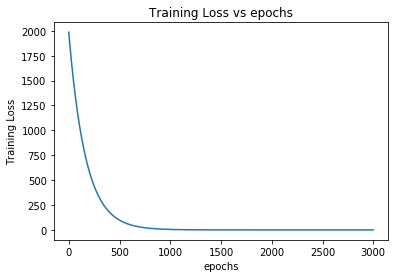

Confusion Matrix


Text(69,0.5,'Actual')

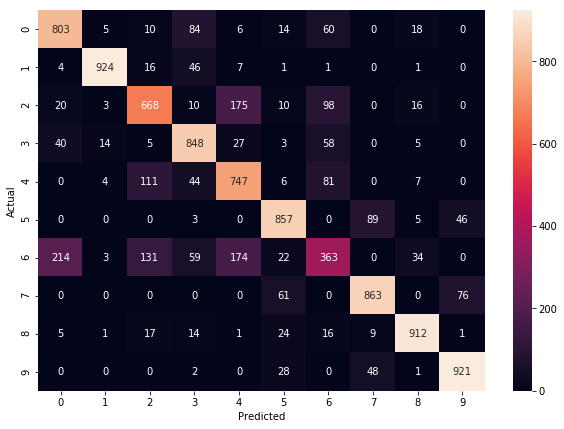

In [16]:
#Prediction/testing
net_y_pred=net.predict(x_test)
net_y_pred=np.argmax(net_y_pred, axis=1)
net_y_train=np.argmax(y_train, axis=1)
NET_List=[]   
for o_pred,o_act in zip(net_y_pred,y_test):
    NET_List.append(o_pred-o_act)

Corr_outputs=NET_List.count(0)    
print("Number of correctly predicted outputs in testing set(10000 samples):"+ str(NET_List.count(0)))

NET_Accuracy=(Corr_outputs/y_test.shape[0])
print("Testing Accuracy:"+ str(NET_Accuracy*100)+'%')

NET_Loss=net.loss_per_epoch

#Plot Cost vs epochs
import matplotlib.pyplot as plt
plt.plot(np.arange(len(NET_Loss)),NET_Loss)
plt.title('Training Loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.show()

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, net_y_pred)

import matplotlib.pyplot as plt
import seaborn as sn
print("Confusion Matrix")
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


# Task 2 - Artificial Neural Network with two hidden layers using keras

In [7]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
ann = Sequential()

# Adding the input layer and the first hidden layer
ann.add(Dense(units = 500, init = 'uniform', activation = 'sigmoid', input_dim = X_train.shape[1]))

# Adding the second hidden layer
ann.add(Dense(units = 500, init = 'uniform', activation = 'sigmoid'))

# Adding the output layer
ann.add(Dense(units = 10, init = 'uniform', activation = 'softmax'))

# Compiling the ANN
ann.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history_ann_keras=ann.fit(X_train, y_train, batch_size = 2048, epochs = 500)



/Users/srikanth/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/srikanth/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/srikanth/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/srikanth/anaconda3/lib/python3.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/Users/srikanth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=500, activation="sigmoid", input_dim=784, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/Users/srikanth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=500, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]
/Users/srikanth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="softmax", kernel_initializer="uniform")`
  app.launch_new_instance()


Epoch 1/500
60000/60000 [==============================] - 1s 23us/step - loss: 2.2872 - accuracy: 0.2165
Epoch 2/500
60000/60000 [==============================] - 1s 22us/step - loss: 2.2241 - accuracy: 0.4527
Epoch 3/500
60000/60000 [==============================] - 1s 22us/step - loss: 2.1755 - accuracy: 0.5508
Epoch 4/500
60000/60000 [==============================] - 1s 24us/step - loss: 2.1265 - accuracy: 0.5820
Epoch 5/500
60000/60000 [==============================] - 2s 27us/step - loss: 2.0750 - accuracy: 0.5907
Epoch 6/500
60000/60000 [==============================] - 2s 26us/step - loss: 2.0207 - accuracy: 0.6015
Epoch 7/500
60000/60000 [==============================] - 2s 25us/step - loss: 1.9635 - accuracy: 0.6077
Epoch 8/500
60000/60000 [==============================] - 2s 25us/step - loss: 1.9035 - accuracy: 0.6191
Epoch 9/500
60000/60000 [==============================] - 1s 24us/step - loss: 1.8420 - accuracy: 0.6260
Epoch 10/500
60000/60000 [====================

60000/60000 [==============================] - 2s 25us/step - loss: 0.6095 - accuracy: 0.8044
Epoch 78/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.6053 - accuracy: 0.8058
Epoch 79/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.6011 - accuracy: 0.8066
Epoch 80/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.5971 - accuracy: 0.8079
Epoch 81/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.5930 - accuracy: 0.8091
Epoch 82/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.5891 - accuracy: 0.8102
Epoch 83/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.5853 - accuracy: 0.8115
Epoch 84/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.5816 - accuracy: 0.8125
Epoch 85/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.5778 - accuracy: 0.8137
Epoch 86/500
60000/60000 [========================

60000/60000 [==============================] - 2s 25us/step - loss: 0.4312 - accuracy: 0.8530
Epoch 154/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.4299 - accuracy: 0.8533
Epoch 155/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.4287 - accuracy: 0.8535
Epoch 156/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.4277 - accuracy: 0.8544
Epoch 157/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.4265 - accuracy: 0.8543
Epoch 158/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.4252 - accuracy: 0.8549
Epoch 159/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.4240 - accuracy: 0.8553
Epoch 160/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.4229 - accuracy: 0.8554
Epoch 161/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.4219 - accuracy: 0.8557
Epoch 162/500
60000/60000 [===============

Epoch 229/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3661 - accuracy: 0.8734
Epoch 230/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3654 - accuracy: 0.8735
Epoch 231/500
60000/60000 [==============================] - 2s 27us/step - loss: 0.3649 - accuracy: 0.8737
Epoch 232/500
60000/60000 [==============================] - 2s 27us/step - loss: 0.3646 - accuracy: 0.8738
Epoch 233/500
60000/60000 [==============================] - 2s 28us/step - loss: 0.3637 - accuracy: 0.8742
Epoch 234/500
60000/60000 [==============================] - 2s 29us/step - loss: 0.3630 - accuracy: 0.8745
Epoch 235/500
60000/60000 [==============================] - 2s 28us/step - loss: 0.3625 - accuracy: 0.8750
Epoch 236/500
60000/60000 [==============================] - 2s 28us/step - loss: 0.3618 - accuracy: 0.8746
Epoch 237/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3613 - accuracy: 0.8752
Epoch 238/500
60000/60000 [=

60000/60000 [==============================] - 2s 27us/step - loss: 0.3289 - accuracy: 0.8866
Epoch 305/500
60000/60000 [==============================] - 2s 27us/step - loss: 0.3284 - accuracy: 0.8867
Epoch 306/500
60000/60000 [==============================] - 2s 27us/step - loss: 0.3275 - accuracy: 0.8868
Epoch 307/500
60000/60000 [==============================] - 2s 27us/step - loss: 0.3269 - accuracy: 0.8867
Epoch 308/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3269 - accuracy: 0.8875
Epoch 309/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3263 - accuracy: 0.8871
Epoch 310/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.3260 - accuracy: 0.8873
Epoch 311/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3258 - accuracy: 0.8874
Epoch 312/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3252 - accuracy: 0.8877
Epoch 313/500
60000/60000 [===============

Epoch 380/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3008 - accuracy: 0.8972
Epoch 381/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3006 - accuracy: 0.8971
Epoch 382/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.3004 - accuracy: 0.8971
Epoch 383/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.3003 - accuracy: 0.8973
Epoch 384/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.2995 - accuracy: 0.8978
Epoch 385/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.2996 - accuracy: 0.8973
Epoch 386/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.2986 - accuracy: 0.8978
Epoch 387/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.2992 - accuracy: 0.8980
Epoch 388/500
60000/60000 [==============================] - 2s 27us/step - loss: 0.2982 - accuracy: 0.8979
Epoch 389/500
60000/60000 [=

60000/60000 [==============================] - 2s 26us/step - loss: 0.2803 - accuracy: 0.9055
Epoch 456/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.2795 - accuracy: 0.9055
Epoch 457/500
60000/60000 [==============================] - 2s 25us/step - loss: 0.2792 - accuracy: 0.9060
Epoch 458/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.2784 - accuracy: 0.9062
Epoch 459/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.2787 - accuracy: 0.9057
Epoch 460/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.2782 - accuracy: 0.9065
Epoch 461/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.2780 - accuracy: 0.9065
Epoch 462/500
60000/60000 [==============================] - 2s 26us/step - loss: 0.2778 - accuracy: 0.9066
Epoch 463/500
60000/60000 [==============================] - 2s 27us/step - loss: 0.2780 - accuracy: 0.9059
Epoch 464/500
60000/60000 [===============

Number of correctly predicted outputs in testing set(10000 samples):8556
Testing Accuracy:85.56%


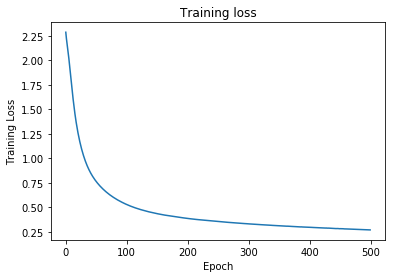

Confusion Matrix


Text(69,0.5,'Actual')

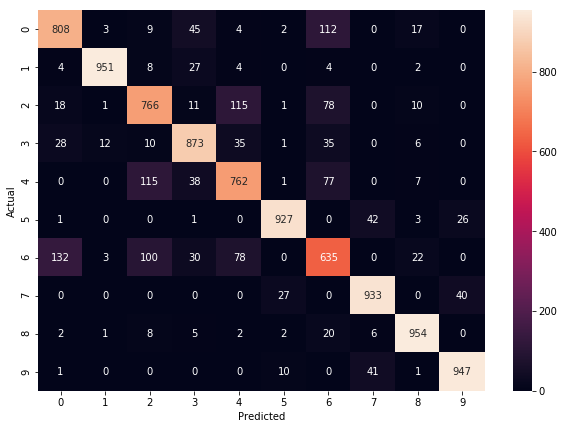

In [8]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
ann_y_pred_keras = ann.predict(X_test)

ann_y_pred_keras=np.argmax(ann_y_pred_keras, axis=1)

ANN_List_keras=[]
for o_pred,o_act in zip(ann_y_pred_keras,y_test):
    ANN_List_keras.append(o_pred-o_act)

Corr_outputs=ANN_List_keras.count(0)    
print("Number of correctly predicted outputs in testing set(10000 samples):"+ str(ANN_List_keras.count(0)))

ANN_Accuracy_keras=(Corr_outputs/y_test.shape[0])
print("Testing Accuracy:"+ str(ANN_Accuracy_keras*100)+'%')

# Plot training loss values
plt.plot(history_ann_keras.history['loss'])
plt.title('Training loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.show();

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ann_y_pred_keras)

import matplotlib.pyplot as plt
import seaborn as sn
print("Confusion Matrix")
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


# Task 3 - Convolutional Neural Network using keras


In [10]:
# Convolutional Neural Network

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np


# Initialising the CNN
cnn = Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

# Step 2 - Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
cnn.add(Conv2D(32, (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full connection
cnn.add(Dense(units = 20, activation = 'sigmoid'))
cnn.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

X_train_cnn=X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_cnn=X_test.reshape((X_test.shape[0], 28, 28, 1))

history_cnn=cnn.fit(X_train_cnn, y_train, batch_size = 2048, epochs = 100)


Epoch 1/100
60000/60000 [==============================] - 17s 287us/step - loss: 1.9921 - accuracy: 0.4038
Epoch 2/100
60000/60000 [==============================] - 17s 288us/step - loss: 1.5357 - accuracy: 0.6631
Epoch 3/100
60000/60000 [==============================] - 18s 306us/step - loss: 1.3413 - accuracy: 0.7448
Epoch 4/100
60000/60000 [==============================] - 18s 300us/step - loss: 1.1612 - accuracy: 0.7752
Epoch 5/100
60000/60000 [==============================] - 18s 299us/step - loss: 1.0027 - accuracy: 0.8011
Epoch 6/100
60000/60000 [==============================] - 18s 299us/step - loss: 0.8906 - accuracy: 0.8229
Epoch 7/100
60000/60000 [==============================] - 18s 299us/step - loss: 0.8084 - accuracy: 0.8379
Epoch 8/100
60000/60000 [==============================] - 18s 295us/step - loss: 0.7381 - accuracy: 0.8510
Epoch 9/100
60000/60000 [==============================] - 18s 305us/step - loss: 0.6788 - accuracy: 0.8588
Epoch 10/100
60000/60000 [==

60000/60000 [==============================] - 18s 297us/step - loss: 0.1429 - accuracy: 0.9574
Epoch 77/100
60000/60000 [==============================] - 18s 300us/step - loss: 0.1386 - accuracy: 0.9593
Epoch 78/100
60000/60000 [==============================] - 18s 302us/step - loss: 0.1358 - accuracy: 0.9601
Epoch 79/100
60000/60000 [==============================] - 17s 290us/step - loss: 0.1329 - accuracy: 0.9615
Epoch 80/100
60000/60000 [==============================] - 18s 303us/step - loss: 0.1299 - accuracy: 0.9623
Epoch 81/100
60000/60000 [==============================] - 18s 305us/step - loss: 0.1326 - accuracy: 0.9605
Epoch 82/100
60000/60000 [==============================] - 18s 306us/step - loss: 0.1296 - accuracy: 0.9623
Epoch 83/100
60000/60000 [==============================] - 18s 293us/step - loss: 0.1287 - accuracy: 0.9624
Epoch 84/100
60000/60000 [==============================] - 17s 290us/step - loss: 0.1272 - accuracy: 0.9633
Epoch 85/100
60000/60000 [======

Number of correctly predicted outputs in testing set(10000 samples):8996
Accuracy:89.96%


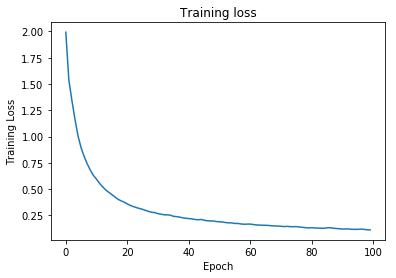

Confusion Matrix


Text(69,0.5,'Actual')

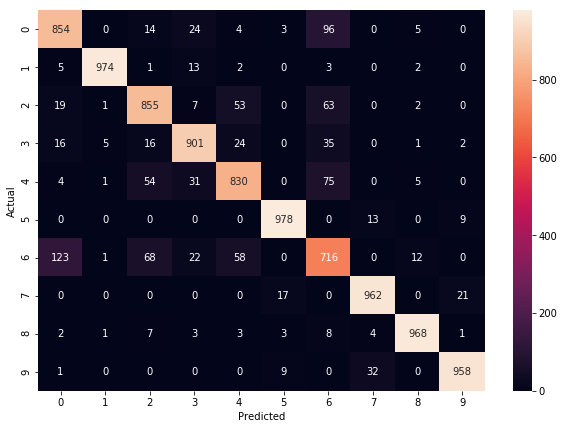

In [11]:
# Predicting the Test set results
cnn_y_pred = cnn.predict(X_test_cnn)

cnn_y_pred=np.argmax(cnn_y_pred, axis=1)

CNN_List=[]
for o_pred,o_act in zip(cnn_y_pred,y_test):
    CNN_List.append(o_pred-o_act)

Corr_outputs=CNN_List.count(0)    
print("Number of correctly predicted outputs in testing set(10000 samples):"+ str(CNN_List.count(0)))

CNN_Accuracy=(Corr_outputs/y_test.shape[0])
print("Accuracy:"+ str(CNN_Accuracy*100)+'%')

# Plot training loss values
plt.plot(history_cnn.history['loss'])
plt.title('Training loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.show();

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cnn_y_pred)

import matplotlib.pyplot as plt
import seaborn as sn
print("Confusion Matrix")
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')